# Tutorial

Spectoprep is very easy to use! import the function

In [1]:
from spectoprep import PipelineOptimizer, SpectroPrepPlotter

In [2]:
import numpy as np
import pandas as pd

In [3]:
cols = ["File Name", "Data Set", "Sample", "Path", "Casein", "True Protein", "year"]

In [4]:
data = pd.read_csv("/Users/habeebbabatunde/Downloads/shiny-python-projects-master/intep_opus_pythonnew/newpython_interp_cal291.csv")

In [5]:
data2 = data.drop(columns=cols)

In [6]:
wvn = data2.columns.astype(float).to_numpy()

In [7]:
groups = data["Sample"].values

In [8]:
X_train = data2.values

In [9]:
y_train = data["Casein"].values

In [ ]:
optimizer = PipelineOptimizer(
    X_train=X_train,
    y_train=y_train,
    X_test=None,
    y_test=None,
    preprocessing_steps=['msc', 'savgol', 'detrend', 'scaler', 'robust_scaler', 'emsc', 'meancn', 'autoscale', 'globalscale'],
    cv_method="group_shuffle_split",
    n_splits=3,
    random_state=21,
    groups=groups,
    max_pipeline_length=2,
    allowed_preprocess_combinations=[1, 2]
)

best_params, best_pipeline = optimizer.bayesian_optimize(
    init_points=50,
    n_iter=1000
)

# Extract preprocessing steps without the final model
custom_preprocessing = []
for name, step in best_pipeline.steps[:-1]:
    custom_preprocessing.append((name, step))


2025-04-09 17:35:58,863 - PipelineUtils - INFO - Generating pipeline configurations with lengths: [1, 2]
2025-04-09 17:35:58,866 - PipelineUtils - INFO - Available preprocessing steps: ['msc', 'savgol', 'detrend', 'scaler', 'robust_scaler', 'emsc', 'meancn', 'autoscale', 'globalscale']
2025-04-09 17:35:58,868 - PipelineUtils - INFO - Generated 38 valid pipeline configurations
2025-04-09 17:35:58,869 - PipelineOptimizer - INFO - Initialized PipelineOptimizer
2025-04-09 17:35:58,870 - PipelineOptimizer - INFO - Number of preprocessing steps: 9
2025-04-09 17:35:58,871 - PipelineOptimizer - INFO - Number of possible pipeline configurations: 38
2025-04-09 17:35:58,871 - PipelineOptimizer - INFO - Using group_shuffle_split validation method


|   iter    |  target   |  als_lam  | als_niter |   als_p   | detren... | detren... | emsc_o... | fa_lin... | fa_n_c... | global... | ica_n_... | kpca_g... | kpca_k... | kpca_n... | lle_n_... | lle_n_... | lsnv_win  | minmax... | minmax... | pca_n_... | pipeli... | power_... | power_... | quanti... | quanti... | rbf_gamma | rbf_n_... | ridge_... |  rnv_lp   |  rnv_up   | rs_qua... | rs_qua... | rs_wit... | rs_wit... | savgol... | savgol... | savgol... |   skb_k   |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


2025-04-09 17:35:59,332 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2220, R²: 0.9629


| 1         | -0.222    | 4.968e+03 | 21.56     | 0.2191    | 0.02162   | 1.824     | 1.203     | 0.9038    | 67.06     | 3.773     | 30.01     | 0.6966    | 3.461     | 8.396     | 6.987     | 17.4      | 12.18     | 0.9036    | 0.3882    | 76.41     | 14.22     | 0.4087    | 0.7134    | 0.2707    | 172.3     | 0.9133    | 154.5     | 51.67     | 7.518     | 84.48     | 80.68     | 11.54     | 0.4601    | 0.5444    | 0.6522    | 11.8      | 3.907     | 85.23     |


2025-04-09 17:35:59,762 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1197, R²: 0.0556


| 2         | -1.12     | 2.683e+04 | 34.59     | 0.1993    | 0.3868    | 2.641     | 4.241     | 1.795     | 90.04     | 5.41      | 41.76     | 8.589     | 3.146     | 44.61     | 21.57     | 16.36     | 8.835     | 0.928     | 0.05587   | 41.33     | 8.555     | 0.5905    | 0.8863    | 0.3277    | 162.9     | 0.7977    | 136.5     | 24.41     | 17.29     | 87.01     | 89.78     | 14.21     | 0.8641    | 0.7022    | 0.5039    | 8.075     | 4.4       | 37.78     |


2025-04-09 17:36:00,481 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.0641, R²: 0.1472


| 3         | -1.064    | 3.817e+04 | 11.65     | 0.1939    | 0.8042    | 4.589     | 1.779     | 2.563     | 19.32     | 4.362     | 20.35     | 5.707     | 2.039     | 27.4      | 16.65     | 28.3      | 8.479     | 0.6833    | 0.3264    | 31.78     | 24.99     | 0.9237    | 0.06997   | 0.7818    | 16.67     | 0.5096    | 93.37     | 69.05     | 16.69     | 80.71     | 76.49     | 17.1      | 0.7124    | 0.1508    | 1.844     | 7.905     | 2.847     | 98.07     |


2025-04-09 17:36:00,909 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8428, R²: 0.4650


| 4         | -0.8428   | 8.437e+04 | 37.68     | 0.1442    | 0.9168    | 3.93      | 1.008     | 2.012     | 58.72     | 5.311     | 22.93     | 3.634     | 1.134     | 39.06     | 22.04     | 9.071     | 11.56     | 0.9143    | 0.2954    | 24.42     | 12.22     | 0.2761    | 0.8976    | 0.9251    | 127.5     | 0.1402    | 36.13     | 36.59     | 6.732     | 87.68     | 80.19     | 7.21      | 0.1881    | 0.324     | 1.997     | 8.872     | 3.096     | 34.71     |


2025-04-09 17:36:01,339 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8761, R²: 0.4218


| 5         | -0.8761   | 8.925e+03 | 13.53     | 0.08316   | 0.2183    | 1.251     | 4.111     | 1.483     | 28.88     | 8.288     | 18.21     | 1.957     | 1.364     | 34.29     | 9.927     | 11.64     | 12.29     | 0.8157    | 0.2975    | 89.99     | 10.14     | 0.5334    | 0.1332    | 0.9619    | 164.4     | 0.6518    | 48.43     | 97.08     | 5.533     | 86.35     | 93.89     | 11.38     | 0.7769    | 0.9751    | 2.106     | 8.815     | 4.875     | 40.78     |


2025-04-09 17:36:01,783 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2473, R²: 0.9539


| 6         | -0.2473   | 9.514e+04 | 15.18     | 0.2817    | 0.7571    | 1.184     | 3.651     | 0.6774    | 52.91     | 5.596     | 7.162     | 8.151     | 3.84      | 30.27     | 13.32     | 21.4      | 9.374     | 0.8381    | 0.1731    | 16.98     | 31.62     | 0.3593    | 0.1023    | 0.03725   | 96.63     | 0.129     | 143.7     | 6.341     | 5.045     | 81.34     | 91.12     | 19.02     | 0.8601    | 0.8016    | 0.6859    | 10.05     | 3.162     | 30.78     |


2025-04-09 17:36:02,566 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2449, R²: 0.9548


| 7         | -0.2449   | 3.698e+04 | 20.81     | 0.03706   | 0.7531    | 3.922     | 1.015     | 0.7165    | 28.43     | 8.125     | 26.36     | 4.657     | 1.049     | 30.95     | 26.53     | 29.83     | 7.161     | 0.8099    | 0.01743   | 84.68     | 23.62     | 0.396     | 0.307     | 0.06134   | 180.3     | 0.9108    | 190.7     | 91.97     | 5.477     | 93.14     | 75.84     | 24.61     | 0.7588    | 0.8946    | 2.255     | 12.44     | 3.963     | 90.7      |


2025-04-09 17:36:03,151 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8854, R²: 0.4095


| 8         | -0.8854   | 2.882e+03 | 37.2      | 0.2554    | 0.8875    | 1.167     | 2.913     | 1.743     | 23.79     | 4.885     | 42.18     | 9.788     | 2.668     | 46.07     | 6.075     | 16.29     | 7.526     | 0.6732    | 0.2152    | 68.48     | 10.04     | 0.6404    | 0.8798    | 0.7535    | 118.4     | 0.7065    | 72.88     | 61.64     | 15.39     | 80.68     | 75.73     | 11.89     | 0.8104    | 0.4254    | 2.586     | 8.759     | 2.218     | 88.49     |


2025-04-09 17:36:03,578 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2352, R²: 0.9583


| 9         | -0.2352   | 3.797e+04 | 30.29     | 0.2407    | 0.336     | 1.02      | 3.341     | 1.045     | 46.48     | 3.633     | 33.47     | 4.917     | 3.259     | 19.45     | 8.802     | 18.29     | 11.61     | 0.9742    | 0.105     | 8.714     | 14.19     | 0.7439    | 0.6033    | 0.766     | 107.7     | 0.334     | 128.1     | 75.03     | 14.47     | 80.32     | 81.58     | 14.1      | 0.3398    | 0.1536    | 2.027     | 7.095     | 2.93      | 5.03      |


2025-04-09 17:36:04,058 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8910, R²: 0.4020


| 10        | -0.891    | 3.068e+04 | 48.47     | 0.2809    | 0.4207    | 1.486     | 4.796     | 2.83      | 38.04     | 1.478     | 7.954     | 8.974     | 0.3296    | 22.41     | 9.832     | 10.63     | 7.547     | 0.6004    | 0.06706   | 61.3      | 12.19     | 0.7032    | 0.4548    | 0.7173    | 46.48     | 0.2276    | 189.4     | 91.15     | 13.59     | 94.68     | 92.32     | 22.53     | 0.5272    | 0.1165    | 1.884     | 12.78     | 2.761     | 53.76     |


2025-04-09 17:36:04,602 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7296, R²: 0.5991


| 11        | -0.7296   | 1.044e+04 | 23.24     | 0.05112   | 0.9056    | 4.981     | 4.576     | 2.084     | 55.05     | 4.347     | 16.08     | 7.545     | 0.1383    | 44.27     | 12.63     | 12.49     | 11.62     | 0.7846    | 0.3672    | 53.81     | 32.76     | 0.5175    | 0.9633    | 0.2574    | 61.74     | 0.993     | 169.9     | 15.95     | 16.06     | 86.27     | 77.43     | 19.75     | 0.9914    | 0.8445    | 2.249     | 9.439     | 1.277     | 20.38     |


2025-04-09 17:36:05,248 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2075, R²: 0.9676


| 12        | -0.2075   | 7.757e+04 | 32.61     | 0.2673    | 0.9725    | 4.673     | 3.761     | 0.6073    | 76.29     | 5.083     | 39.2      | 4.732     | 2.12      | 31.67     | 9.393     | 27.12     | 12.46     | 0.8295    | 0.2248    | 60.76     | 27.41     | 0.3601    | 0.1409    | 0.105     | 138.7     | 0.4376    | 128.9     | 78.79     | 14.83     | 83.38     | 92.37     | 23.03     | 0.2033    | 0.2358    | 0.7119    | 9.907     | 4.874     | 61.8      |


2025-04-09 17:36:05,730 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8373, R²: 0.4719


| 13        | -0.8373   | 2.915e+04 | 42.47     | 0.2366    | 0.3992    | 2.462     | 3.4       | 2.433     | 68.13     | 1.812     | 4.675     | 7.838     | 1.199     | 6.919     | 8.735     | 24.86     | 12.97     | 0.9672    | 0.03522   | 66.85     | 13.06     | 0.4754    | 0.4925    | 0.3831    | 64.46     | 0.6319    | 78.98     | 33.41     | 8.051     | 94.44     | 83.61     | 13.33     | 0.4336    | 0.6207    | 0.516     | 7.585     | 4.276     | 82.98     |


2025-04-09 17:36:06,025 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2551, R²: 0.9510


| 14        | -0.2551   | 1.883e+04 | 39.31     | 0.08323   | 0.3521    | 4.894     | 3.957     | 2.709     | 24.91     | 5.743     | 11.2      | 8.79      | 0.1904    | 42.12     | 22.09     | 28.05     | 11.92     | 0.6706    | 0.2351    | 75.06     | 36.09     | 0.6448    | 0.3199    | 0.7903    | 13.34     | 0.5523    | 128.1     | 27.51     | 10.82     | 93.15     | 94.72     | 7.791     | 0.9411    | 0.4153    | 1.487     | 11.33     | 3.262     | 59.97     |


2025-04-09 17:36:06,324 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1440, R²: 0.0143


| 15        | -1.144    | 4.929e+04 | 21.12     | 0.1096    | 0.9315    | 3.495     | 4.328     | 1.099     | 93.77     | 5.971     | 15.21     | 7.039     | 1.003     | 28.86     | 16.15     | 6.351     | 11.74     | 0.6854    | 0.02176   | 29.8      | 20.36     | 0.5294    | 0.622     | 0.1426    | 197.7     | 0.6552    | 129.6     | 11.77     | 5.534     | 94.77     | 78.97     | 10.15     | 0.2771    | 0.2541    | 2.124     | 11.36     | 4.899     | 10.43     |


2025-04-09 17:36:06,859 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1436, R²: 0.0149


| 16        | -1.144    | 7.889e+04 | 27.22     | 0.09916   | 0.9286    | 2.56      | 1.589     | 0.7866    | 90.67     | 8.743     | 33.26     | 9.504     | 1.009     | 33.61     | 28.6      | 11.13     | 7.884     | 0.9894    | 0.3914    | 24.79     | 16.27     | 0.6104    | 0.692     | 0.7222    | 99.55     | 0.06552   | 196.9     | 63.25     | 17.62     | 83.84     | 85.3      | 22.86     | 0.1002    | 0.1623    | 0.7095    | 7.067     | 1.358     | 67.45     |


2025-04-09 17:36:07,157 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1532, R²: -0.0017


| 17        | -1.153    | 9.736e+04 | 39.02     | 0.2573    | 0.01199   | 4.034     | 4.118     | 0.3147    | 43.97     | 3.756     | 37.64     | 1.511     | 1.076     | 26.47     | 29.61     | 14.79     | 8.166     | 0.9282    | 0.1268    | 54.17     | 20.15     | 0.5781    | 0.5851    | 0.225     | 31.93     | 0.337     | 195.2     | 69.61     | 9.637     | 83.03     | 75.25     | 7.391     | 0.6589    | 0.5491    | 2.856     | 9.749     | 4.502     | 60.17     |


2025-04-09 17:36:07,702 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1774, R²: 0.9763


| 18        | -0.1774   | 4.178e+03 | 12.76     | 0.07231   | 0.8953    | 3.012     | 1.368     | 0.74      | 16.64     | 6.105     | 43.1      | 3.009     | 2.967     | 16.9      | 21.93     | 29.98     | 9.047     | 0.6279    | 0.06597   | 10.04     | 22.88     | 0.9463    | 0.2202    | 0.03529   | 77.13     | 0.3872    | 32.53     | 59.13     | 5.301     | 94.4      | 92.9      | 10.9      | 0.07541   | 0.3315    | 1.608     | 7.828     | 1.071     | 21.16     |


2025-04-09 17:36:07,974 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.7745, R²: 0.5482


| 19        | -0.7745   | 4.609e+04 | 33.9      | 0.133     | 0.2254    | 4.925     | 3.717     | 2.776     | 99.41     | 4.777     | 41.99     | 2.41      | 0.3012    | 7.144     | 17.87     | 17.26     | 7.981     | 0.7717    | 0.2315    | 16.89     | 6.151     | 0.6349    | 0.04559   | 0.7926    | 59.0      | 0.2066    | 12.07     | 23.36     | 5.047     | 84.15     | 82.47     | 23.6      | 0.3523    | 0.03672   | 2.984     | 9.974     | 3.256     | 41.87     |


2025-04-09 17:36:08,340 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1361, R²: 0.0278


| 20        | -1.136    | 6.017e+04 | 38.13     | 0.1927    | 0.9012    | 2.907     | 1.398     | 0.7929    | 92.89     | 4.673     | 8.156     | 8.96      | 2.316     | 21.09     | 3.949     | 13.52     | 10.43     | 0.936     | 0.3622    | 85.76     | 17.54     | 0.5623    | 0.06045   | 0.325     | 80.75     | 0.7395    | 94.66     | 46.92     | 12.53     | 83.4      | 89.85     | 11.59     | 0.934     | 0.2138    | 1.412     | 8.435     | 2.807     | 23.99     |


2025-04-09 17:36:08,789 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3276, R²: 0.9192


| 21        | -0.3276   | 2.826e+04 | 17.52     | 0.1713    | 0.357     | 1.181     | 4.985     | 0.7974    | 21.5      | 3.098     | 12.13     | 6.92      | 2.895     | 9.309     | 16.39     | 6.105     | 9.999     | 0.7884    | 0.1656    | 93.49     | 4.344     | 0.09279   | 0.4926    | 0.8301    | 62.07     | 0.3672    | 115.9     | 27.45     | 19.55     | 87.15     | 94.86     | 6.739     | 0.6475    | 0.8845    | 2.646     | 9.19      | 3.018     | 82.16     |


2025-04-09 17:36:09,251 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.7714, R²: 0.5517


| 22        | -0.7714   | 2.086e+04 | 25.51     | 0.08638   | 0.5058    | 1.383     | 2.203     | 2.391     | 44.05     | 7.098     | 36.04     | 8.73      | 1.399     | 17.25     | 6.711     | 16.77     | 9.596     | 0.7052    | 0.1823    | 28.22     | 26.04     | 0.1157    | 0.9601    | 0.249     | 76.76     | 0.5676    | 163.1     | 20.26     | 12.4      | 89.16     | 76.47     | 15.2      | 0.4666    | 0.6297    | 2.659     | 11.15     | 4.903     | 77.7      |


2025-04-09 17:36:09,679 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3427, R²: 0.9115


| 23        | -0.3427   | 3.928e+04 | 25.93     | 0.1433    | 0.2232    | 1.732     | 3.684     | 1.194     | 68.24     | 1.278     | 29.84     | 3.736     | 0.9549    | 14.73     | 14.52     | 9.783     | 9.472     | 0.9654    | 0.005922  | 12.81     | 32.47     | 0.2578    | 0.621     | 0.9878    | 181.8     | 0.3656    | 75.15     | 87.5      | 13.06     | 88.53     | 79.63     | 8.309     | 0.7651    | 0.781     | 2.604     | 9.337     | 2.855     | 94.98     |


2025-04-09 17:36:09,950 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1489, R²: 0.0058


| 24        | -1.149    | 1.865e+04 | 17.12     | 0.04      | 0.0618    | 2.628     | 4.873     | 1.096     | 45.28     | 7.255     | 27.32     | 9.237     | 0.9109    | 17.92     | 14.2      | 16.36     | 12.33     | 0.9092    | 0.2812    | 21.92     | 0.6393    | 0.3957    | 0.2878    | 0.2597    | 12.09     | 0.1533    | 146.5     | 89.21     | 18.17     | 84.79     | 81.66     | 24.73     | 0.8948    | 0.1706    | 0.6468    | 10.4      | 1.01      | 35.09     |


2025-04-09 17:36:10,438 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2904, R²: 0.9365


| 25        | -0.2904   | 4.569e+04 | 42.67     | 0.0143    | 0.7919    | 2.743     | 3.574     | 1.6       | 37.99     | 1.056     | 33.04     | 9.208     | 3.681     | 24.16     | 22.43     | 21.45     | 10.07     | 0.6284    | 0.3613    | 70.76     | 28.52     | 0.1624    | 0.2511    | 0.3452    | 69.08     | 0.005692  | 124.2     | 81.94     | 6.391     | 94.34     | 82.93     | 16.42     | 0.5861    | 0.7918    | 2.659     | 7.435     | 4.32      | 41.51     |


2025-04-09 17:36:10,853 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8311, R²: 0.4797


| 26        | -0.8311   | 9.614e+04 | 26.47     | 0.2193    | 0.2101    | 2.77      | 3.371     | 0.6426    | 71.38     | 7.575     | 15.42     | 7.272     | 2.215     | 34.83     | 17.26     | 5.38      | 12.35     | 0.9341    | 0.1036    | 23.54     | 4.588     | 0.7889    | 0.856     | 0.8358    | 126.2     | 0.3668    | 196.3     | 67.88     | 11.8      | 89.67     | 91.55     | 18.18     | 0.861     | 0.1404    | 0.7174    | 7.034     | 4.933     | 60.44     |


2025-04-09 17:36:11,289 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.9108, R²: 0.3751


| 27        | -0.9108   | 2.586e+04 | 15.86     | 0.2442    | 0.5738    | 1.019     | 1.598     | 2.605     | 57.59     | 4.526     | 48.63     | 7.073     | 3.272     | 33.07     | 19.23     | 5.156     | 11.42     | 0.922     | 0.3204    | 39.44     | 31.09     | 0.8889    | 0.4325    | 0.3382    | 84.51     | 0.7302    | 49.18     | 43.16     | 19.76     | 81.52     | 85.11     | 5.899     | 0.5075    | 0.06279   | 0.1247    | 10.03     | 4.581     | 74.55     |


2025-04-09 17:36:11,580 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1530, R²: -0.0013


| 28        | -1.153    | 8.384e+04 | 11.16     | 0.1265    | 0.8119    | 1.873     | 1.814     | 2.127     | 83.04     | 2.378     | 44.88     | 5.321     | 3.239     | 28.1      | 23.73     | 9.607     | 7.938     | 0.9576    | 0.04514   | 39.36     | 18.27     | 0.441     | 0.9792    | 0.5311    | 188.1     | 0.1748    | 123.3     | 84.04     | 6.891     | 85.67     | 89.51     | 6.96      | 0.4013    | 0.373     | 2.433     | 9.833     | 4.733     | 55.54     |


2025-04-09 17:36:11,975 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.9011, R²: 0.3884


| 29        | -0.9011   | 1.619e+04 | 26.39     | 0.2359    | 0.1701    | 2.874     | 1.162     | 2.738     | 6.606     | 7.285     | 26.95     | 8.663     | 0.5733    | 20.7      | 18.26     | 20.85     | 8.458     | 0.9839    | 0.1511    | 79.84     | 24.77     | 0.4552    | 0.4057    | 0.5421    | 91.63     | 0.02731   | 107.3     | 93.32     | 12.2      | 81.57     | 78.81     | 9.646     | 0.523     | 0.8488    | 0.3448    | 11.92     | 3.542     | 69.66     |


2025-04-09 17:36:12,267 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0913, R²: 0.9937


| 30        | -0.09129  | 7.153e+03 | 36.76     | 0.1231    | 0.6628    | 1.084     | 2.488     | 0.5766    | 78.02     | 9.71      | 49.1      | 6.255     | 0.7739    | 30.54     | 5.681     | 22.67     | 12.78     | 0.7371    | 0.1783    | 49.44     | 16.54     | 0.8048    | 0.7242    | 0.3548    | 110.2     | 0.8179    | 118.4     | 77.24     | 7.916     | 82.61     | 84.65     | 22.89     | 0.5878    | 0.09744   | 0.9913    | 12.85     | 2.059     | 90.11     |


2025-04-09 17:36:12,990 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.0843, R²: 0.1145


| 31        | -1.084    | 7.242e+04 | 10.37     | 0.03109   | 0.7863    | 4.215     | 3.361     | 2.525     | 51.71     | 9.289     | 29.93     | 4.048     | 0.0405    | 28.71     | 7.31      | 17.44     | 9.941     | 0.6984    | 0.09884   | 31.61     | 24.76     | 0.9858    | 0.4311    | 0.7179    | 172.5     | 0.8826    | 156.4     | 40.61     | 14.24     | 87.46     | 79.71     | 23.45     | 0.5315    | 0.02578   | 2.462     | 12.34     | 2.926     | 85.44     |


2025-04-09 17:36:13,419 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8933, R²: 0.3989


| 32        | -0.8933   | 3.495e+03 | 27.98     | 0.1108    | 0.1981    | 4.362     | 1.955     | 2.523     | 84.06     | 3.426     | 18.61     | 9.136     | 1.633     | 39.45     | 6.435     | 8.225     | 9.41      | 0.8044    | 0.2965    | 63.45     | 25.1      | 0.009119  | 0.1715    | 0.736     | 48.32     | 0.9268    | 117.7     | 89.09     | 8.696     | 84.2      | 77.82     | 18.53     | 0.7713    | 0.3019    | 2.306     | 11.06     | 4.114     | 17.09     |


2025-04-09 17:36:13,831 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1977, R²: 0.9706


| 33        | -0.1977   | 4.776e+04 | 37.21     | 0.2441    | 0.2338    | 1.931     | 3.467     | 1.24      | 99.91     | 1.083     | 9.914     | 8.391     | 2.763     | 20.33     | 13.43     | 18.58     | 7.354     | 0.9851    | 0.2169    | 68.52     | 13.99     | 0.003539  | 0.1825    | 0.5546    | 143.2     | 0.8386    | 12.48     | 28.28     | 19.8      | 82.32     | 79.16     | 17.92     | 0.9608    | 0.06961   | 1.864     | 7.483     | 4.593     | 6.441     |


2025-04-09 17:36:14,300 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.7388, R²: 0.5888


| 34        | -0.7388   | 5.076e+04 | 39.86     | 0.2869    | 0.9872    | 4.719     | 2.188     | 0.9228    | 62.47     | 3.505     | 22.68     | 2.268     | 3.863     | 28.99     | 26.11     | 12.19     | 8.118     | 0.6632    | 0.08442   | 36.04     | 11.76     | 0.08497   | 0.7579    | 0.5075    | 90.55     | 0.286     | 43.03     | 11.01     | 15.51     | 82.91     | 81.44     | 22.15     | 0.7526    | 0.2499    | 0.7812    | 9.997     | 1.884     | 98.56     |


2025-04-09 17:36:14,577 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1220, R²: 0.0517


| 35        | -1.122    | 8.669e+03 | 45.47     | 0.1647    | 0.06581   | 3.294     | 2.89      | 1.23      | 14.39     | 9.118     | 40.02     | 0.4932    | 0.6124    | 17.6      | 7.233     | 28.13     | 10.97     | 0.8043    | 0.3832    | 64.46     | 1.199     | 0.2129    | 0.4122    | 0.6384    | 46.7      | 0.2519    | 35.08     | 25.73     | 5.932     | 83.84     | 92.06     | 24.93     | 0.6811    | 0.7926    | 1.007     | 8.277     | 4.653     | 29.56     |


2025-04-09 17:36:14,853 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0426, R²: 0.1813


| 36        | -1.043    | 4.218e+04 | 45.13     | 0.03629   | 0.5255    | 1.216     | 3.068     | 2.315     | 25.12     | 6.851     | 18.62     | 5.557     | 2.801     | 40.76     | 16.41     | 21.42     | 9.099     | 0.9693    | 0.3104    | 96.78     | 22.19     | 0.07969   | 0.8664    | 0.03604   | 23.72     | 0.146     | 66.89     | 66.47     | 15.81     | 88.58     | 82.79     | 13.33     | 0.1362    | 0.8896    | 1.151     | 9.627     | 2.513     | 86.95     |


2025-04-09 17:36:15,442 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0482, R²: 0.1724


| 37        | -1.048    | 3.462e+04 | 26.62     | 0.08615   | 0.8296    | 4.973     | 2.815     | 1.269     | 71.71     | 7.119     | 34.53     | 7.586     | 2.148     | 30.22     | 6.714     | 20.5      | 10.62     | 0.6082    | 0.002158  | 72.46     | 25.8      | 0.5306    | 0.255     | 0.1137    | 157.2     | 0.3837    | 49.23     | 46.76     | 16.04     | 90.15     | 83.91     | 15.17     | 0.9009    | 0.2726    | 1.802     | 11.39     | 2.54      | 44.72     |


2025-04-09 17:36:15,702 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.5080, R²: 0.8056


| 38        | -0.508    | 8.807e+03 | 34.47     | 0.2223    | 0.146     | 2.068     | 4.537     | 1.022     | 61.09     | 2.308     | 3.263     | 2.329     | 2.86      | 42.25     | 8.656     | 17.83     | 11.44     | 0.847     | 0.1951    | 88.31     | 7.517     | 0.2409    | 0.1408    | 0.3994    | 94.66     | 0.456     | 105.2     | 9.96      | 14.72     | 88.48     | 77.18     | 6.972     | 0.7766    | 0.7975    | 1.401     | 10.98     | 3.36      | 62.78     |


2025-04-09 17:36:15,994 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4966, R²: 0.8142


| 39        | -0.4966   | 2.032e+04 | 12.31     | 0.2878    | 0.4143    | 2.728     | 4.962     | 2.203     | 4.733     | 6.172     | 45.03     | 6.795     | 3.629     | 5.957     | 15.98     | 21.14     | 11.76     | 0.6853    | 0.2884    | 74.04     | 28.12     | 0.5271    | 0.6472    | 0.6853    | 52.99     | 0.6086    | 56.68     | 54.84     | 15.62     | 89.99     | 79.26     | 10.46     | 0.1591    | 0.2873    | 0.05243   | 9.741     | 1.904     | 87.59     |


2025-04-09 17:36:16,303 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.2834, R²: 0.9395


| 40        | -0.2834   | 6.033e+04 | 44.25     | 0.2847    | 0.5223    | 4.706     | 4.23      | 2.0       | 4.024     | 4.925     | 8.602     | 4.781     | 2.673     | 28.93     | 21.13     | 7.653     | 8.111     | 0.8158    | 0.007242  | 10.42     | 16.63     | 0.8682    | 0.2716    | 0.8982    | 25.03     | 0.2938    | 198.9     | 65.81     | 12.83     | 91.84     | 88.44     | 6.487     | 0.8858    | 0.7336    | 0.3046    | 8.211     | 4.911     | 22.08     |


2025-04-09 17:36:16,744 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1091, R²: 0.9910


| 41        | -0.1091   | 3.692e+04 | 21.27     | 0.0194    | 0.8479    | 1.194     | 4.388     | 1.475     | 27.5      | 7.426     | 30.6      | 3.474     | 0.813     | 23.17     | 23.3      | 21.3      | 12.78     | 0.7644    | 0.07156   | 60.77     | 26.71     | 0.9815    | 0.921     | 0.5368    | 145.5     | 0.7222    | 194.7     | 8.81      | 6.454     | 94.0      | 75.69     | 18.42     | 0.1397    | 0.825     | 0.4094    | 10.5      | 3.179     | 27.89     |


2025-04-09 17:36:17,635 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.0024, R²: 0.2432


| 42        | -1.002    | 1.501e+03 | 14.16     | 0.2216    | 0.7048    | 4.617     | 4.819     | 0.0189    | 89.91     | 9.412     | 3.687     | 4.062     | 3.962     | 37.5      | 6.702     | 9.357     | 7.29      | 0.9544    | 0.2586    | 23.92     | 24.78     | 0.9502    | 0.4798    | 0.3432    | 132.7     | 0.805     | 82.86     | 11.19     | 6.03      | 81.45     | 80.23     | 22.42     | 0.2668    | 0.5885    | 2.788     | 10.61     | 3.273     | 31.82     |


2025-04-09 17:36:18,123 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 0.7259, R²: 0.6031


| 43        | -0.7259   | 2.577e+04 | 17.58     | 0.1064    | 0.08581   | 1.08      | 4.106     | 0.5475    | 82.27     | 5.795     | 5.893     | 6.067     | 3.944     | 27.43     | 13.64     | 29.03     | 7.858     | 0.6716    | 0.3287    | 74.49     | 19.37     | 0.3931    | 0.08027   | 0.2142    | 155.7     | 0.1983    | 134.6     | 15.36     | 14.49     | 86.57     | 81.84     | 9.237     | 0.3382    | 0.04237   | 0.2901    | 12.95     | 4.026     | 7.824     |


2025-04-09 17:36:18,442 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8463, R²: 0.4605


| 44        | -0.8463   | 6.208e+04 | 42.87     | 0.2903    | 0.4317    | 3.991     | 4.472     | 2.448     | 68.47     | 2.838     | 26.6      | 8.949     | 0.02407   | 41.86     | 20.19     | 27.15     | 10.49     | 0.7228    | 0.2001    | 44.02     | 3.91      | 0.03201   | 0.3788    | 0.4259    | 63.65     | 0.3772    | 27.49     | 74.85     | 11.25     | 86.3      | 93.75     | 9.66      | 0.7078    | 0.3559    | 2.648     | 8.793     | 3.292     | 86.85     |


2025-04-09 17:36:18,874 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.5234, R²: 0.7936


| 45        | -0.5234   | 8.913e+04 | 20.14     | 0.2207    | 0.7453    | 1.312     | 1.871     | 1.148     | 31.53     | 2.266     | 6.528     | 7.475     | 1.659     | 10.65     | 20.63     | 28.46     | 10.34     | 0.9538    | 0.2947    | 90.36     | 28.11     | 0.3028    | 0.9925    | 0.6842    | 57.78     | 0.9214    | 142.8     | 10.42     | 7.2       | 92.16     | 89.2      | 13.48     | 0.5349    | 0.4532    | 1.627     | 11.23     | 2.453     | 93.53     |


2025-04-09 17:36:19,170 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0391, R²: 0.1867


| 46        | -1.039    | 1.474e+04 | 42.96     | 0.1961    | 0.4105    | 4.122     | 1.283     | 0.002301  | 44.7      | 7.786     | 15.42     | 1.026     | 1.183     | 10.69     | 13.78     | 8.582     | 8.673     | 0.7215    | 0.2423    | 91.8      | 21.63     | 0.4601    | 0.7964    | 0.1581    | 89.2      | 0.7487    | 110.8     | 44.5      | 12.73     | 88.29     | 87.45     | 11.82     | 0.9415    | 0.6482    | 0.8707    | 9.384     | 2.123     | 17.36     |


2025-04-09 17:36:19,539 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2823, R²: 0.9400


| 47        | -0.2823   | 9.067e+04 | 45.0      | 0.08015   | 0.546     | 2.825     | 1.867     | 0.236     | 10.68     | 8.067     | 42.83     | 4.4       | 0.2254    | 8.501     | 24.71     | 17.7      | 8.833     | 0.6055    | 0.2373    | 21.2      | 3.77      | 0.7516    | 0.9078    | 0.8322    | 107.9     | 0.6337    | 31.06     | 22.08     | 10.19     | 88.97     | 92.21     | 24.43     | 0.2547    | 0.8295    | 1.919     | 7.402     | 4.122     | 34.45     |


2025-04-09 17:36:19,875 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.7334, R²: 0.5948


| 48        | -0.7334   | 7.968e+04 | 29.74     | 0.1163    | 0.2484    | 1.831     | 2.769     | 2.175     | 87.73     | 3.787     | 5.511     | 4.707     | 1.726     | 31.64     | 23.56     | 26.54     | 9.229     | 0.8749    | 0.3379    | 87.71     | 1.762     | 0.6856    | 0.02576   | 0.2902    | 16.95     | 0.9093    | 100.9     | 21.19     | 17.21     | 82.21     | 77.91     | 24.48     | 0.2262    | 0.1228    | 1.843     | 10.45     | 3.699     | 85.84     |


2025-04-09 17:36:20,354 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.9848, R²: 0.2694


| 49        | -0.9848   | 3.642e+04 | 20.21     | 0.2219    | 0.7655    | 4.978     | 2.611     | 2.598     | 49.15     | 3.524     | 16.42     | 6.477     | 0.8383    | 34.33     | 2.938     | 25.28     | 11.78     | 0.8092    | 0.1009    | 55.14     | 31.29     | 0.6294    | 0.5062    | 0.4642    | 26.59     | 0.002736  | 183.9     | 81.76     | 7.283     | 80.59     | 93.11     | 5.356     | 0.9838    | 0.4754    | 0.1542    | 12.11     | 2.445     | 74.98     |


2025-04-09 17:36:20,745 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8441, R²: 0.4633


| 50        | -0.8441   | 6.113e+04 | 16.64     | 0.2265    | 0.2148    | 1.288     | 1.37      | 2.826     | 99.97     | 4.161     | 32.02     | 9.839     | 3.14      | 20.0      | 12.96     | 7.162     | 9.071     | 0.7959    | 0.2892    | 51.05     | 13.09     | 0.9002    | 0.4314    | 0.2436    | 93.0      | 0.7472    | 59.96     | 37.41     | 5.61      | 85.23     | 82.95     | 22.67     | 0.2506    | 0.7842    | 1.777     | 10.53     | 2.87      | 8.129     |


2025-04-09 17:36:21,238 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9611, R²: 0.3042


| 51        | -0.9611   | 6.495e+04 | 12.66     | 0.2372    | 0.7567    | 1.658     | 2.435     | 1.411     | 51.71     | 3.382     | 26.88     | 9.235     | 1.755     | 29.75     | 22.97     | 21.26     | 11.21     | 0.9633    | 0.3825    | 11.84     | 26.19     | 0.6521    | 0.1714    | 0.8742    | 62.98     | 0.07736   | 193.6     | 13.09     | 8.094     | 80.75     | 81.97     | 19.55     | 0.4047    | 0.2342    | 0.5062    | 11.47     | 4.132     | 39.14     |


2025-04-09 17:36:22,008 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2313, R²: 0.9597


| 52        | -0.2313   | 4.972e+03 | 37.66     | 0.06814   | 0.5728    | 3.224     | 4.738     | 1.8       | 40.22     | 9.811     | 19.04     | 7.332     | 3.724     | 11.69     | 14.49     | 18.33     | 10.36     | 0.7493    | 0.09415   | 86.52     | 24.26     | 0.8392    | 0.3656    | 0.7261    | 130.7     | 0.2796    | 156.9     | 44.3      | 19.55     | 84.76     | 80.97     | 8.234     | 0.5014    | 0.7157    | 0.8548    | 11.97     | 3.606     | 71.88     |


2025-04-09 17:36:22,391 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1554, R²: -0.0055


| 53        | -1.155    | 3.698e+04 | 24.26     | 0.122     | 0.3974    | 2.084     | 2.852     | 0.7684    | 4.361     | 9.51      | 38.14     | 6.309     | 0.4525    | 5.215     | 18.17     | 21.3      | 11.33     | 0.9893    | 0.1503    | 54.74     | 19.97     | 0.3405    | 0.3822    | 0.2079    | 162.6     | 0.276     | 150.1     | 23.68     | 15.38     | 94.15     | 88.4      | 18.34     | 0.8617    | 0.1236    | 1.921     | 9.642     | 1.251     | 35.7      |


2025-04-09 17:36:22,967 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1996, R²: 0.9700


| 54        | -0.1996   | 9.705e+04 | 31.68     | 0.2809    | 0.315     | 2.646     | 3.36      | 0.3699    | 77.9      | 8.024     | 49.72     | 7.854     | 1.892     | 7.091     | 27.15     | 18.33     | 7.256     | 0.8227    | 0.3795    | 29.13     | 11.41     | 0.5434    | 0.8034    | 0.4176    | 29.15     | 0.6973    | 28.69     | 29.58     | 13.1      | 94.33     | 82.12     | 21.45     | 0.5331    | 0.5751    | 1.05      | 11.27     | 1.175     | 92.49     |


2025-04-09 17:36:24,389 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2610, R²: 0.9487


| 55        | -0.261    | 7.002e+03 | 13.57     | 0.2315    | 0.2348    | 4.781     | 1.443     | 0.5394    | 35.81     | 8.751     | 34.19     | 5.401     | 0.07146   | 12.35     | 15.17     | 13.52     | 7.242     | 0.8748    | 0.2317    | 49.13     | 30.07     | 0.4117    | 0.08855   | 0.3757    | 186.7     | 0.9433    | 143.9     | 34.27     | 14.88     | 88.19     | 83.45     | 6.604     | 0.1503    | 0.123     | 2.425     | 9.3       | 4.525     | 40.33     |


2025-04-09 17:36:25,243 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.5071, R²: 0.8063


| 56        | -0.5071   | 7.108e+03 | 28.94     | 0.02611   | 0.4786    | 2.21      | 2.966     | 2.425     | 68.9      | 1.913     | 36.0      | 4.084     | 2.249     | 10.65     | 15.97     | 14.89     | 9.435     | 0.8884    | 0.33      | 40.09     | 23.62     | 0.8524    | 0.3614    | 0.3016    | 148.8     | 0.1294    | 125.4     | 75.03     | 8.203     | 91.44     | 94.17     | 19.68     | 0.9749    | 0.5712    | 0.1521    | 10.69     | 3.531     | 62.84     |


2025-04-09 17:36:25,774 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3599, R²: 0.9025


| 57        | -0.3599   | 5.011e+03 | 39.65     | 0.1642    | 0.8657    | 1.579     | 1.757     | 0.6268    | 54.51     | 2.33      | 4.592     | 9.964     | 2.437     | 14.64     | 19.67     | 18.59     | 10.89     | 0.7512    | 0.05384   | 76.39     | 4.027     | 0.9259    | 0.6038    | 0.7805    | 136.1     | 0.1358    | 138.7     | 47.83     | 13.66     | 85.44     | 94.84     | 23.58     | 0.8471    | 0.7163    | 1.955     | 10.28     | 3.165     | 66.41     |


2025-04-09 17:36:26,108 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1432, R²: 0.0155


| 58        | -1.143    | 4.997e+03 | 43.04     | 0.02121   | 0.1598    | 4.729     | 2.027     | 1.436     | 27.75     | 8.857     | 24.71     | 7.893     | 1.331     | 5.956     | 13.96     | 25.62     | 11.3      | 0.7049    | 0.123     | 67.44     | 20.03     | 0.816     | 0.2856    | 0.06935   | 150.0     | 0.1948    | 190.6     | 74.95     | 13.65     | 92.95     | 77.86     | 12.8      | 0.635     | 0.4179    | 1.095     | 10.21     | 3.328     | 51.54     |


2025-04-09 17:36:26,431 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2457, R²: 0.9545


| 59        | -0.2457   | 1.127e+04 | 13.11     | 0.1751    | 0.3855    | 4.282     | 2.024     | 0.6968    | 25.59     | 1.492     | 49.41     | 4.377     | 1.391     | 38.51     | 19.77     | 22.81     | 10.39     | 0.9484    | 0.3359    | 78.14     | 3.112     | 0.1723    | 0.7214    | 0.521     | 143.0     | 0.8194    | 45.38     | 19.15     | 14.98     | 88.61     | 93.16     | 15.86     | 0.5733    | 0.6792    | 1.348     | 10.09     | 3.989     | 38.07     |


2025-04-09 17:36:26,749 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2809, R²: 0.9406


| 60        | -0.2809   | 1.534e+04 | 40.35     | 0.1043    | 0.6615    | 1.946     | 1.244     | 0.3844    | 14.5      | 3.261     | 8.825     | 9.765     | 2.26      | 25.12     | 20.31     | 14.14     | 12.02     | 0.6974    | 0.2706    | 68.99     | 2.795     | 0.8333    | 0.2078    | 0.9541    | 146.2     | 0.4861    | 30.88     | 64.18     | 16.91     | 92.8      | 77.56     | 16.01     | 0.09002   | 0.6223    | 2.008     | 9.509     | 4.766     | 68.05     |


2025-04-09 17:36:27,222 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8786, R²: 0.4185


| 61        | -0.8786   | 4.567e+04 | 43.14     | 0.09112   | 0.7501    | 1.223     | 3.791     | 1.901     | 70.04     | 5.4       | 26.56     | 6.328     | 1.956     | 30.11     | 27.25     | 13.36     | 9.334     | 0.9843    | 0.01967   | 46.22     | 12.74     | 0.2434    | 0.5491    | 0.5745    | 57.56     | 0.08931   | 118.9     | 71.91     | 18.94     | 83.16     | 82.95     | 6.894     | 0.7057    | 0.2168    | 2.556     | 8.455     | 3.109     | 48.94     |


2025-04-09 17:36:27,693 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7206, R²: 0.6089


| 62        | -0.7206   | 8.023e+04 | 45.88     | 0.1242    | 0.3823    | 2.044     | 3.842     | 0.0498    | 93.71     | 7.096     | 45.66     | 2.493     | 1.826     | 3.159     | 6.719     | 6.857     | 7.551     | 0.8139    | 0.1686    | 15.93     | 9.843     | 0.07355   | 0.06966   | 0.1608    | 181.2     | 0.178     | 172.7     | 14.76     | 11.35     | 93.67     | 77.48     | 12.3      | 0.9876    | 0.9257    | 2.632     | 7.104     | 4.698     | 83.44     |


2025-04-09 17:36:28,275 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2748, R²: 0.9431


| 63        | -0.2748   | 7.758e+04 | 19.22     | 0.0493    | 0.2913    | 1.806     | 4.623     | 0.3008    | 59.66     | 7.273     | 44.23     | 1.124     | 2.552     | 44.77     | 22.37     | 24.92     | 7.984     | 0.7491    | 0.2506    | 65.27     | 11.76     | 0.2533    | 0.1092    | 0.9012    | 121.7     | 0.7864    | 137.9     | 67.99     | 10.59     | 85.72     | 85.73     | 19.69     | 0.08772   | 0.7409    | 0.482     | 9.814     | 2.328     | 24.23     |


2025-04-09 17:36:28,680 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8119, R²: 0.5034


| 64        | -0.8119   | 5.537e+04 | 26.59     | 0.1756    | 0.09771   | 1.916     | 3.786     | 2.541     | 22.99     | 1.716     | 39.78     | 2.669     | 0.7112    | 22.81     | 6.255     | 15.23     | 11.65     | 0.9723    | 0.2977    | 28.63     | 4.079     | 0.946     | 0.7519    | 0.4099    | 178.9     | 0.06151   | 27.06     | 41.55     | 6.428     | 84.92     | 83.12     | 16.17     | 0.2035    | 0.4356    | 0.4217    | 11.91     | 1.21      | 36.34     |


2025-04-09 17:36:29,162 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2884, R²: 0.9373


| 65        | -0.2884   | 7.094e+03 | 28.81     | 0.1142    | 0.9033    | 2.114     | 2.61      | 1.702     | 57.3      | 3.8       | 48.54     | 0.7558    | 3.005     | 25.73     | 2.628     | 16.0      | 7.705     | 0.9647    | 0.3512    | 63.14     | 29.04     | 0.705     | 0.5878    | 0.4979    | 138.1     | 0.7134    | 95.77     | 78.04     | 11.59     | 94.32     | 93.72     | 16.49     | 0.5157    | 0.1028    | 1.717     | 12.93     | 4.618     | 34.53     |


2025-04-09 17:36:29,727 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.6684, R²: 0.6635


| 66        | -0.6684   | 8.888e+04 | 24.69     | 0.2652    | 0.7365    | 2.787     | 4.605     | 1.636     | 29.95     | 8.3       | 13.86     | 7.213     | 1.687     | 11.5      | 13.89     | 14.13     | 9.003     | 0.7955    | 0.3823    | 34.92     | 27.54     | 0.1263    | 0.09124   | 0.4715    | 88.02     | 0.4009    | 154.7     | 70.25     | 19.48     | 86.75     | 76.44     | 15.65     | 0.4265    | 0.1759    | 2.898     | 8.094     | 4.795     | 91.79     |


2025-04-09 17:36:30,412 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1010, R²: 0.9923


| 67        | -0.101    | 1.443e+04 | 31.13     | 0.1424    | 0.5459    | 4.911     | 3.931     | 2.8       | 86.09     | 6.38      | 30.55     | 1.845     | 0.8923    | 27.41     | 8.639     | 22.25     | 9.037     | 0.8289    | 0.2868    | 10.78     | 26.61     | 0.3436    | 0.1061    | 0.09781   | 73.98     | 0.008529  | 124.6     | 4.386     | 19.33     | 93.29     | 75.49     | 23.89     | 0.9294    | 0.5499    | 1.723     | 12.69     | 1.142     | 93.17     |


2025-04-09 17:36:30,732 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2855, R²: 0.9386


| 68        | -0.2855   | 4.543e+04 | 43.74     | 0.08082   | 0.4806    | 2.002     | 4.513     | 1.908     | 47.53     | 3.044     | 32.0      | 3.494     | 3.967     | 46.53     | 6.043     | 14.64     | 9.494     | 0.6662    | 0.2422    | 28.46     | 6.79      | 0.06949   | 0.7577    | 0.4166    | 14.85     | 0.1156    | 139.8     | 72.5      | 15.37     | 80.07     | 76.45     | 21.04     | 0.5469    | 0.488     | 0.7549    | 8.031     | 1.9       | 14.65     |


2025-04-09 17:36:31,107 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8203, R²: 0.4931


| 69        | -0.8203   | 1.863e+04 | 48.88     | 0.1563    | 0.6568    | 1.454     | 3.005     | 0.4193    | 34.97     | 2.13      | 40.11     | 3.545     | 2.066     | 37.24     | 17.97     | 24.42     | 12.6      | 0.8479    | 0.3255    | 9.126     | 4.139     | 0.548     | 0.0002334 | 0.6678    | 93.04     | 0.699     | 126.4     | 47.9      | 13.81     | 92.1      | 82.13     | 11.22     | 0.5312    | 0.4608    | 1.141     | 11.91     | 3.513     | 69.63     |


2025-04-09 17:36:31,550 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3360, R²: 0.9149


| 70        | -0.336    | 2.457e+04 | 40.15     | 0.1008    | 0.4849    | 2.541     | 2.922     | 1.978     | 77.34     | 4.449     | 48.74     | 2.985     | 0.01455   | 19.29     | 4.618     | 24.68     | 11.97     | 0.6098    | 0.03575   | 90.11     | 32.08     | 0.1365    | 0.4578    | 0.7814    | 194.2     | 0.8654    | 119.1     | 59.65     | 12.86     | 90.81     | 90.1      | 23.0      | 0.1779    | 0.8336    | 1.731     | 10.74     | 1.337     | 97.55     |


2025-04-09 17:36:31,896 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0886, R²: 0.9941


| 71        | -0.08862  | 7.759e+04 | 46.09     | 0.2072    | 0.5987    | 2.233     | 2.516     | 1.25      | 72.89     | 9.65      | 49.23     | 6.487     | 2.749     | 21.89     | 14.85     | 21.02     | 11.68     | 0.8342    | 0.0498    | 88.5      | 20.85     | 0.175     | 0.3286    | 0.5954    | 127.9     | 0.7205    | 141.6     | 52.53     | 6.12      | 84.09     | 76.76     | 8.746     | 0.1327    | 0.5236    | 0.9488    | 11.65     | 4.137     | 47.16     |


2025-04-09 17:36:32,358 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1852, R²: 0.9742


| 72        | -0.1852   | 6.395e+04 | 25.48     | 0.09888   | 0.8426    | 3.29      | 2.229     | 2.493     | 9.434     | 8.181     | 30.3      | 0.4388    | 3.807     | 45.27     | 13.51     | 12.74     | 12.59     | 0.9807    | 0.2034    | 15.26     | 14.13     | 0.6999    | 0.757     | 0.1105    | 188.8     | 0.4449    | 166.2     | 21.31     | 18.88     | 80.6      | 90.06     | 18.48     | 0.8768    | 0.3797    | 2.733     | 9.83      | 1.783     | 34.52     |


2025-04-09 17:36:32,678 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2932, R²: 0.9352


| 73        | -0.2932   | 4.109e+04 | 38.57     | 0.05983   | 0.007959  | 1.153     | 1.923     | 0.598     | 17.37     | 2.762     | 31.41     | 5.675     | 3.193     | 47.6      | 14.68     | 9.477     | 11.9      | 0.7385    | 0.1619    | 84.34     | 35.58     | 0.3235    | 0.5913    | 0.1921    | 24.11     | 0.255     | 64.22     | 87.52     | 11.7      | 86.67     | 94.52     | 21.93     | 0.41      | 0.03857   | 0.9068    | 10.63     | 4.142     | 10.49     |


2025-04-09 17:36:33,021 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2975, R²: 0.9333


| 74        | -0.2975   | 4.25e+04  | 16.17     | 0.03337   | 0.4227    | 1.395     | 2.783     | 2.152     | 77.48     | 5.847     | 49.79     | 7.596     | 0.3709    | 43.95     | 8.668     | 17.95     | 10.35     | 0.8599    | 0.08405   | 58.94     | 35.74     | 0.7183    | 0.8574    | 0.5357    | 42.0      | 0.8869    | 195.5     | 96.3      | 11.21     | 81.95     | 86.97     | 9.055     | 0.5924    | 0.05705   | 2.495     | 11.22     | 3.356     | 26.85     |


2025-04-09 17:36:33,722 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3578, R²: 0.9036


| 75        | -0.3578   | 7.76e+04  | 26.05     | 0.1493    | 0.634     | 1.395     | 4.676     | 0.9664    | 50.03     | 2.014     | 44.58     | 5.678     | 2.721     | 25.15     | 20.71     | 22.85     | 10.84     | 0.7557    | 0.2073    | 28.87     | 31.05     | 0.09422   | 0.6026    | 0.2313    | 114.1     | 0.9504    | 107.8     | 75.64     | 18.37     | 81.72     | 89.85     | 23.05     | 0.4094    | 0.5629    | 1.056     | 11.63     | 4.184     | 53.22     |


2025-04-09 17:36:34,170 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8089, R²: 0.5072


| 76        | -0.8089   | 7.286e+03 | 19.04     | 0.2357    | 0.8571    | 1.917     | 4.483     | 0.04799   | 31.32     | 8.43      | 26.99     | 3.285     | 0.1629    | 42.19     | 17.39     | 25.98     | 7.273     | 0.7703    | 0.002168  | 73.74     | 13.4      | 0.4261    | 0.7268    | 0.549     | 146.2     | 0.6622    | 48.54     | 22.24     | 15.25     | 87.43     | 75.03     | 13.38     | 0.4173    | 0.2402    | 1.612     | 9.01      | 2.304     | 13.58     |


2025-04-09 17:36:34,497 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1554, R²: -0.0055


| 77        | -1.155    | 1.528e+04 | 36.44     | 0.2217    | 0.08029   | 2.203     | 2.691     | 2.459     | 47.92     | 5.787     | 14.2      | 8.781     | 1.467     | 35.79     | 26.81     | 6.622     | 10.48     | 0.7708    | 0.1656    | 6.592     | 20.47     | 0.1142    | 0.9144    | 0.02537   | 44.92     | 0.1997    | 72.8      | 3.895     | 9.311     | 90.1      | 90.62     | 7.717     | 0.8193    | 0.99      | 2.675     | 11.47     | 1.235     | 56.84     |


2025-04-09 17:36:35,208 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.1742, R²: 0.9771


| 78        | -0.1742   | 7.759e+04 | 31.64     | 0.08079   | 0.831     | 1.155     | 3.187     | 2.198     | 23.56     | 7.622     | 25.79     | 0.723     | 1.136     | 34.15     | 13.15     | 16.94     | 9.693     | 0.9713    | 0.269     | 74.51     | 24.17     | 0.1726    | 0.2208    | 0.9638    | 101.1     | 0.6556    | 138.0     | 15.07     | 11.08     | 94.57     | 82.14     | 15.6      | 0.1464    | 0.5799    | 1.751     | 11.26     | 3.114     | 48.37     |


2025-04-09 17:36:35,674 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.2553, R²: 0.9509


| 79        | -0.2553   | 4.956e+03 | 45.66     | 0.07878   | 0.1739    | 1.463     | 1.124     | 0.8239    | 65.85     | 1.397     | 8.275     | 1.959     | 1.612     | 24.23     | 20.55     | 9.696     | 9.235     | 0.909     | 0.2492    | 69.73     | 17.75     | 0.3963    | 0.4789    | 0.01831   | 138.6     | 0.1151    | 106.6     | 10.81     | 16.35     | 81.74     | 86.54     | 22.32     | 0.3826    | 0.6667    | 0.2621    | 7.928     | 1.557     | 99.86     |


2025-04-09 17:36:36,310 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 80        | -1.155    | 2.998e+04 | 22.07     | 0.1811    | 0.7805    | 1.468     | 1.183     | 1.039     | 93.9      | 9.559     | 33.98     | 1.845     | 3.335     | 7.188     | 7.974     | 13.16     | 7.895     | 0.6721    | 0.08993   | 85.34     | 18.47     | 0.1391    | 0.3787    | 0.8971    | 94.82     | 0.5322    | 196.1     | 66.02     | 7.759     | 80.09     | 88.42     | 11.82     | 0.8475    | 0.2681    | 2.833     | 9.924     | 1.426     | 70.23     |


2025-04-09 17:36:36,820 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8734, R²: 0.4254


| 81        | -0.8734   | 4.939e+03 | 38.92     | 0.1611    | 0.9747    | 2.269     | 3.658     | 2.025     | 36.31     | 8.937     | 10.04     | 5.053     | 0.7322    | 10.39     | 12.27     | 8.278     | 8.799     | 0.7849    | 0.01978   | 52.4      | 12.58     | 0.6463    | 0.6618    | 0.9937    | 142.9     | 0.7761    | 98.68     | 64.89     | 10.14     | 87.5      | 85.87     | 17.85     | 0.5254    | 0.4043    | 1.407     | 7.579     | 1.584     | 72.35     |


2025-04-09 17:36:37,187 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1435, R²: 0.0150


| 82        | -1.144    | 7.763e+04 | 40.36     | 0.2371    | 0.3892    | 4.448     | 1.788     | 2.288     | 93.35     | 9.874     | 37.33     | 8.24      | 2.596     | 44.54     | 7.656     | 22.73     | 7.185     | 0.9672    | 0.07215   | 58.96     | 0.8186    | 0.7349    | 0.9355    | 0.3698    | 143.3     | 0.1554    | 168.3     | 8.31      | 9.025     | 81.63     | 86.08     | 12.51     | 0.4427    | 0.5331    | 1.819     | 7.851     | 3.086     | 36.82     |


2025-04-09 17:36:37,623 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4027, R²: 0.8778


| 83        | -0.4027   | 5.205e+03 | 36.65     | 0.2943    | 0.1634    | 3.934     | 1.967     | 0.3979    | 21.94     | 8.067     | 49.81     | 4.441     | 1.064     | 20.42     | 4.952     | 16.64     | 8.223     | 0.7051    | 0.225     | 98.33     | 35.42     | 0.9955    | 0.3282    | 0.6202    | 163.4     | 0.417     | 26.59     | 63.91     | 5.79      | 81.94     | 79.26     | 17.48     | 0.1498    | 0.6653    | 2.111     | 11.21     | 3.09      | 60.91     |


2025-04-09 17:36:38,169 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.8104, R²: 0.5053


| 84        | -0.8104   | 7.756e+04 | 36.02     | 0.1941    | 0.4643    | 4.23      | 1.488     | 2.563     | 30.95     | 1.518     | 14.53     | 7.9       | 3.81      | 22.92     | 9.959     | 8.932     | 10.07     | 0.9144    | 0.2129    | 42.53     | 15.23     | 0.296     | 0.08786   | 0.174     | 126.2     | 0.7475    | 151.4     | 90.68     | 12.68     | 94.52     | 88.8      | 15.95     | 0.1485    | 0.02239   | 2.588     | 10.48     | 4.171     | 43.95     |


2025-04-09 17:36:38,898 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1389, R²: 0.9855


| 85        | -0.1389   | 7.755e+04 | 46.14     | 0.2133    | 0.6878    | 4.917     | 3.946     | 0.2101    | 47.92     | 7.209     | 36.62     | 9.931     | 3.157     | 11.71     | 4.888     | 23.26     | 7.342     | 0.7822    | 0.0058    | 69.01     | 26.72     | 0.5739    | 0.4092    | 0.7019    | 160.5     | 0.9533    | 139.7     | 20.78     | 19.13     | 91.87     | 93.4      | 18.08     | 0.07579   | 0.1696    | 1.536     | 9.819     | 2.694     | 72.38     |


2025-04-09 17:36:39,446 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.9723, R²: 0.2880


| 86        | -0.9723   | 7.329e+04 | 46.26     | 0.1911    | 0.2774    | 4.441     | 4.459     | 1.521     | 62.11     | 4.477     | 29.2      | 2.988     | 1.591     | 15.56     | 27.1      | 25.06     | 7.556     | 0.6862    | 0.1102    | 8.266     | 24.82     | 0.4287    | 0.2597    | 0.3088    | 188.5     | 0.1692    | 77.26     | 96.8      | 15.14     | 91.45     | 82.16     | 14.15     | 0.4303    | 0.4167    | 2.809     | 12.07     | 4.799     | 7.709     |


2025-04-09 17:36:39,764 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.7105, R²: 0.6198


| 87        | -0.7105   | 6.601e+04 | 17.0      | 0.1176    | 0.5015    | 4.771     | 2.495     | 0.9215    | 19.88     | 7.942     | 13.2      | 3.103     | 2.737     | 15.77     | 27.76     | 10.74     | 12.91     | 0.827     | 0.281     | 66.72     | 5.501     | 0.3616    | 0.3451    | 0.1431    | 147.7     | 0.4405    | 189.0     | 11.19     | 18.38     | 83.06     | 89.17     | 7.237     | 0.9214    | 0.6184    | 0.0134    | 11.94     | 2.41      | 48.18     |


2025-04-09 17:36:40,238 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3211, R²: 0.9223


| 88        | -0.3211   | 3.962e+03 | 42.77     | 0.1302    | 0.9453    | 3.556     | 1.488     | 2.898     | 36.89     | 2.831     | 35.04     | 1.73      | 0.1382    | 10.22     | 8.347     | 27.62     | 10.24     | 0.995     | 0.1813    | 2.247     | 3.693     | 0.7117    | 0.9722    | 0.8441    | 40.18     | 0.03002   | 128.3     | 40.04     | 15.68     | 92.56     | 89.68     | 6.219     | 0.9273    | 0.6411    | 1.692     | 12.09     | 3.772     | 25.18     |


2025-04-09 17:36:40,737 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2765, R²: 0.9424


| 89        | -0.2765   | 8.242e+04 | 11.84     | 0.08411   | 0.09505   | 4.867     | 4.542     | 2.595     | 73.41     | 1.034     | 24.43     | 2.376     | 2.393     | 41.01     | 28.4      | 24.65     | 10.1      | 0.9398    | 0.2333    | 11.15     | 24.4      | 0.8427    | 0.4976    | 0.03849   | 130.4     | 0.3081    | 151.7     | 4.993     | 18.38     | 92.33     | 82.21     | 13.89     | 0.849     | 0.8924    | 1.423     | 11.16     | 2.973     | 80.34     |


2025-04-09 17:36:41,277 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8171, R²: 0.4971


| 90        | -0.8171   | 8.874e+04 | 22.06     | 0.06703   | 0.3629    | 1.11      | 3.715     | 2.112     | 28.37     | 3.234     | 39.84     | 3.819     | 1.024     | 2.645     | 12.36     | 20.46     | 7.892     | 0.9128    | 0.3652    | 50.82     | 33.4      | 0.3126    | 0.5304    | 0.7669    | 174.5     | 0.7385    | 76.56     | 64.56     | 10.25     | 82.82     | 94.89     | 15.26     | 0.9528    | 0.06284   | 1.46      | 9.591     | 1.437     | 86.4      |


2025-04-09 17:36:41,602 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1425, R²: 0.0168


| 91        | -1.143    | 3.914e+04 | 36.34     | 0.2187    | 0.008597  | 3.366     | 3.163     | 1.682     | 74.48     | 4.257     | 47.33     | 4.287     | 0.7292    | 9.78      | 10.5      | 26.41     | 8.427     | 0.8247    | 0.2407    | 3.696     | 1.16      | 0.4384    | 0.001788  | 0.7589    | 144.2     | 0.04416   | 128.6     | 79.4      | 9.376     | 91.88     | 78.54     | 19.91     | 0.6957    | 0.5309    | 1.29      | 7.337     | 4.377     | 94.88     |


2025-04-09 17:36:42,137 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8451, R²: 0.4620


| 92        | -0.8451   | 4.2e+03   | 29.99     | 0.2322    | 0.2702    | 4.252     | 4.098     | 1.883     | 33.14     | 1.896     | 44.21     | 4.15      | 3.457     | 5.515     | 23.67     | 16.74     | 7.63      | 0.9485    | 0.2262    | 11.5      | 5.234     | 0.005425  | 0.2143    | 0.2199    | 52.18     | 0.4174    | 24.7      | 93.47     | 15.05     | 82.55     | 92.4      | 5.948     | 0.3854    | 0.6503    | 1.717     | 10.2      | 4.271     | 42.47     |


2025-04-09 17:36:42,717 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7808, R²: 0.5408


| 93        | -0.7808   | 5.021e+03 | 28.15     | 0.1641    | 0.09493   | 1.949     | 4.147     | 0.7522    | 72.95     | 3.942     | 28.17     | 2.496     | 2.3       | 33.62     | 15.21     | 19.22     | 10.4      | 0.8293    | 0.3831    | 77.66     | 5.187     | 0.5665    | 0.7135    | 0.2403    | 161.4     | 0.06329   | 113.9     | 36.2      | 11.31     | 89.43     | 75.06     | 20.54     | 0.2011    | 0.8893    | 2.857     | 9.722     | 3.167     | 98.4      |


2025-04-09 17:36:43,069 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1549, R²: -0.0046


| 94        | -1.155    | 7.147e+03 | 37.69     | 0.1172    | 0.2381    | 4.473     | 1.399     | 2.712     | 74.89     | 6.603     | 40.28     | 2.221     | 0.4476    | 17.41     | 11.11     | 19.22     | 11.47     | 0.9655    | 0.3366    | 56.94     | 15.7      | 0.04205   | 0.3533    | 0.1462    | 91.8      | 0.8055    | 127.1     | 29.2      | 5.377     | 92.0      | 82.74     | 12.52     | 0.1665    | 0.1967    | 2.582     | 10.4      | 3.442     | 74.18     |


2025-04-09 17:36:43,551 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7249, R²: 0.6042


| 95        | -0.7249   | 7.758e+04 | 27.13     | 0.2839    | 0.4763    | 2.359     | 4.497     | 2.167     | 35.88     | 5.25      | 42.81     | 5.194     | 2.779     | 26.71     | 25.12     | 29.57     | 9.026     | 0.9306    | 0.2879    | 90.01     | 13.31     | 0.2002    | 0.1498    | 0.6809    | 120.5     | 0.5857    | 109.9     | 9.842     | 10.11     | 93.01     | 83.0      | 14.37     | 0.01609   | 0.4813    | 1.432     | 8.085     | 1.97      | 92.9      |


2025-04-09 17:36:43,885 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4082, R²: 0.8745


| 96        | -0.4082   | 6.264e+04 | 39.22     | 0.2994    | 0.3611    | 1.235     | 3.093     | 0.3515    | 77.41     | 7.855     | 3.821     | 6.75      | 1.131     | 22.21     | 4.467     | 20.36     | 8.597     | 0.9081    | 0.03753   | 32.18     | 28.47     | 0.8153    | 0.726     | 0.01009   | 132.5     | 0.4268    | 10.83     | 27.29     | 8.312     | 94.2      | 76.31     | 12.05     | 0.5122    | 0.01875   | 1.762     | 9.209     | 1.738     | 11.65     |


2025-04-09 17:36:44,430 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1526, R²: -0.0006
2025-04-09 17:36:44,576 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


| 97        | -1.153    | 7.758e+04 | 33.21     | 0.2636    | 0.3877    | 4.466     | 3.364     | 1.27      | 62.57     | 9.436     | 27.67     | 6.413     | 1.632     | 35.87     | 27.26     | 18.43     | 8.608     | 0.9237    | 0.211     | 92.47     | 19.41     | 0.01438   | 0.1483    | 0.6334    | 126.1     | 0.431     | 125.1     | 64.06     | 14.47     | 94.08     | 90.84     | 10.89     | 0.2156    | 0.4535    | 2.417     | 9.753     | 3.953     | 45.79     |


2025-04-09 17:36:44,673 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:36:44,768 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 98        | -1e+06    | 5.385e+04 | 45.84     | 0.1388    | 0.4327    | 3.07      | 2.83      | 0.3561    | 73.17     | 8.793     | 27.91     | 1.525     | 3.434     | 41.08     | 3.621     | 17.06     | 8.535     | 0.9614    | 0.3307    | 34.55     | 27.36     | 0.4319    | 0.9474    | 0.6849    | 77.76     | 0.4648    | 106.8     | 85.75     | 15.88     | 86.37     | 89.03     | 17.97     | 0.5912    | 0.6316    | 2.804     | 7.911     | 4.762     | 92.85     |


2025-04-09 17:36:45,250 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1951, R²: 0.9713


| 99        | -0.1951   | 2.683e+04 | 25.77     | 0.08918   | 0.4014    | 2.823     | 3.749     | 0.2314    | 69.59     | 7.157     | 48.72     | 0.6182    | 2.22      | 41.59     | 11.38     | 27.04     | 9.23      | 0.9836    | 0.329     | 33.46     | 10.58     | 0.6229    | 0.2276    | 0.9814    | 137.3     | 0.5388    | 122.5     | 26.64     | 16.67     | 88.22     | 82.03     | 17.31     | 0.4622    | 0.5077    | 1.647     | 9.538     | 1.139     | 46.14     |


2025-04-09 17:36:46,134 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8226, R²: 0.4903


| 100       | -0.8226   | 5.684e+04 | 33.25     | 0.142     | 0.795     | 1.232     | 1.042     | 2.944     | 46.24     | 3.708     | 36.35     | 6.086     | 1.21      | 30.85     | 18.11     | 9.287     | 12.88     | 0.7148    | 0.07493   | 61.9      | 33.06     | 0.544     | 0.1125    | 0.404     | 148.0     | 0.9788    | 31.16     | 55.8      | 11.7      | 85.25     | 81.47     | 15.42     | 0.04116   | 0.03197   | 0.1652    | 8.33      | 3.638     | 2.354     |


2025-04-09 17:36:46,912 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9011, R²: 0.3884


| 101       | -0.9011   | 6.92e+04  | 36.73     | 0.1142    | 0.2058    | 4.263     | 1.333     | 0.3884    | 44.81     | 3.226     | 5.818     | 0.5519    | 0.8901    | 36.86     | 12.66     | 12.62     | 8.047     | 0.6634    | 0.06454   | 42.83     | 25.92     | 0.6365    | 0.7228    | 0.7172    | 10.17     | 0.2797    | 177.4     | 94.56     | 14.21     | 92.59     | 89.01     | 21.27     | 0.4559    | 0.8538    | 1.449     | 9.783     | 1.385     | 25.31     |


2025-04-09 17:36:47,744 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3108, R²: 0.9273


| 102       | -0.3108   | 1e+05     | 43.64     | 0.1814    | 0.2369    | 4.602     | 4.45      | 0.8444    | 84.82     | 3.073     | 14.02     | 8.427     | 1.076     | 2.879     | 23.75     | 27.77     | 12.68     | 0.7658    | 0.06493   | 41.03     | 7.976     | 0.0399    | 0.1671    | 0.3559    | 128.2     | 0.8144    | 58.52     | 3.079     | 9.803     | 83.18     | 90.7      | 18.37     | 0.6017    | 0.8035    | 0.0137    | 11.04     | 1.105     | 25.78     |


2025-04-09 17:36:48,088 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8534, R²: 0.4514


| 103       | -0.8534   | 3.241e+04 | 13.85     | 0.2256    | 0.8875    | 3.451     | 3.849     | 1.531     | 93.6      | 3.651     | 6.341     | 8.799     | 3.469     | 32.02     | 6.86      | 6.593     | 9.022     | 0.9344    | 0.1714    | 94.59     | 5.817     | 0.3988    | 0.9105    | 0.8947    | 124.7     | 0.6329    | 95.43     | 84.35     | 19.24     | 83.01     | 84.61     | 12.11     | 0.8497    | 0.4565    | 2.371     | 7.266     | 3.747     | 64.75     |


2025-04-09 17:36:48,824 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2873, R²: 0.9378


| 104       | -0.2873   | 9.288e+04 | 45.53     | 0.2997    | 0.02897   | 4.79      | 1.658     | 1.656     | 74.4      | 5.807     | 23.67     | 5.622     | 1.672     | 34.2      | 6.936     | 24.66     | 7.558     | 0.8634    | 0.3287    | 92.05     | 36.03     | 0.6381    | 0.4156    | 0.9025    | 23.6      | 0.4044    | 76.89     | 75.97     | 19.05     | 84.46     | 80.47     | 12.72     | 0.8245    | 0.2332    | 2.604     | 11.82     | 4.982     | 87.6      |


2025-04-09 17:36:49,731 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2550, R²: 0.9510


| 105       | -0.255    | 8.656e+04 | 45.02     | 0.09627   | 0.936     | 2.524     | 4.648     | 1.971     | 38.9      | 9.855     | 47.49     | 2.456     | 1.947     | 31.99     | 16.59     | 25.7      | 7.036     | 0.6995    | 0.3188    | 36.76     | 35.58     | 0.695     | 0.3188    | 0.8616    | 41.91     | 0.3232    | 149.7     | 27.43     | 8.308     | 80.62     | 89.77     | 8.728     | 0.8141    | 0.6096    | 1.176     | 11.9      | 3.201     | 12.51     |


2025-04-09 17:36:50,692 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0903, R²: 0.9939


| 106       | -0.09028  | 7.536e+04 | 36.08     | 0.21      | 0.4519    | 4.136     | 1.475     | 0.286     | 84.71     | 5.725     | 10.4      | 6.209     | 2.968     | 35.06     | 20.91     | 29.76     | 8.962     | 0.9587    | 0.3218    | 34.6      | 18.04     | 0.9447    | 0.5273    | 0.3192    | 33.13     | 0.1434    | 179.6     | 38.68     | 5.684     | 82.65     | 78.7      | 16.85     | 0.1503    | 0.9196    | 2.585     | 12.84     | 2.717     | 24.69     |


2025-04-09 17:36:51,363 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.6073, R²: 0.7222


| 107       | -0.6073   | 8.115e+04 | 34.59     | 0.02853   | 0.9844    | 1.344     | 3.527     | 0.6096    | 48.77     | 5.416     | 49.23     | 5.169     | 2.641     | 3.61      | 26.77     | 9.814     | 7.648     | 0.9512    | 0.0123    | 50.52     | 24.96     | 0.4672    | 0.5735    | 0.434     | 21.42     | 0.07438   | 192.6     | 6.469     | 18.56     | 82.11     | 90.86     | 14.89     | 0.6192    | 0.2079    | 0.4312    | 8.717     | 1.151     | 26.23     |


2025-04-09 17:36:52,198 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.6489, R²: 0.6828


| 108       | -0.6489   | 104.2     | 40.3      | 0.2045    | 0.2894    | 4.657     | 1.765     | 2.671     | 68.92     | 3.421     | 34.51     | 5.591     | 1.121     | 26.55     | 16.19     | 28.17     | 11.84     | 0.6506    | 0.08734   | 50.52     | 28.0      | 0.02206   | 0.554     | 0.9388    | 34.98     | 0.5069    | 88.95     | 91.71     | 14.86     | 92.61     | 77.35     | 6.285     | 0.8599    | 0.1931    | 2.303     | 10.79     | 2.233     | 27.81     |


2025-04-09 17:36:52,655 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8877, R²: 0.4064


| 109       | -0.8877   | 1.507e+04 | 14.45     | 0.04142   | 0.4235    | 3.35      | 4.041     | 2.455     | 60.01     | 5.665     | 6.388     | 3.986     | 0.494     | 34.47     | 21.46     | 16.44     | 8.178     | 0.7323    | 0.2445    | 92.35     | 13.08     | 0.4318    | 0.4503    | 0.8529    | 36.75     | 0.3466    | 143.8     | 85.68     | 19.83     | 90.87     | 92.87     | 15.59     | 0.04394   | 0.5537    | 2.631     | 9.387     | 4.614     | 22.9      |


2025-04-09 17:36:53,512 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3996, R²: 0.8798


| 110       | -0.3996   | 2.278e+04 | 11.16     | 0.04603   | 0.9841    | 4.869     | 1.315     | 1.3       | 18.53     | 8.818     | 22.99     | 9.855     | 1.189     | 14.91     | 13.93     | 10.3      | 7.366     | 0.9111    | 0.06749   | 35.18     | 8.344     | 0.8721    | 0.9067    | 0.5557    | 44.79     | 0.4183    | 21.03     | 88.56     | 5.995     | 87.68     | 94.9      | 24.46     | 0.06129   | 0.7734    | 2.757     | 12.69     | 4.89      | 26.63     |


2025-04-09 17:36:54,508 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.3805, R²: 0.8909


| 111       | -0.3805   | 5.598e+04 | 12.31     | 0.2977    | 0.1789    | 3.396     | 1.903     | 1.121     | 57.04     | 2.457     | 5.825     | 7.406     | 2.073     | 23.89     | 6.648     | 17.2      | 9.056     | 0.8623    | 0.1133    | 95.13     | 24.31     | 0.89      | 0.4018    | 0.4151    | 154.8     | 0.7749    | 198.8     | 21.62     | 13.49     | 80.38     | 89.98     | 21.16     | 0.3483    | 0.6519    | 1.697     | 8.688     | 1.392     | 46.42     |


2025-04-09 17:36:55,451 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1769, R²: 0.9764


| 112       | -0.1769   | 5.846e+04 | 30.83     | 0.2081    | 0.6961    | 2.165     | 4.376     | 2.155     | 64.81     | 6.06      | 32.17     | 4.174     | 3.479     | 43.67     | 27.99     | 24.58     | 8.695     | 0.893     | 0.07307   | 59.09     | 26.6      | 0.1582    | 0.1743    | 0.2767    | 13.86     | 0.4626    | 18.54     | 50.88     | 17.91     | 82.33     | 76.14     | 20.69     | 0.4065    | 0.5783    | 2.252     | 12.32     | 3.622     | 6.952     |


2025-04-09 17:36:56,225 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4099, R²: 0.8734


| 113       | -0.4099   | 7.073e+04 | 14.33     | 0.2948    | 0.09509   | 1.537     | 4.513     | 2.341     | 84.15     | 4.858     | 48.18     | 8.831     | 3.884     | 19.53     | 2.236     | 17.94     | 7.823     | 0.6011    | 0.01322   | 6.715     | 22.57     | 0.06398   | 0.1671    | 0.3254    | 43.67     | 0.02994   | 10.61     | 60.43     | 11.94     | 83.04     | 75.09     | 5.493     | 0.3449    | 0.3974    | 2.452     | 10.81     | 1.878     | 78.94     |


2025-04-09 17:36:57,420 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2417, R²: 0.9560


| 114       | -0.2417   | 6.766e+04 | 24.67     | 0.1232    | 0.6062    | 4.151     | 1.899     | 0.2253    | 95.73     | 7.991     | 46.16     | 3.707     | 0.9425    | 47.13     | 17.28     | 19.64     | 10.65     | 0.779     | 0.2891    | 6.384     | 11.01     | 0.3268    | 0.6997    | 0.3028    | 176.7     | 0.002176  | 51.33     | 91.22     | 7.196     | 89.67     | 92.22     | 16.81     | 0.6197    | 0.9106    | 0.9962    | 11.61     | 4.209     | 64.01     |


2025-04-09 17:36:58,503 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0646, R²: 0.1462


| 115       | -1.065    | 1.274e+04 | 14.8      | 0.2996    | 0.9922    | 3.824     | 2.977     | 0.9171    | 4.422     | 1.623     | 23.13     | 1.406     | 0.7631    | 30.97     | 26.69     | 26.56     | 8.652     | 0.6131    | 0.04157   | 52.11     | 26.41     | 0.7427    | 0.4921    | 0.1659    | 32.28     | 0.9429    | 132.1     | 95.23     | 12.87     | 89.48     | 77.74     | 23.52     | 0.9885    | 0.6518    | 2.13      | 9.175     | 4.752     | 38.45     |


2025-04-09 17:36:59,361 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.9019, R²: 0.3873


| 116       | -0.9019   | 4.394e+04 | 40.47     | 0.06403   | 0.2271    | 1.982     | 3.59      | 1.103     | 99.05     | 2.2       | 2.869     | 7.073     | 3.739     | 22.61     | 13.25     | 5.668     | 10.99     | 0.747     | 0.02942   | 64.65     | 23.71     | 0.3064    | 0.9113    | 0.5198    | 160.8     | 0.8161    | 23.47     | 95.34     | 12.75     | 82.88     | 88.62     | 12.21     | 0.7397    | 0.3524    | 0.7172    | 11.79     | 4.351     | 71.39     |


2025-04-09 17:36:59,837 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8847, R²: 0.4104


| 117       | -0.8847   | 3.799e+04 | 33.24     | 0.2999    | 0.2442    | 3.046     | 2.008     | 1.208     | 24.47     | 6.34      | 40.61     | 6.934     | 2.725     | 2.388     | 27.09     | 23.07     | 11.5      | 0.9164    | 0.04987   | 16.42     | 12.54     | 0.9956    | 0.4473    | 0.8846    | 95.91     | 0.2194    | 104.3     | 80.97     | 18.24     | 88.63     | 81.89     | 21.7      | 0.15      | 0.3382    | 0.05203   | 9.817     | 2.032     | 3.911     |


2025-04-09 17:37:00,710 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2428, R²: 0.9556


| 118       | -0.2428   | 9.875e+04 | 45.57     | 0.1527    | 0.2681    | 2.503     | 4.949     | 1.257     | 34.08     | 9.125     | 13.95     | 9.285     | 3.774     | 37.31     | 11.96     | 29.05     | 11.01     | 0.8427    | 0.2077    | 13.78     | 6.56      | 0.2022    | 0.9395    | 0.7339    | 188.6     | 0.1852    | 61.43     | 17.15     | 5.136     | 81.68     | 79.28     | 23.23     | 0.1496    | 0.8915    | 2.312     | 10.98     | 2.021     | 62.74     |


2025-04-09 17:37:01,797 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1612, R²: 0.9804


| 119       | -0.1612   | 9.184e+04 | 30.97     | 0.2915    | 0.7619    | 1.133     | 4.943     | 1.729     | 5.868     | 4.617     | 21.18     | 1.736     | 2.325     | 8.773     | 28.57     | 18.26     | 9.87      | 0.966     | 0.2346    | 82.46     | 11.44     | 0.2877    | 0.4555    | 0.8672    | 179.9     | 0.2301    | 189.9     | 12.44     | 11.23     | 83.24     | 92.47     | 9.003     | 0.4194    | 0.5636    | 0.5885    | 10.92     | 3.25      | 12.02     |


2025-04-09 17:37:02,749 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1967, R²: 0.9709


| 120       | -0.1967   | 3.347e+04 | 33.61     | 0.1627    | 0.5862    | 4.039     | 3.001     | 1.714     | 39.96     | 8.458     | 3.438     | 5.454     | 1.172     | 40.5      | 3.918     | 11.94     | 8.361     | 0.8981    | 0.119     | 11.81     | 11.05     | 0.566     | 0.1993    | 0.2483    | 12.57     | 0.9373    | 124.7     | 27.62     | 17.49     | 87.32     | 84.86     | 8.003     | 0.8095    | 0.298     | 2.515     | 7.207     | 3.418     | 50.26     |


2025-04-09 17:37:03,731 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.4044, R²: 0.8768


| 121       | -0.4044   | 1.733e+04 | 19.28     | 0.03835   | 0.5828    | 4.648     | 4.23      | 0.4422    | 48.69     | 4.898     | 39.68     | 4.822     | 0.4507    | 49.63     | 8.223     | 27.23     | 10.5      | 0.9861    | 0.3774    | 79.7      | 13.48     | 0.08054   | 0.6963    | 0.3637    | 22.96     | 0.6443    | 22.99     | 1.121     | 13.12     | 94.8      | 76.79     | 18.83     | 0.8612    | 0.7816    | 0.024     | 11.18     | 1.853     | 70.59     |


2025-04-09 17:37:04,634 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2277, R²: 0.9609


| 122       | -0.2277   | 9.392e+04 | 26.83     | 0.2561    | 0.3068    | 2.952     | 1.563     | 1.032     | 48.75     | 3.231     | 26.86     | 6.01      | 1.026     | 4.741     | 8.175     | 21.24     | 12.56     | 0.7489    | 0.008576  | 75.15     | 32.2      | 0.3375    | 0.7182    | 0.9869    | 191.2     | 0.1641    | 198.2     | 3.956     | 11.58     | 88.32     | 85.98     | 12.17     | 0.2803    | 0.6254    | 1.384     | 7.996     | 1.475     | 14.39     |


2025-04-09 17:37:05,549 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2434, R²: 0.9554


| 123       | -0.2434   | 8.549e+04 | 26.44     | 0.1315    | 0.1736    | 2.543     | 3.651     | 0.78      | 7.611     | 8.572     | 23.8      | 9.791     | 0.3823    | 26.24     | 17.05     | 7.401     | 12.33     | 0.7168    | 0.2016    | 72.09     | 13.57     | 0.9517    | 0.5832    | 0.3487    | 16.04     | 0.2174    | 176.5     | 96.36     | 19.32     | 84.42     | 88.82     | 10.27     | 0.4287    | 0.8664    | 0.1126    | 9.576     | 2.918     | 80.88     |


2025-04-09 17:37:06,594 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7985, R²: 0.5197


| 124       | -0.7985   | 7.44e+04  | 21.38     | 0.1201    | 0.2267    | 1.056     | 3.172     | 2.169     | 20.97     | 2.566     | 6.308     | 4.38      | 1.888     | 27.45     | 23.98     | 13.23     | 12.22     | 0.9237    | 0.04071   | 69.01     | 9.722     | 0.2669    | 0.1066    | 0.1776    | 99.37     | 0.14      | 26.88     | 38.1      | 16.16     | 92.1      | 83.91     | 7.97      | 0.7873    | 0.1308    | 2.63      | 11.44     | 2.954     | 82.02     |


2025-04-09 17:37:07,076 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8664, R²: 0.4345


| 125       | -0.8664   | 7.19e+04  | 43.18     | 0.1711    | 0.5904    | 4.672     | 1.039     | 0.7781    | 37.9      | 3.052     | 28.07     | 7.351     | 1.657     | 11.66     | 4.525     | 15.57     | 12.84     | 0.754     | 0.218     | 46.53     | 13.17     | 0.793     | 0.2838    | 0.04563   | 191.1     | 0.859     | 59.29     | 56.62     | 19.02     | 82.18     | 87.42     | 11.85     | 0.08199   | 0.7996    | 1.271     | 10.45     | 2.867     | 24.49     |


2025-04-09 17:37:07,633 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1451, R²: 0.0123


| 126       | -1.145    | 7.754e+04 | 37.19     | 0.1531    | 0.4115    | 1.505     | 3.92      | 2.245     | 15.36     | 1.66      | 33.68     | 6.302     | 0.4871    | 10.28     | 22.06     | 28.17     | 7.116     | 0.8366    | 0.3706    | 47.78     | 18.76     | 0.8086    | 0.1694    | 0.09232   | 145.0     | 0.03015   | 171.1     | 77.83     | 6.117     | 87.01     | 83.91     | 12.6      | 0.9982    | 0.6892    | 1.247     | 12.56     | 2.81      | 48.44     |


2025-04-09 17:37:08,510 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.2764, R²: 0.9425


| 127       | -0.2764   | 8.771e+04 | 42.61     | 0.06452   | 0.5223    | 3.567     | 2.524     | 2.242     | 4.71      | 2.246     | 34.96     | 8.201     | 3.968     | 25.65     | 26.99     | 20.02     | 12.5      | 0.7145    | 0.3469    | 69.53     | 16.88     | 0.4305    | 0.5936    | 0.3761    | 10.39     | 0.4067    | 195.1     | 51.61     | 8.187     | 92.93     | 79.8      | 19.23     | 0.1278    | 0.2825    | 0.1956    | 10.79     | 2.369     | 57.18     |


2025-04-09 17:37:09,552 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2646, R²: 0.9472


| 128       | -0.2646   | 7.641e+04 | 38.2      | 0.04002   | 0.1679    | 1.07      | 2.72      | 2.717     | 85.21     | 9.733     | 22.23     | 4.986     | 3.91      | 40.06     | 27.82     | 18.32     | 12.62     | 0.7616    | 0.09756   | 63.54     | 29.32     | 0.9637    | 0.9721    | 0.7566    | 42.5      | 0.6998    | 35.16     | 38.94     | 19.88     | 84.84     | 85.22     | 10.97     | 0.3217    | 0.1222    | 1.692     | 10.41     | 2.444     | 22.1      |


2025-04-09 17:37:10,053 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2072, R²: 0.9677


| 129       | -0.2072   | 3.511e+03 | 26.25     | 0.141     | 0.9667    | 1.325     | 1.555     | 2.255     | 61.55     | 9.614     | 16.48     | 5.24      | 2.934     | 43.86     | 21.55     | 22.97     | 7.956     | 0.9136    | 0.2912    | 71.31     | 26.68     | 0.3719    | 0.9907    | 0.7476    | 26.96     | 0.8737    | 117.4     | 77.2      | 8.456     | 84.09     | 81.26     | 8.403     | 0.6826    | 0.02052   | 0.8834    | 10.38     | 2.209     | 41.04     |


2025-04-09 17:37:11,054 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8800, R²: 0.4166


| 130       | -0.88     | 5.015e+04 | 44.08     | 0.1795    | 0.4692    | 1.328     | 4.532     | 0.2187    | 36.68     | 1.056     | 8.371     | 2.627     | 1.342     | 39.64     | 11.9      | 16.55     | 11.98     | 0.8968    | 0.002423  | 37.77     | 9.048     | 0.3948    | 0.3552    | 0.2175    | 15.88     | 0.2329    | 198.0     | 73.64     | 14.4      | 87.19     | 80.31     | 13.83     | 0.8836    | 0.3886    | 0.08255   | 11.79     | 3.897     | 51.77     |


2025-04-09 17:37:11,501 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.7033, R²: 0.6275


| 131       | -0.7033   | 2.025e+04 | 29.67     | 0.2006    | 0.5562    | 3.769     | 2.174     | 2.812     | 56.65     | 1.673     | 8.137     | 3.094     | 1.024     | 31.3      | 13.74     | 13.7      | 11.99     | 0.6101    | 0.3586    | 28.28     | 34.87     | 0.1139    | 0.971     | 0.7576    | 92.19     | 0.145     | 94.6      | 50.27     | 14.66     | 81.06     | 89.2      | 15.9      | 0.2571    | 0.2445    | 2.999     | 11.49     | 4.923     | 75.89     |


2025-04-09 17:37:11,844 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1518, R²: 0.0008


| 132       | -1.152    | 4.111e+04 | 38.41     | 0.1079    | 0.4329    | 1.737     | 3.209     | 0.04922   | 71.03     | 6.102     | 17.15     | 7.646     | 3.401     | 38.01     | 20.67     | 21.8      | 8.6       | 0.804     | 0.3055    | 12.07     | 20.19     | 0.9542    | 0.2359    | 0.453     | 40.77     | 0.9551    | 50.16     | 39.75     | 19.28     | 91.1      | 94.29     | 15.66     | 0.437     | 0.5681    | 1.673     | 10.13     | 4.616     | 86.71     |


2025-04-09 17:37:12,205 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 0.8719, R²: 0.4274


| 133       | -0.8719   | 3.915e+04 | 11.3      | 0.134     | 0.2736    | 2.511     | 1.965     | 2.776     | 73.57     | 9.701     | 39.63     | 1.726     | 2.441     | 7.34      | 21.24     | 22.81     | 11.58     | 0.9253    | 0.0007523 | 27.98     | 15.83     | 0.7415    | 0.7575    | 0.8193    | 94.49     | 0.4173    | 197.7     | 71.35     | 15.16     | 92.56     | 85.26     | 18.81     | 0.1106    | 0.591     | 0.3055    | 7.432     | 4.276     | 3.608     |


2025-04-09 17:37:13,298 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2236, R²: 0.9623


| 134       | -0.2236   | 2.192e+04 | 23.89     | 0.2412    | 0.8944    | 2.841     | 2.261     | 0.1525    | 58.35     | 8.575     | 43.73     | 5.463     | 2.848     | 16.34     | 8.29      | 17.56     | 8.241     | 0.862     | 0.2913    | 38.55     | 10.86     | 0.4848    | 0.01629   | 0.118     | 192.6     | 0.7081    | 61.34     | 53.96     | 14.05     | 84.36     | 76.44     | 18.94     | 0.9404    | 0.9475    | 0.474     | 7.559     | 4.738     | 50.03     |


2025-04-09 17:37:14,467 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.0931, R²: 0.9935


| 135       | -0.09305  | 2.365e+04 | 26.7      | 0.1211    | 0.6005    | 4.997     | 2.339     | 2.847     | 29.79     | 1.895     | 6.278     | 2.975     | 3.249     | 18.16     | 26.12     | 7.357     | 9.071     | 0.9073    | 0.371     | 2.514     | 22.87     | 0.6654    | 0.9521    | 0.5276    | 37.2      | 0.6552    | 193.1     | 1.931     | 17.48     | 80.71     | 88.74     | 20.05     | 0.353     | 0.5751    | 2.077     | 7.789     | 4.188     | 76.81     |


2025-04-09 17:37:15,230 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1384, R²: 0.0238


| 136       | -1.138    | 3.56e+04  | 20.26     | 0.2214    | 0.4896    | 1.46      | 2.258     | 2.433     | 3.945     | 8.989     | 3.293     | 2.724     | 3.582     | 40.71     | 29.23     | 22.36     | 10.48     | 0.7913    | 0.081     | 43.49     | 1.08      | 0.1117    | 0.4099    | 0.2226    | 173.1     | 0.9937    | 31.56     | 1.944     | 11.25     | 92.75     | 89.02     | 17.87     | 0.5013    | 0.8973    | 1.848     | 12.9      | 3.064     | 66.25     |


2025-04-09 17:37:16,178 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8611, R²: 0.4415


| 137       | -0.8611   | 5.924e+04 | 22.45     | 0.2248    | 0.7613    | 2.51      | 2.637     | 2.704     | 12.64     | 8.909     | 11.12     | 2.593     | 1.332     | 2.355     | 16.28     | 24.21     | 7.642     | 0.8864    | 0.3359    | 57.58     | 3.518     | 0.7254    | 0.187     | 0.2696    | 109.4     | 0.6862    | 195.4     | 95.62     | 13.09     | 84.22     | 91.9      | 9.086     | 0.5873    | 0.321     | 0.6515    | 7.837     | 1.854     | 79.09     |


2025-04-09 17:37:17,101 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8541, R²: 0.4505


| 138       | -0.8541   | 6.676e+04 | 49.37     | 0.08216   | 0.3204    | 4.67      | 2.06      | 2.361     | 4.749     | 5.969     | 13.74     | 1.231     | 1.842     | 40.14     | 28.9      | 29.36     | 7.615     | 0.9058    | 0.0875    | 76.41     | 26.23     | 0.07638   | 0.4218    | 0.3691    | 30.54     | 0.9876    | 14.34     | 60.45     | 14.07     | 91.11     | 85.72     | 12.74     | 0.1804    | 0.32      | 0.5666    | 8.928     | 2.239     | 13.83     |


2025-04-09 17:37:18,065 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0750, R²: 0.9958


| 139       | -0.07501  | 4.016e+04 | 28.72     | 0.1704    | 0.2607    | 1.778     | 2.569     | 2.516     | 88.81     | 5.032     | 26.46     | 0.02862   | 3.562     | 2.197     | 25.65     | 6.434     | 8.525     | 0.6946    | 0.1327    | 31.66     | 17.45     | 0.6394    | 0.6956    | 0.732     | 26.61     | 0.8206    | 135.1     | 10.62     | 9.976     | 87.71     | 89.28     | 6.105     | 0.4966    | 0.2706    | 1.299     | 10.17     | 4.426     | 97.93     |


2025-04-09 17:37:18,428 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1551, R²: -0.0051


| 140       | -1.155    | 5.402e+04 | 39.03     | 0.1801    | 0.1542    | 1.527     | 2.408     | 0.09335   | 55.84     | 4.544     | 35.86     | 7.756     | 0.7782    | 34.18     | 4.754     | 6.842     | 9.208     | 0.9401    | 0.3448    | 13.33     | 15.69     | 0.1757    | 0.957     | 0.5586    | 165.2     | 0.1846    | 193.9     | 54.64     | 11.64     | 82.92     | 92.06     | 19.05     | 0.09592   | 0.504     | 2.624     | 10.52     | 4.293     | 2.753     |


2025-04-09 17:37:19,319 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0862, R²: 0.9944


| 141       | -0.08623  | 5.424e+04 | 47.51     | 0.04011   | 0.5448    | 2.261     | 4.97      | 1.962     | 6.132     | 7.579     | 15.31     | 8.438     | 1.149     | 42.58     | 24.14     | 26.14     | 12.82     | 0.7926    | 0.1171    | 16.84     | 21.27     | 0.05035   | 0.5649    | 0.4575    | 132.4     | 0.6078    | 175.8     | 13.2      | 5.291     | 85.37     | 76.7      | 15.42     | 0.5139    | 0.5566    | 1.818     | 9.295     | 4.038     | 62.11     |


2025-04-09 17:37:20,616 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 1.0396, R²: 0.1858


| 142       | -1.04     | 2.32e+04  | 48.93     | 0.03424   | 0.559     | 3.995     | 4.448     | 0.5364    | 72.86     | 3.814     | 10.66     | 4.448     | 3.408     | 38.79     | 16.62     | 15.69     | 12.76     | 0.7261    | 0.2822    | 15.97     | 10.19     | 0.5049    | 0.4802    | 0.6373    | 13.9      | 0.5717    | 194.2     | 87.31     | 12.81     | 86.74     | 84.67     | 17.45     | 0.1436    | 0.461     | 0.6219    | 10.58     | 2.501     | 76.31     |


2025-04-09 17:37:20,978 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3932, R²: 0.8835


| 143       | -0.3932   | 5.114e+04 | 26.89     | 0.03762   | 0.4767    | 3.639     | 4.616     | 2.834     | 15.98     | 5.111     | 32.61     | 4.359     | 0.8222    | 48.97     | 5.576     | 12.45     | 11.64     | 0.9283    | 0.06749   | 80.17     | 8.044     | 0.575     | 0.03724   | 0.05111   | 107.4     | 0.7126    | 125.9     | 25.78     | 15.95     | 93.43     | 80.13     | 19.39     | 0.6883    | 0.6256    | 0.3452    | 9.795     | 1.09      | 94.26     |


2025-04-09 17:37:22,041 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1135, R²: 0.0661


| 144       | -1.113    | 4.065e+04 | 31.94     | 0.1652    | 0.2167    | 3.605     | 4.862     | 1.915     | 41.85     | 6.012     | 35.74     | 6.672     | 0.432     | 23.81     | 26.13     | 11.21     | 9.174     | 0.7191    | 0.3868    | 5.733     | 21.93     | 0.8156    | 0.2625    | 0.2207    | 32.53     | 0.7131    | 116.9     | 88.15     | 10.7      | 83.81     | 80.88     | 11.73     | 0.7482    | 0.1075    | 1.658     | 10.46     | 4.454     | 62.27     |


2025-04-09 17:37:23,364 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3392, R²: 0.9133


| 145       | -0.3392   | 6.72e+04  | 16.03     | 0.2386    | 0.1023    | 3.451     | 2.863     | 0.01738   | 40.99     | 5.648     | 49.73     | 4.511     | 3.66      | 32.82     | 25.15     | 18.47     | 8.457     | 0.69      | 0.1942    | 9.377     | 30.64     | 0.3148    | 0.4276    | 0.7471    | 126.9     | 0.5434    | 78.28     | 42.5      | 7.827     | 90.79     | 87.63     | 17.72     | 0.6571    | 0.6163    | 1.455     | 10.65     | 3.021     | 56.69     |


2025-04-09 17:37:24,294 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8238, R²: 0.4888


| 146       | -0.8238   | 2.871e+04 | 27.53     | 0.2034    | 0.1577    | 3.698     | 3.449     | 1.928     | 50.19     | 2.702     | 43.63     | 5.853     | 0.5909    | 15.64     | 24.35     | 6.033     | 8.067     | 0.6827    | 0.02381   | 39.02     | 1.658     | 0.09648   | 0.6333    | 0.1499    | 123.8     | 0.249     | 154.4     | 45.93     | 8.689     | 91.44     | 88.91     | 13.09     | 0.6417    | 0.4293    | 1.379     | 7.397     | 2.741     | 32.41     |


2025-04-09 17:37:24,678 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1426, R²: 0.0167


| 147       | -1.143    | 5.403e+04 | 23.99     | 0.1754    | 0.335     | 2.226     | 1.042     | 1.344     | 26.77     | 4.774     | 34.07     | 2.087     | 3.325     | 25.7      | 16.27     | 25.12     | 10.36     | 0.9013    | 0.04863   | 62.29     | 22.33     | 0.01996   | 0.1245    | 0.8733    | 170.4     | 0.6781    | 54.03     | 66.98     | 5.587     | 84.78     | 75.51     | 7.392     | 0.4311    | 0.3824    | 2.28      | 12.63     | 3.318     | 45.83     |


2025-04-09 17:37:25,811 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8346, R²: 0.4753


| 148       | -0.8346   | 5.417e+04 | 25.98     | 0.2762    | 0.1764    | 2.774     | 3.04      | 2.185     | 97.17     | 7.695     | 48.75     | 8.333     | 2.751     | 30.94     | 6.977     | 28.17     | 8.655     | 0.8695    | 0.3101    | 90.71     | 12.62     | 0.5162    | 0.9788    | 0.7528    | 122.8     | 0.6229    | 97.73     | 32.01     | 15.89     | 89.56     | 89.83     | 6.939     | 0.4513    | 0.2286    | 1.399     | 10.49     | 1.939     | 24.08     |


2025-04-09 17:37:26,200 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8315, R²: 0.4792


| 149       | -0.8315   | 6.765e+04 | 11.64     | 0.01163   | 0.3134    | 3.292     | 1.222     | 1.648     | 9.522     | 3.834     | 8.768     | 0.7792    | 2.98      | 33.78     | 12.54     | 22.94     | 8.945     | 0.7426    | 0.0331    | 81.85     | 32.48     | 0.695     | 0.8631    | 0.2602    | 155.3     | 0.7184    | 17.36     | 58.03     | 14.8      | 85.4      | 82.35     | 18.86     | 0.9971    | 0.2161    | 0.9807    | 9.247     | 3.545     | 30.88     |


2025-04-09 17:37:26,548 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2768, R²: 0.9423


| 150       | -0.2768   | 8.813e+04 | 43.61     | 0.01315   | 0.7094    | 2.776     | 4.522     | 2.392     | 58.89     | 6.909     | 18.91     | 0.4521    | 3.151     | 42.5      | 18.2      | 15.95     | 8.765     | 0.7431    | 0.3845    | 75.98     | 2.599     | 0.3319    | 0.4019    | 0.675     | 104.9     | 0.2269    | 161.4     | 57.26     | 7.133     | 84.03     | 88.07     | 16.34     | 0.7209    | 0.08963   | 0.9416    | 8.01      | 4.594     | 93.08     |


2025-04-09 17:37:26,991 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2714, R²: 0.9445


| 151       | -0.2714   | 8.539e+04 | 39.61     | 0.1526    | 0.4246    | 1.382     | 2.511     | 2.707     | 29.23     | 6.072     | 32.38     | 6.198     | 3.398     | 41.19     | 26.23     | 20.55     | 11.67     | 0.8143    | 0.09931   | 50.38     | 31.71     | 0.336     | 0.1248    | 0.3072    | 154.3     | 0.3811    | 143.3     | 21.63     | 5.147     | 80.81     | 75.03     | 6.392     | 0.2852    | 0.6965    | 1.115     | 8.427     | 1.5       | 72.31     |


2025-04-09 17:37:28,275 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2093, R²: 0.9670


| 152       | -0.2093   | 3.034e+04 | 28.44     | 0.0134    | 0.9705    | 3.944     | 1.35      | 2.549     | 20.66     | 9.629     | 25.56     | 8.441     | 0.7316    | 17.24     | 10.99     | 5.827     | 9.705     | 0.9967    | 0.3388    | 40.5      | 13.9      | 0.3661    | 0.1083    | 0.05635   | 126.1     | 0.8315    | 14.65     | 37.37     | 14.63     | 82.0      | 88.99     | 6.889     | 0.4031    | 0.8914    | 0.5142    | 11.09     | 1.342     | 14.38     |


2025-04-09 17:37:29,470 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8505, R²: 0.4551


| 153       | -0.8505   | 5.884e+04 | 42.4      | 0.2988    | 0.8974    | 2.633     | 3.731     | 2.919     | 21.18     | 5.32      | 4.396     | 6.14      | 2.861     | 13.41     | 2.796     | 27.57     | 10.48     | 0.6854    | 0.06579   | 29.51     | 32.62     | 0.2992    | 0.4837    | 0.8356    | 77.81     | 0.3694    | 147.3     | 99.65     | 5.768     | 88.45     | 88.83     | 5.987     | 0.8997    | 0.6571    | 1.721     | 7.637     | 2.289     | 73.59     |


2025-04-09 17:37:30,689 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1311, R²: 0.0363


| 154       | -1.131    | 5.416e+04 | 12.73     | 0.2588    | 0.04878   | 3.827     | 2.054     | 0.9642    | 22.37     | 6.89      | 45.3      | 4.314     | 1.826     | 44.77     | 15.12     | 10.33     | 8.27      | 0.8912    | 0.04905   | 16.54     | 19.26     | 0.7955    | 0.2601    | 0.8644    | 172.7     | 0.9982    | 35.93     | 35.76     | 5.448     | 92.5      | 86.98     | 17.88     | 0.1384    | 0.9064    | 1.109     | 7.652     | 3.792     | 25.74     |


2025-04-09 17:37:31,062 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0820, R²: 0.9949


| 155       | -0.08198  | 7.757e+04 | 39.41     | 0.1506    | 0.4794    | 1.921     | 3.306     | 1.526     | 92.22     | 2.97      | 29.18     | 7.08      | 0.9584    | 21.68     | 21.36     | 24.84     | 11.94     | 0.8082    | 0.02083   | 88.14     | 17.22     | 0.5586    | 0.1107    | 0.7147    | 132.0     | 0.507     | 154.8     | 26.68     | 10.03     | 84.89     | 91.33     | 17.22     | 0.5599    | 0.02282   | 1.193     | 11.07     | 3.192     | 63.91     |


2025-04-09 17:37:31,444 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2517, R²: 0.9523


| 156       | -0.2517   | 9.367e+03 | 43.54     | 0.1026    | 0.7697    | 1.3       | 1.109     | 0.3332    | 25.95     | 3.879     | 47.82     | 9.886     | 0.5841    | 38.26     | 12.62     | 15.55     | 9.262     | 0.9363    | 0.001206  | 18.05     | 6.923     | 0.2075    | 0.6603    | 0.1538    | 189.1     | 0.3572    | 98.57     | 24.22     | 6.907     | 86.96     | 86.15     | 24.98     | 0.4577    | 0.2981    | 2.346     | 10.08     | 2.442     | 3.284     |


2025-04-09 17:37:31,819 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8055, R²: 0.5112


| 157       | -0.8055   | 8.876e+04 | 25.37     | 0.1685    | 0.6792    | 3.674     | 2.634     | 0.8905    | 37.68     | 4.391     | 17.53     | 6.446     | 3.852     | 8.908     | 13.64     | 23.52     | 7.723     | 0.8255    | 0.09666   | 42.75     | 6.275     | 0.5365    | 0.9192    | 0.3734    | 182.8     | 0.2769    | 79.12     | 37.37     | 13.26     | 89.61     | 92.2      | 11.59     | 0.5751    | 0.671     | 0.06799   | 7.526     | 2.172     | 93.83     |


2025-04-09 17:37:32,839 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3199, R²: 0.9229


| 158       | -0.3199   | 6.639e+04 | 17.65     | 0.2092    | 0.3702    | 1.152     | 3.297     | 0.1068    | 8.244     | 5.616     | 28.53     | 2.588     | 3.908     | 15.91     | 24.23     | 8.153     | 11.86     | 0.7596    | 0.2384    | 36.09     | 8.343     | 0.6448    | 0.687     | 0.0522    | 47.91     | 0.08202   | 155.9     | 14.7      | 5.681     | 88.77     | 77.93     | 22.51     | 0.5681    | 0.3193    | 1.958     | 12.3      | 2.816     | 30.22     |


2025-04-09 17:37:33,255 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2646, R²: 0.9473


| 159       | -0.2646   | 3.073e+04 | 11.91     | 0.1442    | 0.9828    | 3.032     | 3.255     | 0.8072    | 71.54     | 5.206     | 48.08     | 2.174     | 0.3377    | 7.194     | 15.52     | 22.03     | 7.099     | 0.8465    | 0.2407    | 3.964     | 2.651     | 0.4036    | 0.8677    | 0.4622    | 71.49     | 0.5452    | 59.91     | 38.87     | 8.95      | 94.13     | 75.98     | 18.64     | 0.789     | 0.3957    | 1.583     | 8.845     | 4.318     | 39.06     |


2025-04-09 17:37:33,653 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0747, R²: 0.9958


| 160       | -0.07471  | 2.481e+03 | 35.73     | 0.1319    | 0.3452    | 4.759     | 1.042     | 1.544     | 82.84     | 8.041     | 24.84     | 0.09858   | 1.214     | 12.99     | 16.74     | 12.96     | 8.322     | 0.945     | 0.1947    | 27.07     | 20.83     | 0.525     | 0.006551  | 0.8339    | 22.27     | 0.3133    | 101.7     | 11.41     | 11.28     | 92.19     | 84.15     | 11.94     | 0.704     | 0.09879   | 0.9437    | 12.12     | 3.592     | 71.34     |


2025-04-09 17:37:34,011 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2696, R²: 0.9453


| 161       | -0.2696   | 2.619e+04 | 18.5      | 0.2197    | 0.4782    | 3.509     | 3.676     | 1.421     | 45.58     | 3.197     | 30.97     | 3.755     | 2.397     | 13.76     | 21.87     | 14.01     | 9.73      | 0.6482    | 0.0702    | 36.81     | 7.047     | 0.8733    | 0.6212    | 0.9938    | 65.33     | 0.5595    | 103.7     | 45.94     | 6.265     | 89.97     | 87.05     | 13.09     | 0.7884    | 0.8874    | 2.637     | 10.13     | 3.986     | 38.87     |


2025-04-09 17:37:34,517 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8184, R²: 0.4955


| 162       | -0.8184   | 7.454e+03 | 37.75     | 0.1763    | 0.06172   | 4.704     | 3.364     | 1.674     | 67.31     | 9.619     | 33.15     | 7.38      | 1.096     | 28.24     | 20.46     | 16.09     | 9.851     | 0.9048    | 0.3652    | 89.05     | 24.52     | 0.934     | 0.2794    | 0.4637    | 198.9     | 0.1564    | 197.3     | 31.42     | 15.3      | 90.75     | 84.12     | 7.978     | 0.6145    | 0.6573    | 0.6621    | 8.678     | 3.653     | 5.487     |


2025-04-09 17:37:35,565 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2424, R²: 0.9557


| 163       | -0.2424   | 7.926e+04 | 44.17     | 0.01489   | 0.6446    | 1.38      | 1.704     | 0.9782    | 73.89     | 9.303     | 4.09      | 9.436     | 2.932     | 9.861     | 14.31     | 22.23     | 7.748     | 0.7136    | 0.3153    | 23.81     | 33.67     | 0.6189    | 0.7044    | 0.4541    | 63.08     | 0.1385    | 94.07     | 24.94     | 9.783     | 80.63     | 89.25     | 5.055     | 0.4547    | 0.9798    | 2.954     | 7.91      | 3.919     | 78.95     |


2025-04-09 17:37:36,050 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2435, R²: 0.9553


| 164       | -0.2435   | 5.806e+04 | 40.12     | 0.1445    | 0.471     | 2.21      | 1.506     | 1.595     | 30.86     | 5.906     | 38.76     | 9.664     | 1.943     | 37.27     | 2.448     | 7.435     | 12.38     | 0.7346    | 0.2293    | 20.22     | 13.58     | 0.7007    | 0.8781    | 0.4358    | 22.22     | 0.7573    | 22.87     | 96.68     | 16.39     | 83.85     | 82.08     | 21.01     | 0.9261    | 0.4746    | 1.996     | 7.45      | 4.392     | 95.53     |


2025-04-09 17:37:36,532 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8938, R²: 0.3982


| 165       | -0.8938   | 4.831e+04 | 43.57     | 0.1623    | 0.1038    | 1.913     | 1.145     | 2.074     | 98.84     | 7.077     | 33.47     | 2.088     | 2.5       | 11.34     | 23.0      | 26.24     | 11.3      | 0.6266    | 0.2849    | 82.82     | 13.05     | 0.5111    | 0.637     | 0.09582   | 18.43     | 0.08643   | 172.8     | 96.0      | 13.71     | 93.67     | 79.54     | 14.11     | 0.661     | 0.4016    | 0.8363    | 10.12     | 1.827     | 55.72     |


2025-04-09 17:37:37,030 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8559, R²: 0.4482


| 166       | -0.8559   | 3.619e+04 | 45.0      | 0.2532    | 0.07903   | 1.711     | 2.751     | 1.791     | 52.7      | 1.499     | 44.01     | 1.196     | 0.04653   | 44.35     | 2.475     | 28.97     | 9.03      | 0.7847    | 0.3204    | 59.17     | 5.493     | 0.5733    | 0.871     | 0.4129    | 113.3     | 0.8063    | 160.1     | 90.4      | 17.14     | 94.34     | 83.57     | 13.09     | 0.3188    | 0.7838    | 0.7618    | 7.204     | 4.9       | 8.043     |


2025-04-09 17:37:37,923 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.6834, R²: 0.6482


| 167       | -0.6834   | 1.085e+04 | 17.04     | 0.169     | 0.6667    | 2.805     | 3.306     | 0.4888    | 36.03     | 3.444     | 38.26     | 9.75      | 3.856     | 20.52     | 14.33     | 8.494     | 10.26     | 0.6986    | 0.01386   | 44.68     | 7.513     | 0.7229    | 0.8549    | 0.3589    | 49.15     | 0.02142   | 139.7     | 78.77     | 19.44     | 84.86     | 86.73     | 12.65     | 0.7267    | 0.7201    | 1.021     | 12.1      | 2.394     | 38.91     |


2025-04-09 17:37:38,856 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3820, R²: 0.8901


| 168       | -0.382    | 6.074e+04 | 27.44     | 0.2813    | 0.3674    | 1.4       | 1.51      | 2.197     | 51.51     | 8.318     | 18.91     | 6.272     | 3.788     | 42.47     | 21.06     | 6.728     | 8.924     | 0.8701    | 0.1805    | 69.85     | 35.4      | 0.6468    | 0.4376    | 0.5532    | 21.89     | 0.4842    | 155.6     | 52.07     | 15.08     | 87.59     | 90.83     | 21.86     | 0.07678   | 0.2425    | 2.219     | 11.43     | 4.863     | 46.77     |


2025-04-09 17:37:39,923 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8718, R²: 0.4275


| 169       | -0.8718   | 2.957e+04 | 35.3      | 0.02548   | 0.3808    | 4.78      | 2.188     | 2.167     | 23.95     | 2.743     | 28.53     | 5.883     | 1.726     | 28.39     | 15.9      | 24.28     | 9.767     | 0.642     | 0.09229   | 40.42     | 25.34     | 0.4083    | 0.9022    | 0.5957    | 109.6     | 0.7551    | 156.8     | 71.54     | 10.04     | 82.77     | 75.98     | 16.11     | 0.2057    | 0.2763    | 1.375     | 10.1      | 3.725     | 92.51     |


2025-04-09 17:37:40,278 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1554, R²: -0.0055


| 170       | -1.155    | 3.077e+04 | 27.59     | 0.06756   | 0.9973    | 3.477     | 2.999     | 0.05007   | 40.52     | 7.38      | 45.04     | 0.7513    | 3.56      | 25.98     | 15.62     | 6.258     | 9.747     | 0.7722    | 0.2686    | 93.42     | 20.12     | 0.3381    | 0.7872    | 0.6412    | 58.39     | 0.5366    | 125.0     | 40.77     | 14.56     | 94.61     | 86.87     | 8.154     | 0.3534    | 0.2942    | 2.516     | 11.22     | 2.184     | 78.47     |


2025-04-09 17:37:41,281 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2458, R²: 0.9545


| 171       | -0.2458   | 1.578e+04 | 25.87     | 0.2305    | 0.9375    | 4.458     | 1.35      | 1.171     | 47.72     | 3.311     | 17.59     | 7.468     | 0.9922    | 45.94     | 29.41     | 19.23     | 12.36     | 0.7863    | 0.0761    | 37.79     | 35.98     | 0.1611    | 0.5854    | 0.8414    | 151.3     | 0.03126   | 85.92     | 19.26     | 14.96     | 93.85     | 93.31     | 21.21     | 0.4165    | 0.8902    | 1.684     | 7.473     | 4.067     | 92.72     |


2025-04-09 17:37:41,491 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:37:41,586 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 172       | -1e+06    | 6.317e+04 | 25.03     | 0.2329    | 0.2003    | 1.474     | 2.285     | 0.9084    | 27.38     | 4.794     | 25.35     | 9.292     | 3.333     | 5.528     | 15.12     | 17.66     | 10.06     | 0.6508    | 0.02919   | 73.68     | 27.13     | 0.5403    | 0.9169    | 0.1076    | 118.8     | 0.4784    | 170.3     | 99.28     | 5.184     | 81.33     | 93.77     | 19.57     | 0.2462    | 0.6121    | 0.8128    | 9.925     | 2.438     | 7.321     |


2025-04-09 17:37:43,049 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1554, R²: -0.0055


| 173       | -1.155    | 6.445e+04 | 27.64     | 0.2155    | 0.02612   | 1.494     | 2.4       | 0.1676    | 19.99     | 1.396     | 7.613     | 7.426     | 2.39      | 9.433     | 19.56     | 27.47     | 11.51     | 0.6955    | 0.06049   | 37.07     | 18.8      | 0.1316    | 0.22      | 0.75      | 154.4     | 0.6149    | 135.4     | 20.98     | 13.92     | 88.86     | 85.44     | 12.94     | 0.9474    | 0.9062    | 1.797     | 11.89     | 1.471     | 69.39     |


2025-04-09 17:37:43,531 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0683, R²: 0.9965


| 174       | -0.06828  | 2.286e+04 | 10.77     | 0.1508    | 0.213     | 4.745     | 3.049     | 0.1022    | 59.39     | 2.435     | 19.7      | 4.973     | 2.96      | 25.08     | 4.776     | 15.29     | 12.79     | 0.6016    | 0.3459    | 60.52     | 17.96     | 0.4432    | 0.6353    | 0.6684    | 128.8     | 0.3311    | 91.51     | 5.412     | 11.56     | 80.54     | 83.73     | 8.415     | 0.1415    | 0.782     | 1.957     | 8.748     | 3.435     | 5.237     |


2025-04-09 17:37:44,745 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.3989, R²: 0.8802


| 175       | -0.3989   | 2.238e+04 | 18.96     | 0.07759   | 0.06789   | 1.11      | 1.89      | 0.1074    | 34.01     | 4.169     | 37.19     | 8.113     | 0.8656    | 39.21     | 15.72     | 14.84     | 12.53     | 0.7653    | 0.3763    | 61.42     | 23.79     | 0.7155    | 0.08983   | 0.06255   | 193.8     | 0.4205    | 187.7     | 16.19     | 11.67     | 80.51     | 75.1      | 8.016     | 0.07059   | 0.8821    | 1.651     | 9.856     | 1.605     | 4.525     |


2025-04-09 17:37:45,993 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.2062, R²: 0.9680


| 176       | -0.2062   | 7.488e+04 | 37.64     | 0.0369    | 0.7841    | 4.289     | 3.332     | 1.323     | 13.48     | 9.94      | 49.52     | 3.847     | 3.461     | 44.24     | 16.79     | 12.03     | 10.83     | 0.641     | 0.3887    | 75.15     | 22.6      | 0.2219    | 0.03371   | 0.04874   | 126.7     | 0.9565    | 147.3     | 64.27     | 14.63     | 82.96     | 76.77     | 13.61     | 0.9942    | 0.7688    | 2.139     | 11.51     | 1.145     | 5.111     |


2025-04-09 17:37:46,488 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3425, R²: 0.9116


| 177       | -0.3425   | 2.279e+04 | 27.48     | 0.1636    | 0.6107    | 3.393     | 1.869     | 1.706     | 36.33     | 8.67      | 32.14     | 3.279     | 3.372     | 12.47     | 11.16     | 11.05     | 10.84     | 0.7758    | 0.1914    | 88.64     | 14.85     | 0.5277    | 0.03952   | 0.1967    | 144.4     | 0.9704    | 17.55     | 44.09     | 5.301     | 80.17     | 80.62     | 12.34     | 0.8864    | 0.006112  | 2.881     | 10.89     | 3.826     | 67.18     |


2025-04-09 17:37:47,648 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3064, R²: 0.9293


| 178       | -0.3064   | 3.511e+04 | 13.9      | 0.1493    | 0.3191    | 3.01      | 3.444     | 2.273     | 79.12     | 5.153     | 42.62     | 2.529     | 2.89      | 29.64     | 7.522     | 22.58     | 11.87     | 0.6221    | 0.3842    | 52.19     | 32.36     | 0.5415    | 0.8456    | 0.5862    | 127.3     | 0.6053    | 26.22     | 43.49     | 17.26     | 85.74     | 85.66     | 5.874     | 0.2314    | 0.5762    | 1.324     | 7.726     | 2.941     | 53.5      |


2025-04-09 17:37:48,172 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8020, R²: 0.5155


| 179       | -0.802    | 7.755e+04 | 32.89     | 0.1065    | 0.2603    | 3.947     | 4.027     | 1.749     | 34.92     | 5.778     | 32.1      | 3.005     | 1.082     | 13.13     | 16.5      | 28.15     | 8.869     | 0.9987    | 0.2443    | 81.23     | 9.824     | 0.9068    | 0.2056    | 0.08221   | 187.7     | 0.8181    | 129.5     | 39.83     | 11.09     | 87.94     | 94.64     | 15.02     | 0.0829    | 0.8379    | 0.1274    | 10.49     | 4.709     | 53.62     |


2025-04-09 17:37:48,674 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3004, R²: 0.9320


| 180       | -0.3004   | 9.615e+04 | 25.85     | 0.08068   | 0.7669    | 1.808     | 1.435     | 1.154     | 80.67     | 3.126     | 21.58     | 0.6261    | 2.599     | 20.71     | 8.893     | 11.83     | 10.25     | 0.8754    | 0.008716  | 12.27     | 3.89      | 0.1601    | 0.1289    | 0.3776    | 180.0     | 0.8603    | 96.3      | 44.17     | 18.67     | 91.03     | 83.34     | 15.24     | 0.004431  | 0.8112    | 1.86      | 12.34     | 4.555     | 13.86     |


2025-04-09 17:37:49,461 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1545, R²: -0.0041


| 181       | -1.155    | 9.135e+04 | 47.05     | 0.2588    | 0.7126    | 1.664     | 2.897     | 2.284     | 96.85     | 3.389     | 32.12     | 1.327     | 3.777     | 14.31     | 3.007     | 29.44     | 7.011     | 0.8041    | 0.2733    | 51.39     | 17.52     | 0.5199    | 0.1389    | 0.6189    | 35.85     | 0.7308    | 105.7     | 64.59     | 16.03     | 80.42     | 88.24     | 9.441     | 0.3749    | 0.4357    | 2.267     | 11.72     | 3.001     | 63.71     |


2025-04-09 17:37:50,716 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8230, R²: 0.4898


| 182       | -0.823    | 9.564e+04 | 10.45     | 0.2988    | 0.7129    | 3.738     | 3.401     | 0.866     | 44.69     | 6.297     | 45.21     | 1.414     | 2.431     | 48.75     | 24.29     | 26.74     | 10.84     | 0.924     | 0.3704    | 68.22     | 33.34     | 0.4463    | 0.84      | 0.5568    | 122.9     | 0.1703    | 65.76     | 61.29     | 5.81      | 83.11     | 79.0      | 13.15     | 0.9135    | 0.9831    | 0.4995    | 10.27     | 1.046     | 12.98     |


2025-04-09 17:37:51,179 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2408, R²: 0.9563


| 183       | -0.2408   | 7.761e+04 | 12.73     | 0.07777   | 0.6562    | 3.543     | 1.265     | 1.855     | 11.94     | 3.161     | 32.25     | 5.67      | 1.349     | 14.45     | 14.76     | 17.74     | 11.94     | 0.6573    | 0.1901    | 89.24     | 34.16     | 0.19      | 0.5424    | 0.95      | 97.69     | 0.4407    | 150.3     | 18.17     | 16.79     | 83.32     | 86.42     | 10.99     | 0.3381    | 0.7265    | 0.6247    | 9.854     | 4.637     | 46.15     |


2025-04-09 17:37:51,761 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7089, R²: 0.6214


| 184       | -0.7089   | 9.884e+04 | 43.3      | 0.2533    | 0.1504    | 3.531     | 2.418     | 2.923     | 80.29     | 2.836     | 16.26     | 3.996     | 3.073     | 16.54     | 24.29     | 9.893     | 11.1      | 0.9798    | 0.2272    | 87.6      | 9.641     | 0.502     | 0.6114    | 0.01743   | 32.11     | 0.4705    | 62.47     | 13.03     | 13.04     | 84.04     | 75.49     | 21.2      | 0.2412    | 0.285     | 1.99      | 8.797     | 3.825     | 79.04     |


2025-04-09 17:37:52,165 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2582, R²: 0.9498


| 185       | -0.2582   | 6.263e+04 | 18.62     | 0.07805   | 0.7523    | 4.706     | 3.765     | 1.543     | 68.12     | 2.267     | 10.36     | 5.673     | 1.509     | 5.532     | 4.145     | 26.26     | 8.344     | 0.6494    | 2.557e-05 | 20.53     | 2.793     | 0.9593    | 0.08234   | 0.7093    | 133.5     | 0.1222    | 35.16     | 30.93     | 18.12     | 88.36     | 81.01     | 5.071     | 0.5778    | 0.8845    | 0.5283    | 8.029     | 1.419     | 15.61     |


2025-04-09 17:37:52,898 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2429, R²: 0.9556


| 186       | -0.2429   | 1.595e+04 | 30.95     | 0.1827    | 0.4911    | 3.899     | 4.711     | 0.3566    | 86.73     | 5.603     | 20.58     | 3.112     | 0.2755    | 31.98     | 23.32     | 8.379     | 12.31     | 0.647     | 0.2451    | 42.54     | 13.63     | 0.6152    | 0.2018    | 0.7997    | 105.6     | 0.5352    | 185.2     | 94.79     | 8.422     | 80.89     | 83.3      | 14.24     | 0.2375    | 0.2914    | 1.218     | 10.35     | 2.759     | 51.0      |


2025-04-09 17:37:53,255 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2665, R²: 0.9465


| 187       | -0.2665   | 5.114e+04 | 41.32     | 0.2399    | 0.6006    | 2.082     | 2.671     | 1.744     | 5.83      | 4.478     | 14.68     | 4.605     | 2.727     | 47.99     | 11.9      | 24.21     | 9.626     | 0.8239    | 0.2177    | 61.82     | 7.093     | 0.727     | 0.3353    | 0.3157    | 83.89     | 0.5385    | 136.2     | 41.45     | 13.13     | 86.71     | 93.2      | 24.6      | 0.8911    | 0.9232    | 2.903     | 9.485     | 2.615     | 81.7      |


2025-04-09 17:37:53,628 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.5313, R²: 0.7874


| 188       | -0.5313   | 1.731e+04 | 21.72     | 0.267     | 0.1881    | 2.795     | 1.395     | 2.182     | 6.352     | 5.26      | 40.71     | 5.466     | 2.183     | 20.69     | 14.99     | 27.31     | 8.615     | 0.8751    | 0.1478    | 50.13     | 27.82     | 0.8111    | 0.7303    | 0.05499   | 194.1     | 0.1721    | 90.73     | 64.01     | 9.303     | 80.69     | 80.23     | 13.46     | 0.1851    | 0.8605    | 0.9494    | 8.997     | 1.252     | 54.77     |


2025-04-09 17:37:54,709 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2503, R²: 0.9528


| 189       | -0.2503   | 4.879e+04 | 35.95     | 0.2144    | 0.1734    | 1.489     | 2.781     | 2.987     | 47.16     | 6.146     | 26.58     | 0.8761    | 2.075     | 46.14     | 11.11     | 29.78     | 10.66     | 0.7905    | 0.0204    | 37.94     | 2.798     | 0.3204    | 0.4162    | 0.7478    | 154.3     | 0.2567    | 34.79     | 22.93     | 5.84      | 93.63     | 87.07     | 20.71     | 0.02314   | 0.2093    | 1.695     | 8.801     | 3.843     | 81.08     |


2025-04-09 17:37:55,816 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1955, R²: 0.9712


| 190       | -0.1955   | 9.34e+04  | 46.08     | 0.2615    | 0.6028    | 2.367     | 3.649     | 0.1917    | 48.35     | 6.944     | 19.4      | 2.09      | 2.373     | 3.203     | 4.977     | 20.76     | 7.34      | 0.8512    | 0.0244    | 69.64     | 27.4      | 0.06717   | 0.3615    | 0.234     | 77.7      | 0.1946    | 170.5     | 82.46     | 13.34     | 90.26     | 82.27     | 10.15     | 0.9918    | 0.6462    | 1.323     | 11.11     | 1.181     | 76.04     |


2025-04-09 17:37:56,732 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8347, R²: 0.4751


| 191       | -0.8347   | 3.293e+04 | 18.26     | 0.1257    | 0.1873    | 3.223     | 2.649     | 0.9263    | 16.79     | 2.559     | 43.22     | 0.332     | 1.493     | 40.4      | 6.172     | 19.28     | 10.21     | 0.7606    | 0.06163   | 13.35     | 4.64      | 0.07007   | 0.3636    | 0.007587  | 20.56     | 0.5354    | 121.3     | 70.95     | 13.84     | 82.13     | 84.89     | 14.21     | 0.05505   | 0.8949    | 1.169     | 8.646     | 1.256     | 41.01     |


2025-04-09 17:37:57,882 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2839, R²: 0.9393


| 192       | -0.2839   | 8.07e+04  | 29.56     | 0.1265    | 0.4485    | 3.01      | 1.255     | 2.109     | 19.56     | 9.271     | 46.46     | 9.351     | 0.8912    | 40.84     | 27.32     | 16.36     | 12.11     | 0.6675    | 0.03478   | 26.04     | 34.01     | 0.3332    | 0.5659    | 0.3297    | 177.4     | 0.3528    | 63.62     | 81.55     | 9.514     | 86.74     | 82.93     | 12.73     | 0.2587    | 0.4848    | 1.154     | 8.858     | 1.528     | 63.49     |


2025-04-09 17:37:58,236 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 193       | -1.155    | 1.659e+04 | 25.94     | 0.02086   | 0.6685    | 3.735     | 2.635     | 1.585     | 10.28     | 3.698     | 44.55     | 9.304     | 2.551     | 46.55     | 3.279     | 6.025     | 8.026     | 0.6731    | 0.1159    | 90.93     | 21.81     | 0.319     | 0.9425    | 0.3328    | 75.59     | 0.7629    | 184.3     | 60.62     | 9.547     | 87.87     | 85.22     | 14.0      | 0.7385    | 0.2486    | 2.877     | 8.232     | 1.305     | 58.99     |


2025-04-09 17:37:59,230 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0772, R²: 0.9955


| 194       | -0.07719  | 1.986e+03 | 44.1      | 0.1588    | 0.8974    | 1.744     | 1.219     | 0.7599    | 52.87     | 8.428     | 10.61     | 8.502     | 0.3281    | 40.58     | 2.366     | 25.73     | 12.64     | 0.711     | 0.2014    | 10.81     | 17.21     | 0.0001534 | 0.572     | 0.1729    | 193.9     | 0.01985   | 50.28     | 15.89     | 14.12     | 82.41     | 93.35     | 15.0      | 0.3504    | 0.2567    | 0.6924    | 9.527     | 1.298     | 61.4      |


2025-04-09 17:37:59,756 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1545, R²: -0.0040


| 195       | -1.155    | 3.281e+04 | 31.73     | 0.176     | 0.2907    | 3.103     | 4.607     | 0.9406    | 67.14     | 5.154     | 45.92     | 2.989     | 3.908     | 31.13     | 25.36     | 28.11     | 9.007     | 0.7412    | 0.3974    | 74.28     | 8.721     | 0.7111    | 0.5548    | 0.6043    | 59.52     | 0.3131    | 191.0     | 91.05     | 15.67     | 90.6      | 86.31     | 7.682     | 0.8457    | 0.213     | 1.908     | 8.56      | 2.729     | 37.27     |


2025-04-09 17:38:00,113 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 196       | -1.155    | 8.004e+04 | 44.03     | 0.06868   | 0.3879    | 2.483     | 1.615     | 1.837     | 65.06     | 6.051     | 38.78     | 7.243     | 0.5697    | 4.985     | 28.92     | 16.96     | 8.679     | 0.9056    | 0.2881    | 73.43     | 22.23     | 0.1665    | 0.6337    | 0.2308    | 192.8     | 0.8313    | 151.5     | 96.33     | 15.28     | 81.02     | 93.18     | 5.391     | 0.3765    | 0.2342    | 2.238     | 10.55     | 1.092     | 29.56     |


2025-04-09 17:38:00,611 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8433, R²: 0.4643


| 197       | -0.8433   | 6.487e+04 | 28.06     | 0.1723    | 0.944     | 3.385     | 3.038     | 1.976     | 90.71     | 4.798     | 2.444     | 7.546     | 3.728     | 4.714     | 29.51     | 27.55     | 8.767     | 0.9109    | 0.3679    | 87.15     | 33.15     | 0.3226    | 0.2742    | 0.7967    | 124.1     | 0.5502    | 87.61     | 78.5      | 7.872     | 89.46     | 75.05     | 16.97     | 0.7577    | 0.9313    | 1.893     | 9.665     | 2.848     | 2.214     |


2025-04-09 17:38:01,918 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1552, R²: -0.0052


| 198       | -1.155    | 9.235e+04 | 33.84     | 0.2659    | 0.8188    | 4.648     | 2.79      | 1.626     | 69.21     | 9.293     | 21.77     | 4.264     | 0.0226    | 27.33     | 14.87     | 8.423     | 7.868     | 0.8661    | 0.1974    | 42.6      | 16.05     | 0.06823   | 0.9935    | 0.6261    | 94.77     | 0.1549    | 122.1     | 78.9      | 18.11     | 80.6      | 82.46     | 21.02     | 0.8508    | 0.5226    | 2.917     | 11.3      | 4.053     | 21.17     |


2025-04-09 17:38:03,238 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.7922, R²: 0.5273


| 199       | -0.7922   | 7.59e+04  | 22.34     | 0.2145    | 0.8787    | 1.422     | 4.598     | 0.848     | 14.44     | 5.14      | 23.86     | 5.183     | 2.728     | 33.67     | 6.545     | 23.65     | 7.814     | 0.9583    | 0.2656    | 28.6      | 25.71     | 0.1946    | 0.01337   | 0.0121    | 45.82     | 0.6009    | 92.96     | 23.55     | 8.823     | 89.34     | 89.55     | 13.85     | 0.6005    | 0.4978    | 2.97      | 11.0      | 3.159     | 80.1      |


2025-04-09 17:38:04,366 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.2451, R²: 0.9548


| 200       | -0.2451   | 2.412e+04 | 13.01     | 0.1868    | 0.4078    | 2.654     | 1.744     | 1.69      | 90.75     | 1.729     | 38.63     | 0.8408    | 1.717     | 3.017     | 29.3      | 16.99     | 10.96     | 0.6889    | 0.2486    | 53.72     | 18.19     | 0.557     | 0.3994    | 0.2465    | 53.2      | 0.5257    | 40.2      | 5.151     | 18.29     | 92.28     | 83.32     | 10.74     | 0.08833   | 0.6442    | 0.4431    | 10.35     | 1.379     | 10.97     |


2025-04-09 17:38:05,523 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.7964, R²: 0.5223


| 201       | -0.7964   | 8.49e+04  | 17.89     | 0.1283    | 0.6497    | 3.674     | 3.756     | 2.807     | 43.19     | 5.02      | 19.1      | 1.649     | 1.462     | 17.58     | 29.45     | 11.57     | 11.07     | 0.9155    | 0.2531    | 97.31     | 6.089     | 0.05545   | 0.3572    | 0.5152    | 24.28     | 0.7206    | 175.6     | 32.27     | 19.19     | 89.35     | 86.72     | 22.4      | 0.4488    | 0.7212    | 2.683     | 10.35     | 3.147     | 42.19     |


2025-04-09 17:38:05,902 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0888, R²: 0.9941


| 202       | -0.08877  | 6.047e+04 | 36.39     | 0.1433    | 0.1513    | 4.524     | 3.383     | 0.7498    | 85.29     | 8.485     | 29.54     | 8.249     | 3.942     | 21.93     | 11.87     | 26.72     | 11.58     | 0.9972    | 0.2339    | 12.57     | 16.58     | 0.8636    | 0.3903    | 0.8317    | 148.9     | 0.4797    | 180.6     | 89.15     | 16.2      | 90.55     | 92.25     | 24.17     | 0.5354    | 0.5059    | 2.366     | 9.4       | 2.107     | 87.4      |


2025-04-09 17:38:06,799 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2482, R²: 0.9536


| 203       | -0.2482   | 2.138e+04 | 35.77     | 0.1401    | 0.7486    | 2.901     | 2.315     | 0.4359    | 52.24     | 7.904     | 28.23     | 6.472     | 3.686     | 16.99     | 20.64     | 9.923     | 12.72     | 0.8207    | 0.1778    | 30.09     | 30.33     | 0.3471    | 0.7375    | 0.1996    | 199.4     | 0.7377    | 93.65     | 21.15     | 10.02     | 87.81     | 75.11     | 14.58     | 0.7018    | 0.286     | 0.8688    | 9.95      | 3.218     | 54.41     |


2025-04-09 17:38:08,109 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.6406, R²: 0.6909


| 204       | -0.6406   | 8.603e+04 | 13.43     | 0.07353   | 0.5545    | 4.233     | 1.709     | 2.717     | 86.47     | 8.874     | 17.88     | 6.746     | 0.1226    | 36.41     | 4.211     | 24.34     | 7.899     | 0.8511    | 0.3719    | 39.11     | 32.99     | 0.3779    | 0.3842    | 0.07593   | 70.18     | 0.1121    | 156.3     | 6.692     | 15.79     | 89.22     | 87.06     | 13.64     | 0.2994    | 0.9994    | 0.3839    | 8.942     | 1.746     | 83.65     |


2025-04-09 17:38:08,465 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2761, R²: 0.9426
2025-04-09 17:38:08,637 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


| 205       | -0.2761   | 3.156e+04 | 33.1      | 0.2862    | 0.2242    | 3.16      | 3.965     | 0.8522    | 14.66     | 4.126     | 8.232     | 7.404     | 2.168     | 40.56     | 21.35     | 10.44     | 12.97     | 0.9093    | 0.3276    | 41.22     | 29.59     | 0.7292    | 0.8177    | 0.02162   | 79.09     | 0.9783    | 97.98     | 56.18     | 17.61     | 92.39     | 81.89     | 5.356     | 0.2035    | 0.824     | 0.116     | 9.205     | 4.054     | 52.96     |


2025-04-09 17:38:08,723 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:38:08,805 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 206       | -1e+06    | 2.852e+04 | 27.85     | 0.05095   | 0.02271   | 4.577     | 3.599     | 0.989     | 49.85     | 5.702     | 13.0      | 6.772     | 0.5056    | 11.4      | 4.688     | 25.8      | 9.735     | 0.7487    | 0.366     | 45.28     | 27.28     | 0.4491    | 0.5695    | 0.3138    | 157.7     | 0.05496   | 46.72     | 11.35     | 14.51     | 85.76     | 91.81     | 10.98     | 0.9545    | 0.8441    | 0.2228    | 10.37     | 1.591     | 68.46     |


2025-04-09 17:38:09,157 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2725, R²: 0.9441


| 207       | -0.2725   | 5.127e+04 | 33.37     | 0.1822    | 0.9801    | 4.386     | 3.456     | 1.02      | 24.45     | 1.821     | 38.51     | 2.545     | 2.386     | 20.11     | 9.946     | 21.96     | 12.95     | 0.7439    | 0.03378   | 38.89     | 35.86     | 0.8931    | 0.5861    | 0.02607   | 50.97     | 0.8832    | 44.07     | 50.39     | 18.66     | 84.07     | 82.15     | 16.99     | 0.3948    | 0.8545    | 0.3004    | 9.17      | 3.704     | 62.32     |


2025-04-09 17:38:09,538 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0853, R²: 0.9945


| 208       | -0.08527  | 2.508e+04 | 38.58     | 0.2798    | 0.7021    | 4.71      | 4.721     | 1.938     | 57.26     | 5.913     | 37.91     | 2.128     | 2.229     | 43.49     | 24.06     | 23.34     | 8.705     | 0.7325    | 0.3683    | 36.23     | 21.39     | 0.003783  | 0.9601    | 0.7129    | 196.0     | 0.8115    | 49.97     | 97.77     | 18.56     | 83.55     | 94.16     | 17.49     | 0.2231    | 0.4725    | 2.347     | 10.47     | 1.913     | 76.57     |


2025-04-09 17:38:10,447 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2856, R²: 0.9386


| 209       | -0.2856   | 2.887e+04 | 19.49     | 0.0493    | 0.2445    | 3.431     | 3.807     | 1.687     | 27.49     | 5.579     | 39.0      | 8.772     | 2.164     | 18.78     | 21.24     | 18.42     | 10.98     | 0.8036    | 0.1806    | 14.48     | 3.217     | 0.1606    | 0.4728    | 0.0335    | 88.38     | 0.8377    | 180.7     | 72.76     | 17.7      | 89.13     | 83.04     | 17.87     | 0.7805    | 0.119     | 0.2671    | 12.99     | 3.622     | 13.78     |


2025-04-09 17:38:11,770 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1438, R²: 0.0145


| 210       | -1.144    | 2.806e+04 | 33.86     | 0.2282    | 0.732     | 4.378     | 2.476     | 2.889     | 17.12     | 5.066     | 7.64      | 9.344     | 2.422     | 35.09     | 26.41     | 13.08     | 9.434     | 0.8595    | 0.007215  | 53.51     | 16.34     | 0.9742    | 0.8814    | 0.002077  | 17.1      | 0.09337   | 170.2     | 73.79     | 5.688     | 80.56     | 85.86     | 21.29     | 0.9417    | 0.6872    | 1.046     | 12.03     | 2.798     | 32.13     |


2025-04-09 17:38:12,604 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4276, R²: 0.8623


| 211       | -0.4276   | 1.695e+04 | 40.77     | 0.1742    | 0.3862    | 3.894     | 3.98      | 0.4422    | 71.73     | 5.62      | 41.17     | 6.33      | 0.722     | 49.89     | 16.08     | 15.28     | 11.29     | 0.8523    | 0.3298    | 4.753     | 22.86     | 0.6946    | 0.5142    | 0.478     | 32.06     | 0.6154    | 59.19     | 75.17     | 12.61     | 93.94     | 88.68     | 15.59     | 0.1567    | 0.03611   | 1.85      | 8.028     | 3.667     | 89.14     |


2025-04-09 17:38:13,859 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2010, R²: 0.9696


| 212       | -0.201    | 3.199e+04 | 14.01     | 0.09621   | 0.7729    | 1.03      | 4.102     | 0.8962    | 42.66     | 5.81      | 18.08     | 2.538     | 3.427     | 11.75     | 24.04     | 6.918     | 7.939     | 0.861     | 0.3865    | 77.77     | 10.82     | 0.3915    | 0.7296    | 0.03292   | 54.29     | 0.01103   | 48.24     | 30.55     | 12.2      | 80.48     | 83.49     | 17.8      | 0.7357    | 0.6536    | 1.947     | 8.633     | 2.687     | 97.42     |


2025-04-09 17:38:14,803 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 0.7723, R²: 0.5507


| 213       | -0.7723   | 4.971e+04 | 30.74     | 0.2532    | 0.5828    | 1.374     | 2.343     | 0.507     | 44.03     | 2.496     | 19.55     | 0.4437    | 0.4963    | 43.19     | 19.51     | 14.78     | 9.397     | 0.7921    | 0.1071    | 76.26     | 22.4      | 0.1653    | 0.647     | 0.3279    | 106.5     | 0.7226    | 154.6     | 90.38     | 8.625     | 89.77     | 85.0      | 20.49     | 0.08183   | 0.4509    | 0.02099   | 8.689     | 3.086     | 58.85     |


2025-04-09 17:38:15,951 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8436, R²: 0.4640


| 214       | -0.8436   | 5.64e+04  | 23.24     | 0.2325    | 0.1093    | 4.983     | 2.469     | 0.006628  | 7.567     | 4.326     | 28.0      | 8.472     | 0.6743    | 7.533     | 11.59     | 19.41     | 9.378     | 0.6814    | 0.1064    | 58.76     | 8.559     | 0.3152    | 0.3391    | 0.02043   | 129.1     | 0.8908    | 110.9     | 34.01     | 13.5      | 87.3      | 84.34     | 13.23     | 0.5603    | 0.1456    | 0.4505    | 10.7      | 1.499     | 66.62     |


2025-04-09 17:38:17,083 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2755, R²: 0.9428


| 215       | -0.2755   | 7.287e+04 | 20.25     | 0.2316    | 0.5722    | 1.527     | 2.103     | 2.504     | 7.805     | 4.541     | 38.1      | 1.623     | 0.6262    | 13.61     | 12.6      | 26.73     | 7.302     | 0.8722    | 0.2065    | 59.51     | 29.85     | 0.3893    | 0.9102    | 0.1173    | 149.4     | 0.821     | 167.3     | 55.13     | 13.05     | 91.19     | 82.49     | 18.04     | 0.4764    | 0.8827    | 2.555     | 9.122     | 4.155     | 23.56     |


2025-04-09 17:38:17,588 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.0878, R²: 0.9942


| 216       | -0.0878   | 6.227e+04 | 23.42     | 0.06541   | 0.61      | 1.911     | 4.082     | 2.226     | 27.61     | 8.323     | 20.1      | 0.4734    | 2.796     | 8.453     | 23.5      | 24.99     | 12.17     | 0.9758    | 0.1939    | 97.62     | 11.35     | 0.3462    | 0.3872    | 0.269     | 183.9     | 0.7272    | 26.0      | 0.3793    | 12.62     | 84.99     | 75.52     | 18.87     | 0.9935    | 0.3577    | 2.983     | 10.42     | 1.168     | 99.77     |


2025-04-09 17:38:17,990 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3909, R²: 0.8849


| 217       | -0.3909   | 4.778e+04 | 37.36     | 0.132     | 0.3635    | 2.305     | 2.63      | 0.9806    | 92.54     | 8.697     | 46.04     | 6.699     | 3.309     | 7.423     | 16.03     | 25.5      | 11.56     | 0.8281    | 0.2905    | 67.43     | 28.12     | 0.01802   | 0.07916   | 0.5483    | 153.0     | 0.05053   | 27.32     | 26.67     | 18.93     | 87.75     | 86.59     | 7.386     | 0.4812    | 0.4414    | 2.711     | 10.54     | 1.432     | 8.106     |


2025-04-09 17:38:18,534 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.6025, R²: 0.7266


| 218       | -0.6025   | 4.421e+03 | 23.61     | 0.2449    | 0.2588    | 1.448     | 1.125     | 1.964     | 9.745     | 2.023     | 24.51     | 0.6461    | 2.063     | 3.844     | 22.66     | 10.82     | 8.94      | 0.8194    | 0.1782    | 4.505     | 10.11     | 0.1548    | 0.6924    | 0.7307    | 100.0     | 0.2249    | 160.5     | 5.057     | 7.084     | 84.38     | 89.86     | 21.0      | 0.04372   | 0.02117   | 0.666     | 9.626     | 1.337     | 62.59     |


2025-04-09 17:38:19,785 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1554, R²: -0.0055


| 219       | -1.155    | 9.657e+04 | 31.1      | 0.1737    | 0.9074    | 3.194     | 4.087     | 1.974     | 57.97     | 5.688     | 7.454     | 2.636     | 2.886     | 13.9      | 3.982     | 13.39     | 11.78     | 0.9675    | 0.3669    | 45.02     | 18.92     | 0.2485    | 0.6267    | 0.08859   | 120.0     | 0.6119    | 85.47     | 67.26     | 7.268     | 86.57     | 80.7      | 22.31     | 0.4734    | 0.4575    | 2.234     | 9.323     | 1.396     | 96.33     |


2025-04-09 17:38:20,922 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1504, R²: 0.0032


| 220       | -1.15     | 3.116e+04 | 37.11     | 0.0894    | 0.4782    | 1.54      | 4.14      | 1.711     | 33.41     | 3.458     | 22.42     | 4.454     | 3.025     | 6.09      | 29.93     | 14.53     | 12.52     | 0.6294    | 0.01589   | 46.03     | 18.52     | 0.2118    | 0.03886   | 0.6264    | 198.3     | 0.6142    | 172.1     | 9.996     | 6.418     | 88.8      | 88.57     | 12.28     | 0.502     | 0.6436    | 2.355     | 11.08     | 2.644     | 68.56     |


2025-04-09 17:38:21,307 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4246, R²: 0.8642


| 221       | -0.4246   | 8.887e+04 | 37.95     | 0.06836   | 0.2043    | 4.39      | 4.874     | 2.621     | 28.48     | 7.947     | 20.4      | 0.3067    | 2.756     | 14.02     | 19.87     | 22.99     | 11.59     | 0.9992    | 0.2034    | 60.54     | 22.73     | 0.2858    | 0.7815    | 0.7673    | 64.97     | 0.2839    | 145.1     | 72.44     | 9.426     | 88.48     | 84.49     | 6.595     | 0.2528    | 0.9542    | 2.366     | 8.582     | 3.779     | 82.21     |


2025-04-09 17:38:22,222 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9037, R²: 0.3849


| 222       | -0.9037   | 9.099e+04 | 39.66     | 0.02643   | 0.1648    | 3.439     | 2.487     | 1.65      | 80.69     | 4.921     | 31.75     | 3.993     | 0.9074    | 42.2      | 10.88     | 26.33     | 8.789     | 0.9568    | 0.209     | 76.91     | 2.364     | 0.5518    | 0.2892    | 0.6568    | 162.6     | 0.4139    | 193.7     | 97.0      | 5.026     | 83.45     | 76.76     | 10.38     | 0.1546    | 0.12      | 2.022     | 9.078     | 1.24      | 36.47     |


2025-04-09 17:38:23,261 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3889, R²: 0.8861


| 223       | -0.3889   | 3.973e+04 | 46.69     | 0.1887    | 0.8862    | 4.307     | 2.567     | 0.4803    | 5.094     | 7.792     | 27.05     | 1.199     | 3.778     | 21.47     | 4.961     | 14.93     | 8.46      | 0.7418    | 0.3454    | 16.89     | 15.41     | 0.05774   | 0.7191    | 0.5156    | 21.48     | 0.5048    | 120.7     | 61.87     | 7.473     | 84.86     | 76.2      | 13.91     | 0.1499    | 0.156     | 1.109     | 10.68     | 1.334     | 18.4      |


2025-04-09 17:38:24,544 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:38:24,665 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 224       | -1e+06    | 2.542e+04 | 15.95     | 0.2468    | 0.4931    | 4.708     | 1.617     | 0.6686    | 19.48     | 6.748     | 44.63     | 2.318     | 2.789     | 38.97     | 2.036     | 12.63     | 7.365     | 0.8487    | 0.1738    | 75.18     | 27.29     | 0.05991   | 0.2154    | 0.9896    | 30.85     | 0.9355    | 22.12     | 23.07     | 5.229     | 94.71     | 89.35     | 16.52     | 0.4319    | 0.906     | 2.597     | 8.158     | 2.703     | 41.07     |


2025-04-09 17:38:25,821 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.6759, R²: 0.6559


| 225       | -0.6759   | 2.486e+04 | 36.82     | 0.2329    | 0.2735    | 4.965     | 3.573     | 1.839     | 50.65     | 2.934     | 38.37     | 8.802     | 3.418     | 5.642     | 15.0      | 11.9      | 7.136     | 0.7388    | 0.1677    | 89.04     | 7.79      | 0.9129    | 0.9017    | 0.9915    | 193.2     | 0.6776    | 198.0     | 73.89     | 14.84     | 91.2      | 92.3      | 6.981     | 0.8532    | 0.4164    | 1.35      | 7.403     | 2.898     | 96.76     |


2025-04-09 17:38:27,110 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.6680, R²: 0.6639


| 226       | -0.668    | 5.968e+04 | 45.48     | 0.05697   | 0.7709    | 2.337     | 1.467     | 0.3849    | 64.12     | 2.882     | 25.02     | 1.515     | 1.858     | 28.94     | 3.941     | 20.76     | 9.565     | 0.7764    | 0.3724    | 6.238     | 8.335     | 0.6148    | 0.7539    | 0.1746    | 37.33     | 0.8914    | 143.3     | 69.23     | 5.094     | 94.25     | 90.02     | 9.708     | 0.0534    | 0.7987    | 2.444     | 9.962     | 1.414     | 63.78     |


2025-04-09 17:38:27,718 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8237, R²: 0.4890


| 227       | -0.8237   | 1.865e+04 | 11.97     | 0.162     | 0.3443    | 2.721     | 4.53      | 1.611     | 31.86     | 9.867     | 25.79     | 2.981     | 3.064     | 26.18     | 15.37     | 25.06     | 12.56     | 0.6516    | 0.02738   | 13.79     | 4.887     | 0.4008    | 0.8746    | 0.0328    | 34.93     | 0.594     | 166.8     | 82.46     | 7.788     | 92.48     | 94.59     | 11.4      | 0.1261    | 0.9172    | 2.041     | 9.338     | 3.215     | 6.944     |


2025-04-09 17:38:28,649 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3720, R²: 0.8958


| 228       | -0.372    | 6.158e+04 | 25.69     | 0.08397   | 0.1357    | 2.763     | 1.659     | 2.074     | 77.34     | 7.621     | 2.404     | 5.719     | 2.8       | 33.68     | 3.754     | 5.014     | 8.122     | 0.6936    | 0.3808    | 10.66     | 36.93     | 0.5859    | 0.6456    | 0.06868   | 72.31     | 0.4964    | 103.3     | 53.35     | 16.83     | 80.48     | 76.41     | 14.83     | 0.9642    | 0.5597    | 0.001068  | 10.61     | 3.28      | 91.77     |


2025-04-09 17:38:29,602 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.8357, R²: 0.4739


| 229       | -0.8357   | 4.156e+04 | 48.14     | 0.05035   | 0.9647    | 4.18      | 1.476     | 0.1572    | 35.86     | 2.297     | 43.38     | 4.287     | 2.501     | 7.217     | 13.23     | 7.613     | 7.113     | 0.769     | 0.3827    | 95.76     | 18.45     | 0.1176    | 0.3259    | 0.6094    | 89.6      | 0.3913    | 108.4     | 62.03     | 8.677     | 80.36     | 84.51     | 10.51     | 0.08986   | 0.4369    | 0.1097    | 10.97     | 1.803     | 13.98     |


2025-04-09 17:38:29,985 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.2981, R²: 0.9331


| 230       | -0.2981   | 8.526e+04 | 46.3      | 0.1682    | 0.6138    | 3.193     | 2.097     | 2.432     | 39.99     | 4.765     | 18.59     | 3.473     | 2.654     | 31.53     | 5.199     | 21.01     | 8.997     | 0.7752    | 0.2646    | 52.29     | 36.99     | 0.5929    | 0.5024    | 0.01131   | 85.82     | 0.01224   | 140.1     | 6.409     | 14.64     | 93.76     | 76.38     | 17.88     | 0.8897    | 0.6772    | 2.208     | 7.302     | 3.36      | 13.21     |


2025-04-09 17:38:31,191 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 231       | -1.155    | 6.537e+04 | 30.41     | 0.01335   | 0.8726    | 2.7       | 1.757     | 1.339     | 17.51     | 4.191     | 15.8      | 5.547     | 3.714     | 35.05     | 20.49     | 29.98     | 8.468     | 0.6495    | 0.09688   | 51.98     | 17.9      | 0.4548    | 0.4902    | 0.833     | 184.0     | 0.6076    | 65.57     | 95.39     | 17.29     | 93.86     | 76.98     | 17.54     | 0.6256    | 0.7843    | 2.537     | 11.67     | 2.376     | 13.09     |


2025-04-09 17:38:32,288 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.7104, R²: 0.6199


| 232       | -0.7104   | 3.864e+04 | 29.54     | 0.1465    | 0.01617   | 4.979     | 2.617     | 0.2265    | 87.14     | 2.383     | 14.07     | 8.793     | 1.853     | 19.87     | 16.54     | 26.82     | 9.462     | 0.7229    | 0.3326    | 40.46     | 28.48     | 0.3057    | 0.5195    | 0.4005    | 101.6     | 0.6616    | 196.5     | 69.88     | 6.261     | 89.13     | 76.43     | 19.59     | 0.2083    | 0.1098    | 2.432     | 8.435     | 2.955     | 95.83     |


2025-04-09 17:38:33,327 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8208, R²: 0.4925


| 233       | -0.8208   | 1.773e+04 | 27.01     | 0.2416    | 0.3824    | 2.847     | 2.283     | 0.2769    | 12.54     | 8.822     | 4.102     | 6.668     | 1.763     | 32.3      | 8.889     | 14.53     | 9.705     | 0.6956    | 0.05644   | 87.65     | 9.867     | 0.8859    | 0.9055    | 0.5743    | 128.8     | 0.6252    | 188.5     | 50.49     | 15.32     | 92.96     | 87.39     | 15.62     | 0.8065    | 0.8209    | 1.311     | 10.22     | 1.52      | 20.93     |


2025-04-09 17:38:34,728 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.6403, R²: 0.6911


| 234       | -0.6403   | 1.816e+04 | 40.41     | 0.1547    | 0.8922    | 1.093     | 2.804     | 0.5615    | 36.16     | 2.114     | 47.91     | 3.883     | 0.6197    | 25.16     | 17.38     | 26.74     | 10.36     | 0.7398    | 0.2647    | 20.74     | 9.64      | 0.4029    | 0.4365    | 0.005381  | 39.35     | 0.7662    | 197.5     | 6.026     | 12.03     | 83.64     | 84.55     | 16.39     | 0.6205    | 0.3545    | 0.8081    | 8.81      | 4.685     | 86.88     |


2025-04-09 17:38:35,245 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7117, R²: 0.6184


| 235       | -0.7117   | 1.553e+04 | 30.24     | 0.2779    | 0.2514    | 2.401     | 1.654     | 2.287     | 89.07     | 4.142     | 47.6      | 4.258     | 3.222     | 40.98     | 27.77     | 25.58     | 10.06     | 0.6733    | 0.2811    | 49.06     | 12.92     | 0.3368    | 0.4274    | 0.4249    | 97.07     | 0.3944    | 76.33     | 8.904     | 17.72     | 94.05     | 87.35     | 16.96     | 0.8273    | 0.0754    | 2.964     | 9.722     | 3.384     | 35.27     |


2025-04-09 17:38:36,335 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.3710, R²: 0.8963


| 236       | -0.371    | 3.749e+04 | 47.43     | 0.2484    | 0.4078    | 2.436     | 3.833     | 1.553     | 3.382     | 5.953     | 19.04     | 1.26      | 3.271     | 19.26     | 10.96     | 8.289     | 9.158     | 0.9352    | 0.03365   | 73.29     | 22.55     | 0.1987    | 0.3815    | 0.5692    | 82.11     | 0.8805    | 117.1     | 36.23     | 19.31     | 93.97     | 88.26     | 15.95     | 0.5375    | 0.528     | 2.632     | 9.061     | 3.343     | 35.68     |


2025-04-09 17:38:36,849 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1436, R²: 0.9845


| 237       | -0.1436   | 8.62e+04  | 27.75     | 0.2672    | 0.1807    | 4.19      | 1.123     | 1.078     | 49.77     | 1.53      | 29.46     | 6.133     | 2.877     | 40.63     | 3.091     | 26.15     | 9.087     | 0.6775    | 0.2263    | 21.69     | 13.57     | 0.3716    | 0.3538    | 0.8059    | 105.2     | 0.5757    | 118.9     | 8.147     | 8.442     | 80.7      | 83.51     | 8.725     | 0.5885    | 0.4491    | 0.7278    | 10.96     | 3.933     | 60.8      |


2025-04-09 17:38:38,178 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0415, R²: 0.1830


| 238       | -1.041    | 9.923e+04 | 12.44     | 0.0247    | 0.7464    | 1.711     | 3.885     | 1.708     | 8.336     | 4.572     | 23.71     | 3.241     | 0.7878    | 15.29     | 5.175     | 24.71     | 9.663     | 0.7695    | 0.05011   | 83.17     | 1.739     | 0.8255    | 0.829     | 0.8294    | 170.6     | 0.3547    | 125.4     | 79.77     | 9.382     | 85.94     | 90.42     | 24.91     | 0.8124    | 0.539     | 0.6133    | 9.205     | 1.433     | 39.36     |


2025-04-09 17:38:38,997 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2843, R²: 0.9391


| 239       | -0.2843   | 9.959e+04 | 40.61     | 0.121     | 0.9001    | 4.719     | 2.203     | 1.845     | 79.92     | 8.132     | 40.2      | 5.695     | 2.49      | 14.94     | 28.71     | 19.75     | 9.712     | 0.8049    | 0.3345    | 79.63     | 6.702     | 0.1601    | 0.06121   | 0.3628    | 41.95     | 0.3448    | 52.1      | 70.39     | 9.293     | 94.38     | 87.85     | 20.64     | 0.1302    | 0.144     | 1.296     | 11.37     | 3.471     | 53.47     |


2025-04-09 17:38:39,397 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0679, R²: 0.9965


| 240       | -0.06787  | 3.431e+04 | 44.09     | 0.05634   | 0.5117    | 3.01      | 3.478     | 0.623     | 31.29     | 4.733     | 36.04     | 3.753     | 1.866     | 41.68     | 18.18     | 27.61     | 11.59     | 0.8774    | 0.2071    | 51.06     | 21.28     | 0.3311    | 0.6705    | 0.3497    | 179.7     | 0.08063   | 39.7      | 18.44     | 9.533     | 90.22     | 89.31     | 24.13     | 0.3065    | 0.1139    | 2.11      | 12.95     | 3.224     | 46.3      |


2025-04-09 17:38:39,766 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2788, R²: 0.9414


| 241       | -0.2788   | 1.787e+04 | 31.36     | 0.2881    | 0.7155    | 1.309     | 2.435     | 1.576     | 53.97     | 2.909     | 13.55     | 9.571     | 2.949     | 22.89     | 3.982     | 16.57     | 12.5      | 0.6574    | 0.1406    | 92.42     | 6.66      | 0.1866    | 0.6197    | 0.0646    | 183.4     | 0.4598    | 150.8     | 60.71     | 17.97     | 87.64     | 88.29     | 10.93     | 0.4579    | 0.1729    | 1.676     | 10.73     | 2.699     | 36.09     |


2025-04-09 17:38:40,147 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.4471, R²: 0.8494


| 242       | -0.4471   | 3.452e+04 | 24.33     | 0.1204    | 0.9693    | 4.808     | 1.08      | 2.002     | 85.21     | 4.511     | 17.12     | 5.85      | 1.918     | 44.82     | 7.626     | 21.23     | 9.567     | 0.8251    | 0.07655   | 49.15     | 36.55     | 0.5844    | 0.2662    | 0.09419   | 28.09     | 0.7337    | 56.57     | 40.42     | 9.818     | 91.96     | 93.09     | 15.73     | 0.3494    | 0.9994    | 2.401     | 8.714     | 4.285     | 74.52     |


2025-04-09 17:38:40,669 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2050, R²: 0.9683


| 243       | -0.205    | 4.801e+04 | 43.95     | 0.0123    | 0.4633    | 3.153     | 3.412     | 2.067     | 66.31     | 8.419     | 25.65     | 6.657     | 0.5877    | 36.26     | 25.16     | 22.34     | 8.868     | 0.6522    | 0.1681    | 56.95     | 11.04     | 0.2963    | 0.9111    | 0.02556   | 69.34     | 0.7425    | 134.7     | 33.63     | 14.75     | 88.97     | 88.83     | 13.49     | 0.5829    | 0.8356    | 2.654     | 8.792     | 3.053     | 55.09     |


2025-04-09 17:38:41,861 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1469, R²: 0.0092


| 244       | -1.147    | 3.391e+04 | 21.94     | 0.2509    | 0.4789    | 4.373     | 3.674     | 1.667     | 62.6      | 7.972     | 23.2      | 5.871     | 3.63      | 10.11     | 8.038     | 25.17     | 11.67     | 0.8647    | 0.32      | 45.06     | 18.81     | 0.1197    | 0.5608    | 0.9236    | 41.26     | 0.2309    | 195.4     | 96.32     | 9.013     | 93.5      | 88.25     | 13.33     | 0.3059    | 0.3568    | 0.7157    | 12.28     | 3.059     | 55.11     |


2025-04-09 17:38:42,970 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8397, R²: 0.4689


| 245       | -0.8397   | 9.826e+03 | 24.18     | 0.1703    | 0.6797    | 3.849     | 1.62      | 0.6874    | 77.45     | 6.193     | 28.88     | 1.169     | 2.271     | 43.0      | 5.008     | 16.49     | 11.63     | 0.9633    | 0.3204    | 79.08     | 0.4303    | 0.3802    | 0.873     | 0.5468    | 161.2     | 0.8528    | 112.4     | 34.75     | 11.23     | 94.79     | 88.1      | 21.93     | 0.3235    | 0.8893    | 2.49      | 9.894     | 1.647     | 37.44     |


2025-04-09 17:38:43,901 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0953, R²: 0.9932


| 246       | -0.09525  | 6.809e+04 | 10.4      | 0.05555   | 0.3177    | 1.62      | 2.789     | 0.6247    | 65.87     | 9.405     | 44.61     | 4.813     | 2.9       | 6.544     | 11.14     | 20.51     | 11.36     | 0.6562    | 0.2465    | 70.21     | 21.39     | 0.4625    | 0.1197    | 0.1217    | 153.2     | 0.6419    | 105.6     | 79.13     | 11.05     | 88.16     | 86.4      | 18.87     | 0.2876    | 0.8577    | 1.177     | 9.884     | 4.046     | 80.01     |


2025-04-09 17:38:44,946 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8673, R²: 0.4334


| 247       | -0.8673   | 9.834e+04 | 15.03     | 0.2002    | 0.8783    | 1.799     | 4.807     | 1.876     | 73.52     | 8.944     | 4.392     | 2.479     | 3.228     | 46.49     | 23.5      | 9.674     | 12.95     | 0.6995    | 0.3623    | 81.43     | 9.137     | 0.4242    | 0.4321    | 0.9585    | 27.73     | 0.2241    | 12.68     | 57.1      | 13.53     | 90.34     | 88.89     | 20.14     | 0.8608    | 0.9024    | 0.002317  | 8.322     | 2.763     | 82.28     |


2025-04-09 17:38:45,463 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7936, R²: 0.5256


| 248       | -0.7936   | 7.871e+03 | 10.33     | 0.2771    | 0.6439    | 4.857     | 4.985     | 0.4227    | 77.24     | 9.963     | 42.45     | 4.48      | 3.69      | 8.241     | 11.08     | 14.24     | 12.67     | 0.7362    | 0.04443   | 19.93     | 13.2      | 0.3059    | 0.5584    | 0.4995    | 56.89     | 0.7937    | 166.5     | 18.54     | 19.74     | 83.85     | 87.66     | 19.05     | 0.5623    | 0.6232    | 0.7528    | 11.59     | 4.659     | 54.91     |


2025-04-09 17:38:45,980 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.5944, R²: 0.7339


| 249       | -0.5944   | 3.544e+04 | 29.42     | 0.2235    | 0.3131    | 4.445     | 4.538     | 2.694     | 66.51     | 3.28      | 4.827     | 2.314     | 1.568     | 39.39     | 6.082     | 15.91     | 11.16     | 0.9166    | 0.01517   | 26.9      | 15.08     | 0.004461  | 0.1029    | 0.6823    | 165.4     | 0.6232    | 186.0     | 37.12     | 16.54     | 89.16     | 85.42     | 20.14     | 0.9483    | 0.2864    | 1.142     | 12.59     | 3.615     | 52.72     |


2025-04-09 17:38:46,776 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 1.0178, R²: 0.2197


| 250       | -1.018    | 6.637e+04 | 17.73     | 0.2753    | 0.6018    | 3.75      | 3.594     | 1.912     | 18.83     | 7.924     | 27.76     | 2.482     | 3.485     | 15.08     | 4.973     | 9.035     | 11.66     | 0.9444    | 0.3701    | 37.62     | 10.27     | 0.8336    | 0.5598    | 0.3941    | 37.72     | 0.6497    | 144.4     | 48.9      | 8.021     | 87.78     | 89.65     | 15.74     | 0.598     | 0.01626   | 2.449     | 8.398     | 4.991     | 39.61     |


2025-04-09 17:38:48,056 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1738, R²: 0.9772


| 251       | -0.1738   | 8.302e+03 | 19.25     | 0.1868    | 0.824     | 2.317     | 4.003     | 2.415     | 48.58     | 6.466     | 24.26     | 7.344     | 1.543     | 18.86     | 2.41      | 23.56     | 12.3      | 0.9343    | 0.214     | 38.17     | 23.23     | 0.314     | 0.7722    | 0.9655    | 190.5     | 0.8397    | 190.1     | 46.98     | 11.27     | 93.11     | 81.09     | 19.73     | 0.8987    | 0.6932    | 2.369     | 8.582     | 4.1       | 74.85     |


2025-04-09 17:38:49,101 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2737, R²: 0.9436


| 252       | -0.2737   | 9.787e+04 | 29.41     | 0.2792    | 0.004025  | 2.011     | 2.22      | 1.892     | 85.76     | 3.066     | 48.43     | 6.144     | 1.098     | 40.41     | 26.49     | 8.492     | 7.289     | 0.6791    | 0.1661    | 40.53     | 34.41     | 0.9248    | 0.9503    | 0.7621    | 82.15     | 0.7361    | 81.83     | 72.32     | 15.62     | 94.1      | 86.81     | 11.42     | 0.5034    | 0.3276    | 2.365     | 10.92     | 3.958     | 84.92     |


2025-04-09 17:38:50,267 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7800, R²: 0.5418


| 253       | -0.78     | 6.877e+04 | 38.26     | 0.08632   | 0.7994    | 1.72      | 2.099     | 2.402     | 52.17     | 2.149     | 13.04     | 1.917     | 2.523     | 10.18     | 12.86     | 15.04     | 8.667     | 0.7658    | 0.1006    | 32.0      | 32.75     | 0.1377    | 0.482     | 0.1611    | 123.7     | 0.1875    | 112.3     | 35.08     | 10.35     | 81.85     | 85.2      | 22.26     | 0.09148   | 0.797     | 0.292     | 11.89     | 2.176     | 79.67     |


2025-04-09 17:38:51,782 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.9908, R²: 0.2606


| 254       | -0.9908   | 7.395e+04 | 36.32     | 0.229     | 0.7294    | 3.795     | 3.182     | 2.6       | 96.05     | 6.743     | 22.55     | 8.662     | 1.354     | 22.14     | 22.36     | 7.609     | 8.497     | 0.7263    | 0.394     | 61.37     | 9.828     | 0.7301    | 0.9644    | 0.3433    | 149.2     | 0.6804    | 103.2     | 25.75     | 9.48      | 85.46     | 85.82     | 11.98     | 0.8356    | 0.09003   | 1.321     | 8.986     | 3.445     | 63.44     |


2025-04-09 17:38:52,981 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 0.8532, R²: 0.4516


| 255       | -0.8532   | 7.684e+04 | 32.01     | 0.1124    | 0.2402    | 4.92      | 2.548     | 2.504     | 3.649     | 1.847     | 7.15      | 4.602     | 2.196     | 5.265     | 12.0      | 11.39     | 8.59      | 0.9951    | 0.05238   | 81.83     | 19.18     | 0.6586    | 0.1386    | 0.04657   | 105.9     | 0.4861    | 134.3     | 87.49     | 8.581     | 91.84     | 76.77     | 14.58     | 0.8028    | 0.5481    | 0.2935    | 10.62     | 4.416     | 80.13     |


2025-04-09 17:38:53,883 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3763, R²: 0.8933


| 256       | -0.3763   | 7.117e+04 | 20.87     | 0.1536    | 0.5534    | 1.18      | 3.627     | 2.738     | 80.25     | 6.684     | 44.39     | 5.171     | 1.283     | 3.824     | 4.237     | 9.452     | 10.35     | 0.7105    | 0.3342    | 37.93     | 7.987     | 0.8542    | 0.8972    | 0.4737    | 113.3     | 0.4027    | 107.2     | 42.75     | 10.33     | 83.38     | 90.93     | 15.69     | 0.3367    | 0.8218    | 1.443     | 11.27     | 2.148     | 11.95     |


2025-04-09 17:38:54,806 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0352, R²: 0.1927


| 257       | -1.035    | 7.155e+04 | 15.22     | 0.1996    | 0.03359   | 4.379     | 2.224     | 0.3495    | 77.65     | 7.339     | 48.07     | 1.813     | 2.557     | 47.28     | 6.396     | 9.614     | 9.55      | 0.8775    | 0.3303    | 30.68     | 21.75     | 0.1779    | 0.5594    | 0.3162    | 71.8      | 0.8431    | 178.2     | 40.27     | 11.89     | 83.62     | 76.37     | 12.99     | 0.8725    | 0.3322    | 0.5518    | 13.0      | 4.761     | 99.58     |


2025-04-09 17:38:55,785 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.1145, R²: 0.9901


| 258       | -0.1145   | 8.202e+04 | 33.92     | 0.2158    | 0.1837    | 2.505     | 2.668     | 0.04636   | 50.42     | 9.164     | 37.48     | 1.9       | 2.032     | 13.32     | 5.756     | 12.03     | 9.222     | 0.7569    | 0.04803   | 44.17     | 3.43      | 0.5311    | 0.5198    | 0.8969    | 13.46     | 0.6213    | 63.51     | 0.4677    | 14.76     | 86.29     | 81.4      | 17.51     | 0.9036    | 0.344     | 1.391     | 7.956     | 4.349     | 13.89     |


2025-04-09 17:38:56,884 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8127, R²: 0.5024


| 259       | -0.8127   | 8.158e+04 | 36.09     | 0.1452    | 0.4357    | 4.73      | 2.378     | 2.348     | 93.76     | 9.983     | 41.87     | 0.5898    | 2.026     | 3.011     | 24.76     | 6.083     | 7.115     | 0.9023    | 0.08202   | 30.62     | 31.07     | 0.1578    | 0.5286    | 0.7766    | 33.83     | 0.09709   | 191.9     | 19.72     | 9.761     | 93.09     | 78.87     | 10.43     | 0.9803    | 0.2372    | 1.749     | 12.28     | 4.435     | 35.88     |


2025-04-09 17:38:57,968 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1537, R²: -0.0026


| 260       | -1.154    | 9.434e+04 | 31.54     | 0.2865    | 0.4313    | 4.329     | 1.169     | 1.863     | 7.565     | 7.645     | 18.57     | 6.753     | 0.3862    | 44.12     | 23.29     | 29.06     | 7.275     | 0.9733    | 0.2984    | 52.0      | 8.621     | 0.1426    | 0.4967    | 0.2852    | 68.86     | 0.2495    | 161.5     | 15.95     | 16.29     | 85.74     | 89.5      | 23.64     | 0.6104    | 0.3288    | 2.622     | 8.894     | 2.735     | 70.16     |


2025-04-09 17:38:59,320 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2274, R²: 0.9610


| 261       | -0.2274   | 9.473e+04 | 25.54     | 0.09075   | 0.9129    | 4.34      | 1.889     | 0.7805    | 44.33     | 9.518     | 44.92     | 1.39      | 1.457     | 35.35     | 6.306     | 17.1      | 12.99     | 0.6276    | 0.274     | 25.15     | 26.57     | 0.1959    | 0.2152    | 0.5973    | 196.4     | 0.6096    | 151.9     | 93.51     | 11.25     | 84.38     | 83.78     | 18.61     | 0.5544    | 0.6478    | 0.7153    | 8.723     | 3.63      | 61.83     |


2025-04-09 17:38:59,788 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2849, R²: 0.9389


| 262       | -0.2849   | 3.413e+03 | 34.87     | 0.2254    | 0.539     | 4.58      | 1.332     | 2.664     | 21.89     | 1.788     | 9.744     | 4.279     | 3.598     | 37.34     | 13.95     | 24.62     | 12.15     | 0.9248    | 0.08794   | 58.84     | 32.44     | 0.01922   | 0.9843    | 0.1367    | 193.1     | 0.6463    | 42.68     | 34.41     | 18.32     | 88.79     | 82.4      | 13.38     | 0.11      | 0.7356    | 2.171     | 8.445     | 4.707     | 50.0      |


2025-04-09 17:39:01,039 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4633, R²: 0.8383


| 263       | -0.4633   | 8.724e+04 | 43.06     | 0.1597    | 0.8958    | 1.042     | 2.655     | 0.5321    | 7.413     | 5.533     | 45.24     | 4.43      | 3.264     | 7.733     | 14.68     | 13.77     | 8.28      | 0.9996    | 0.003005  | 84.75     | 35.38     | 0.5301    | 0.7797    | 0.4009    | 25.53     | 0.7085    | 182.8     | 60.48     | 14.75     | 90.15     | 88.94     | 13.33     | 0.9081    | 0.6609    | 1.794     | 8.467     | 1.259     | 95.79     |


2025-04-09 17:39:02,056 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.2964, R²: 0.9338


| 264       | -0.2964   | 525.5     | 10.97     | 0.02613   | 0.5388    | 1.705     | 2.222     | 1.976     | 4.431     | 8.983     | 8.711     | 4.248     | 0.8508    | 47.14     | 7.589     | 10.17     | 11.56     | 0.9269    | 0.04976   | 91.57     | 17.22     | 0.06499   | 0.6515    | 0.808     | 96.94     | 0.5327    | 120.2     | 90.98     | 17.35     | 80.98     | 78.77     | 13.2      | 0.9447    | 0.5131    | 0.2788    | 11.01     | 4.139     | 8.689     |


2025-04-09 17:39:03,250 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.2229, R²: 0.9626


| 265       | -0.2229   | 1.025e+03 | 44.25     | 0.1386    | 0.711     | 4.272     | 2.149     | 2.193     | 8.241     | 7.036     | 36.82     | 7.379     | 2.577     | 11.03     | 13.57     | 24.4      | 10.13     | 0.8096    | 0.2598    | 55.51     | 22.54     | 0.6319    | 0.2305    | 0.5488    | 93.03     | 0.6287    | 128.6     | 86.47     | 18.76     | 86.33     | 81.55     | 15.41     | 0.4724    | 0.5033    | 0.2748    | 7.962     | 2.033     | 14.0      |


2025-04-09 17:39:04,470 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2863, R²: 0.9383


| 266       | -0.2863   | 8.693e+04 | 25.91     | 0.08957   | 0.6557    | 1.723     | 4.178     | 0.279     | 93.12     | 2.967     | 21.66     | 1.334     | 3.705     | 47.37     | 21.83     | 23.2      | 8.945     | 0.6247    | 0.03486   | 25.26     | 7.444     | 0.2512    | 0.09546   | 0.2782    | 148.7     | 0.1014    | 29.86     | 74.03     | 15.28     | 91.25     | 90.04     | 8.92      | 0.1879    | 0.04974   | 1.387     | 9.512     | 1.075     | 13.21     |


2025-04-09 17:39:05,493 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.7807, R²: 0.5409


| 267       | -0.7807   | 1.231e+04 | 16.17     | 0.2672    | 0.26      | 2.291     | 4.577     | 0.9016    | 60.6      | 8.841     | 13.82     | 5.904     | 3.105     | 10.64     | 23.29     | 26.61     | 12.87     | 0.7321    | 0.1927    | 82.3      | 0.3735    | 0.4736    | 0.405     | 0.4299    | 52.83     | 0.5246    | 94.05     | 16.15     | 16.93     | 86.86     | 84.02     | 10.07     | 0.9523    | 0.3916    | 1.174     | 7.242     | 4.885     | 52.04     |


2025-04-09 17:39:06,557 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7838, R²: 0.5373


| 268       | -0.7838   | 1.181e+04 | 10.7      | 0.0532    | 0.4809    | 4.873     | 2.246     | 0.5346    | 75.56     | 4.184     | 14.93     | 7.301     | 2.553     | 40.83     | 5.618     | 7.741     | 12.86     | 0.8468    | 0.115     | 93.29     | 4.59      | 0.248     | 0.839     | 0.9972    | 93.2      | 0.6944    | 94.61     | 37.03     | 11.2      | 81.5      | 75.91     | 17.91     | 0.4712    | 0.7018    | 1.143     | 8.238     | 1.242     | 26.96     |


2025-04-09 17:39:07,442 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4201, R²: 0.8670


| 269       | -0.4201   | 4.351e+04 | 21.0      | 0.02461   | 0.03919   | 4.896     | 3.967     | 1.629     | 70.99     | 3.78      | 24.36     | 5.89      | 2.375     | 18.42     | 25.86     | 22.38     | 7.559     | 0.7795    | 0.1359    | 11.13     | 22.97     | 0.5522    | 0.746     | 0.8894    | 155.0     | 0.596     | 100.0     | 68.62     | 11.42     | 94.04     | 91.17     | 9.703     | 0.9547    | 0.3744    | 1.888     | 12.59     | 4.992     | 68.42     |


2025-04-09 17:39:08,529 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1554, R²: -0.0055


| 270       | -1.155    | 4.304e+04 | 38.48     | 0.1044    | 0.7255    | 1.105     | 4.493     | 0.9362    | 42.45     | 6.431     | 45.99     | 6.698     | 3.627     | 4.386     | 5.219     | 29.94     | 7.864     | 0.8177    | 0.3843    | 21.25     | 1.326     | 0.1951    | 0.4898    | 0.1322    | 100.5     | 0.4606    | 177.4     | 68.09     | 11.54     | 88.64     | 75.49     | 8.539     | 0.7536    | 0.8934    | 2.625     | 8.923     | 1.539     | 64.65     |


2025-04-09 17:39:08,911 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2987, R²: 0.9328


| 271       | -0.2987   | 5.57e+03  | 17.97     | 0.2255    | 0.8325    | 2.357     | 2.392     | 2.694     | 51.72     | 5.089     | 47.28     | 1.997     | 1.235     | 31.62     | 2.208     | 14.93     | 12.97     | 0.6291    | 0.05793   | 85.92     | 29.91     | 0.0477    | 0.9077    | 0.1667    | 115.2     | 0.9928    | 77.18     | 98.65     | 6.646     | 94.14     | 90.71     | 23.01     | 0.814     | 0.441     | 0.09098   | 12.89     | 1.459     | 95.39     |


2025-04-09 17:39:09,315 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1528, R²: -0.0010


| 272       | -1.153    | 6.075e+04 | 36.46     | 0.2581    | 0.3647    | 2.948     | 2.374     | 1.77      | 51.48     | 8.778     | 19.62     | 8.0       | 0.518     | 28.09     | 24.29     | 13.53     | 9.161     | 0.6704    | 0.02254   | 48.3      | 15.64     | 0.9993    | 0.5121    | 0.4159    | 22.67     | 0.83      | 159.8     | 42.36     | 19.49     | 92.01     | 81.02     | 15.66     | 0.7464    | 0.3658    | 2.377     | 9.251     | 4.087     | 47.57     |


2025-04-09 17:39:10,497 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2781, R²: 0.9417


| 273       | -0.2781   | 8.342e+04 | 23.52     | 0.2225    | 0.8308    | 1.752     | 3.319     | 2.933     | 69.72     | 7.272     | 11.75     | 8.171     | 1.427     | 17.96     | 19.37     | 13.8      | 10.27     | 0.973     | 0.206     | 7.946     | 29.47     | 0.5446    | 0.4237    | 0.6971    | 39.52     | 0.9945    | 67.64     | 59.51     | 5.653     | 88.77     | 86.53     | 17.77     | 0.9721    | 0.9067    | 2.845     | 10.61     | 3.369     | 97.16     |


2025-04-09 17:39:11,655 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4862, R²: 0.8219


| 274       | -0.4862   | 8.289e+04 | 34.82     | 0.2316    | 0.03949   | 3.707     | 1.882     | 0.4235    | 69.36     | 6.085     | 7.873     | 8.847     | 0.1264    | 35.15     | 14.01     | 23.63     | 11.16     | 0.7587    | 0.1642    | 31.92     | 14.83     | 0.654     | 0.9984    | 0.004915  | 86.38     | 0.993     | 102.9     | 75.54     | 7.702     | 90.21     | 86.71     | 19.35     | 0.5424    | 0.4534    | 2.521     | 12.21     | 1.523     | 56.89     |


2025-04-09 17:39:12,553 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8333, R²: 0.4770


| 275       | -0.8333   | 5.728e+04 | 13.35     | 0.2006    | 0.2758    | 3.896     | 2.569     | 0.6987    | 38.65     | 7.079     | 30.08     | 7.715     | 3.905     | 10.3      | 6.397     | 19.17     | 8.646     | 0.8186    | 0.163     | 85.64     | 6.48      | 0.8617    | 0.8568    | 0.6876    | 91.63     | 0.3724    | 16.27     | 59.89     | 10.99     | 90.33     | 76.53     | 16.61     | 0.2336    | 0.1383    | 2.328     | 10.3      | 4.241     | 36.75     |


2025-04-09 17:39:13,095 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3182, R²: 0.9237


| 276       | -0.3182   | 4.883e+04 | 42.27     | 0.1941    | 0.9801    | 2.531     | 1.577     | 0.3853    | 30.01     | 9.356     | 35.78     | 6.135     | 1.181     | 10.6      | 19.21     | 7.713     | 8.036     | 0.6113    | 0.2972    | 78.61     | 31.62     | 0.2188    | 0.3897    | 0.3547    | 183.7     | 0.4573    | 13.12     | 42.57     | 17.87     | 86.71     | 90.6      | 12.71     | 0.9377    | 0.6098    | 2.204     | 9.42      | 2.714     | 10.61     |


2025-04-09 17:39:13,508 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1437, R²: 0.0148


| 277       | -1.144    | 7.761e+04 | 21.52     | 0.08299   | 0.6933    | 3.091     | 2.824     | 0.5909    | 44.8      | 1.77      | 27.68     | 7.984     | 3.409     | 8.624     | 26.95     | 27.31     | 8.545     | 0.8301    | 0.1522    | 48.44     | 17.96     | 0.8517    | 0.5309    | 0.3123    | 130.9     | 0.7188    | 88.83     | 54.56     | 5.523     | 87.68     | 81.59     | 21.88     | 0.41      | 0.186     | 1.143     | 9.207     | 1.88      | 52.22     |


2025-04-09 17:39:13,911 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2892, R²: 0.9370


| 278       | -0.2892   | 3.821e+03 | 32.0      | 0.1906    | 0.07093   | 2.653     | 1.763     | 0.2589    | 23.81     | 9.098     | 36.74     | 8.721     | 2.65      | 12.47     | 3.013     | 27.43     | 10.74     | 0.7131    | 0.05347   | 2.955     | 36.32     | 0.1715    | 0.8253    | 0.9224    | 166.9     | 0.5799    | 155.2     | 79.57     | 13.55     | 87.27     | 80.49     | 23.92     | 0.7425    | 0.178     | 1.924     | 12.06     | 3.751     | 90.44     |


2025-04-09 17:39:14,888 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1540, R²: -0.0030


| 279       | -1.154    | 5.768e+04 | 25.07     | 0.1199    | 0.1255    | 2.734     | 4.079     | 0.1999    | 33.14     | 3.687     | 34.88     | 1.1       | 2.678     | 43.82     | 12.12     | 8.748     | 10.41     | 0.6423    | 0.01331   | 77.67     | 0.7405    | 0.9767    | 0.8441    | 0.1352    | 61.66     | 0.5646    | 156.5     | 18.84     | 12.13     | 87.06     | 93.36     | 15.05     | 0.2734    | 0.1536    | 2.886     | 8.731     | 4.089     | 17.13     |


2025-04-09 17:39:15,548 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0625, R²: 0.1496


| 280       | -1.063    | 2.728e+04 | 26.74     | 0.2681    | 0.8877    | 3.86      | 2.943     | 0.7688    | 11.31     | 4.942     | 24.21     | 4.638     | 2.847     | 4.574     | 23.21     | 26.95     | 9.432     | 0.8842    | 0.009366  | 76.66     | 26.14     | 0.2074    | 0.1401    | 0.2828    | 64.31     | 0.5273    | 175.1     | 87.84     | 12.94     | 87.88     | 75.91     | 21.34     | 0.8375    | 0.04623   | 2.131     | 10.94     | 1.931     | 93.9      |


2025-04-09 17:39:16,076 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8510, R²: 0.4545


| 281       | -0.851    | 4.11e+04  | 31.66     | 0.0853    | 0.1313    | 4.416     | 1.848     | 0.1795    | 82.7      | 1.91      | 7.065     | 0.3652    | 1.606     | 37.1      | 29.53     | 14.81     | 12.88     | 0.8486    | 0.2807    | 11.49     | 25.14     | 0.982     | 0.3617    | 0.7517    | 64.98     | 0.761     | 67.73     | 57.77     | 17.6      | 92.11     | 90.95     | 24.5      | 0.8445    | 0.1405    | 1.748     | 7.56      | 1.689     | 93.15     |


2025-04-09 17:39:16,656 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2608, R²: 0.9488


| 282       | -0.2608   | 6.182e+04 | 45.5      | 0.08508   | 0.7294    | 3.98      | 4.79      | 1.08      | 89.66     | 1.944     | 15.6      | 5.586     | 1.43      | 22.86     | 25.05     | 28.3      | 10.34     | 0.7672    | 0.00203   | 64.47     | 3.588     | 0.5956    | 0.3401    | 0.7732    | 152.3     | 0.9563    | 10.71     | 15.78     | 16.46     | 81.74     | 81.86     | 11.03     | 0.6773    | 0.8521    | 0.375     | 9.313     | 3.919     | 86.3      |


2025-04-09 17:39:17,557 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2245, R²: 0.9620


| 283       | -0.2245   | 7.03e+04  | 12.25     | 0.1332    | 0.1085    | 4.4       | 4.92      | 0.1617    | 54.8      | 8.631     | 13.75     | 0.2511    | 1.346     | 40.27     | 19.24     | 24.96     | 8.872     | 0.621     | 0.04025   | 36.55     | 36.32     | 0.2567    | 0.8372    | 0.4234    | 89.51     | 0.339     | 113.1     | 8.927     | 17.89     | 88.72     | 93.42     | 6.117     | 0.7167    | 0.8949    | 0.336     | 10.37     | 2.506     | 82.82     |


2025-04-09 17:39:18,449 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2836, R²: 0.9394


| 284       | -0.2836   | 6.984e+04 | 23.46     | 0.1853    | 0.1734    | 2.722     | 2.648     | 0.0403    | 62.51     | 6.649     | 24.95     | 4.875     | 2.811     | 20.48     | 25.82     | 14.56     | 13.0      | 0.7209    | 0.1052    | 38.79     | 2.707     | 0.6719    | 0.3131    | 0.6113    | 62.48     | 0.8032    | 105.9     | 69.11     | 12.71     | 93.05     | 82.64     | 17.24     | 0.6544    | 0.3511    | 0.6718    | 7.26      | 4.986     | 4.833     |


2025-04-09 17:39:20,040 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.9286, R²: 0.3504


| 285       | -0.9286   | 4.649e+04 | 35.02     | 0.2963    | 0.6592    | 4.952     | 3.683     | 0.6709    | 93.24     | 3.858     | 46.98     | 3.754     | 2.244     | 10.18     | 3.051     | 28.28     | 7.838     | 0.8173    | 0.06345   | 8.593     | 28.03     | 0.4749    | 0.7506    | 0.09876   | 163.3     | 0.7096    | 192.0     | 60.41     | 7.413     | 84.67     | 83.61     | 14.33     | 0.5929    | 0.1453    | 2.25      | 7.876     | 3.384     | 22.32     |


2025-04-09 17:39:20,527 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1547, R²: -0.0044


| 286       | -1.155    | 8.53e+04  | 30.17     | 0.06503   | 0.9536    | 3.393     | 4.107     | 2.174     | 47.33     | 4.208     | 36.25     | 9.585     | 3.585     | 22.95     | 24.96     | 25.48     | 12.36     | 0.6371    | 0.07049   | 83.98     | 18.42     | 0.9433    | 0.08753   | 0.7552    | 135.7     | 0.7664    | 130.1     | 85.85     | 10.56     | 91.09     | 89.34     | 9.671     | 0.9799    | 0.3891    | 2.077     | 10.92     | 2.227     | 62.93     |


2025-04-09 17:39:21,747 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1554, R²: -0.0055


| 287       | -1.155    | 4.69e+04  | 20.35     | 0.2232    | 0.5776    | 3.788     | 4.509     | 0.8676    | 48.06     | 1.654     | 45.48     | 1.34      | 0.6892    | 9.662     | 8.063     | 19.85     | 7.051     | 0.7751    | 0.01045   | 53.46     | 15.85     | 0.418     | 0.8503    | 0.2969    | 137.1     | 0.4757    | 46.79     | 74.2      | 13.12     | 83.81     | 79.42     | 21.93     | 0.3225    | 0.988     | 2.925     | 9.458     | 2.155     | 8.126     |


2025-04-09 17:39:22,181 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2811, R²: 0.9405


| 288       | -0.2811   | 4.924e+03 | 25.55     | 0.0697    | 0.9321    | 4.104     | 2.211     | 1.881     | 30.97     | 4.961     | 7.804     | 7.2       | 3.815     | 2.887     | 7.9       | 20.41     | 12.37     | 0.7652    | 0.1905    | 65.75     | 6.555     | 0.3058    | 0.9253    | 0.6959    | 167.5     | 0.624     | 109.1     | 64.65     | 10.32     | 89.1      | 83.67     | 8.301     | 0.1237    | 0.8958    | 1.052     | 12.9      | 3.808     | 55.05     |


2025-04-09 17:39:22,711 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3788, R²: 0.8919


| 289       | -0.3788   | 6.179e+04 | 48.19     | 0.1926    | 0.9527    | 4.336     | 1.874     | 1.947     | 80.55     | 8.377     | 33.66     | 5.56      | 2.058     | 18.81     | 2.969     | 29.27     | 9.679     | 0.7808    | 0.05847   | 47.78     | 14.75     | 0.5326    | 0.9432    | 0.3477    | 192.5     | 0.2696    | 157.8     | 55.61     | 11.85     | 86.15     | 80.45     | 11.94     | 0.2918    | 0.5508    | 2.504     | 7.194     | 2.335     | 8.105     |


2025-04-09 17:39:23,238 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8842, R²: 0.4110


| 290       | -0.8842   | 9.691e+04 | 16.96     | 0.07987   | 0.4563    | 4.944     | 2.118     | 2.657     | 6.949     | 8.807     | 19.5      | 9.735     | 2.476     | 40.78     | 29.57     | 18.55     | 7.164     | 0.6838    | 0.3155    | 87.82     | 12.55     | 0.04378   | 0.1463    | 0.5338    | 130.4     | 0.1743    | 167.4     | 80.21     | 18.1      | 88.68     | 82.16     | 15.14     | 0.492     | 0.3034    | 2.296     | 9.879     | 3.95      | 96.45     |


2025-04-09 17:39:24,305 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1544, R²: -0.0038


| 291       | -1.154    | 4.733e+04 | 20.13     | 0.2163    | 0.2684    | 4.486     | 2.641     | 0.08529   | 76.03     | 2.335     | 39.67     | 2.357     | 0.5088    | 11.04     | 21.85     | 22.28     | 8.024     | 0.9273    | 0.1532    | 97.8      | 20.4      | 0.03981   | 0.4972    | 0.4189    | 54.25     | 0.4916    | 106.7     | 76.45     | 6.891     | 90.59     | 77.83     | 11.02     | 0.9913    | 0.5151    | 1.649     | 9.975     | 1.901     | 2.247     |


2025-04-09 17:39:24,697 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2760, R²: 0.9426


| 292       | -0.276    | 8.878e+04 | 47.61     | 0.2475    | 0.46      | 3.836     | 2.518     | 1.341     | 67.88     | 8.218     | 37.84     | 4.68      | 0.7       | 9.722     | 10.59     | 8.403     | 12.42     | 0.6974    | 0.1656    | 49.53     | 6.852     | 0.9117    | 0.7074    | 0.9189    | 30.13     | 0.06063   | 50.29     | 55.9      | 19.52     | 88.51     | 90.76     | 23.79     | 0.1945    | 0.2004    | 1.56      | 12.12     | 2.4       | 50.65     |


2025-04-09 17:39:25,723 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2678, R²: 0.9460


| 293       | -0.2678   | 7.844e+04 | 40.9      | 0.2095    | 0.3446    | 2.919     | 2.056     | 2.79      | 63.76     | 7.927     | 40.29     | 1.288     | 1.218     | 13.32     | 28.24     | 22.26     | 10.34     | 0.8272    | 0.2768    | 41.45     | 3.318     | 0.4757    | 0.8554    | 0.02902   | 85.96     | 0.3136    | 124.8     | 43.31     | 12.72     | 83.45     | 94.89     | 24.4      | 0.5498    | 0.5052    | 0.4617    | 10.71     | 2.416     | 44.02     |


2025-04-09 17:39:26,835 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8787, R²: 0.4185


| 294       | -0.8787   | 9.026e+04 | 28.09     | 0.112     | 0.1467    | 1.876     | 4.404     | 0.4294    | 64.96     | 2.917     | 4.666     | 3.845     | 2.677     | 13.56     | 27.89     | 7.197     | 12.64     | 0.8997    | 0.1184    | 33.95     | 12.88     | 0.187     | 0.9831    | 0.6005    | 189.2     | 0.01545   | 195.8     | 71.95     | 6.484     | 88.45     | 80.7      | 20.35     | 0.7012    | 0.1354    | 2.251     | 11.15     | 1.873     | 58.1      |


2025-04-09 17:39:27,940 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.7889, R²: 0.5312


| 295       | -0.7889   | 8.98e+04  | 33.75     | 0.01141   | 0.3183    | 1.029     | 4.304     | 1.717     | 77.61     | 1.011     | 9.296     | 1.446     | 1.2       | 9.072     | 24.85     | 21.91     | 12.56     | 0.7188    | 0.2259    | 87.81     | 26.15     | 0.308     | 0.5058    | 0.5682    | 148.6     | 0.03067   | 195.1     | 33.85     | 14.45     | 88.08     | 75.92     | 24.95     | 0.7888    | 0.6284    | 2.301     | 7.948     | 4.126     | 51.67     |


2025-04-09 17:39:28,543 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8114, R²: 0.5041


| 296       | -0.8114   | 2.232e+04 | 37.59     | 0.276     | 0.04356   | 1.37      | 3.403     | 2.517     | 3.536     | 1.473     | 35.74     | 8.843     | 2.329     | 4.168     | 18.16     | 21.65     | 8.864     | 0.7835    | 0.2688    | 92.54     | 24.61     | 0.2997    | 0.372     | 0.2642    | 124.8     | 0.3564    | 193.3     | 29.98     | 16.56     | 91.97     | 76.39     | 6.518     | 0.5174    | 0.1225    | 1.16      | 12.04     | 2.501     | 53.06     |


2025-04-09 17:39:29,566 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2014, R²: 0.9694


| 297       | -0.2014   | 7.804e+04 | 44.25     | 0.06991   | 0.9646    | 2.389     | 3.28      | 1.709     | 83.37     | 2.052     | 25.24     | 6.442     | 0.9136    | 23.22     | 23.85     | 15.91     | 10.89     | 0.9591    | 0.2889    | 98.06     | 27.49     | 0.3219    | 0.2678    | 0.5167    | 26.57     | 0.9815    | 158.7     | 96.26     | 5.798     | 89.97     | 81.63     | 9.404     | 0.9089    | 0.5013    | 2.284     | 11.64     | 2.716     | 86.35     |


2025-04-09 17:39:30,189 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2545, R²: 0.9512


| 298       | -0.2545   | 6.338e+04 | 35.0      | 0.01765   | 0.2347    | 2.98      | 2.555     | 1.339     | 59.42     | 9.553     | 32.83     | 9.945     | 3.547     | 38.61     | 17.37     | 11.44     | 10.54     | 0.9334    | 0.1499    | 84.33     | 3.846     | 0.701     | 0.8754    | 0.8168    | 20.21     | 0.517     | 138.7     | 7.3       | 6.116     | 93.57     | 88.75     | 7.47      | 0.6745    | 0.8722    | 1.835     | 9.197     | 4.003     | 51.9      |


2025-04-09 17:39:31,162 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8088, R²: 0.5073


| 299       | -0.8088   | 6.356e+04 | 39.89     | 0.08382   | 0.1051    | 4.222     | 2.151     | 2.064     | 58.92     | 7.244     | 41.99     | 9.449     | 1.678     | 32.58     | 12.46     | 11.0      | 11.39     | 0.8941    | 0.02359   | 57.57     | 5.407     | 0.938     | 0.9048    | 0.4304    | 15.89     | 0.1739    | 131.9     | 52.04     | 6.459     | 81.23     | 79.48     | 19.57     | 0.2599    | 0.958     | 1.353     | 12.7      | 3.526     | 92.19     |


2025-04-09 17:39:31,669 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1434, R²: 0.0152


| 300       | -1.143    | 8.359e+04 | 44.84     | 0.2691    | 0.3815    | 4.692     | 1.365     | 2.205     | 43.43     | 7.353     | 12.69     | 0.9985    | 2.954     | 46.0      | 8.416     | 12.19     | 11.85     | 0.6846    | 0.2734    | 70.61     | 19.78     | 0.3205    | 0.3506    | 0.1097    | 27.39     | 0.7102    | 30.95     | 81.63     | 13.51     | 88.22     | 90.56     | 8.878     | 0.6373    | 0.8902    | 1.409     | 9.027     | 2.75      | 54.06     |


2025-04-09 17:39:32,627 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2948, R²: 0.9345


| 301       | -0.2948   | 6.57e+04  | 26.47     | 0.1803    | 0.5452    | 3.801     | 2.194     | 0.1025    | 63.54     | 9.002     | 43.37     | 1.048     | 3.778     | 37.12     | 7.427     | 26.13     | 10.02     | 0.8436    | 0.1066    | 60.12     | 36.18     | 0.8999    | 0.4344    | 0.7353    | 26.73     | 0.4695    | 26.73     | 90.72     | 7.343     | 94.15     | 89.28     | 10.46     | 0.4498    | 0.9934    | 2.888     | 9.071     | 3.789     | 16.23     |


2025-04-09 17:39:33,694 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3188, R²: 0.9235


| 302       | -0.3188   | 4.431e+04 | 37.69     | 0.1219    | 0.6739    | 2.183     | 3.125     | 0.2268    | 2.548     | 9.025     | 38.18     | 7.92      | 2.155     | 8.686     | 15.35     | 28.33     | 12.45     | 0.7648    | 0.219     | 49.42     | 32.23     | 0.4971    | 0.1638    | 0.1629    | 26.62     | 0.3069    | 111.2     | 46.5      | 6.992     | 93.48     | 91.48     | 23.85     | 0.2843    | 0.5007    | 0.9779    | 10.87     | 1.82      | 88.34     |


2025-04-09 17:39:34,109 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8927, R²: 0.3997


| 303       | -0.8927   | 8.048e+04 | 21.86     | 0.2145    | 0.4584    | 3.174     | 4.095     | 2.274     | 76.86     | 7.744     | 21.6      | 8.118     | 0.7777    | 37.04     | 4.943     | 19.24     | 11.55     | 0.7435    | 0.321     | 37.53     | 1.808     | 0.8873    | 0.08553   | 0.61      | 10.81     | 0.2897    | 197.5     | 87.17     | 14.17     | 83.35     | 75.12     | 21.52     | 0.3519    | 0.33      | 2.32      | 8.339     | 1.588     | 30.91     |


2025-04-09 17:39:34,559 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8467, R²: 0.4600


| 304       | -0.8467   | 6.578e+04 | 40.12     | 0.01315   | 0.5029    | 3.861     | 1.292     | 1.848     | 91.73     | 5.909     | 15.94     | 8.776     | 3.104     | 25.43     | 5.14      | 29.48     | 8.245     | 0.9374    | 0.05097   | 28.74     | 31.91     | 0.5202    | 0.4825    | 0.7381    | 103.7     | 0.2252    | 91.06     | 75.4      | 12.81     | 94.39     | 76.23     | 18.18     | 0.6606    | 0.4766    | 1.35      | 12.16     | 4.116     | 46.44     |


2025-04-09 17:39:35,717 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1545, R²: -0.0040


| 305       | -1.155    | 4.472e+04 | 27.37     | 0.09412   | 0.4047    | 2.15      | 2.768     | 0.2545    | 53.22     | 5.606     | 11.29     | 1.391     | 0.3716    | 34.21     | 23.47     | 26.98     | 10.61     | 0.6071    | 0.0466    | 71.17     | 17.65     | 0.9901    | 0.6882    | 0.1289    | 74.13     | 0.1311    | 153.6     | 87.59     | 5.232     | 90.61     | 80.29     | 10.19     | 0.9526    | 0.4193    | 1.997     | 8.948     | 1.864     | 25.65     |


2025-04-09 17:39:36,897 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1281, R²: 0.0415


| 306       | -1.128    | 4.506e+04 | 34.7      | 0.219     | 0.1817    | 1.703     | 4.103     | 2.144     | 67.01     | 8.534     | 28.83     | 2.033     | 3.609     | 14.32     | 19.17     | 6.784     | 11.48     | 0.9352    | 0.2977    | 66.79     | 8.501     | 0.9516    | 0.9331    | 0.0483    | 173.4     | 0.7277    | 48.51     | 23.54     | 19.05     | 82.31     | 85.99     | 8.553     | 0.6537    | 0.6469    | 0.882     | 9.205     | 1.326     | 83.99     |


2025-04-09 17:39:38,151 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2250, R²: 0.9619


| 307       | -0.225    | 6.844e+04 | 49.46     | 0.1884    | 0.9604    | 3.064     | 4.694     | 0.9631    | 95.45     | 2.897     | 10.76     | 6.541     | 0.4199    | 41.43     | 11.7      | 6.522     | 10.63     | 0.8072    | 0.02267   | 99.42     | 34.45     | 0.05655   | 0.9223    | 0.3709    | 63.95     | 0.1625    | 16.7      | 8.743     | 17.25     | 85.16     | 86.72     | 24.48     | 0.3313    | 0.1521    | 1.005     | 8.364     | 3.248     | 12.02     |


2025-04-09 17:39:39,411 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2856, R²: 0.9386


| 308       | -0.2856   | 8.95e+04  | 46.84     | 0.09454   | 0.9114    | 4.984     | 3.643     | 2.492     | 28.76     | 7.513     | 6.467     | 9.521     | 2.671     | 39.81     | 7.023     | 14.91     | 11.09     | 0.8153    | 0.3016    | 11.08     | 28.77     | 0.1678    | 0.2663    | 0.8251    | 35.79     | 0.9024    | 78.37     | 72.67     | 15.1      | 84.49     | 79.01     | 8.581     | 0.09551   | 0.2995    | 0.4101    | 10.34     | 1.242     | 18.95     |


2025-04-09 17:39:40,742 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.0509, R²: 0.1680


| 309       | -1.051    | 7.359e+04 | 10.98     | 0.05593   | 0.9726    | 1.893     | 1.025     | 2.469     | 2.444     | 9.962     | 42.72     | 2.953     | 1.164     | 47.31     | 14.24     | 10.14     | 7.189     | 0.9417    | 0.06633   | 54.0      | 24.51     | 0.142     | 0.8768    | 0.7814    | 10.68     | 0.4858    | 173.0     | 92.19     | 15.13     | 82.88     | 75.14     | 18.03     | 0.1623    | 0.135     | 1.424     | 11.53     | 3.735     | 54.82     |


2025-04-09 17:39:41,291 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8462, R²: 0.4606


| 310       | -0.8462   | 2.117e+04 | 49.83     | 0.2787    | 0.1714    | 1.524     | 2.121     | 0.05516   | 68.83     | 9.462     | 29.36     | 7.626     | 3.95      | 28.19     | 3.172     | 24.98     | 11.36     | 0.6721    | 0.2509    | 95.43     | 12.88     | 0.5656    | 0.63      | 0.6328    | 27.59     | 0.5029    | 177.7     | 38.84     | 5.344     | 88.24     | 92.77     | 16.09     | 0.2174    | 0.08899   | 1.57      | 8.511     | 2.993     | 34.91     |


2025-04-09 17:39:42,524 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.0909, R²: 0.1035


| 311       | -1.091    | 1.314e+04 | 10.74     | 0.1944    | 0.9497    | 1.0       | 4.578     | 1.278     | 49.62     | 9.451     | 13.46     | 2.39      | 0.5175    | 19.19     | 8.142     | 10.28     | 8.928     | 0.9304    | 0.182     | 78.03     | 16.29     | 0.8904    | 0.4101    | 0.01236   | 99.0      | 0.3271    | 96.24     | 8.569     | 15.03     | 94.15     | 88.52     | 20.65     | 0.669     | 0.1649    | 0.9715    | 7.579     | 3.511     | 45.77     |


2025-04-09 17:39:43,674 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.5808, R²: 0.7459


| 312       | -0.5808   | 5.499e+04 | 30.72     | 0.2157    | 0.8207    | 4.11      | 2.689     | 2.749     | 16.74     | 3.664     | 27.14     | 0.9637    | 0.518     | 3.258     | 22.11     | 22.91     | 9.701     | 0.9275    | 0.08413   | 2.552     | 7.607     | 0.0394    | 0.6885    | 0.4505    | 154.4     | 0.5234    | 189.6     | 64.99     | 14.06     | 80.2      | 81.22     | 22.7      | 0.6905    | 0.2455    | 0.3336    | 7.456     | 2.21      | 34.67     |


2025-04-09 17:39:44,232 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.4347, R²: 0.8577


| 313       | -0.4347   | 7.137e+04 | 20.55     | 0.2495    | 0.04173   | 3.156     | 2.508     | 2.74      | 6.303     | 3.423     | 15.55     | 3.615     | 1.584     | 23.98     | 5.899     | 28.47     | 7.022     | 0.6794    | 0.02858   | 83.2      | 9.56      | 0.008575  | 0.2528    | 0.7507    | 112.4     | 0.2154    | 89.08     | 1.4       | 10.7      | 82.13     | 88.25     | 10.78     | 0.4423    | 0.7667    | 0.2371    | 7.857     | 3.064     | 3.126     |


2025-04-09 17:39:44,646 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.9021, R²: 0.3870


| 314       | -0.9021   | 8.954e+04 | 14.96     | 0.2369    | 0.137     | 4.122     | 4.458     | 2.051     | 9.346     | 6.43      | 25.36     | 8.686     | 3.008     | 2.937     | 11.78     | 19.2      | 8.99      | 0.9712    | 0.3244    | 60.45     | 24.21     | 0.888     | 0.1766    | 0.7022    | 174.0     | 0.631     | 46.88     | 95.52     | 6.27      | 81.18     | 86.97     | 11.99     | 0.3485    | 0.4009    | 2.27      | 10.82     | 3.708     | 59.92     |


2025-04-09 17:39:45,560 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2965, R²: 0.9338


| 315       | -0.2965   | 1.354e+04 | 15.7      | 0.07298   | 0.7965    | 1.173     | 1.844     | 1.158     | 95.02     | 7.619     | 19.42     | 6.6       | 2.918     | 20.4      | 3.876     | 16.85     | 7.123     | 0.9188    | 0.2346    | 61.37     | 7.203     | 0.2101    | 0.4107    | 0.8076    | 147.5     | 0.1672    | 165.6     | 94.25     | 19.36     | 90.63     | 82.91     | 16.29     | 0.6208    | 0.2437    | 0.2764    | 8.769     | 4.848     | 5.415     |


2025-04-09 17:39:45,964 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 0.8549, R²: 0.4495


| 316       | -0.8549   | 3.038e+04 | 18.44     | 0.131     | 0.8541    | 3.954     | 1.344     | 2.115     | 39.75     | 5.273     | 31.16     | 4.829     | 2.702     | 3.592     | 24.8      | 7.016     | 7.488     | 0.7634    | 0.2887    | 8.371     | 1.131     | 0.1291    | 0.549     | 0.396     | 70.16     | 0.8548    | 115.1     | 85.73     | 11.63     | 85.57     | 91.5      | 6.688     | 0.206     | 0.8506    | 0.3172    | 12.81     | 3.117     | 67.55     |


2025-04-09 17:39:46,357 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8417, R²: 0.4664


| 317       | -0.8417   | 2.972e+03 | 25.34     | 0.1751    | 0.6718    | 2.984     | 2.933     | 0.03783   | 72.24     | 9.512     | 4.101     | 9.858     | 1.135     | 39.63     | 23.74     | 21.21     | 7.365     | 0.8202    | 0.3923    | 74.47     | 5.628     | 0.08274   | 0.8483    | 0.8427    | 56.58     | 0.8862    | 95.26     | 69.17     | 9.214     | 86.52     | 92.55     | 6.892     | 0.556     | 0.2884    | 2.719     | 12.75     | 3.646     | 18.17     |


2025-04-09 17:39:47,024 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1530, R²: -0.0014


| 318       | -1.153    | 9.003e+04 | 16.09     | 0.1903    | 0.7022    | 4.753     | 4.705     | 2.771     | 16.32     | 6.394     | 22.71     | 6.74      | 1.768     | 42.2      | 2.29      | 28.57     | 12.05     | 0.9141    | 0.09943   | 39.93     | 18.87     | 0.6219    | 0.7372    | 0.2137    | 45.82     | 0.08244   | 30.02     | 45.23     | 8.614     | 82.81     | 85.31     | 9.345     | 0.9302    | 0.9861    | 2.224     | 7.049     | 1.771     | 58.7      |


2025-04-09 17:39:48,005 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1987, R²: 0.9703


| 319       | -0.1987   | 1.399e+04 | 40.43     | 0.2336    | 0.6475    | 2.649     | 2.579     | 1.118     | 97.99     | 4.68      | 15.25     | 2.724     | 3.185     | 28.26     | 14.48     | 19.83     | 9.443     | 0.8155    | 0.2946    | 49.17     | 10.92     | 0.2967    | 0.9075    | 0.5466    | 158.6     | 0.2125    | 123.2     | 28.98     | 11.92     | 92.73     | 90.88     | 10.08     | 0.7087    | 0.3819    | 2.01      | 12.24     | 2.718     | 44.27     |


2025-04-09 17:39:48,443 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1554, R²: -0.0055


| 320       | -1.155    | 3.875e+04 | 36.89     | 0.05157   | 0.001402  | 4.831     | 1.295     | 0.6299    | 11.24     | 5.073     | 13.0      | 5.615     | 1.133     | 48.07     | 12.54     | 26.24     | 8.576     | 0.9951    | 0.01316   | 21.37     | 15.57     | 0.0401    | 0.09657   | 0.8345    | 33.43     | 0.794     | 20.96     | 24.33     | 14.27     | 87.85     | 94.94     | 15.08     | 0.9002    | 0.2355    | 1.668     | 9.333     | 1.196     | 80.01     |


2025-04-09 17:39:48,998 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2359, R²: 0.9581


| 321       | -0.2359   | 3.389e+04 | 17.17     | 0.1097    | 0.9077    | 4.215     | 4.789     | 0.7305    | 49.01     | 5.692     | 21.61     | 9.591     | 2.599     | 28.84     | 20.44     | 18.39     | 12.32     | 0.7327    | 0.3457    | 42.83     | 10.66     | 0.1232    | 0.7747    | 0.7667    | 29.96     | 0.2261    | 186.2     | 76.61     | 19.42     | 82.92     | 94.3      | 5.363     | 0.1641    | 0.0896    | 2.547     | 7.187     | 4.981     | 64.92     |


2025-04-09 17:39:50,418 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1315, R²: 0.9870


| 322       | -0.1315   | 5.972e+03 | 13.25     | 0.2188    | 0.9989    | 1.226     | 4.252     | 0.7841    | 23.36     | 3.225     | 20.72     | 1.786     | 1.697     | 7.846     | 16.6      | 19.1      | 10.68     | 0.7399    | 0.2074    | 9.234     | 10.74     | 0.04796   | 0.4882    | 0.6798    | 165.7     | 0.9887    | 46.88     | 5.852     | 10.86     | 80.46     | 81.71     | 11.18     | 0.8274    | 0.7372    | 1.132     | 12.71     | 3.57      | 47.42     |


2025-04-09 17:39:51,602 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.7129, R²: 0.6172


| 323       | -0.7129   | 6.398e+03 | 15.31     | 0.155     | 0.4044    | 2.818     | 1.184     | 1.886     | 71.8      | 1.575     | 12.92     | 6.783     | 1.125     | 11.32     | 24.74     | 14.28     | 9.161     | 0.9241    | 0.06286   | 18.4      | 0.1919    | 0.6112    | 0.38      | 0.1495    | 95.98     | 0.4007    | 102.2     | 8.982     | 15.25     | 93.45     | 84.72     | 24.16     | 0.4107    | 0.3046    | 2.214     | 12.34     | 4.24      | 36.09     |


2025-04-09 17:39:52,903 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7810, R²: 0.5406


| 324       | -0.781    | 6.952e+04 | 36.03     | 0.1429    | 0.8195    | 3.373     | 2.563     | 0.3804    | 97.06     | 3.623     | 40.48     | 2.354     | 1.512     | 27.37     | 26.55     | 17.87     | 12.47     | 0.92      | 0.3517    | 64.45     | 33.45     | 0.1507    | 0.8469    | 0.2313    | 181.1     | 0.6449    | 24.13     | 33.62     | 13.52     | 92.64     | 94.13     | 13.02     | 0.122     | 0.05581   | 1.473     | 10.17     | 2.102     | 8.858     |


2025-04-09 17:39:54,208 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8849, R²: 0.4102


| 325       | -0.8849   | 5.167e+04 | 19.89     | 0.1643    | 0.01585   | 3.542     | 4.606     | 0.7425    | 27.85     | 8.204     | 26.07     | 5.468     | 0.3194    | 25.37     | 4.416     | 17.36     | 8.918     | 0.8729    | 0.2544    | 49.4      | 0.2536    | 0.2926    | 0.8599    | 0.2072    | 116.7     | 0.9214    | 187.1     | 81.2      | 7.031     | 91.72     | 89.28     | 16.29     | 0.2432    | 0.0973    | 2.279     | 12.49     | 1.826     | 44.9      |


2025-04-09 17:39:54,826 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.6600, R²: 0.6719


| 326       | -0.66     | 8.601e+04 | 13.16     | 0.2601    | 0.7653    | 4.122     | 2.99      | 2.973     | 95.61     | 9.16      | 29.33     | 0.3127    | 1.41      | 36.96     | 2.387     | 19.98     | 11.05     | 0.9216    | 0.3247    | 64.95     | 31.27     | 0.5503    | 0.6007    | 0.7786    | 43.07     | 0.4712    | 148.0     | 7.012     | 17.12     | 81.8      | 86.8      | 19.04     | 0.6001    | 0.02628   | 2.004     | 12.69     | 2.284     | 96.21     |


2025-04-09 17:39:55,804 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0750, R²: 0.9958


| 327       | -0.07499  | 5.205e+04 | 20.83     | 0.1119    | 0.7509    | 3.253     | 2.929     | 1.422     | 23.19     | 2.696     | 23.69     | 9.488     | 3.915     | 37.24     | 17.56     | 6.564     | 9.495     | 0.8469    | 0.03635   | 53.4      | 21.02     | 0.2881    | 0.3069    | 0.6323    | 49.85     | 0.5485    | 16.11     | 30.65     | 10.42     | 89.71     | 79.86     | 18.25     | 0.03074   | 0.1203    | 2.274     | 8.802     | 2.669     | 38.39     |


2025-04-09 17:39:56,843 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8433, R²: 0.4643


| 328       | -0.8433   | 5.243e+04 | 29.66     | 0.1258    | 0.446     | 3.089     | 3.816     | 0.2422    | 85.64     | 7.794     | 6.947     | 8.955     | 3.408     | 9.941     | 10.58     | 9.508     | 12.63     | 0.7967    | 0.2589    | 20.03     | 11.79     | 0.1845    | 0.02506   | 0.763     | 151.7     | 0.612     | 187.8     | 36.91     | 18.04     | 92.03     | 91.13     | 24.43     | 0.8479    | 0.0996    | 1.664     | 12.48     | 4.773     | 31.48     |


2025-04-09 17:39:57,378 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2263, R²: 0.9614


| 329       | -0.2263   | 8.531e+04 | 43.32     | 0.02353   | 0.8062    | 4.309     | 3.297     | 0.9996    | 39.69     | 5.372     | 42.0      | 0.7851    | 0.1438    | 28.78     | 29.9      | 12.06     | 9.498     | 0.973     | 0.3766    | 59.54     | 14.44     | 0.8375    | 0.9823    | 0.9283    | 132.8     | 0.1054    | 137.0     | 58.04     | 9.467     | 90.39     | 86.76     | 20.34     | 0.608     | 0.451     | 2.225     | 7.283     | 2.107     | 60.84     |


2025-04-09 17:39:58,143 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2969, R²: 0.9336


| 330       | -0.2969   | 8.037e+04 | 30.28     | 0.2345    | 0.489     | 3.169     | 4.877     | 1.057     | 62.97     | 4.705     | 47.28     | 8.71      | 1.085     | 34.53     | 22.89     | 7.517     | 12.68     | 0.8203    | 0.07771   | 41.43     | 11.69     | 0.8966    | 0.3739    | 0.516     | 88.32     | 0.4419    | 131.6     | 94.75     | 8.249     | 80.87     | 86.55     | 16.61     | 0.1215    | 0.5213    | 0.7606    | 12.53     | 3.624     | 81.77     |


2025-04-09 17:39:59,189 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 0.8486, R²: 0.4575


| 331       | -0.8486   | 5.278e+04 | 34.03     | 0.1832    | 0.1167    | 2.705     | 3.185     | 1.929     | 27.91     | 5.881     | 16.5      | 9.432     | 0.2515    | 42.11     | 5.112     | 7.696     | 8.357     | 0.8475    | 0.3729    | 79.8      | 19.19     | 0.5785    | 0.9443    | 0.05795   | 31.3      | 0.6763    | 50.04     | 81.95     | 11.79     | 82.76     | 91.84     | 5.05      | 0.5991    | 0.1335    | 0.4748    | 12.83     | 1.735     | 23.3      |


2025-04-09 17:40:00,382 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8733, R²: 0.4255


| 332       | -0.8733   | 1.981e+04 | 33.67     | 0.01376   | 0.4538    | 4.97      | 1.282     | 2.757     | 20.0      | 4.847     | 12.98     | 3.169     | 1.502     | 35.02     | 21.24     | 9.977     | 11.39     | 0.6199    | 0.3472    | 32.6      | 13.13     | 0.7736    | 0.1168    | 0.5129    | 16.47     | 0.3225    | 91.28     | 64.76     | 18.22     | 90.29     | 94.89     | 23.71     | 0.5545    | 0.4284    | 1.131     | 7.762     | 1.637     | 43.18     |


2025-04-09 17:40:01,322 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4418, R²: 0.8530


| 333       | -0.4418   | 1.936e+04 | 29.45     | 0.04141   | 0.03127   | 4.853     | 1.065     | 0.4744    | 54.15     | 8.441     | 43.11     | 1.312     | 1.444     | 23.34     | 10.49     | 27.79     | 9.348     | 0.9754    | 0.283     | 32.81     | 23.43     | 0.6563    | 0.2912    | 0.7181    | 21.39     | 0.1659    | 77.09     | 89.27     | 14.28     | 89.82     | 84.56     | 11.87     | 0.7351    | 0.9705    | 0.4587    | 8.592     | 3.899     | 57.32     |


2025-04-09 17:40:01,970 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8041, R²: 0.5130


| 334       | -0.8041   | 7.803e+04 | 26.2      | 0.0727    | 0.1958    | 4.561     | 4.045     | 1.965     | 9.804     | 6.767     | 16.45     | 9.344     | 1.892     | 40.2      | 20.51     | 18.63     | 8.718     | 0.9565    | 0.3723    | 58.72     | 32.81     | 0.7333    | 0.6624    | 0.5469    | 18.11     | 0.6675    | 35.53     | 53.12     | 18.81     | 94.04     | 91.09     | 10.52     | 0.6161    | 0.1285    | 2.018     | 8.606     | 1.886     | 55.08     |


2025-04-09 17:40:02,909 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1554, R²: -0.0055


| 335       | -1.155    | 7.715e+04 | 46.92     | 0.2651    | 0.1939    | 4.065     | 2.035     | 1.497     | 97.61     | 6.647     | 49.07     | 9.916     | 3.456     | 25.45     | 17.32     | 17.36     | 8.911     | 0.7998    | 0.2898    | 21.63     | 16.32     | 0.7381    | 0.8104    | 0.8901    | 167.4     | 0.5405    | 61.03     | 23.3      | 11.86     | 82.35     | 84.22     | 17.81     | 0.7547    | 0.1108    | 2.162     | 7.861     | 1.495     | 25.75     |


2025-04-09 17:40:03,843 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0302, R²: 0.2006


| 336       | -1.03     | 2.766e+04 | 44.46     | 0.07028   | 0.3413    | 3.786     | 1.451     | 1.322     | 53.84     | 6.574     | 46.27     | 7.168     | 0.3582    | 7.163     | 11.47     | 17.99     | 8.859     | 0.9757    | 0.2209    | 95.18     | 22.12     | 0.8009    | 0.8475    | 0.5077    | 166.9     | 0.1621    | 179.0     | 26.39     | 17.16     | 86.25     | 94.9      | 23.79     | 0.8754    | 0.3624    | 1.224     | 11.46     | 3.367     | 90.15     |


2025-04-09 17:40:04,437 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3302, R²: 0.9179


| 337       | -0.3302   | 6.144e+04 | 10.46     | 0.0443    | 0.6138    | 1.955     | 1.428     | 1.529     | 15.21     | 7.832     | 17.88     | 3.213     | 1.557     | 15.22     | 22.19     | 17.02     | 10.93     | 0.8227    | 0.1542    | 24.46     | 28.09     | 0.8997    | 0.3101    | 0.1168    | 185.4     | 0.9521    | 125.2     | 8.125     | 9.383     | 88.79     | 86.9      | 8.113     | 0.07247   | 0.8023    | 2.02      | 12.49     | 1.38      | 37.93     |


2025-04-09 17:40:05,374 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.7561, R²: 0.5693


| 338       | -0.7561   | 5.041e+04 | 43.09     | 0.06247   | 0.4969    | 4.544     | 2.103     | 1.754     | 71.57     | 1.777     | 22.59     | 5.584     | 0.8093    | 40.74     | 20.12     | 14.99     | 12.73     | 0.7902    | 0.1587    | 3.239     | 25.71     | 0.6104    | 0.05528   | 0.3991    | 199.8     | 0.0386    | 58.67     | 25.64     | 9.624     | 87.74     | 75.32     | 9.493     | 0.6631    | 0.4817    | 1.341     | 7.509     | 1.765     | 98.15     |


2025-04-09 17:40:05,800 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8285, R²: 0.4830


| 339       | -0.8285   | 8.391e+04 | 17.15     | 0.2364    | 0.2243    | 2.063     | 1.405     | 2.352     | 66.36     | 1.726     | 41.12     | 8.267     | 3.746     | 4.622     | 27.3      | 23.3      | 10.77     | 0.9024    | 0.3208    | 3.093     | 1.548     | 0.2348    | 0.6998    | 0.0226    | 166.3     | 0.3715    | 33.26     | 47.87     | 14.61     | 91.34     | 75.13     | 15.35     | 0.9512    | 0.7145    | 1.148     | 9.367     | 1.682     | 72.34     |


2025-04-09 17:40:07,137 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3196, R²: 0.9231


| 340       | -0.3196   | 5.561e+04 | 10.71     | 0.1164    | 0.8306    | 1.68      | 3.106     | 0.7961    | 31.87     | 9.708     | 19.8      | 8.526     | 3.662     | 19.01     | 26.93     | 22.21     | 11.56     | 0.6136    | 0.3613    | 51.61     | 31.11     | 0.4269    | 0.8722    | 0.4254    | 16.14     | 0.9289    | 194.5     | 54.33     | 19.8      | 81.03     | 81.96     | 17.53     | 0.7607    | 0.7575    | 1.167     | 11.16     | 4.647     | 87.68     |


2025-04-09 17:40:07,559 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2733, R²: 0.9437


| 341       | -0.2733   | 8.386e+04 | 35.64     | 0.1969    | 0.6662    | 2.528     | 1.437     | 2.107     | 45.67     | 7.877     | 7.903     | 2.174     | 3.751     | 11.56     | 29.78     | 20.49     | 10.23     | 0.8921    | 0.0001679 | 83.68     | 30.28     | 0.1454    | 0.5468    | 0.5438    | 55.96     | 0.134     | 157.7     | 51.55     | 15.66     | 91.86     | 93.27     | 23.83     | 0.45      | 0.6081    | 1.994     | 7.448     | 2.164     | 98.86     |


2025-04-09 17:40:08,079 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3952, R²: 0.8823


| 342       | -0.3952   | 3.98e+04  | 39.55     | 0.1503    | 0.8178    | 2.88      | 1.92      | 0.6936    | 32.01     | 7.773     | 31.52     | 5.694     | 3.01      | 26.55     | 28.24     | 7.628     | 8.265     | 0.9542    | 0.3726    | 48.54     | 35.01     | 0.625     | 0.1942    | 0.8135    | 156.8     | 0.9255    | 21.85     | 59.49     | 13.47     | 82.62     | 75.24     | 14.72     | 0.7544    | 0.4364    | 2.07      | 11.71     | 1.174     | 51.79     |


2025-04-09 17:40:09,278 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5097, R²: 0.8043


| 343       | -0.5097   | 4.186e+04 | 16.39     | 0.2943    | 0.7101    | 3.369     | 1.307     | 0.98      | 59.47     | 5.75      | 47.73     | 9.806     | 3.327     | 18.3      | 23.85     | 7.569     | 7.172     | 0.9461    | 0.05533   | 16.36     | 35.21     | 0.07282   | 0.9884    | 0.301     | 177.4     | 0.1284    | 178.7     | 93.23     | 15.19     | 83.52     | 93.69     | 23.95     | 0.3105    | 0.1435    | 2.962     | 11.4      | 4.484     | 65.81     |


2025-04-09 17:40:09,712 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 0.8101, R²: 0.5057


| 344       | -0.8101   | 3.797e+04 | 37.82     | 0.08843   | 0.3664    | 3.942     | 4.003     | 0.8547    | 32.88     | 2.997     | 21.07     | 2.305     | 3.577     | 2.108     | 17.93     | 23.51     | 12.69     | 0.6281    | 0.02903   | 6.157     | 19.97     | 0.406     | 0.5576    | 0.4055    | 110.1     | 0.1264    | 119.1     | 38.31     | 15.08     | 88.35     | 85.17     | 13.55     | 0.5267    | 0.7279    | 0.01358   | 11.67     | 1.342     | 15.9      |


2025-04-09 17:40:10,682 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8837, R²: 0.4118


| 345       | -0.8837   | 8.748e+04 | 35.71     | 0.2045    | 0.4698    | 4.546     | 2.95      | 1.457     | 83.85     | 9.084     | 49.73     | 0.9568    | 3.378     | 22.82     | 10.14     | 13.06     | 11.53     | 0.9549    | 0.09567   | 91.1      | 2.103     | 0.2361    | 0.008725  | 0.6326    | 176.6     | 0.1865    | 12.39     | 79.88     | 10.73     | 82.12     | 80.39     | 8.635     | 0.8727    | 0.1048    | 2.129     | 12.78     | 3.343     | 25.2      |


2025-04-09 17:40:11,633 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8597, R²: 0.4433


| 346       | -0.8597   | 1.014e+04 | 49.41     | 0.06363   | 0.01263   | 4.483     | 3.304     | 0.208     | 94.2      | 8.339     | 24.48     | 3.726     | 1.493     | 9.783     | 2.218     | 22.97     | 9.088     | 0.8254    | 0.3954    | 54.83     | 31.96     | 0.7166    | 0.9544    | 0.2093    | 10.37     | 0.09541   | 53.38     | 93.54     | 7.058     | 80.35     | 92.53     | 16.54     | 0.7882    | 0.2996    | 2.073     | 8.313     | 4.921     | 91.12     |


2025-04-09 17:40:12,085 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 0.8640, R²: 0.4377


| 347       | -0.864    | 3.141e+04 | 12.47     | 0.1671    | 0.2024    | 3.959     | 4.415     | 1.865     | 83.04     | 8.831     | 26.41     | 3.378     | 1.689     | 43.81     | 29.49     | 25.43     | 9.437     | 0.8911    | 0.01686   | 62.27     | 15.98     | 0.3479    | 0.2046    | 0.9122    | 24.4      | 0.3328    | 39.23     | 66.0      | 15.97     | 83.18     | 77.47     | 16.92     | 0.5368    | 0.07451   | 0.1564    | 8.943     | 3.719     | 70.16     |


2025-04-09 17:40:13,109 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2377, R²: 0.9574


| 348       | -0.2377   | 3.581e+04 | 38.92     | 0.2465    | 0.9698    | 2.052     | 4.19      | 0.2083    | 91.19     | 5.787     | 36.09     | 5.396     | 1.79      | 5.413     | 7.716     | 23.85     | 8.517     | 0.8187    | 0.1762    | 59.94     | 6.811     | 0.5416    | 0.2513    | 0.01621   | 13.35     | 0.8683    | 181.3     | 14.12     | 6.629     | 84.13     | 90.44     | 8.757     | 0.4636    | 0.8951    | 1.284     | 8.095     | 4.427     | 22.68     |


2025-04-09 17:40:14,028 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1398, R²: 0.0214


| 349       | -1.14     | 7.564e+04 | 43.76     | 0.235     | 0.9592    | 1.268     | 2.336     | 2.254     | 87.51     | 3.508     | 14.11     | 5.06      | 1.966     | 19.96     | 16.5      | 8.985     | 7.004     | 0.8618    | 0.03096   | 59.51     | 22.02     | 0.5338    | 0.5785    | 0.009267  | 190.1     | 0.2844    | 15.71     | 67.76     | 15.71     | 92.24     | 92.08     | 7.278     | 0.6676    | 0.6905    | 1.951     | 8.379     | 2.524     | 38.78     |


2025-04-09 17:40:14,970 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2270, R²: 0.9612


| 350       | -0.227    | 4.277e+04 | 11.02     | 0.2682    | 0.5702    | 1.309     | 2.022     | 0.6663    | 20.82     | 1.562     | 24.18     | 1.665     | 0.2076    | 22.72     | 17.27     | 6.755     | 9.54      | 0.7723    | 0.1321    | 93.13     | 35.83     | 0.13      | 0.2897    | 0.4738    | 115.5     | 0.3097    | 20.87     | 9.669     | 15.89     | 94.21     | 76.23     | 20.32     | 0.02935   | 0.461     | 1.276     | 12.13     | 3.691     | 95.76     |


2025-04-09 17:40:16,319 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3170, R²: 0.9243


| 351       | -0.317    | 3.322e+04 | 13.32     | 0.1937    | 0.714     | 1.735     | 4.106     | 0.8407    | 94.47     | 8.386     | 2.558     | 2.45      | 3.216     | 48.16     | 3.009     | 12.85     | 11.93     | 0.8573    | 0.01303   | 49.95     | 31.32     | 0.8499    | 0.8023    | 0.695     | 188.6     | 0.03186   | 14.78     | 78.9      | 16.35     | 81.26     | 76.32     | 23.74     | 0.3972    | 0.9575    | 2.209     | 9.062     | 4.056     | 60.92     |


2025-04-09 17:40:16,853 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8552, R²: 0.4491


| 352       | -0.8552   | 4.568e+04 | 46.68     | 0.2593    | 0.01136   | 2.741     | 2.123     | 2.246     | 19.44     | 7.079     | 25.66     | 5.603     | 2.941     | 29.09     | 15.28     | 7.81      | 7.295     | 0.6966    | 0.05397   | 55.51     | 31.04     | 0.02628   | 0.5655    | 0.307     | 61.05     | 0.2771    | 148.5     | 89.89     | 6.077     | 92.7      | 75.38     | 16.21     | 0.2532    | 0.3253    | 1.875     | 12.53     | 2.335     | 63.91     |


2025-04-09 17:40:17,313 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1499, R²: 0.0040


| 353       | -1.15     | 1.898e+04 | 32.52     | 0.1545    | 0.6458    | 4.457     | 2.171     | 1.538     | 77.74     | 4.633     | 31.43     | 1.93      | 2.491     | 29.96     | 6.055     | 9.312     | 8.218     | 0.6939    | 0.2119    | 53.62     | 0.7133    | 0.4217    | 0.7429    | 0.2249    | 125.9     | 0.1642    | 81.57     | 6.715     | 8.711     | 92.82     | 93.17     | 20.44     | 0.9017    | 0.3834    | 1.612     | 12.71     | 1.733     | 10.32     |


2025-04-09 17:40:18,459 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1478, R²: 0.0076


| 354       | -1.148    | 2.65e+04  | 15.37     | 0.09223   | 0.5       | 3.422     | 3.697     | 2.231     | 45.86     | 9.418     | 10.28     | 5.499     | 1.84      | 5.193     | 10.41     | 16.01     | 11.14     | 0.6354    | 0.07263   | 97.39     | 19.15     | 0.9159    | 0.7608    | 0.1328    | 165.8     | 0.267     | 21.31     | 14.6      | 10.82     | 87.6      | 93.45     | 6.114     | 0.2181    | 0.09834   | 2.464     | 12.41     | 3.638     | 37.48     |


2025-04-09 17:40:19,113 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 1.0195, R²: 0.2170


| 355       | -1.02     | 4.504e+04 | 28.88     | 0.08676   | 0.6977    | 3.139     | 1.435     | 0.2237    | 48.34     | 5.361     | 43.79     | 5.538     | 0.5947    | 11.31     | 26.08     | 15.11     | 10.49     | 0.8311    | 0.1166    | 52.47     | 23.93     | 0.5364    | 0.3885    | 0.1244    | 187.5     | 0.4644    | 42.39     | 22.49     | 15.81     | 87.04     | 89.0      | 9.756     | 0.03721   | 0.09034   | 2.178     | 11.51     | 3.729     | 83.3      |


2025-04-09 17:40:20,375 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8359, R²: 0.4736


| 356       | -0.8359   | 2.343e+04 | 12.07     | 0.2549    | 0.1524    | 4.519     | 1.245     | 1.074     | 79.24     | 3.719     | 28.46     | 6.321     | 0.1634    | 22.43     | 10.17     | 21.54     | 11.94     | 0.7586    | 0.3325    | 13.44     | 9.72      | 0.7901    | 0.6851    | 0.5571    | 197.1     | 0.2731    | 11.58     | 60.84     | 18.91     | 93.22     | 79.67     | 12.45     | 0.1502    | 0.5583    | 1.677     | 10.65     | 1.912     | 20.81     |


2025-04-09 17:40:20,929 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8856, R²: 0.4093


| 357       | -0.8856   | 9.414e+04 | 34.81     | 0.0727    | 0.07073   | 1.063     | 3.141     | 2.139     | 44.37     | 8.172     | 3.641     | 5.284     | 2.513     | 48.36     | 20.54     | 15.64     | 12.83     | 0.815     | 0.02476   | 9.781     | 11.97     | 0.6878    | 0.9692    | 0.3703    | 124.9     | 0.4505    | 38.2      | 82.3      | 15.77     | 82.35     | 78.96     | 9.208     | 0.2635    | 0.2053    | 2.72      | 11.35     | 4.207     | 39.35     |


2025-04-09 17:40:21,906 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2260, R²: 0.9615


| 358       | -0.226    | 5.309e+04 | 27.54     | 0.2554    | 0.4057    | 2.104     | 4.544     | 2.657     | 93.93     | 2.2       | 23.25     | 9.534     | 2.069     | 24.48     | 4.418     | 29.66     | 9.576     | 0.9049    | 0.2681    | 93.97     | 30.04     | 0.696     | 0.8062    | 0.3377    | 197.8     | 0.5978    | 26.04     | 9.361     | 5.426     | 89.53     | 76.06     | 11.33     | 0.1958    | 0.4982    | 0.05602   | 9.096     | 2.456     | 26.4      |


2025-04-09 17:40:22,450 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1462, R²: 0.0104


| 359       | -1.146    | 8.288e+04 | 19.84     | 0.2065    | 0.5458    | 3.313     | 2.112     | 0.5367    | 70.47     | 1.802     | 8.801     | 6.071     | 2.991     | 28.36     | 18.54     | 5.648     | 9.139     | 0.6824    | 0.125     | 68.75     | 19.06     | 0.08347   | 0.3513    | 0.9446    | 12.79     | 0.5021    | 44.49     | 18.6      | 10.01     | 85.16     | 91.25     | 11.22     | 0.4999    | 0.1362    | 1.796     | 8.811     | 4.419     | 20.94     |


2025-04-09 17:40:23,516 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2740, R²: 0.9435


| 360       | -0.274    | 8.842e+04 | 29.82     | 0.1117    | 0.5396    | 3.516     | 1.124     | 1.816     | 76.98     | 6.56      | 5.219     | 1.304     | 2.189     | 21.5      | 2.745     | 9.959     | 7.898     | 0.8606    | 0.3486    | 82.36     | 34.18     | 0.6985    | 0.2917    | 0.2637    | 36.5      | 0.3331    | 32.72     | 61.68     | 9.246     | 82.34     | 91.69     | 23.29     | 0.2727    | 0.1573    | 0.4173    | 12.61     | 2.109     | 15.06     |


2025-04-09 17:40:24,737 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.6870, R²: 0.6445


| 361       | -0.687    | 9.371e+04 | 18.87     | 0.1898    | 0.9374    | 1.623     | 2.035     | 0.1256    | 19.53     | 3.464     | 42.95     | 6.946     | 1.363     | 46.14     | 16.16     | 27.07     | 9.708     | 0.8954    | 0.009151  | 64.61     | 35.04     | 0.9902    | 0.3464    | 0.593     | 82.85     | 0.8646    | 13.35     | 94.44     | 9.358     | 82.27     | 76.01     | 22.27     | 0.3267    | 0.2278    | 2.172     | 10.17     | 4.944     | 89.64     |


2025-04-09 17:40:25,731 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.8477, R²: 0.4587


| 362       | -0.8477   | 5.467e+04 | 40.87     | 0.09847   | 0.07279   | 4.365     | 1.512     | 0.6294    | 74.09     | 1.445     | 41.74     | 9.003     | 0.2004    | 8.263     | 11.74     | 10.96     | 11.51     | 0.7353    | 0.04268   | 21.34     | 8.07      | 0.4576    | 0.837     | 0.8443    | 27.93     | 0.2135    | 60.42     | 76.67     | 19.07     | 94.26     | 77.09     | 7.452     | 0.4138    | 0.6617    | 2.392     | 12.42     | 1.981     | 90.65     |


2025-04-09 17:40:26,917 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8873, R²: 0.4069


| 363       | -0.8873   | 8.575e+04 | 27.3      | 0.02123   | 0.5225    | 3.516     | 1.594     | 2.79      | 67.0      | 9.544     | 27.19     | 2.45      | 3.679     | 6.4       | 14.02     | 7.85      | 9.705     | 0.7751    | 0.3435    | 52.42     | 13.23     | 0.1551    | 0.7761    | 0.1371    | 179.3     | 0.2723    | 16.15     | 85.08     | 18.75     | 90.22     | 93.57     | 10.24     | 0.2365    | 0.2518    | 1.83      | 12.79     | 1.711     | 92.82     |


2025-04-09 17:40:27,785 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.7405, R²: 0.5870


| 364       | -0.7405   | 6.739e+03 | 14.81     | 0.08394   | 0.05103   | 3.001     | 1.206     | 0.3305    | 84.28     | 2.974     | 24.91     | 4.146     | 2.333     | 48.14     | 9.449     | 13.32     | 12.47     | 0.6253    | 0.3641    | 96.62     | 2.336     | 0.291     | 0.2337    | 0.4132    | 35.41     | 0.1624    | 11.02     | 22.49     | 12.18     | 92.82     | 81.1      | 24.5      | 0.9543    | 0.939     | 0.9964    | 8.292     | 1.311     | 20.93     |


2025-04-09 17:40:28,351 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1973, R²: 0.9707


| 365       | -0.1973   | 5.24e+04  | 35.89     | 0.1697    | 0.2635    | 1.905     | 4.507     | 1.049     | 95.25     | 2.958     | 24.53     | 1.327     | 2.798     | 11.16     | 6.483     | 26.54     | 8.328     | 0.8505    | 0.2153    | 23.58     | 14.21     | 0.2247    | 0.4883    | 0.5369    | 166.9     | 0.394     | 192.0     | 28.02     | 14.77     | 84.01     | 77.71     | 12.78     | 0.1207    | 0.3142    | 2.141     | 11.29     | 4.242     | 45.17     |


2025-04-09 17:40:29,265 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8540, R²: 0.4506


| 366       | -0.854    | 9.2e+04   | 40.12     | 0.2766    | 0.9092    | 1.059     | 1.148     | 2.427     | 58.11     | 1.478     | 10.23     | 1.404     | 2.367     | 8.272     | 11.0      | 16.85     | 12.61     | 0.8333    | 0.1044    | 3.111     | 3.841     | 0.2399    | 0.9411    | 0.07841   | 14.37     | 0.6626    | 26.59     | 85.2      | 6.412     | 85.55     | 84.97     | 24.86     | 0.3783    | 0.08029   | 2.568     | 11.96     | 2.615     | 78.95     |


2025-04-09 17:40:29,699 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2344, R²: 0.9586


| 367       | -0.2344   | 5.046e+04 | 34.98     | 0.2127    | 0.445     | 4.651     | 1.076     | 0.1884    | 2.582     | 5.448     | 37.57     | 5.392     | 2.269     | 48.7      | 17.03     | 15.0      | 9.926     | 0.8773    | 0.183     | 35.61     | 30.06     | 0.8536    | 0.7921    | 0.5506    | 99.95     | 0.7305    | 60.6      | 12.53     | 15.76     | 85.39     | 83.4      | 19.67     | 0.6309    | 0.7425    | 1.539     | 10.37     | 1.497     | 39.61     |


2025-04-09 17:40:30,118 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2795, R²: 0.9412


| 368       | -0.2795   | 1.025e+04 | 14.33     | 0.2994    | 0.3942    | 4.023     | 1.472     | 0.8651    | 79.97     | 8.473     | 14.76     | 6.313     | 3.903     | 28.35     | 27.01     | 13.59     | 12.36     | 0.8939    | 0.2345    | 66.14     | 36.44     | 0.2393    | 0.7791    | 0.5994    | 10.04     | 0.2138    | 112.9     | 61.75     | 13.59     | 83.88     | 79.6      | 11.28     | 0.5148    | 0.9648    | 1.423     | 10.84     | 1.549     | 19.94     |


2025-04-09 17:40:31,335 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 0.7690, R²: 0.5545


| 369       | -0.769    | 9.819e+04 | 28.23     | 0.04512   | 0.04135   | 3.546     | 3.881     | 0.8536    | 3.311     | 6.319     | 10.82     | 7.115     | 3.526     | 22.53     | 23.51     | 16.61     | 10.62     | 0.7385    | 0.29      | 12.32     | 19.15     | 0.2441    | 0.6893    | 0.1938    | 175.1     | 0.6932    | 196.5     | 29.05     | 13.81     | 91.45     | 86.57     | 13.34     | 0.009245  | 0.3753    | 0.07063   | 10.95     | 3.119     | 8.976     |


2025-04-09 17:40:32,416 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8250, R²: 0.4873


| 370       | -0.825    | 2.163e+04 | 24.57     | 0.05585   | 0.4844    | 1.367     | 1.345     | 1.473     | 31.21     | 1.019     | 37.79     | 4.561     | 3.689     | 10.01     | 8.97      | 24.66     | 8.65      | 0.83      | 0.3522    | 79.99     | 0.3636    | 0.6624    | 0.5548    | 0.6911    | 13.16     | 0.3564    | 46.51     | 27.67     | 13.54     | 90.83     | 80.76     | 16.06     | 0.2229    | 0.2138    | 2.53      | 7.574     | 4.496     | 68.16     |


2025-04-09 17:40:33,104 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.7931, R²: 0.5262


| 371       | -0.7931   | 2.412e+04 | 10.82     | 0.07749   | 0.7619    | 3.051     | 4.578     | 0.4764    | 33.46     | 7.625     | 31.17     | 4.852     | 1.257     | 42.32     | 17.18     | 9.522     | 11.1      | 0.8271    | 0.2314    | 54.55     | 31.33     | 0.1235    | 0.05631   | 0.6307    | 97.1      | 0.8706    | 188.0     | 46.8      | 7.279     | 91.08     | 83.87     | 22.82     | 0.07183   | 0.2357    | 0.6024    | 8.79      | 2.993     | 62.4      |


2025-04-09 17:40:34,183 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1225, R²: 0.9887


| 372       | -0.1225   | 6.416e+04 | 14.27     | 0.08304   | 0.7601    | 1.973     | 2.536     | 0.7326    | 79.82     | 7.262     | 38.82     | 5.865     | 0.53      | 15.39     | 23.81     | 29.86     | 12.97     | 0.9204    | 0.2826    | 71.84     | 20.87     | 0.4184    | 0.9821    | 0.9004    | 36.84     | 0.6191    | 39.39     | 82.7      | 5.648     | 87.09     | 87.3      | 22.43     | 0.1238    | 0.05325   | 2.263     | 8.838     | 3.879     | 45.6      |


2025-04-09 17:40:34,802 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2104, R²: 0.9667


| 373       | -0.2104   | 3.777e+04 | 42.25     | 0.1657    | 0.5806    | 1.49      | 3.048     | 0.4345    | 76.79     | 9.886     | 3.6       | 3.862     | 2.406     | 29.85     | 17.93     | 9.842     | 7.777     | 0.9152    | 0.2528    | 59.16     | 27.31     | 0.4747    | 0.6661    | 0.9551    | 104.1     | 0.1098    | 61.08     | 81.26     | 11.09     | 91.8      | 94.33     | 21.01     | 0.3318    | 0.2905    | 2.688     | 9.476     | 2.831     | 60.16     |


2025-04-09 17:40:36,140 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9436, R²: 0.3293


| 374       | -0.9436   | 9.758e+04 | 20.43     | 0.195     | 0.7007    | 3.699     | 2.97      | 1.834     | 3.37      | 4.889     | 22.42     | 3.556     | 2.236     | 11.81     | 10.29     | 6.708     | 12.9      | 0.869     | 0.1551    | 94.67     | 2.183     | 0.985     | 0.2629    | 0.6836    | 190.8     | 0.8819    | 67.39     | 4.663     | 7.606     | 86.02     | 79.51     | 19.97     | 0.08124   | 0.2022    | 0.8113    | 9.585     | 1.661     | 10.71     |


2025-04-09 17:40:36,597 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1536, R²: -0.0024


| 375       | -1.154    | 5.685e+04 | 36.57     | 0.07854   | 0.8146    | 4.906     | 1.063     | 1.028     | 32.67     | 9.808     | 32.11     | 5.217     | 3.08      | 32.26     | 3.721     | 23.12     | 12.99     | 0.8961    | 0.1728    | 75.98     | 19.88     | 0.1696    | 0.2626    | 0.898     | 152.2     | 0.01649   | 37.91     | 29.67     | 5.099     | 93.97     | 75.28     | 23.15     | 0.06063   | 0.3387    | 1.905     | 11.88     | 2.588     | 23.22     |


2025-04-09 17:40:37,582 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:40:37,670 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 376       | -1e+06    | 9.315e+04 | 32.83     | 0.2246    | 0.1716    | 2.048     | 4.285     | 1.66      | 15.88     | 8.857     | 33.34     | 4.635     | 2.861     | 13.11     | 6.497     | 27.83     | 8.488     | 0.7996    | 0.3841    | 4.568     | 27.23     | 0.8322    | 0.3003    | 0.9068    | 196.0     | 0.3462    | 35.61     | 52.16     | 12.36     | 87.57     | 81.44     | 23.92     | 0.8386    | 0.3537    | 0.2677    | 12.67     | 3.165     | 71.35     |


2025-04-09 17:40:38,859 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1516, R²: 0.0010


| 377       | -1.152    | 9.269e+04 | 26.4      | 0.2854    | 0.1613    | 2.409     | 1.896     | 2.402     | 52.25     | 7.04      | 43.84     | 6.145     | 3.398     | 40.63     | 3.828     | 26.96     | 9.703     | 0.8417    | 0.2354    | 29.46     | 16.0      | 0.8089    | 0.6428    | 0.1491    | 33.2      | 0.4808    | 149.3     | 33.12     | 14.16     | 92.9      | 83.32     | 20.46     | 0.4184    | 0.02313   | 1.798     | 7.317     | 2.443     | 8.355     |


2025-04-09 17:40:39,798 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1500, R²: 0.0038


| 378       | -1.15     | 9.359e+04 | 39.37     | 0.2431    | 0.0565    | 1.104     | 3.361     | 1.787     | 47.06     | 7.795     | 24.22     | 7.676     | 3.825     | 44.61     | 19.86     | 9.922     | 11.66     | 0.6515    | 0.03389   | 78.83     | 1.09      | 0.919     | 0.3889    | 0.4392    | 152.5     | 0.5916    | 195.9     | 26.43     | 17.89     | 80.73     | 75.01     | 8.2       | 0.7908    | 0.06429   | 2.011     | 11.39     | 3.702     | 97.06     |


2025-04-09 17:40:40,360 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.4426, R²: 0.8524


| 379       | -0.4426   | 9.123e+04 | 24.17     | 0.1942    | 0.02924   | 4.064     | 2.351     | 2.076     | 82.26     | 5.861     | 45.92     | 4.338     | 3.961     | 43.77     | 14.16     | 15.99     | 8.867     | 0.9423    | 0.3184    | 78.31     | 32.56     | 0.4425    | 0.9588    | 0.631     | 191.7     | 0.1079    | 100.9     | 1.417     | 13.47     | 89.85     | 94.52     | 10.4      | 0.1114    | 0.07161   | 2.138     | 7.072     | 1.049     | 49.32     |


2025-04-09 17:40:40,800 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8324, R²: 0.4781


| 380       | -0.8324   | 1.462e+04 | 49.56     | 0.1495    | 0.1057    | 4.127     | 2.015     | 2.107     | 93.3      | 2.395     | 34.48     | 2.263     | 0.207     | 12.55     | 5.052     | 6.681     | 11.27     | 0.6047    | 0.2981    | 81.61     | 1.516     | 0.9897    | 0.8706    | 0.8929    | 22.28     | 0.242     | 192.1     | 49.58     | 10.01     | 80.17     | 77.61     | 6.145     | 0.1064    | 0.3763    | 2.463     | 12.41     | 1.837     | 31.37     |


2025-04-09 17:40:42,061 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2520, R²: 0.9522


| 381       | -0.252    | 7.218e+04 | 29.64     | 0.1137    | 0.7764    | 2.573     | 4.991     | 2.942     | 52.06     | 5.847     | 2.949     | 7.254     | 0.7024    | 27.26     | 8.248     | 28.85     | 10.63     | 0.9774    | 0.3129    | 86.4      | 29.24     | 0.1549    | 0.8589    | 0.778     | 13.51     | 0.338     | 10.57     | 24.5      | 6.212     | 92.75     | 86.88     | 23.7      | 0.5293    | 0.3057    | 0.8432    | 10.12     | 3.553     | 6.067     |


2025-04-09 17:40:42,513 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1375, R²: 0.9858


| 382       | -0.1375   | 4.662e+04 | 47.06     | 0.2711    | 0.521     | 2.466     | 4.103     | 0.4704    | 67.43     | 8.056     | 36.49     | 4.557     | 3.079     | 15.18     | 3.934     | 29.32     | 9.826     | 0.9429    | 0.07327   | 39.48     | 21.22     | 0.7051    | 0.9523    | 0.6475    | 187.6     | 0.2282    | 55.54     | 0.9487    | 17.28     | 89.68     | 81.08     | 19.69     | 0.3949    | 0.6637    | 0.4576    | 9.538     | 1.471     | 36.51     |


2025-04-09 17:40:43,663 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.7792, R²: 0.5427


| 383       | -0.7792   | 7.618e+04 | 47.45     | 0.01117   | 0.6703    | 1.183     | 1.671     | 2.344     | 41.14     | 5.3       | 7.397     | 7.321     | 3.092     | 9.856     | 17.64     | 20.29     | 9.648     | 0.7482    | 0.2759    | 50.3      | 2.001     | 0.1856    | 0.7442    | 0.9917    | 184.6     | 0.9821    | 168.3     | 21.42     | 10.59     | 89.67     | 75.59     | 5.072     | 0.7886    | 0.8483    | 2.177     | 11.01     | 3.079     | 4.741     |


2025-04-09 17:40:44,121 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2899, R²: 0.9367


| 384       | -0.2899   | 3.272e+04 | 40.5      | 0.1552    | 0.7407    | 2.678     | 1.317     | 1.39      | 26.54     | 8.34      | 46.81     | 5.178     | 0.3057    | 22.65     | 10.22     | 11.24     | 8.351     | 0.9149    | 0.1503    | 35.62     | 36.19     | 0.1234    | 0.526     | 0.3824    | 164.6     | 0.1568    | 17.01     | 80.87     | 9.742     | 81.98     | 92.18     | 8.221     | 0.7808    | 0.7662    | 2.559     | 10.95     | 1.098     | 14.4      |


2025-04-09 17:40:45,140 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0893, R²: 0.9940


| 385       | -0.08927  | 1.15e+04  | 36.37     | 0.2426    | 0.9915    | 2.23      | 2.832     | 2.407     | 56.87     | 8.759     | 48.09     | 1.371     | 0.9988    | 48.92     | 18.8      | 21.57     | 11.71     | 0.705     | 0.1147    | 78.61     | 17.22     | 0.1079    | 0.311     | 0.2778    | 15.12     | 0.5646    | 194.7     | 58.39     | 14.58     | 86.43     | 83.49     | 23.17     | 0.1973    | 0.5999    | 0.6432    | 12.21     | 3.259     | 33.05     |


2025-04-09 17:40:45,999 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.8339, R²: 0.4762


| 386       | -0.8339   | 3.486e+04 | 14.98     | 0.1003    | 0.8699    | 1.785     | 3.353     | 2.521     | 88.95     | 1.455     | 15.03     | 1.984     | 0.06679   | 9.091     | 25.11     | 19.25     | 7.096     | 0.7535    | 0.2757    | 64.47     | 7.614     | 0.9052    | 0.1798    | 0.2522    | 20.69     | 0.8977    | 197.7     | 60.51     | 15.35     | 83.36     | 84.48     | 10.62     | 0.2731    | 0.6285    | 1.003     | 9.234     | 2.721     | 89.04     |


2025-04-09 17:40:46,996 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2958, R²: 0.9341


| 387       | -0.2958   | 8.467e+04 | 46.75     | 0.1228    | 0.8749    | 3.98      | 3.919     | 0.05282   | 82.17     | 1.32      | 35.42     | 2.781     | 3.758     | 6.509     | 16.76     | 6.863     | 12.47     | 0.6826    | 0.1368    | 13.25     | 6.51      | 0.3678    | 0.5145    | 0.7701    | 135.2     | 0.7771    | 20.93     | 92.71     | 16.72     | 81.57     | 86.47     | 20.44     | 0.6664    | 0.4677    | 2.26      | 12.01     | 1.406     | 31.04     |


2025-04-09 17:40:47,432 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2765, R²: 0.9424


| 388       | -0.2765   | 6.088e+04 | 41.82     | 0.1111    | 0.3983    | 4.951     | 4.898     | 1.807     | 88.09     | 8.818     | 46.77     | 0.138     | 1.281     | 36.78     | 13.16     | 8.577     | 11.24     | 0.9163    | 0.1231    | 10.26     | 6.706     | 0.7972    | 0.3871    | 0.2949    | 156.7     | 0.4215    | 102.3     | 56.78     | 12.86     | 91.95     | 93.98     | 19.23     | 0.4166    | 0.9423    | 1.255     | 12.04     | 3.528     | 49.34     |


2025-04-09 17:40:48,509 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8203, R²: 0.4932


| 389       | -0.8203   | 4.903e+04 | 49.18     | 0.1664    | 0.606     | 3.311     | 4.263     | 0.6346    | 81.55     | 2.431     | 31.16     | 7.131     | 3.472     | 49.94     | 10.66     | 20.04     | 12.36     | 0.9087    | 0.3714    | 98.53     | 4.98      | 0.8479    | 0.5893    | 0.1035    | 29.74     | 0.06931   | 180.2     | 67.57     | 17.51     | 86.18     | 82.77     | 10.79     | 0.0986    | 0.8657    | 0.5058    | 7.717     | 1.16      | 74.24     |


2025-04-09 17:40:49,872 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1355, R²: 0.0289


| 390       | -1.135    | 8.135e+04 | 36.88     | 0.03939   | 0.6248    | 2.484     | 3.72      | 2.679     | 27.5      | 6.938     | 16.35     | 9.413     | 1.44      | 10.43     | 3.115     | 29.6      | 8.519     | 0.7675    | 0.3957    | 52.62     | 19.48     | 0.2354    | 0.5878    | 0.4566    | 192.5     | 0.5893    | 12.52     | 39.14     | 11.38     | 88.28     | 81.45     | 14.74     | 0.8796    | 0.5772    | 1.394     | 10.88     | 3.721     | 95.91     |


2025-04-09 17:40:51,321 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7739, R²: 0.5488


| 391       | -0.7739   | 3.841e+04 | 16.97     | 0.1525    | 0.8123    | 1.441     | 1.943     | 1.358     | 88.33     | 1.691     | 14.92     | 9.625     | 1.733     | 32.65     | 19.99     | 26.71     | 9.634     | 0.9267    | 0.01615   | 21.88     | 10.4      | 0.185     | 0.7934    | 0.2487    | 167.3     | 0.5059    | 24.52     | 19.05     | 10.01     | 87.08     | 82.96     | 9.194     | 0.8555    | 0.8319    | 1.89      | 10.82     | 1.169     | 8.613     |


2025-04-09 17:40:52,054 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.4432, R²: 0.8520


| 392       | -0.4432   | 5.004e+03 | 30.83     | 0.2901    | 0.2456    | 2.896     | 2.138     | 2.785     | 54.91     | 9.053     | 31.18     | 9.484     | 3.759     | 8.189     | 4.12      | 20.39     | 10.97     | 0.9965    | 0.02314   | 95.96     | 23.84     | 0.7669    | 0.1943    | 0.8107    | 131.8     | 0.4493    | 148.2     | 48.1      | 12.6      | 85.04     | 86.47     | 14.17     | 0.8878    | 0.9108    | 0.222     | 7.654     | 3.787     | 89.08     |


2025-04-09 17:40:52,533 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4566, R²: 0.8430


| 393       | -0.4566   | 7.765e+03 | 11.23     | 0.08331   | 0.343     | 2.837     | 3.13      | 0.3031    | 54.2      | 5.867     | 23.79     | 6.206     | 2.041     | 34.85     | 14.63     | 25.79     | 7.139     | 0.8668    | 0.3595    | 90.21     | 8.342     | 0.588     | 0.8537    | 0.3       | 165.2     | 0.527     | 18.6      | 62.44     | 19.04     | 92.36     | 86.48     | 13.33     | 0.1118    | 0.2446    | 0.449     | 8.044     | 2.233     | 11.69     |


2025-04-09 17:40:53,041 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1418, R²: 0.0180


| 394       | -1.142    | 9.487e+03 | 26.11     | 0.1542    | 0.1967    | 4.425     | 2.456     | 2.385     | 68.44     | 6.161     | 44.37     | 7.836     | 2.745     | 19.09     | 21.16     | 17.42     | 8.58      | 0.7922    | 0.3845    | 83.22     | 15.56     | 0.6473    | 0.5946    | 0.1091    | 177.0     | 0.1186    | 36.05     | 22.75     | 14.73     | 81.55     | 84.6      | 10.13     | 0.6667    | 0.745     | 2.87      | 7.445     | 4.761     | 27.33     |


2025-04-09 17:40:54,353 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.0759, R²: 0.1281


| 395       | -1.076    | 9.157e+04 | 27.08     | 0.2669    | 0.5164    | 3.807     | 2.54      | 0.8364    | 58.02     | 1.316     | 2.554     | 2.392     | 0.5787    | 43.33     | 25.18     | 24.49     | 7.94      | 0.9591    | 0.1873    | 3.888     | 18.66     | 0.668     | 0.2845    | 0.1766    | 158.4     | 0.8334    | 10.3      | 0.9612    | 13.69     | 94.82     | 94.1      | 18.74     | 0.5851    | 0.1469    | 1.718     | 9.945     | 3.516     | 94.39     |


2025-04-09 17:40:55,827 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8515, R²: 0.4538


| 396       | -0.8515   | 5.831e+04 | 38.16     | 0.1416    | 0.737     | 4.609     | 3.93      | 0.2884    | 57.48     | 6.567     | 9.186     | 9.684     | 2.649     | 23.62     | 4.277     | 17.51     | 12.5      | 0.8918    | 0.09743   | 45.12     | 12.73     | 0.3695    | 0.2451    | 0.63      | 192.2     | 0.1211    | 183.3     | 42.66     | 19.89     | 94.23     | 80.16     | 16.78     | 0.1748    | 0.9575    | 2.775     | 9.217     | 4.92      | 92.9      |


2025-04-09 17:40:56,497 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2493, R²: 0.9532


| 397       | -0.2493   | 4.643e+04 | 42.21     | 0.1676    | 0.9738    | 2.779     | 3.033     | 1.996     | 95.82     | 3.114     | 26.88     | 4.358     | 0.6772    | 47.87     | 23.89     | 13.07     | 7.712     | 0.6898    | 0.3737    | 53.02     | 34.02     | 0.834     | 0.2528    | 0.03822   | 193.9     | 0.8355    | 58.43     | 26.88     | 15.44     | 88.94     | 83.28     | 12.33     | 0.07019   | 0.9363    | 2.548     | 7.912     | 4.278     | 7.969     |


2025-04-09 17:40:57,843 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4657, R²: 0.8366


| 398       | -0.4657   | 3.668e+04 | 37.57     | 0.02266   | 0.008443  | 2.912     | 1.677     | 2.871     | 60.66     | 9.174     | 48.29     | 3.68      | 3.837     | 29.54     | 25.52     | 10.08     | 8.84      | 0.7609    | 0.2265    | 5.852     | 28.46     | 0.1671    | 0.8037    | 0.3762    | 59.78     | 0.3985    | 17.83     | 78.43     | 10.91     | 83.3      | 83.38     | 21.78     | 0.203     | 0.09957   | 1.635     | 11.17     | 4.287     | 8.708     |


2025-04-09 17:40:59,193 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1457, R²: 0.0113


| 399       | -1.146    | 2.062e+04 | 38.85     | 0.03037   | 0.4822    | 4.337     | 3.26      | 1.735     | 34.35     | 8.68      | 14.28     | 7.765     | 0.4841    | 28.9      | 15.42     | 23.92     | 11.76     | 0.6709    | 0.1774    | 30.64     | 19.49     | 0.7214    | 0.6311    | 0.5892    | 199.5     | 0.2633    | 13.67     | 14.12     | 7.582     | 86.93     | 86.61     | 11.56     | 0.6286    | 0.395     | 1.748     | 11.4      | 3.684     | 12.64     |


2025-04-09 17:40:59,884 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1920, R²: 0.9722


| 400       | -0.192    | 1.478e+04 | 29.96     | 0.03636   | 0.9238    | 2.063     | 2.557     | 2.717     | 82.3      | 3.463     | 24.83     | 4.44      | 1.456     | 14.71     | 26.59     | 22.01     | 8.276     | 0.9728    | 0.06008   | 84.48     | 27.34     | 0.3475    | 0.06411   | 0.04061   | 137.9     | 0.04154   | 92.17     | 75.28     | 9.033     | 92.42     | 85.78     | 10.72     | 0.3344    | 0.5486    | 2.626     | 10.65     | 1.977     | 92.05     |


2025-04-09 17:41:00,378 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1061, R²: 0.0784


| 401       | -1.106    | 4.565e+04 | 38.2      | 0.2055    | 0.5689    | 1.732     | 1.833     | 1.962     | 47.98     | 8.152     | 16.72     | 7.254     | 3.107     | 13.43     | 21.04     | 18.38     | 10.76     | 0.874     | 0.2317    | 45.53     | 22.39     | 0.618     | 0.6706    | 0.08912   | 48.55     | 0.1427    | 131.5     | 47.16     | 18.76     | 82.47     | 75.21     | 7.463     | 0.386     | 0.8739    | 2.855     | 7.258     | 2.736     | 45.3      |


2025-04-09 17:41:01,732 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2316, R²: 0.9596


| 402       | -0.2316   | 5.992e+04 | 40.28     | 0.03042   | 0.7567    | 2.924     | 3.47      | 2.713     | 3.519     | 1.14      | 41.12     | 3.792     | 3.313     | 43.12     | 13.92     | 27.04     | 10.03     | 0.7038    | 0.08273   | 21.23     | 11.12     | 0.07621   | 0.1918    | 0.691     | 193.1     | 0.2652    | 21.04     | 67.55     | 19.02     | 91.09     | 86.11     | 18.56     | 0.9919    | 0.5451    | 0.6112    | 10.87     | 4.141     | 10.87     |


2025-04-09 17:41:02,343 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2624, R²: 0.9481


| 403       | -0.2624   | 6.476e+04 | 25.05     | 0.05055   | 0.7515    | 3.241     | 1.835     | 1.19      | 97.75     | 4.865     | 19.6      | 7.439     | 0.2936    | 3.096     | 26.07     | 5.624     | 8.512     | 0.9314    | 0.3562    | 20.44     | 33.6      | 0.09302   | 0.7819    | 0.8235    | 23.34     | 0.9839    | 53.79     | 51.58     | 10.71     | 83.11     | 80.18     | 6.851     | 0.1638    | 0.0798    | 1.597     | 8.629     | 1.628     | 86.8      |


2025-04-09 17:41:03,586 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.4793, R²: 0.8270


| 404       | -0.4793   | 8.322e+04 | 12.56     | 0.09211   | 0.04432   | 4.68      | 2.814     | 2.462     | 12.35     | 1.549     | 11.87     | 7.016     | 1.778     | 22.69     | 10.19     | 18.42     | 8.56      | 0.6714    | 0.3612    | 92.16     | 25.79     | 0.8445    | 0.4497    | 0.09812   | 178.1     | 0.1014    | 179.1     | 1.179     | 14.05     | 91.99     | 81.42     | 5.406     | 0.373     | 0.3042    | 2.364     | 11.85     | 2.221     | 21.75     |


2025-04-09 17:41:04,754 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8057, R²: 0.5111


| 405       | -0.8057   | 4.997e+04 | 46.24     | 0.09779   | 0.5848    | 3.455     | 3.741     | 0.6892    | 14.66     | 8.581     | 49.6      | 1.001     | 1.301     | 16.83     | 26.72     | 7.394     | 8.734     | 0.7143    | 0.2132    | 11.76     | 13.18     | 0.07975   | 0.4472    | 0.7497    | 192.6     | 0.5062    | 16.56     | 21.37     | 17.56     | 90.78     | 91.45     | 21.76     | 0.3194    | 0.6469    | 1.564     | 8.844     | 2.534     | 64.8      |


2025-04-09 17:41:05,899 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4082, R²: 0.8745


| 406       | -0.4082   | 7.514e+04 | 31.12     | 0.2678    | 0.02816   | 2.854     | 1.617     | 0.7973    | 50.06     | 3.732     | 21.71     | 2.511     | 2.879     | 4.344     | 23.76     | 23.94     | 8.812     | 0.7017    | 0.1579    | 7.863     | 23.01     | 0.4528    | 0.9337    | 0.09507   | 182.5     | 0.9988    | 22.06     | 59.12     | 8.784     | 89.31     | 80.29     | 11.04     | 0.793     | 0.946     | 1.322     | 12.3      | 1.78      | 82.5      |


2025-04-09 17:41:06,499 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2008, R²: 0.9696


| 407       | -0.2008   | 2.806e+04 | 48.1      | 0.1094    | 0.855     | 3.763     | 1.78      | 1.035     | 77.64     | 5.361     | 33.91     | 7.546     | 0.8946    | 49.27     | 28.0      | 21.21     | 12.39     | 0.7499    | 0.2028    | 52.93     | 3.844     | 0.4917    | 0.845     | 0.3026    | 88.29     | 0.9324    | 37.96     | 1.743     | 9.794     | 93.31     | 85.12     | 8.543     | 0.3078    | 0.837     | 1.009     | 10.62     | 3.062     | 71.4      |


2025-04-09 17:41:07,013 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4043, R²: 0.8769


| 408       | -0.4043   | 4.209e+04 | 30.74     | 0.05138   | 0.07838   | 2.795     | 1.041     | 2.306     | 5.101     | 7.612     | 32.01     | 1.041     | 3.724     | 31.97     | 9.547     | 6.408     | 11.71     | 0.9861    | 0.1639    | 46.11     | 28.16     | 0.1215    | 0.4779    | 0.02943   | 175.8     | 0.07203   | 47.73     | 25.74     | 8.686     | 89.06     | 75.19     | 10.06     | 0.3409    | 0.008844  | 2.783     | 11.77     | 4.4       | 66.65     |


2025-04-09 17:41:08,331 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2401, R²: 0.9566


| 409       | -0.2401   | 1.804e+03 | 17.17     | 0.2519    | 0.08835   | 1.761     | 3.062     | 1.735     | 80.0      | 6.177     | 43.1      | 5.393     | 3.687     | 25.56     | 16.74     | 24.51     | 7.105     | 0.6337    | 0.3107    | 88.4      | 10.67     | 0.3236    | 0.2118    | 0.1417    | 14.23     | 0.854     | 184.2     | 87.02     | 5.2       | 83.24     | 76.71     | 17.26     | 0.2534    | 0.04944   | 2.259     | 10.25     | 1.744     | 79.2      |


2025-04-09 17:41:09,500 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.8567, R²: 0.4472


| 410       | -0.8567   | 8.173e+04 | 23.25     | 0.1251    | 0.4498    | 3.011     | 4.824     | 1.266     | 14.5      | 7.053     | 3.598     | 8.6       | 2.996     | 2.373     | 18.7      | 28.11     | 11.59     | 0.6654    | 0.2423    | 41.64     | 23.79     | 0.6092    | 0.8166    | 0.3261    | 194.8     | 0.1525    | 25.48     | 61.89     | 6.98      | 83.78     | 86.47     | 23.8      | 0.2969    | 0.1556    | 0.9853    | 10.65     | 2.116     | 65.05     |


2025-04-09 17:41:10,210 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1648, R²: 0.9795


| 411       | -0.1648   | 3.373e+04 | 11.43     | 0.1246    | 0.5641    | 1.144     | 3.681     | 2.811     | 55.87     | 9.177     | 26.25     | 9.535     | 3.779     | 31.42     | 13.3      | 22.46     | 9.897     | 0.6398    | 0.2199    | 54.02     | 22.71     | 0.4797    | 0.7064    | 0.7375    | 79.15     | 0.06741   | 165.7     | 37.57     | 13.99     | 89.92     | 91.78     | 16.04     | 0.08281   | 0.2965    | 0.01013   | 8.173     | 1.758     | 53.48     |


2025-04-09 17:41:11,634 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2323, R²: 0.9593


| 412       | -0.2323   | 8.12e+03  | 45.64     | 0.1158    | 0.2128    | 1.88      | 2.646     | 0.9956    | 12.11     | 1.905     | 40.85     | 1.522     | 1.148     | 46.15     | 8.54      | 16.71     | 8.897     | 0.732     | 0.06155   | 99.37     | 10.52     | 0.1964    | 0.7531    | 0.9123    | 29.94     | 0.1884    | 11.0      | 68.97     | 14.82     | 80.07     | 75.81     | 14.78     | 0.6031    | 0.01837   | 1.7       | 11.33     | 1.529     | 6.218     |


2025-04-09 17:41:12,155 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4027, R²: 0.8778


| 413       | -0.4027   | 6.575e+04 | 23.82     | 0.1004    | 0.8235    | 4.552     | 3.403     | 2.305     | 37.32     | 9.23      | 49.15     | 5.045     | 1.161     | 24.6      | 26.9      | 25.71     | 9.689     | 0.6803    | 0.06422   | 94.55     | 7.977     | 0.4031    | 0.6783    | 0.9282    | 49.07     | 0.2898    | 43.65     | 91.13     | 19.65     | 91.72     | 88.49     | 9.22      | 0.7192    | 0.9379    | 1.684     | 10.75     | 3.127     | 31.8      |


2025-04-09 17:41:12,688 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0884, R²: 0.9941


| 414       | -0.0884   | 6.015e+04 | 47.63     | 0.1158    | 0.02262   | 3.561     | 1.782     | 1.953     | 97.26     | 4.367     | 29.41     | 0.8834    | 1.597     | 21.14     | 21.83     | 26.22     | 12.62     | 0.7505    | 0.184     | 72.51     | 16.92     | 0.07894   | 0.5279    | 0.8584    | 69.64     | 0.8503    | 82.43     | 43.68     | 16.2      | 88.28     | 91.56     | 13.51     | 0.8714    | 0.3386    | 1.376     | 8.161     | 2.563     | 25.24     |


2025-04-09 17:41:13,381 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2219, R²: 0.9629


| 415       | -0.2219   | 8.251e+04 | 20.13     | 0.02749   | 0.6156    | 4.656     | 3.065     | 0.2669    | 56.02     | 9.115     | 8.601     | 9.382     | 3.076     | 16.7      | 18.81     | 10.51     | 8.955     | 0.9927    | 0.01506   | 86.66     | 33.62     | 0.6399    | 0.3985    | 0.3361    | 48.45     | 0.9823    | 84.21     | 10.17     | 13.52     | 82.92     | 94.1      | 12.15     | 0.3456    | 0.8202    | 0.1744    | 7.36      | 3.16      | 85.8      |


2025-04-09 17:41:14,629 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7724, R²: 0.5507


| 416       | -0.7724   | 4.037e+04 | 25.15     | 0.04629   | 0.2524    | 1.969     | 3.195     | 0.09876   | 30.56     | 7.3       | 45.86     | 4.224     | 0.6517    | 18.07     | 8.687     | 8.931     | 7.434     | 0.9463    | 0.2462    | 69.54     | 4.59      | 0.407     | 0.5975    | 0.3349    | 182.9     | 0.5817    | 12.29     | 29.48     | 9.031     | 85.59     | 80.53     | 14.17     | 0.645     | 0.8924    | 1.51      | 9.01      | 2.015     | 48.95     |


2025-04-09 17:41:15,261 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8623, R²: 0.4399


| 417       | -0.8623   | 1.378e+04 | 12.59     | 0.1516    | 0.4079    | 1.992     | 1.998     | 0.2784    | 29.19     | 6.091     | 24.83     | 2.464     | 2.946     | 47.44     | 3.474     | 12.8      | 12.17     | 0.9806    | 0.1673    | 90.56     | 13.1      | 0.07367   | 0.08713   | 0.2119    | 112.6     | 0.1128    | 149.6     | 52.24     | 16.57     | 86.42     | 79.47     | 8.373     | 0.005618  | 0.1299    | 0.9167    | 12.36     | 3.863     | 15.57     |


2025-04-09 17:41:16,607 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1806, R²: 0.9754


| 418       | -0.1806   | 1.961e+04 | 30.15     | 0.1704    | 0.822     | 4.767     | 4.848     | 1.807     | 53.62     | 3.856     | 25.95     | 5.8       | 1.069     | 35.41     | 2.914     | 7.936     | 11.51     | 0.9704    | 0.1677    | 91.9      | 14.28     | 0.4868    | 0.6611    | 0.1343    | 198.0     | 0.7808    | 193.3     | 19.23     | 18.29     | 94.77     | 86.16     | 6.02      | 0.679     | 0.9845    | 2.887     | 7.179     | 4.995     | 15.35     |


2025-04-09 17:41:17,910 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8172, R²: 0.4970


| 419       | -0.8172   | 1.833e+04 | 12.93     | 0.2272    | 0.4632    | 1.005     | 3.255     | 0.3347    | 32.8      | 2.409     | 42.13     | 8.279     | 3.922     | 7.541     | 13.87     | 7.243     | 11.0      | 0.6521    | 0.1257    | 68.89     | 6.064     | 0.77      | 0.007654  | 0.03361   | 186.2     | 0.728     | 18.05     | 45.41     | 19.14     | 90.5      | 75.6      | 23.55     | 0.2837    | 0.2684    | 2.118     | 9.877     | 3.876     | 58.21     |


2025-04-09 17:41:19,307 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8944, R²: 0.3974


| 420       | -0.8944   | 2.247e+03 | 17.16     | 0.04314   | 0.7687    | 3.158     | 2.336     | 1.686     | 95.68     | 8.59      | 49.47     | 8.514     | 0.3438    | 10.54     | 10.09     | 14.03     | 8.884     | 0.7861    | 0.2149    | 52.86     | 13.14     | 0.3487    | 0.3439    | 0.05747   | 195.8     | 0.4994    | 194.2     | 97.1      | 6.081     | 92.75     | 76.55     | 5.681     | 0.7816    | 0.2959    | 0.5754    | 11.39     | 2.804     | 9.878     |


2025-04-09 17:41:20,038 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.4287, R²: 0.8616


| 421       | -0.4287   | 5.658e+04 | 20.29     | 0.2625    | 0.5627    | 4.622     | 1.76      | 0.8438    | 29.25     | 7.968     | 11.69     | 9.73      | 1.991     | 11.23     | 16.2      | 10.08     | 9.792     | 0.6467    | 0.2556    | 5.248     | 30.81     | 0.3602    | 0.5549    | 0.6706    | 112.5     | 0.1244    | 44.39     | 82.97     | 18.67     | 92.33     | 93.58     | 10.98     | 0.1826    | 0.8409    | 1.93      | 11.81     | 4.87      | 32.98     |


2025-04-09 17:41:20,561 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8163, R²: 0.4980


| 422       | -0.8163   | 6.038e+04 | 32.03     | 0.1464    | 0.134     | 4.819     | 1.288     | 0.9788    | 6.706     | 4.009     | 15.78     | 4.569     | 2.627     | 10.22     | 18.84     | 16.1      | 11.6      | 0.9597    | 0.3614    | 93.33     | 1.662     | 0.9966    | 0.5837    | 0.5678    | 140.9     | 0.3053    | 116.9     | 42.97     | 16.64     | 87.97     | 93.64     | 7.663     | 0.9436    | 0.6675    | 2.28      | 11.84     | 2.901     | 54.61     |


2025-04-09 17:41:22,156 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1837, R²: 0.9746


| 423       | -0.1837   | 7.265e+04 | 11.1      | 0.2256    | 0.8077    | 4.174     | 4.99      | 0.3292    | 41.88     | 2.518     | 13.65     | 2.285     | 3.022     | 5.897     | 25.73     | 24.93     | 10.25     | 0.9545    | 0.1369    | 76.81     | 13.68     | 0.6594    | 0.2121    | 0.3485    | 19.99     | 0.8993    | 13.91     | 20.61     | 15.19     | 92.01     | 94.84     | 15.33     | 0.1298    | 0.7973    | 2.316     | 8.792     | 3.107     | 88.89     |


2025-04-09 17:41:22,798 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8894, R²: 0.4042


| 424       | -0.8894   | 3.881e+04 | 26.9      | 0.2229    | 0.1879    | 3.831     | 3.969     | 2.857     | 39.6      | 5.424     | 34.8      | 6.026     | 3.016     | 21.8      | 29.23     | 8.889     | 11.25     | 0.633     | 0.07147   | 17.11     | 12.12     | 0.923     | 0.8092    | 0.04541   | 115.3     | 0.698     | 177.6     | 88.42     | 16.11     | 94.56     | 90.69     | 10.57     | 0.381     | 0.07774   | 1.908     | 7.067     | 1.044     | 33.67     |


2025-04-09 17:41:24,216 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8837, R²: 0.4118


| 425       | -0.8837   | 1.204e+04 | 26.23     | 0.1798    | 0.9874    | 3.014     | 3.655     | 0.1819    | 25.8      | 9.428     | 16.26     | 9.593     | 1.118     | 23.07     | 19.28     | 23.16     | 7.237     | 0.9631    | 0.2905    | 39.09     | 9.011     | 0.8937    | 0.1164    | 0.486     | 197.4     | 0.6822    | 192.7     | 78.76     | 18.55     | 90.52     | 94.74     | 22.09     | 0.8048    | 0.7616    | 0.1583    | 8.617     | 3.27      | 71.44     |


2025-04-09 17:41:24,902 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7770, R²: 0.5452


| 426       | -0.777    | 4.145e+04 | 40.07     | 0.09606   | 0.4472    | 4.094     | 2.922     | 1.706     | 29.03     | 1.542     | 12.11     | 8.624     | 3.178     | 3.914     | 8.148     | 12.69     | 8.387     | 0.7295    | 0.04695   | 63.63     | 4.908     | 0.1124    | 0.6892    | 0.5537    | 151.2     | 0.7886    | 23.21     | 31.66     | 15.75     | 94.06     | 85.64     | 15.51     | 0.4547    | 0.5465    | 0.9861    | 10.65     | 3.937     | 24.11     |


2025-04-09 17:41:26,189 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4516, R²: 0.8463


| 427       | -0.4516   | 8.786e+04 | 18.89     | 0.02326   | 0.2851    | 1.947     | 1.392     | 0.8692    | 47.9      | 7.214     | 4.73      | 2.963     | 0.01215   | 21.25     | 26.24     | 7.26      | 9.544     | 0.7645    | 0.2283    | 16.57     | 34.73     | 0.3701    | 0.07596   | 0.6684    | 189.2     | 0.9781    | 47.5      | 84.1      | 8.006     | 85.57     | 94.89     | 13.59     | 0.1346    | 0.9766    | 2.222     | 8.293     | 3.269     | 11.16     |


2025-04-09 17:41:27,524 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.5503, R²: 0.7719


| 428       | -0.5503   | 5.939e+04 | 34.76     | 0.03402   | 0.9526    | 1.02      | 3.756     | 2.763     | 98.94     | 1.144     | 43.94     | 8.937     | 3.709     | 12.91     | 10.01     | 23.1      | 8.778     | 0.8791    | 0.09862   | 18.62     | 14.65     | 0.8357    | 0.7566    | 0.2171    | 195.2     | 0.09652   | 17.57     | 3.152     | 11.03     | 81.21     | 92.27     | 23.61     | 0.8294    | 0.9814    | 0.1372    | 11.49     | 1.364     | 64.21     |


2025-04-09 17:41:28,776 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1409, R²: 0.0196


| 429       | -1.141    | 7.06e+04  | 48.22     | 0.1557    | 0.9605    | 2.255     | 3.4       | 1.042     | 4.08      | 6.514     | 2.983     | 4.418     | 1.853     | 7.965     | 15.44     | 28.52     | 10.13     | 0.6844    | 0.3824    | 69.77     | 8.67      | 0.9865    | 0.3467    | 0.155     | 199.2     | 0.7667    | 173.4     | 73.4      | 15.67     | 83.44     | 85.46     | 22.53     | 0.4556    | 0.8867    | 1.358     | 9.093     | 2.783     | 10.02     |


2025-04-09 17:41:30,361 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.1090, R²: 0.0736


| 430       | -1.109    | 2.38e+04  | 47.89     | 0.1297    | 0.7375    | 2.398     | 4.265     | 0.6632    | 99.66     | 1.571     | 6.284     | 8.508     | 0.3992    | 15.3      | 25.46     | 9.454     | 12.4      | 0.6364    | 0.1983    | 99.24     | 24.76     | 0.9124    | 0.8988    | 0.1783    | 157.6     | 0.8515    | 40.13     | 81.1      | 10.77     | 83.72     | 87.93     | 9.332     | 0.9979    | 0.3425    | 0.1071    | 11.98     | 2.883     | 75.02     |


2025-04-09 17:41:30,874 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4942, R²: 0.8160


| 431       | -0.4942   | 9.834e+04 | 41.78     | 0.2667    | 0.3777    | 4.971     | 2.427     | 2.585     | 22.07     | 7.257     | 33.29     | 6.344     | 3.709     | 7.646     | 11.46     | 13.33     | 11.67     | 0.9854    | 0.3265    | 56.05     | 27.62     | 0.1585    | 0.6007    | 0.1997    | 126.7     | 0.6009    | 28.41     | 71.99     | 9.156     | 84.12     | 78.97     | 21.62     | 0.05894   | 0.1706    | 0.9368    | 8.06      | 1.433     | 92.61     |


2025-04-09 17:41:31,571 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2691, R²: 0.9455


| 432       | -0.2691   | 1.334e+04 | 25.66     | 0.2156    | 0.6984    | 2.954     | 3.827     | 0.141     | 49.4      | 6.658     | 28.11     | 6.827     | 1.232     | 49.22     | 7.195     | 25.93     | 10.87     | 0.8877    | 0.3058    | 78.33     | 28.93     | 0.9522    | 0.6       | 0.1441    | 117.3     | 0.614     | 28.45     | 45.15     | 14.45     | 84.2      | 82.27     | 24.87     | 0.472     | 0.7496    | 1.949     | 10.07     | 2.503     | 72.2      |


2025-04-09 17:41:32,071 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2955, R²: 0.9342


| 433       | -0.2955   | 3.725e+03 | 12.08     | 0.2443    | 0.2862    | 1.218     | 4.6       | 2.056     | 57.69     | 1.613     | 41.19     | 7.345     | 3.135     | 43.23     | 27.39     | 26.35     | 8.47      | 0.9043    | 0.1731    | 77.42     | 29.95     | 0.1895    | 0.6458    | 0.1351    | 147.4     | 0.9849    | 23.84     | 92.11     | 16.74     | 84.89     | 91.65     | 23.76     | 0.05404   | 0.6976    | 0.6351    | 7.436     | 1.794     | 48.97     |


2025-04-09 17:41:33,347 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0745, R²: 0.9958


| 434       | -0.07449  | 6.689e+04 | 18.2      | 0.1514    | 0.3252    | 3.232     | 4.594     | 1.459     | 97.4      | 6.324     | 4.475     | 2.583     | 1.15      | 14.18     | 3.067     | 22.25     | 7.471     | 0.7995    | 0.08837   | 2.769     | 16.97     | 0.3478    | 0.9754    | 0.2041    | 163.3     | 0.8288    | 176.5     | 11.0      | 15.98     | 81.46     | 80.5      | 14.59     | 0.5348    | 0.9893    | 1.284     | 8.35      | 1.124     | 95.98     |


2025-04-09 17:41:34,504 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.2851, R²: 0.9388


| 435       | -0.2851   | 3.719e+04 | 36.04     | 0.2192    | 0.7094    | 1.206     | 2.456     | 0.1608    | 58.54     | 1.171     | 4.391     | 3.464     | 2.298     | 37.28     | 26.89     | 15.09     | 9.387     | 0.7498    | 0.3591    | 23.9      | 20.95     | 0.5195    | 0.9676    | 0.7723    | 20.4      | 0.1453    | 27.33     | 67.75     | 15.24     | 84.37     | 78.69     | 24.64     | 0.9503    | 0.8283    | 0.1921    | 8.559     | 2.056     | 68.9      |


2025-04-09 17:41:35,079 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2699, R²: 0.9451


| 436       | -0.2699   | 3.781e+04 | 40.99     | 0.05923   | 0.07669   | 3.266     | 3.442     | 2.659     | 56.33     | 9.355     | 34.39     | 2.448     | 0.5724    | 23.25     | 16.06     | 10.82     | 10.9      | 0.6883    | 0.07338   | 22.81     | 7.249     | 0.3789    | 0.3662    | 0.7811    | 101.3     | 0.5844    | 153.2     | 46.38     | 15.05     | 92.69     | 79.28     | 10.39     | 0.1503    | 0.2336    | 1.841     | 10.92     | 2.983     | 96.43     |


2025-04-09 17:41:36,435 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1672, R²: 0.9789


| 437       | -0.1672   | 6.902e+04 | 28.64     | 0.05022   | 0.1784    | 4.672     | 3.134     | 2.536     | 96.94     | 4.39      | 48.63     | 0.4465    | 3.693     | 31.74     | 27.8      | 12.94     | 10.04     | 0.9455    | 0.2069    | 97.8      | 10.8      | 0.9405    | 0.919     | 0.2196    | 194.3     | 0.3179    | 31.27     | 14.25     | 8.653     | 83.14     | 81.04     | 16.76     | 0.622     | 0.5432    | 0.5936    | 9.696     | 4.64      | 59.68     |


2025-04-09 17:41:37,920 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1162, R²: 0.0615


| 438       | -1.116    | 7.462e+04 | 47.38     | 0.07279   | 0.923     | 3.388     | 2.088     | 2.239     | 94.47     | 4.889     | 41.21     | 5.491     | 0.3418    | 17.3      | 26.45     | 26.54     | 9.993     | 0.9323    | 0.09844   | 13.38     | 20.02     | 0.389     | 0.3153    | 0.1579    | 117.6     | 0.5366    | 199.6     | 13.83     | 16.02     | 83.47     | 76.3      | 18.69     | 0.4046    | 0.5569    | 1.305     | 7.538     | 2.198     | 90.07     |


2025-04-09 17:41:39,325 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3926, R²: 0.8839


| 439       | -0.3926   | 6.239e+04 | 39.15     | 0.09839   | 0.1989    | 4.842     | 3.577     | 0.7775    | 76.31     | 5.364     | 37.11     | 9.41      | 1.668     | 23.89     | 5.883     | 29.1      | 9.819     | 0.7974    | 0.3908    | 60.07     | 34.95     | 0.6278    | 0.9231    | 0.6356    | 10.59     | 0.5427    | 198.1     | 22.74     | 19.2      | 91.64     | 80.67     | 8.278     | 0.1561    | 0.08008   | 2.935     | 10.82     | 4.859     | 91.67     |


2025-04-09 17:41:39,852 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1550, R²: -0.0049


| 440       | -1.155    | 9.969e+04 | 22.82     | 0.1973    | 0.531     | 2.11      | 4.757     | 0.6463    | 31.56     | 8.165     | 12.86     | 8.386     | 0.8224    | 20.2      | 26.71     | 29.03     | 9.437     | 0.9402    | 0.3926    | 84.48     | 0.8464    | 0.5215    | 0.5992    | 0.6525    | 134.4     | 0.2347    | 135.1     | 86.86     | 14.54     | 84.58     | 86.17     | 23.84     | 0.9012    | 0.4399    | 2.699     | 9.4       | 3.44      | 56.54     |


2025-04-09 17:41:40,656 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2815, R²: 0.9403


| 441       | -0.2815   | 7.509e+04 | 28.31     | 0.1954    | 0.8699    | 1.967     | 2.666     | 2.423     | 33.95     | 3.69      | 12.6      | 2.762     | 1.852     | 47.07     | 5.026     | 21.5      | 9.855     | 0.9786    | 0.138     | 11.09     | 23.65     | 0.3906    | 0.88      | 0.7228    | 67.7      | 0.1706    | 134.3     | 67.64     | 8.393     | 82.89     | 93.82     | 12.4      | 0.265     | 0.5116    | 0.6922    | 7.511     | 1.504     | 26.35     |


2025-04-09 17:41:42,065 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8534, R²: 0.4515


| 442       | -0.8534   | 4.949e+04 | 10.61     | 0.2899    | 0.2383    | 4.403     | 2.709     | 1.065     | 18.99     | 1.865     | 35.26     | 7.326     | 2.239     | 18.64     | 16.48     | 15.32     | 12.42     | 0.6489    | 0.133     | 97.55     | 32.29     | 0.6975    | 0.9307    | 0.6214    | 13.84     | 0.2379    | 15.24     | 84.32     | 12.36     | 84.61     | 85.65     | 14.37     | 0.4704    | 0.4565    | 0.2248    | 8.134     | 4.727     | 57.95     |


2025-04-09 17:41:43,381 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8474, R²: 0.4591


| 443       | -0.8474   | 2.6e+04   | 31.21     | 0.2331    | 0.4206    | 2.574     | 1.722     | 2.21      | 61.52     | 8.889     | 3.139     | 7.88      | 1.288     | 35.7      | 29.65     | 16.7      | 9.536     | 0.9422    | 0.3085    | 57.45     | 26.25     | 0.07045   | 0.3921    | 0.302     | 195.2     | 0.1801    | 178.4     | 56.81     | 5.941     | 85.89     | 84.63     | 9.87      | 0.3771    | 0.5771    | 0.5667    | 8.752     | 4.267     | 96.87     |


2025-04-09 17:41:43,920 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0732, R²: 0.9960


| 444       | -0.07317  | 2.286e+04 | 12.79     | 0.04035   | 0.297     | 4.004     | 3.571     | 1.843     | 60.47     | 7.266     | 26.13     | 7.148     | 2.799     | 25.37     | 9.133     | 16.54     | 12.51     | 0.9101    | 0.1549    | 56.82     | 16.76     | 0.2232    | 0.137     | 0.7138    | 113.3     | 0.2529    | 114.2     | 8.77      | 16.78     | 93.2      | 78.49     | 11.92     | 0.803     | 0.3219    | 0.6462    | 11.24     | 2.106     | 5.161     |


2025-04-09 17:41:44,558 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0992, R²: 0.9926


| 445       | -0.09918  | 2.805e+04 | 42.17     | 0.1137    | 0.6605    | 1.027     | 1.629     | 2.697     | 31.45     | 6.635     | 10.2      | 9.854     | 1.456     | 15.52     | 23.29     | 18.74     | 12.61     | 0.8843    | 0.3449    | 68.19     | 18.26     | 0.6968    | 0.1548    | 0.7299    | 32.58     | 0.08563   | 190.5     | 53.61     | 16.4      | 85.56     | 80.34     | 21.21     | 0.3908    | 0.9985    | 0.8594    | 8.57      | 4.225     | 37.7      |


2025-04-09 17:41:45,070 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8441, R²: 0.4634


| 446       | -0.8441   | 8.267e+04 | 27.11     | 0.03492   | 0.7136    | 1.072     | 3.106     | 2.718     | 77.01     | 4.297     | 22.19     | 8.427     | 3.036     | 18.2      | 24.28     | 7.515     | 12.72     | 0.8646    | 0.139     | 26.92     | 5.714     | 0.388     | 0.7887    | 0.3234    | 142.1     | 0.6758    | 148.0     | 72.07     | 8.688     | 94.51     | 86.7      | 23.85     | 0.05415   | 0.1767    | 1.684     | 8.037     | 1.954     | 23.72     |


2025-04-09 17:41:46,494 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.7498, R²: 0.5765


| 447       | -0.7498   | 761.3     | 18.19     | 0.2272    | 0.5755    | 1.92      | 3.911     | 2.088     | 88.34     | 1.334     | 9.543     | 3.949     | 0.9052    | 9.76      | 25.74     | 23.14     | 12.94     | 0.772     | 0.3005    | 10.17     | 3.601     | 0.9896    | 0.2255    | 0.6812    | 104.0     | 0.7135    | 25.74     | 17.03     | 15.94     | 91.23     | 75.99     | 22.7      | 0.2806    | 0.2228    | 1.528     | 9.194     | 1.784     | 85.16     |


2025-04-09 17:41:47,842 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1318, R²: 0.0351


| 448       | -1.132    | 4.762e+04 | 45.28     | 0.09092   | 0.6954    | 1.874     | 3.899     | 2.924     | 80.91     | 9.759     | 17.29     | 0.9055    | 1.268     | 39.75     | 27.67     | 22.67     | 7.968     | 0.6174    | 0.2388    | 3.067     | 1.458     | 0.5577    | 0.139     | 0.4759    | 16.16     | 0.9885    | 194.3     | 36.64     | 6.384     | 88.92     | 93.26     | 7.183     | 0.3044    | 0.5672    | 0.9042    | 8.868     | 4.443     | 48.91     |


2025-04-09 17:41:49,162 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2435, R²: 0.9553


| 449       | -0.2435   | 5.706e+04 | 37.69     | 0.2799    | 0.8247    | 2.879     | 3.552     | 2.346     | 67.11     | 3.341     | 4.266     | 5.054     | 3.293     | 6.602     | 7.734     | 18.4      | 8.268     | 0.6513    | 0.2618    | 79.58     | 11.29     | 0.7554    | 0.3573    | 0.3259    | 26.69     | 0.6542    | 192.4     | 96.65     | 6.004     | 87.55     | 90.34     | 8.39      | 0.5938    | 0.5021    | 2.675     | 9.83      | 3.011     | 98.94     |


2025-04-09 17:41:50,662 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4291, R²: 0.8613


| 450       | -0.4291   | 1.254e+04 | 11.51     | 0.03118   | 0.4173    | 1.768     | 4.224     | 2.145     | 33.19     | 1.141     | 7.871     | 3.387     | 0.7734    | 6.717     | 10.09     | 18.15     | 12.08     | 0.8861    | 0.3982    | 24.33     | 23.42     | 0.6739    | 0.5147    | 0.6176    | 197.9     | 0.2022    | 13.11     | 76.57     | 7.134     | 87.48     | 87.81     | 14.45     | 0.164     | 0.6731    | 2.124     | 11.85     | 2.171     | 91.92     |


2025-04-09 17:41:51,201 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8021, R²: 0.5154


| 451       | -0.8021   | 6.636e+04 | 14.34     | 0.07213   | 0.3888    | 2.769     | 4.009     | 2.594     | 42.74     | 4.717     | 46.66     | 5.423     | 3.939     | 23.02     | 15.32     | 23.01     | 7.907     | 0.768     | 0.3658    | 15.5      | 25.97     | 0.191     | 0.907     | 0.2288    | 130.7     | 0.4324    | 92.99     | 37.94     | 6.488     | 86.58     | 83.74     | 13.55     | 0.2625    | 0.2845    | 1.735     | 10.06     | 1.751     | 27.39     |


2025-04-09 17:41:51,803 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8648, R²: 0.4367


| 452       | -0.8648   | 6.918e+04 | 12.38     | 0.2972    | 0.09746   | 1.533     | 2.653     | 2.578     | 53.84     | 6.3       | 14.67     | 0.9104    | 0.07344   | 30.29     | 29.16     | 29.28     | 10.47     | 0.7046    | 0.2366    | 57.09     | 26.39     | 0.5157    | 0.5683    | 0.1988    | 181.8     | 0.168     | 55.51     | 66.76     | 18.13     | 83.14     | 90.06     | 23.69     | 0.1722    | 0.8409    | 0.939     | 7.869     | 4.808     | 34.02     |


2025-04-09 17:41:52,342 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.2713, R²: 0.9446


| 453       | -0.2713   | 6.077e+04 | 41.89     | 0.2568    | 0.5197    | 2.159     | 3.68      | 1.168     | 70.19     | 3.208     | 32.83     | 1.634     | 3.147     | 42.46     | 8.46      | 17.51     | 8.97      | 0.872     | 0.3635    | 49.66     | 21.14     | 0.4541    | 0.8234    | 0.6857    | 14.86     | 0.9642    | 136.7     | 45.35     | 15.3      | 81.13     | 88.23     | 19.98     | 0.3656    | 0.608     | 0.2443    | 8.589     | 3.91      | 56.62     |


2025-04-09 17:41:53,460 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9004, R²: 0.3893


| 454       | -0.9004   | 5.415e+04 | 14.61     | 0.2517    | 0.2596    | 3.987     | 3.936     | 0.7637    | 12.03     | 3.667     | 48.42     | 8.872     | 1.991     | 7.823     | 18.46     | 16.18     | 8.128     | 0.6863    | 0.378     | 75.48     | 26.29     | 0.8709    | 0.8437    | 0.3617    | 194.2     | 0.03497   | 152.8     | 93.96     | 12.24     | 93.54     | 85.09     | 19.6      | 0.9525    | 0.9157    | 0.9649    | 11.38     | 2.754     | 12.29     |


2025-04-09 17:41:54,854 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8557, R²: 0.4485


| 455       | -0.8557   | 9.172e+03 | 19.53     | 0.02107   | 0.9425    | 3.367     | 3.162     | 0.5686    | 87.24     | 3.541     | 24.48     | 8.275     | 0.7577    | 49.07     | 13.59     | 18.01     | 12.7      | 0.6554    | 0.2486    | 79.35     | 6.332     | 0.2379    | 0.2789    | 0.3784    | 21.4      | 0.2445    | 199.7     | 87.63     | 10.02     | 81.28     | 75.88     | 20.56     | 0.5396    | 0.1939    | 2.334     | 9.447     | 3.781     | 87.47     |


2025-04-09 17:41:55,404 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4171, R²: 0.8690


| 456       | -0.4171   | 3.609e+04 | 34.96     | 0.06857   | 0.1334    | 1.7       | 4.269     | 1.731     | 9.53      | 1.531     | 39.88     | 6.548     | 2.294     | 27.19     | 25.62     | 21.6      | 9.103     | 0.9012    | 0.1511    | 40.46     | 22.99     | 0.8772    | 0.7595    | 0.7013    | 36.25     | 0.4824    | 56.03     | 66.05     | 10.38     | 90.97     | 79.79     | 19.03     | 0.726     | 0.03324   | 2.922     | 8.192     | 4.588     | 96.41     |


2025-04-09 17:41:56,753 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1694, R²: 0.9784


| 457       | -0.1694   | 4.842e+04 | 15.19     | 0.05353   | 0.5116    | 3.477     | 1.093     | 2.902     | 73.11     | 8.894     | 5.86      | 0.9557    | 2.635     | 44.58     | 7.691     | 14.34     | 12.02     | 0.7478    | 0.08302   | 83.73     | 10.64     | 0.8916    | 0.7839    | 0.5917    | 199.5     | 0.713     | 35.06     | 14.98     | 10.85     | 94.53     | 78.67     | 19.86     | 0.9687    | 0.3777    | 0.3803    | 7.458     | 1.08      | 58.18     |


2025-04-09 17:41:58,066 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4329, R²: 0.8589


| 458       | -0.4329   | 4.595e+03 | 16.79     | 0.05787   | 0.3657    | 4.958     | 2.987     | 1.531     | 87.34     | 4.606     | 15.54     | 7.791     | 0.5622    | 47.55     | 26.99     | 20.84     | 7.313     | 0.7624    | 0.2927    | 58.16     | 23.0      | 0.5146    | 0.5884    | 0.04081   | 10.39     | 0.8714    | 15.08     | 80.16     | 15.44     | 85.45     | 87.35     | 18.93     | 0.1404    | 0.01879   | 2.845     | 9.324     | 2.917     | 31.42     |


2025-04-09 17:41:59,292 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0442, R²: 0.1788


| 459       | -1.044    | 4.086e+04 | 26.41     | 0.2944    | 0.355     | 1.018     | 1.683     | 1.657     | 83.27     | 8.547     | 21.51     | 7.684     | 3.818     | 43.25     | 18.15     | 22.2      | 10.75     | 0.9046    | 0.1625    | 76.47     | 22.33     | 0.9037    | 0.8329    | 0.8091    | 188.2     | 0.3531    | 198.6     | 3.84      | 13.95     | 81.95     | 92.4      | 11.89     | 0.1289    | 0.6976    | 1.792     | 7.599     | 4.674     | 94.37     |


2025-04-09 17:42:00,552 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0725, R²: 0.9960


| 460       | -0.07248  | 9.589e+04 | 38.07     | 0.1222    | 0.7004    | 4.635     | 4.793     | 1.079     | 25.61     | 6.407     | 31.09     | 8.516     | 3.674     | 34.3      | 17.67     | 9.767     | 10.72     | 0.88      | 0.3156    | 31.85     | 21.48     | 0.8301    | 0.09705   | 0.2197    | 37.83     | 0.9072    | 18.0      | 8.951     | 16.52     | 83.26     | 94.49     | 11.01     | 0.2763    | 0.419     | 0.6623    | 12.69     | 2.958     | 77.17     |


2025-04-09 17:42:01,931 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2792, R²: 0.9413


| 461       | -0.2792   | 4.383e+04 | 47.73     | 0.09463   | 0.4274    | 3.244     | 4.389     | 0.8631    | 21.91     | 7.895     | 41.9      | 3.613     | 0.05229   | 23.36     | 27.83     | 22.25     | 9.669     | 0.752     | 0.02374   | 37.57     | 4.394     | 0.5533    | 0.1294    | 0.3105    | 32.55     | 0.7804    | 195.7     | 29.87     | 6.434     | 91.85     | 83.72     | 24.22     | 0.8747    | 0.5753    | 1.499     | 11.96     | 2.884     | 10.4      |


2025-04-09 17:42:02,473 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2258, R²: 0.9616


| 462       | -0.2258   | 9.307e+04 | 39.82     | 0.1816    | 0.5743    | 1.195     | 3.839     | 0.1666    | 49.43     | 1.77      | 37.13     | 8.502     | 1.297     | 14.81     | 23.17     | 17.42     | 7.48      | 0.6142    | 0.1195    | 31.3      | 35.58     | 0.9452    | 0.573     | 0.4638    | 160.7     | 0.167     | 70.27     | 9.302     | 19.8      | 89.08     | 79.08     | 18.14     | 0.3724    | 0.7949    | 1.396     | 8.698     | 4.697     | 38.02     |


2025-04-09 17:42:04,212 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1500, R²: 0.0038


| 463       | -1.15     | 9.3e+04   | 36.45     | 0.2037    | 0.4502    | 2.633     | 3.259     | 1.308     | 93.65     | 1.862     | 6.467     | 8.295     | 0.6568    | 16.01     | 7.381     | 11.74     | 8.641     | 0.7599    | 0.04119   | 20.79     | 22.16     | 0.07129   | 0.525     | 0.156     | 123.3     | 0.1036    | 127.0     | 53.57     | 18.96     | 93.51     | 85.04     | 6.415     | 0.0383    | 0.8896    | 2.495     | 8.313     | 2.316     | 33.55     |


2025-04-09 17:42:04,760 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 0.7942, R²: 0.5248


| 464       | -0.7942   | 3.108e+03 | 17.01     | 0.05021   | 0.3985    | 4.848     | 2.542     | 1.0       | 72.78     | 3.217     | 20.73     | 1.962     | 2.947     | 4.389     | 12.69     | 5.869     | 9.764     | 0.9757    | 0.3553    | 60.71     | 20.05     | 0.9201    | 0.8021    | 0.7492    | 110.8     | 0.9417    | 171.0     | 31.18     | 11.46     | 81.98     | 85.45     | 17.19     | 0.5653    | 0.4339    | 0.4198    | 7.834     | 3.985     | 5.314     |


2025-04-09 17:42:05,492 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1932, R²: 0.9719


| 465       | -0.1932   | 3.184e+04 | 38.66     | 0.1169    | 0.8874    | 2.059     | 3.72      | 0.1738    | 14.84     | 4.578     | 36.51     | 5.703     | 1.098     | 6.522     | 10.28     | 5.796     | 7.973     | 0.9348    | 0.06466   | 38.3      | 23.34     | 0.9552    | 0.3531    | 0.1756    | 65.12     | 0.05429   | 82.74     | 77.62     | 10.26     | 92.68     | 86.36     | 17.82     | 0.7926    | 0.4819    | 1.895     | 10.93     | 1.7       | 91.33     |


2025-04-09 17:42:07,313 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.3238, R²: 0.9210


| 466       | -0.3238   | 9.299e+04 | 28.4      | 0.08466   | 0.2845    | 3.215     | 2.888     | 1.384     | 92.22     | 6.462     | 48.79     | 7.638     | 3.007     | 5.171     | 26.05     | 28.69     | 11.97     | 0.9134    | 0.2803    | 39.73     | 23.07     | 0.3015    | 0.2617    | 0.1127    | 104.8     | 0.2573    | 11.74     | 18.25     | 14.18     | 84.3      | 79.38     | 24.23     | 0.9529    | 0.7151    | 2.824     | 11.32     | 1.884     | 44.22     |


2025-04-09 17:42:08,005 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2040, R²: 0.9686


| 467       | -0.204    | 6.082e+04 | 30.88     | 0.2618    | 0.9181    | 1.395     | 2.345     | 0.1279    | 3.463     | 9.473     | 15.86     | 7.103     | 1.649     | 2.189     | 19.41     | 27.82     | 10.61     | 0.7018    | 0.2959    | 89.33     | 10.51     | 0.6309    | 0.1733    | 0.2836    | 86.08     | 0.1149    | 23.29     | 32.85     | 19.37     | 90.08     | 77.54     | 18.36     | 0.8912    | 0.3498    | 1.685     | 7.441     | 2.002     | 17.03     |


2025-04-09 17:42:08,521 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1547, R²: -0.0043


| 468       | -1.155    | 6.647e+04 | 42.49     | 0.1921    | 0.2101    | 3.721     | 1.664     | 2.284     | 63.4      | 1.805     | 11.66     | 9.766     | 3.693     | 49.54     | 20.83     | 16.59     | 10.26     | 0.6561    | 0.3348    | 53.5      | 0.9011    | 0.91      | 0.1921    | 0.553     | 85.64     | 0.2619    | 93.83     | 80.37     | 10.31     | 91.81     | 82.46     | 10.7      | 0.3608    | 0.3838    | 1.748     | 11.18     | 2.335     | 29.5      |


2025-04-09 17:42:09,320 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0557, R²: 0.1604


| 469       | -1.056    | 9.519e+04 | 41.5      | 0.2281    | 0.7395    | 4.268     | 4.081     | 0.2703    | 22.45     | 7.646     | 34.7      | 6.793     | 0.6963    | 46.29     | 14.88     | 7.751     | 11.65     | 0.7219    | 0.007255  | 61.01     | 26.06     | 0.03798   | 0.36      | 0.1223    | 157.5     | 0.4825    | 197.5     | 66.67     | 18.75     | 92.76     | 91.65     | 5.896     | 0.8552    | 0.6594    | 0.7262    | 7.378     | 4.166     | 21.15     |


2025-04-09 17:42:10,616 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2468, R²: 0.9541


| 470       | -0.2468   | 9.295e+04 | 38.6      | 0.06962   | 0.5057    | 4.722     | 3.109     | 0.5413    | 44.63     | 5.333     | 25.32     | 0.983     | 1.812     | 8.608     | 4.572     | 7.353     | 8.96      | 0.7621    | 0.1774    | 91.56     | 7.1       | 0.6204    | 0.1875    | 0.6745    | 176.0     | 0.449     | 74.78     | 20.02     | 7.455     | 91.09     | 79.78     | 13.07     | 0.22      | 0.2845    | 0.2967    | 9.305     | 4.325     | 22.35     |


2025-04-09 17:42:11,357 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 1.0014, R²: 0.2447


| 471       | -1.001    | 8.362e+04 | 19.27     | 0.08836   | 0.5676    | 3.21      | 1.852     | 0.8151    | 76.22     | 2.14      | 15.01     | 4.798     | 1.425     | 31.87     | 21.23     | 20.66     | 9.736     | 0.7947    | 0.3792    | 91.66     | 27.98     | 0.008483  | 0.79      | 0.6501    | 74.53     | 0.05097   | 141.1     | 58.45     | 18.71     | 84.38     | 81.77     | 5.948     | 0.0863    | 0.2325    | 0.007232  | 11.8      | 4.916     | 2.89      |


2025-04-09 17:42:13,068 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1463, R²: 0.0103


| 472       | -1.146    | 9.856e+04 | 25.1      | 0.09054   | 0.8314    | 1.613     | 2.866     | 1.647     | 98.56     | 7.614     | 23.93     | 1.982     | 2.158     | 49.37     | 29.27     | 23.64     | 10.12     | 0.8477    | 0.3333    | 70.28     | 18.76     | 0.5185    | 0.473     | 0.3537    | 44.33     | 0.1559    | 169.7     | 97.29     | 7.431     | 83.28     | 87.33     | 8.801     | 0.9717    | 0.4442    | 1.068     | 10.73     | 2.689     | 52.05     |


2025-04-09 17:42:13,610 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0174, R²: 0.2203


| 473       | -1.017    | 4.104e+04 | 15.17     | 0.2712    | 0.3232    | 2.534     | 1.107     | 2.741     | 14.48     | 8.739     | 3.502     | 4.236     | 1.844     | 11.91     | 23.28     | 27.97     | 9.407     | 0.6669    | 0.1118    | 18.01     | 22.18     | 0.08166   | 0.1905    | 0.4003    | 187.4     | 0.9208    | 77.23     | 21.32     | 11.22     | 82.55     | 94.27     | 5.575     | 0.1985    | 0.8114    | 0.5909    | 11.86     | 3.021     | 12.76     |


2025-04-09 17:42:14,176 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 0.8221, R²: 0.4909


| 474       | -0.8221   | 9.344e+04 | 25.54     | 0.1383    | 0.2617    | 3.993     | 4.806     | 1.885     | 73.65     | 7.727     | 31.9      | 9.552     | 1.583     | 21.49     | 19.6      | 17.93     | 8.593     | 0.8421    | 0.2612    | 87.82     | 15.66     | 0.5776    | 0.5035    | 0.6654    | 46.68     | 0.8343    | 54.33     | 45.05     | 9.09      | 91.26     | 85.95     | 21.38     | 0.5267    | 0.9681    | 0.1742    | 7.608     | 2.597     | 14.6      |


2025-04-09 17:42:14,878 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1440, R²: 0.0143


| 475       | -1.144    | 7.665e+04 | 45.49     | 0.08679   | 0.784     | 1.297     | 4.458     | 2.742     | 79.14     | 7.189     | 3.552     | 6.642     | 0.9033    | 43.04     | 26.95     | 14.48     | 10.04     | 0.9477    | 0.1533    | 10.14     | 9.073     | 0.5436    | 0.6316    | 0.1532    | 98.91     | 0.6413    | 44.7      | 98.02     | 8.003     | 84.09     | 88.55     | 23.66     | 0.07374   | 0.1736    | 0.7193    | 12.58     | 4.507     | 97.47     |


2025-04-09 17:42:15,499 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7546, R²: 0.5711


| 476       | -0.7546   | 8.007e+04 | 39.85     | 0.2051    | 0.2836    | 3.871     | 2.277     | 1.804     | 73.43     | 1.183     | 27.72     | 2.679     | 2.808     | 24.3      | 21.6      | 14.21     | 7.649     | 0.7141    | 0.2657    | 32.02     | 4.796     | 0.5064    | 0.8988    | 0.03467   | 20.4      | 0.4318    | 71.22     | 24.4      | 5.678     | 84.18     | 93.25     | 15.84     | 0.4791    | 0.4565    | 1.506     | 8.065     | 2.776     | 25.17     |


2025-04-09 17:42:17,007 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8567, R²: 0.4472


| 477       | -0.8567   | 7.09e+04  | 36.29     | 0.2831    | 0.08683   | 4.648     | 3.382     | 1.528     | 59.07     | 5.23      | 14.01     | 8.905     | 1.157     | 42.01     | 27.06     | 12.4      | 9.982     | 0.7864    | 0.2949    | 34.85     | 25.87     | 0.8283    | 0.4509    | 0.8297    | 196.2     | 0.4216    | 192.3     | 61.9      | 8.194     | 89.95     | 88.43     | 16.11     | 0.5224    | 0.7627    | 0.3291    | 12.49     | 4.161     | 28.72     |


2025-04-09 17:42:17,540 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8748, R²: 0.4236


| 478       | -0.8748   | 5.469e+04 | 32.23     | 0.07171   | 0.1953    | 1.575     | 3.745     | 1.721     | 14.2      | 8.85      | 23.09     | 0.8166    | 1.516     | 6.847     | 7.77      | 26.5      | 9.112     | 0.9838    | 0.2713    | 53.06     | 1.776     | 0.08659   | 0.4381    | 0.6236    | 140.3     | 0.6575    | 54.88     | 73.35     | 12.89     | 80.43     | 79.75     | 22.32     | 0.5143    | 0.9647    | 0.06069   | 12.01     | 1.72      | 94.84     |


2025-04-09 17:42:18,357 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2514, R²: 0.9524


| 479       | -0.2514   | 1.979e+04 | 17.6      | 0.2359    | 0.8594    | 2.766     | 2.612     | 2.72      | 29.71     | 4.345     | 26.58     | 6.046     | 0.9432    | 31.9      | 27.14     | 11.83     | 8.781     | 0.7052    | 0.3252    | 32.46     | 12.32     | 0.5912    | 0.7502    | 0.7594    | 199.3     | 0.1966    | 143.8     | 18.57     | 19.82     | 85.07     | 92.13     | 9.551     | 0.6862    | 0.6999    | 1.896     | 11.35     | 3.001     | 14.98     |


2025-04-09 17:42:20,046 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1034, R²: 0.9919


| 480       | -0.1034   | 9.54e+04  | 29.29     | 0.2722    | 0.2593    | 3.379     | 2.001     | 1.219     | 41.01     | 9.179     | 8.925     | 8.034     | 2.821     | 20.52     | 26.6      | 26.32     | 12.36     | 0.7073    | 0.2644    | 7.761     | 10.68     | 0.6192    | 0.08389   | 0.0732    | 40.39     | 0.6501    | 62.73     | 1.811     | 9.384     | 85.24     | 85.39     | 14.0      | 0.4341    | 0.9935    | 0.7502    | 7.909     | 3.618     | 98.96     |


2025-04-09 17:42:21,716 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.2057, R²: 0.9681


| 481       | -0.2057   | 2.058e+04 | 34.06     | 0.04978   | 0.8953    | 4.853     | 3.97      | 1.508     | 27.75     | 3.727     | 13.08     | 6.294     | 3.436     | 27.49     | 23.97     | 9.918     | 7.883     | 0.7216    | 0.1759    | 25.25     | 23.03     | 0.6576    | 0.651     | 0.662     | 10.11     | 0.377     | 197.1     | 76.62     | 8.573     | 88.41     | 86.11     | 18.33     | 0.7167    | 0.1244    | 1.927     | 8.01      | 1.529     | 38.57     |


2025-04-09 17:42:22,303 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1508, R²: 0.0025


| 482       | -1.151    | 3.834e+03 | 27.53     | 0.2256    | 0.8699    | 3.083     | 1.925     | 1.538     | 25.71     | 3.419     | 30.9      | 7.888     | 2.47      | 11.19     | 10.29     | 17.59     | 12.17     | 0.795     | 0.3493    | 2.19      | 20.18     | 0.9326    | 0.6762    | 0.5811    | 165.8     | 0.8365    | 150.4     | 50.82     | 19.3      | 94.82     | 80.85     | 20.28     | 0.372     | 0.3841    | 2.13      | 7.048     | 3.791     | 95.37     |


2025-04-09 17:42:23,064 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1554, R²: -0.0055


| 483       | -1.155    | 478.1     | 33.39     | 0.06789   | 0.5896    | 2.771     | 4.668     | 2.802     | 98.69     | 5.806     | 4.059     | 8.785     | 1.685     | 44.87     | 26.26     | 21.16     | 12.69     | 0.9202    | 0.2368    | 3.667     | 16.34     | 0.2592    | 0.9938    | 0.2579    | 31.2      | 0.01953   | 93.45     | 34.93     | 6.891     | 84.0      | 81.23     | 9.89      | 0.3631    | 0.8549    | 2.55      | 9.853     | 1.988     | 81.28     |


2025-04-09 17:42:24,918 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2050, R²: 0.9684


| 484       | -0.205    | 9.307e+04 | 42.9      | 0.0219    | 0.4702    | 2.941     | 1.072     | 0.4276    | 13.25     | 4.915     | 30.37     | 5.957     | 1.459     | 24.16     | 23.89     | 20.84     | 10.86     | 0.6158    | 0.0244    | 81.53     | 34.32     | 0.2199    | 0.2863    | 0.8997    | 56.94     | 0.01499   | 163.1     | 5.602     | 9.996     | 94.84     | 80.79     | 23.61     | 0.4606    | 0.04403   | 0.01833   | 11.4      | 1.535     | 20.57     |


2025-04-09 17:42:26,632 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8820, R²: 0.4140


| 485       | -0.882    | 4.861e+04 | 18.09     | 0.2728    | 0.2022    | 1.445     | 2.14      | 0.9822    | 15.17     | 4.139     | 32.52     | 8.773     | 0.1411    | 18.09     | 26.34     | 23.39     | 7.136     | 0.6643    | 0.02914   | 96.46     | 2.405     | 0.9515    | 0.7779    | 0.1461    | 56.34     | 0.8326    | 181.1     | 78.63     | 10.5      | 80.0      | 93.09     | 11.08     | 0.5314    | 0.1344    | 1.842     | 12.33     | 3.234     | 10.72     |


2025-04-09 17:42:28,628 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1977, R²: 0.9706


| 486       | -0.1977   | 8.098e+04 | 16.63     | 0.2679    | 0.5363    | 4.329     | 1.709     | 2.349     | 74.8      | 5.493     | 21.24     | 6.535     | 3.232     | 46.95     | 9.468     | 12.87     | 7.341     | 0.8662    | 0.04078   | 99.22     | 23.46     | 0.8553    | 0.2786    | 0.5127    | 198.0     | 0.9348    | 58.82     | 55.04     | 6.651     | 90.73     | 94.26     | 11.25     | 0.4322    | 0.4489    | 2.626     | 8.909     | 2.34      | 6.114     |


2025-04-09 17:42:29,388 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5868, R²: 0.7406


| 487       | -0.5868   | 8.443e+04 | 15.84     | 0.2784    | 0.7784    | 1.273     | 3.848     | 2.696     | 58.69     | 3.148     | 41.13     | 5.683     | 1.938     | 47.19     | 9.557     | 27.29     | 8.408     | 0.7202    | 0.2918    | 22.06     | 34.68     | 0.9187    | 0.5705    | 0.1047    | 144.5     | 0.05966   | 132.5     | 37.2      | 15.53     | 84.17     | 75.85     | 17.77     | 0.4262    | 0.6349    | 0.8263    | 9.189     | 3.358     | 79.23     |


2025-04-09 17:42:30,173 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1207, R²: 0.0540


| 488       | -1.121    | 9.307e+04 | 47.25     | 0.01774   | 0.07256   | 4.201     | 3.689     | 2.771     | 52.44     | 9.896     | 38.45     | 2.808     | 1.235     | 5.584     | 11.48     | 24.0      | 8.672     | 0.7211    | 0.04999   | 34.48     | 19.03     | 0.195     | 0.2242    | 0.4505    | 173.3     | 0.4073    | 60.81     | 3.119     | 8.152     | 84.9      | 83.46     | 23.15     | 0.565     | 0.631     | 2.023     | 11.55     | 3.537     | 55.76     |


2025-04-09 17:42:31,001 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3801, R²: 0.8912


| 489       | -0.3801   | 4.176e+04 | 39.77     | 0.2087    | 0.4971    | 1.897     | 4.625     | 0.4658    | 36.24     | 3.131     | 42.57     | 9.398     | 3.372     | 34.7      | 2.586     | 20.94     | 9.384     | 0.6913    | 0.3027    | 28.8      | 34.79     | 0.09732   | 0.1012    | 0.8761    | 82.53     | 0.3023    | 100.8     | 7.097     | 7.154     | 91.38     | 94.58     | 14.55     | 0.2188    | 0.2575    | 2.459     | 11.6      | 2.271     | 30.69     |


2025-04-09 17:42:33,532 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 0.9660, R²: 0.2971


| 490       | -0.966    | 7.578e+03 | 42.94     | 0.1988    | 0.639     | 4.619     | 3.472     | 1.058     | 24.89     | 2.916     | 13.73     | 1.404     | 1.229     | 29.36     | 29.7      | 22.98     | 7.766     | 0.9013    | 0.2825    | 39.24     | 15.74     | 0.2285    | 0.666     | 0.2973    | 22.04     | 0.4863    | 46.46     | 5.814     | 8.482     | 91.96     | 92.88     | 9.407     | 0.914     | 0.403     | 0.03274   | 7.316     | 2.4       | 71.34     |


2025-04-09 17:42:34,404 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4273, R²: 0.8624


| 491       | -0.4273   | 3.393e+04 | 21.31     | 0.1478    | 0.004214  | 4.286     | 4.709     | 2.884     | 81.99     | 9.269     | 33.8      | 7.885     | 3.102     | 24.11     | 15.62     | 21.51     | 11.38     | 0.7469    | 0.1955    | 18.68     | 35.19     | 0.3319    | 0.6098    | 0.7995    | 53.87     | 0.2446    | 186.4     | 99.95     | 18.12     | 88.98     | 77.39     | 18.68     | 0.1106    | 0.5059    | 0.2055    | 12.58     | 4.09      | 58.43     |


2025-04-09 17:42:35,081 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.6879, R²: 0.6436


| 492       | -0.6879   | 4.53e+04  | 44.38     | 0.01884   | 0.4696    | 1.711     | 3.962     | 0.219     | 58.21     | 1.352     | 36.93     | 9.241     | 2.832     | 25.06     | 16.36     | 20.5      | 8.042     | 0.8375    | 0.1285    | 2.515     | 15.03     | 0.8703    | 0.9274    | 0.1699    | 140.7     | 0.5025    | 35.57     | 7.503     | 16.43     | 92.87     | 75.13     | 11.63     | 0.1682    | 0.8968    | 0.7416    | 10.03     | 3.259     | 59.85     |


2025-04-09 17:42:35,441 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:42:35,549 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 493       | -1e+06    | 8.177e+04 | 49.3      | 0.03765   | 0.3467    | 2.845     | 2.921     | 0.5738    | 7.55      | 2.19      | 44.95     | 9.356     | 0.7224    | 28.02     | 25.37     | 25.15     | 9.314     | 0.8798    | 0.1258    | 9.404     | 26.64     | 0.4983    | 0.8795    | 0.5722    | 64.15     | 0.9665    | 43.18     | 16.8      | 17.6      | 89.3      | 93.59     | 9.043     | 0.1622    | 0.1429    | 1.407     | 12.29     | 3.944     | 95.32     |


2025-04-09 17:42:36,356 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7845, R²: 0.5364


| 494       | -0.7845   | 6.181e+04 | 27.85     | 0.08223   | 0.3011    | 1.707     | 1.198     | 1.378     | 13.7      | 7.625     | 29.69     | 7.319     | 0.04888   | 21.02     | 2.441     | 17.18     | 12.81     | 0.7504    | 0.2069    | 3.559     | 10.23     | 0.3051    | 0.6891    | 0.01687   | 12.73     | 0.7343    | 153.6     | 31.87     | 16.95     | 85.24     | 85.65     | 21.69     | 0.6082    | 0.3053    | 2.806     | 7.012     | 3.632     | 13.59     |


2025-04-09 17:42:37,081 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2317, R²: 0.9595


| 495       | -0.2317   | 5.675e+04 | 36.8      | 0.2363    | 0.1248    | 2.907     | 2.737     | 2.201     | 28.66     | 5.68      | 14.37     | 8.693     | 0.9658    | 19.84     | 9.997     | 11.84     | 7.521     | 0.9946    | 0.202     | 47.7      | 13.73     | 0.5821    | 0.7389    | 0.6382    | 165.3     | 0.7907    | 97.68     | 67.8      | 9.542     | 80.34     | 88.54     | 18.98     | 0.5013    | 0.7183    | 0.4479    | 8.1       | 1.05      | 77.26     |


2025-04-09 17:42:39,490 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1543, R²: -0.0037


| 496       | -1.154    | 8.218e+04 | 17.09     | 0.0438    | 0.2408    | 4.663     | 2.017     | 0.4907    | 71.64     | 6.192     | 20.89     | 4.722     | 0.7054    | 9.284     | 25.78     | 18.0      | 12.77     | 0.9113    | 0.1635    | 75.8      | 0.7646    | 0.323     | 0.6893    | 0.09528   | 71.0      | 0.3261    | 152.4     | 73.01     | 17.97     | 88.81     | 81.45     | 19.89     | 0.7061    | 0.2283    | 1.617     | 9.293     | 1.805     | 47.28     |


2025-04-09 17:42:40,464 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.1026, R²: 0.0843


| 497       | -1.103    | 6.238e+04 | 36.75     | 0.2317    | 0.6958    | 4.497     | 3.385     | 0.02625   | 90.27     | 3.602     | 25.38     | 7.777     | 3.667     | 30.36     | 22.25     | 5.379     | 7.759     | 0.7989    | 0.2629    | 66.86     | 24.65     | 0.01891   | 0.7859    | 0.3827    | 57.18     | 0.1928    | 151.5     | 63.0      | 18.05     | 94.42     | 95.0      | 24.22     | 0.1931    | 0.8725    | 2.148     | 12.62     | 1.539     | 52.79     |


2025-04-09 17:42:42,618 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.6013, R²: 0.7276


| 498       | -0.6013   | 8.137e+04 | 42.17     | 0.05793   | 0.5212    | 2.431     | 4.145     | 2.076     | 80.46     | 2.678     | 39.56     | 0.5897    | 3.934     | 17.17     | 13.55     | 16.72     | 10.64     | 0.6971    | 0.08434   | 85.61     | 35.42     | 0.7168    | 0.9602    | 0.3361    | 37.61     | 0.6863    | 150.1     | 41.57     | 16.53     | 82.8      | 86.61     | 24.79     | 0.4963    | 0.9365    | 1.07      | 8.634     | 2.683     | 2.623     |


2025-04-09 17:42:44,058 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0923, R²: 0.9936


| 499       | -0.09228  | 9.303e+04 | 47.2      | 0.2518    | 0.7826    | 4.222     | 2.319     | 0.03096   | 54.36     | 4.406     | 12.34     | 4.94      | 0.5155    | 15.71     | 24.03     | 17.95     | 7.702     | 0.7648    | 0.1902    | 94.35     | 16.93     | 0.4493    | 0.8389    | 0.8718    | 155.7     | 0.3911    | 132.0     | 3.422     | 5.901     | 83.09     | 88.81     | 24.45     | 0.7289    | 0.3334    | 2.642     | 9.367     | 3.77      | 55.21     |


2025-04-09 17:42:45,761 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8518, R²: 0.4534


| 500       | -0.8518   | 3.587e+04 | 25.21     | 0.01506   | 0.7615    | 1.413     | 1.533     | 1.013     | 48.17     | 7.467     | 47.51     | 7.351     | 0.5528    | 26.08     | 10.85     | 8.23      | 8.159     | 0.6535    | 0.1053    | 98.04     | 3.88      | 0.5175    | 0.3597    | 0.4776    | 174.6     | 0.8474    | 12.31     | 82.19     | 8.164     | 81.74     | 90.81     | 18.15     | 0.2736    | 0.1751    | 1.04      | 8.863     | 4.268     | 89.28     |


2025-04-09 17:42:47,481 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 501       | -1.155    | 5.86e+04  | 31.36     | 0.243     | 0.05389   | 2.716     | 2.719     | 2.988     | 63.55     | 7.332     | 24.33     | 9.727     | 0.3114    | 31.4      | 14.43     | 11.5      | 12.48     | 0.9122    | 0.2319    | 21.39     | 17.8      | 0.0181    | 0.07234   | 0.3726    | 178.3     | 0.2945    | 177.6     | 5.919     | 17.08     | 80.52     | 90.84     | 23.36     | 0.1875    | 0.5705    | 2.803     | 10.69     | 1.237     | 16.99     |


2025-04-09 17:42:48,302 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.8297, R²: 0.4815


| 502       | -0.8297   | 2.194e+04 | 28.12     | 0.04466   | 0.8589    | 3.496     | 2.523     | 0.387     | 88.28     | 1.86      | 18.55     | 9.175     | 1.979     | 35.32     | 28.12     | 21.06     | 10.83     | 0.609     | 0.1379    | 28.55     | 23.8      | 0.4299    | 0.6302    | 0.5803    | 52.12     | 0.1425    | 52.95     | 2.706     | 8.816     | 88.46     | 82.34     | 17.2      | 0.6394    | 0.2457    | 0.7599    | 9.016     | 2.342     | 53.31     |


2025-04-09 17:42:48,976 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2850, R²: 0.9388


| 503       | -0.285    | 5.647e+04 | 33.75     | 0.2344    | 0.5866    | 1.454     | 3.332     | 0.4979    | 94.48     | 4.198     | 42.92     | 4.104     | 0.1958    | 43.58     | 27.53     | 15.24     | 7.504     | 0.6597    | 0.01034   | 99.9      | 33.52     | 0.4964    | 0.7976    | 0.9333    | 159.5     | 0.817     | 137.8     | 88.9      | 8.569     | 93.34     | 83.92     | 8.015     | 0.4611    | 0.4289    | 0.4671    | 11.85     | 1.479     | 65.15     |


2025-04-09 17:42:50,843 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1429, R²: 0.0161


| 504       | -1.143    | 8.412e+04 | 19.65     | 0.04438   | 0.3827    | 4.653     | 4.944     | 1.549     | 21.61     | 1.346     | 3.823     | 8.837     | 2.296     | 49.5      | 20.97     | 28.01     | 11.25     | 0.6088    | 0.1031    | 94.41     | 21.83     | 0.8969    | 0.04339   | 0.8833    | 174.0     | 0.2562    | 143.7     | 77.67     | 13.43     | 92.32     | 87.84     | 22.7      | 0.5871    | 0.2516    | 1.31      | 8.66      | 3.356     | 59.99     |


2025-04-09 17:42:51,491 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8469, R²: 0.4597


| 505       | -0.8469   | 4.408e+03 | 14.49     | 0.11      | 0.01366   | 4.862     | 2.097     | 1.533     | 44.34     | 3.02      | 15.19     | 5.022     | 0.6106    | 5.194     | 14.83     | 6.473     | 8.64      | 0.6886    | 0.264     | 19.54     | 10.46     | 0.3941    | 0.6903    | 0.04563   | 28.41     | 0.09698   | 70.28     | 69.41     | 14.42     | 93.92     | 78.02     | 11.04     | 0.3402    | 0.5547    | 2.717     | 11.13     | 4.403     | 96.08     |


2025-04-09 17:42:53,802 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.1779, R²: 0.9762


| 506       | -0.1779   | 6.2e+04   | 10.29     | 0.1734    | 0.3072    | 1.748     | 1.929     | 0.3672    | 27.64     | 7.977     | 46.35     | 6.881     | 2.438     | 14.0      | 19.3      | 14.69     | 12.94     | 0.7711    | 0.242     | 80.16     | 34.32     | 0.7929    | 0.6243    | 0.7872    | 193.5     | 0.8376    | 179.0     | 3.533     | 15.92     | 93.55     | 80.3      | 22.64     | 0.3803    | 0.6009    | 1.1       | 10.2      | 1.012     | 97.42     |


2025-04-09 17:42:54,296 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3684, R²: 0.8978


| 507       | -0.3684   | 6.732e+04 | 11.89     | 0.2009    | 0.1611    | 4.289     | 1.977     | 1.734     | 76.41     | 9.688     | 47.13     | 7.481     | 3.983     | 8.045     | 28.03     | 22.86     | 10.01     | 0.9202    | 0.3165    | 19.81     | 8.011     | 0.06564   | 0.6912    | 0.2353    | 177.1     | 0.7807    | 92.92     | 80.18     | 19.34     | 82.86     | 92.57     | 17.59     | 0.3584    | 0.5856    | 2.312     | 11.28     | 3.37      | 38.26     |


2025-04-09 17:42:56,053 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:42:56,145 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 508       | -1e+06    | 2.26e+04  | 22.99     | 0.06052   | 0.03182   | 1.865     | 2.706     | 1.909     | 42.62     | 3.675     | 42.14     | 7.221     | 0.0583    | 22.84     | 5.113     | 25.21     | 9.686     | 0.8975    | 0.3699    | 26.92     | 27.49     | 0.02708   | 0.5759    | 0.2832    | 64.78     | 0.4367    | 196.6     | 78.28     | 10.45     | 83.23     | 82.81     | 5.551     | 0.2795    | 0.1342    | 1.116     | 11.78     | 4.194     | 43.13     |


2025-04-09 17:42:56,903 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1471, R²: 0.0089


| 509       | -1.147    | 2.497e+03 | 37.21     | 0.2409    | 0.5568    | 3.792     | 4.145     | 0.3024    | 72.44     | 3.869     | 6.252     | 5.978     | 3.331     | 24.79     | 28.68     | 9.076     | 9.221     | 0.8457    | 0.1963    | 39.93     | 8.929     | 0.4587    | 0.02284   | 0.9605    | 28.8      | 0.2861    | 89.94     | 20.71     | 5.76      | 87.23     | 80.21     | 12.19     | 0.01939   | 0.8236    | 1.705     | 9.934     | 4.317     | 90.39     |


2025-04-09 17:42:58,872 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8829, R²: 0.4128


| 510       | -0.8829   | 2.302e+04 | 34.5      | 0.2842    | 0.2469    | 4.864     | 2.488     | 0.6089    | 81.04     | 9.826     | 9.513     | 4.772     | 2.865     | 31.98     | 27.64     | 24.19     | 8.341     | 0.6638    | 0.09675   | 85.99     | 11.97     | 0.9826    | 0.9202    | 0.6248    | 56.2      | 0.8804    | 19.64     | 78.2      | 15.8      | 93.21     | 82.82     | 23.42     | 0.2826    | 0.1638    | 0.7723    | 8.601     | 4.638     | 4.715     |


2025-04-09 17:43:00,750 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.7558, R²: 0.5698


| 511       | -0.7558   | 2.222e+04 | 41.91     | 0.06379   | 0.6822    | 1.456     | 1.161     | 0.7274    | 39.75     | 8.968     | 23.31     | 2.551     | 0.983     | 13.68     | 23.26     | 16.04     | 7.765     | 0.7081    | 0.3553    | 75.69     | 23.85     | 0.6791    | 0.3021    | 0.7311    | 169.4     | 0.1775    | 19.2      | 18.11     | 7.374     | 80.63     | 83.79     | 11.49     | 0.6901    | 0.396     | 2.563     | 10.72     | 4.791     | 8.055     |


2025-04-09 17:43:02,228 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 0.4981, R²: 0.8131


| 512       | -0.4981   | 2.214e+04 | 18.8      | 0.0254    | 0.5206    | 2.843     | 2.944     | 1.504     | 3.83      | 5.799     | 4.219     | 6.161     | 3.239     | 43.74     | 25.1      | 10.12     | 12.64     | 0.7181    | 0.007415  | 20.83     | 21.74     | 0.7639    | 0.7084    | 0.5198    | 188.6     | 0.9047    | 158.5     | 83.85     | 18.78     | 90.36     | 89.18     | 10.79     | 0.4706    | 0.4174    | 0.4964    | 10.15     | 4.494     | 65.76     |


2025-04-09 17:43:02,946 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2322, R²: 0.9594


| 513       | -0.2322   | 8.468e+04 | 13.22     | 0.07215   | 0.1384    | 4.663     | 4.182     | 2.739     | 37.45     | 3.753     | 13.69     | 3.762     | 1.624     | 44.72     | 10.46     | 26.98     | 10.92     | 0.9535    | 0.2857    | 27.27     | 33.88     | 0.5217    | 0.4746    | 0.4102    | 57.36     | 0.8176    | 134.9     | 15.18     | 16.46     | 94.29     | 79.27     | 14.51     | 0.8894    | 0.6488    | 1.719     | 12.06     | 3.899     | 88.15     |


2025-04-09 17:43:03,481 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.6138, R²: 0.7162


| 514       | -0.6138   | 5.375e+03 | 31.74     | 0.06619   | 0.2895    | 4.391     | 2.65      | 1.289     | 95.21     | 8.601     | 39.98     | 6.545     | 3.009     | 28.13     | 22.28     | 17.24     | 11.78     | 0.9691    | 0.3014    | 86.49     | 2.466     | 0.1038    | 0.2332    | 0.1066    | 170.6     | 0.3995    | 124.1     | 7.225     | 19.48     | 86.52     | 83.92     | 7.812     | 0.9788    | 0.1322    | 2.65      | 8.055     | 1.1       | 63.45     |


2025-04-09 17:43:05,266 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1356, R²: 0.0286


| 515       | -1.136    | 2.433e+04 | 48.58     | 0.2017    | 0.4595    | 1.68      | 4.609     | 1.91      | 22.26     | 5.025     | 4.852     | 8.041     | 1.812     | 36.0      | 9.649     | 10.54     | 8.443     | 0.6356    | 0.1965    | 33.74     | 8.606     | 0.7177    | 0.5368    | 0.2824    | 187.3     | 0.9803    | 32.79     | 35.13     | 14.05     | 83.17     | 88.65     | 6.04      | 0.3871    | 0.01325   | 0.7663    | 9.778     | 1.809     | 18.98     |


2025-04-09 17:43:05,808 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0314, R²: 0.1987


| 516       | -1.031    | 2.269e+04 | 22.92     | 0.2736    | 0.8141    | 4.949     | 4.777     | 2.379     | 24.43     | 9.769     | 8.342     | 2.384     | 1.296     | 8.37      | 10.82     | 6.723     | 11.27     | 0.7337    | 0.2477    | 57.08     | 22.25     | 0.3064    | 0.6172    | 0.0518    | 36.08     | 0.3745    | 17.79     | 61.0      | 19.34     | 90.69     | 85.15     | 24.72     | 0.5878    | 0.2213    | 0.8987    | 8.933     | 2.506     | 36.76     |


2025-04-09 17:43:07,816 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3502, R²: 0.9076


| 517       | -0.3502   | 2.44e+04  | 21.2      | 0.07322   | 0.5725    | 3.486     | 4.276     | 1.683     | 97.06     | 4.22      | 38.82     | 1.113     | 1.297     | 11.83     | 5.619     | 20.73     | 8.484     | 0.802     | 0.1527    | 15.89     | 7.831     | 0.8429    | 0.667     | 0.3107    | 36.18     | 0.8513    | 195.1     | 10.34     | 9.572     | 88.18     | 93.2      | 16.39     | 0.1522    | 0.7495    | 1.996     | 11.81     | 2.574     | 52.46     |


2025-04-09 17:43:09,684 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2591, R²: 0.9495


| 518       | -0.2591   | 2.088e+03 | 40.76     | 0.02702   | 0.1901    | 3.913     | 3.534     | 0.6804    | 14.27     | 4.157     | 18.44     | 8.229     | 0.3338    | 23.21     | 12.1      | 9.946     | 7.287     | 0.6875    | 0.1258    | 60.94     | 2.965     | 0.8279    | 0.3094    | 0.5817    | 14.67     | 0.3081    | 179.3     | 31.92     | 17.64     | 89.5      | 78.04     | 18.38     | 0.1423    | 0.9435    | 1.445     | 10.25     | 1.031     | 60.82     |


2025-04-09 17:43:11,851 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3065, R²: 0.9292


| 519       | -0.3065   | 5.907e+04 | 15.13     | 0.1959    | 0.1667    | 4.316     | 2.102     | 2.191     | 70.31     | 9.441     | 39.95     | 4.68      | 1.789     | 11.77     | 2.601     | 17.55     | 7.77      | 0.8418    | 0.191     | 28.59     | 31.37     | 0.8265    | 0.1       | 0.8896    | 155.8     | 0.578     | 25.8      | 46.16     | 13.12     | 82.32     | 83.34     | 10.69     | 0.2442    | 0.7332    | 1.576     | 11.31     | 3.236     | 10.9      |


2025-04-09 17:43:12,515 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1529, R²: -0.0013


| 520       | -1.153    | 9.236e+04 | 14.77     | 0.0909    | 0.3165    | 2.062     | 3.124     | 0.4428    | 84.67     | 3.544     | 14.27     | 4.445     | 2.643     | 28.92     | 19.91     | 18.04     | 12.11     | 0.6303    | 0.1052    | 47.92     | 8.725     | 0.1129    | 0.7595    | 0.09844   | 107.4     | 0.9018    | 132.1     | 82.58     | 17.05     | 84.73     | 76.74     | 10.52     | 0.3192    | 0.1875    | 1.615     | 8.211     | 4.83      | 35.33     |


2025-04-09 17:43:13,105 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5050, R²: 0.8079


| 521       | -0.505    | 1.525e+04 | 24.54     | 0.1567    | 0.3647    | 4.575     | 1.264     | 0.1672    | 91.93     | 5.933     | 32.95     | 7.087     | 1.557     | 7.249     | 22.59     | 16.04     | 10.25     | 0.9371    | 0.1496    | 73.09     | 34.62     | 0.1762    | 0.491     | 0.919     | 141.2     | 0.9692    | 87.37     | 90.29     | 19.62     | 92.73     | 75.72     | 6.283     | 0.4608    | 0.059     | 0.1428    | 12.09     | 2.989     | 15.2      |


2025-04-09 17:43:13,790 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7999, R²: 0.5181


| 522       | -0.7999   | 6.081e+04 | 33.87     | 0.2443    | 0.2103    | 1.848     | 4.604     | 1.247     | 20.94     | 7.839     | 28.83     | 8.466     | 0.02504   | 2.572     | 11.77     | 24.62     | 11.92     | 0.9302    | 0.3615    | 78.09     | 10.36     | 0.7741    | 0.7804    | 0.2303    | 90.82     | 0.2686    | 30.08     | 38.76     | 17.81     | 93.95     | 87.82     | 9.373     | 0.04001   | 0.216     | 2.691     | 9.735     | 3.81      | 10.35     |


2025-04-09 17:43:14,355 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0724, R²: 0.9960


| 523       | -0.07244  | 5.045e+04 | 20.5      | 0.2439    | 0.3504    | 3.947     | 3.278     | 1.946     | 34.72     | 4.764     | 4.026     | 3.814     | 1.682     | 15.73     | 3.844     | 27.64     | 9.99      | 0.8236    | 0.1213    | 71.49     | 21.14     | 0.653     | 0.1012    | 0.07978   | 62.93     | 0.01932   | 10.64     | 29.6      | 12.3      | 88.77     | 92.61     | 18.94     | 0.4196    | 0.277     | 2.236     | 12.12     | 1.956     | 69.19     |


2025-04-09 17:43:14,998 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2400, R²: 0.9566


| 524       | -0.24     | 7.762e+04 | 34.34     | 0.0363    | 0.7319    | 3.203     | 2.903     | 1.542     | 30.77     | 1.13      | 41.19     | 8.707     | 0.1279    | 34.42     | 16.47     | 5.94      | 8.306     | 0.9726    | 0.3323    | 54.74     | 32.13     | 0.8992    | 0.5166    | 0.1057    | 97.7      | 0.02061   | 124.5     | 7.469     | 19.82     | 84.12     | 82.46     | 16.51     | 0.186     | 0.7853    | 2.823     | 8.495     | 4.37      | 47.48     |


2025-04-09 17:43:15,849 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2089, R²: 0.9671


| 525       | -0.2089   | 1.681e+04 | 37.83     | 0.02361   | 0.9344    | 2.827     | 4.735     | 1.886     | 58.43     | 6.874     | 46.4      | 4.948     | 3.324     | 35.32     | 16.88     | 13.39     | 12.71     | 0.6856    | 0.2468    | 73.84     | 12.29     | 0.4056    | 0.9076    | 0.4602    | 171.4     | 0.2798    | 111.3     | 7.595     | 7.262     | 94.54     | 80.18     | 8.658     | 0.7141    | 0.836     | 2.877     | 7.605     | 1.357     | 50.2      |


2025-04-09 17:43:16,528 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8627, R²: 0.4394


| 526       | -0.8627   | 2.33e+04  | 31.4      | 0.1768    | 0.5998    | 2.695     | 1.202     | 0.9004    | 11.72     | 5.736     | 44.51     | 9.283     | 3.407     | 45.22     | 2.823     | 6.065     | 7.558     | 0.7503    | 0.01184   | 73.88     | 0.3827    | 0.6526    | 0.4693    | 0.09805   | 163.5     | 0.001513  | 13.63     | 52.6      | 5.1       | 87.09     | 77.36     | 6.34      | 0.4828    | 0.3726    | 1.045     | 9.459     | 3.383     | 51.56     |


2025-04-09 17:43:18,499 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7589, R²: 0.5662


| 527       | -0.7589   | 8.086e+04 | 14.79     | 0.254     | 0.5212    | 1.535     | 2.224     | 1.213     | 75.54     | 5.933     | 12.79     | 9.2       | 0.6594    | 21.78     | 5.514     | 13.61     | 12.5      | 0.6068    | 0.242     | 66.83     | 33.05     | 0.5559    | 0.9065    | 0.4049    | 34.17     | 0.6342    | 197.7     | 25.92     | 15.89     | 81.59     | 82.32     | 5.252     | 0.9084    | 0.258     | 1.561     | 9.611     | 1.491     | 10.2      |


2025-04-09 17:43:19,212 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1443, R²: 0.0138


| 528       | -1.144    | 8.41e+04  | 17.96     | 0.2603    | 0.8738    | 4.905     | 2.656     | 2.732     | 85.79     | 2.878     | 14.57     | 9.088     | 3.453     | 37.62     | 25.87     | 22.66     | 12.09     | 0.6196    | 0.07248   | 40.01     | 19.18     | 0.3554    | 0.4881    | 0.4521    | 88.16     | 0.6444    | 67.07     | 53.25     | 9.439     | 84.66     | 94.23     | 7.88      | 0.9882    | 0.2747    | 0.5869    | 9.845     | 1.042     | 27.13     |


2025-04-09 17:43:19,929 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2115, R²: 0.9663


| 529       | -0.2115   | 4.083e+04 | 43.88     | 0.1583    | 0.5253    | 2.369     | 1.793     | 2.951     | 60.33     | 6.243     | 4.352     | 5.804     | 1.403     | 10.27     | 18.62     | 18.09     | 11.97     | 0.8592    | 0.2279    | 22.5      | 13.51     | 0.7015    | 0.4357    | 0.641     | 104.4     | 0.8349    | 56.25     | 39.43     | 13.94     | 89.95     | 94.04     | 11.9      | 0.9884    | 0.05607   | 0.1358    | 10.81     | 2.218     | 79.93     |


2025-04-09 17:43:21,741 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.2855, R²: 0.9386


| 530       | -0.2855   | 4.235e+04 | 29.83     | 0.02763   | 0.7656    | 4.486     | 4.533     | 1.947     | 92.39     | 3.882     | 20.61     | 4.509     | 3.363     | 46.33     | 28.13     | 20.02     | 7.481     | 0.9866    | 0.293     | 27.78     | 8.289     | 0.9622    | 0.7719    | 0.4745    | 180.7     | 0.2843    | 35.34     | 2.895     | 9.599     | 91.4      | 86.44     | 20.23     | 0.5802    | 0.9146    | 2.848     | 11.41     | 3.715     | 13.91     |


2025-04-09 17:43:22,253 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3467, R²: 0.9095


| 531       | -0.3467   | 7.79e+04  | 19.17     | 0.06685   | 0.06843   | 2.032     | 3.592     | 0.8867    | 4.444     | 4.823     | 17.17     | 7.588     | 2.63      | 48.47     | 23.38     | 25.74     | 7.123     | 0.9298    | 0.01062   | 51.91     | 8.199     | 0.01674   | 0.3707    | 0.02108   | 168.4     | 0.4451    | 133.5     | 15.43     | 19.4      | 86.22     | 92.6      | 14.05     | 0.0208    | 0.6343    | 2.743     | 9.11      | 4.25      | 68.64     |


2025-04-09 17:43:24,283 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0648, R²: 0.1459


| 532       | -1.065    | 8.153e+04 | 22.56     | 0.1224    | 0.6908    | 3.99      | 1.591     | 1.793     | 47.5      | 4.364     | 23.66     | 1.172     | 1.642     | 32.5      | 12.7      | 11.84     | 12.85     | 0.6756    | 0.2281    | 86.71     | 1.551     | 0.3082    | 0.1351    | 0.6194    | 190.3     | 0.4027    | 147.1     | 96.06     | 16.53     | 93.21     | 83.9      | 15.72     | 0.08109   | 0.4485    | 2.012     | 12.3      | 3.649     | 60.11     |


2025-04-09 17:43:25,726 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0974, R²: 0.9928


| 533       | -0.09744  | 7.82e+04  | 40.83     | 0.1792    | 0.6404    | 1.331     | 2.244     | 2.678     | 41.76     | 6.182     | 32.21     | 8.546     | 2.321     | 3.602     | 7.961     | 12.05     | 8.871     | 0.9916    | 0.2053    | 61.62     | 20.72     | 0.5756    | 0.2454    | 0.263     | 189.3     | 0.258     | 65.57     | 67.09     | 11.03     | 80.35     | 80.86     | 24.82     | 0.5701    | 0.2821    | 0.7772    | 9.929     | 4.927     | 10.15     |


2025-04-09 17:43:28,470 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1210, R²: 0.9890


| 534       | -0.121    | 301.9     | 39.85     | 0.2018    | 0.1567    | 1.957     | 2.577     | 2.469     | 76.17     | 4.882     | 47.7      | 3.88      | 3.733     | 5.882     | 19.12     | 11.7      | 11.74     | 0.7715    | 0.3611    | 88.42     | 13.93     | 0.4136    | 0.3024    | 0.9963    | 193.8     | 0.09332   | 97.07     | 4.167     | 5.869     | 80.61     | 80.3      | 10.44     | 0.6915    | 0.1798    | 1.826     | 12.84     | 1.144     | 3.228     |


2025-04-09 17:43:30,364 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.2461, R²: 0.9544


| 535       | -0.2461   | 9.211e+04 | 30.65     | 0.08849   | 0.9098    | 2.938     | 4.483     | 1.272     | 22.09     | 9.03      | 2.232     | 6.881     | 2.14      | 49.74     | 4.681     | 25.96     | 12.38     | 0.644     | 0.122     | 51.24     | 35.42     | 0.952     | 0.182     | 0.8868    | 194.8     | 0.119     | 135.4     | 3.835     | 9.256     | 84.28     | 81.11     | 24.55     | 0.1762    | 0.5795    | 0.9161    | 9.909     | 3.216     | 40.05     |


2025-04-09 17:43:32,937 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1089, R²: 0.9911


| 536       | -0.1089   | 4.408e+04 | 28.42     | 0.2192    | 0.3872    | 3.91      | 2.654     | 0.5249    | 5.321     | 9.423     | 6.611     | 7.214     | 0.5344    | 13.35     | 11.81     | 16.72     | 8.554     | 0.9626    | 0.1699    | 60.8      | 20.63     | 0.6968    | 0.01389   | 0.214     | 48.95     | 0.352     | 198.1     | 88.33     | 10.34     | 89.19     | 86.37     | 5.563     | 0.2014    | 0.007956  | 1.584     | 11.07     | 3.948     | 13.55     |


2025-04-09 17:43:33,492 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.7240, R²: 0.6051


| 537       | -0.724    | 9.958e+04 | 38.15     | 0.1746    | 0.1539    | 2.664     | 3.599     | 2.242     | 88.27     | 1.606     | 27.27     | 5.337     | 2.981     | 30.41     | 28.24     | 16.11     | 12.83     | 0.9275    | 0.3772    | 91.43     | 27.58     | 0.4968    | 0.406     | 0.4681    | 44.5      | 0.5919    | 30.73     | 78.36     | 19.97     | 87.48     | 83.52     | 11.79     | 0.5811    | 0.601     | 1.895     | 12.45     | 2.038     | 45.56     |


2025-04-09 17:43:34,068 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1394, R²: 0.0222


| 538       | -1.139    | 1.275e+04 | 30.63     | 0.03859   | 0.4754    | 2.274     | 2.673     | 2.406     | 7.649     | 4.887     | 49.21     | 3.64      | 1.375     | 46.32     | 27.11     | 6.828     | 9.145     | 0.843     | 0.1185    | 71.08     | 1.244     | 0.9418    | 0.406     | 0.7943    | 191.2     | 0.027     | 127.4     | 61.82     | 16.4      | 92.01     | 88.93     | 14.19     | 0.9775    | 0.8671    | 1.466     | 7.011     | 4.399     | 43.32     |


2025-04-09 17:43:36,448 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3329, R²: 0.9165


| 539       | -0.3329   | 9.717e+04 | 40.2      | 0.07664   | 0.08232   | 2.414     | 4.967     | 2.893     | 95.59     | 7.844     | 31.83     | 0.6247    | 0.3504    | 21.96     | 10.96     | 25.31     | 9.771     | 0.6771    | 0.1848    | 84.1      | 34.52     | 0.2062    | 0.2751    | 0.3365    | 182.4     | 0.9889    | 198.0     | 27.47     | 6.784     | 88.53     | 80.7      | 15.78     | 0.2514    | 0.5855    | 1.782     | 11.83     | 3.62      | 16.71     |


2025-04-09 17:43:38,765 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2623, R²: 0.9482


| 540       | -0.2623   | 8.42e+03  | 34.37     | 0.09074   | 0.1062    | 2.667     | 4.323     | 1.392     | 69.44     | 5.988     | 34.55     | 2.311     | 0.3094    | 13.11     | 23.52     | 29.8      | 11.22     | 0.681     | 0.3255    | 68.01     | 34.4      | 0.7404    | 0.9048    | 0.08334   | 13.41     | 0.8414    | 30.49     | 46.67     | 17.06     | 87.59     | 81.45     | 5.442     | 0.6163    | 0.4796    | 0.186     | 11.14     | 3.431     | 89.31     |


2025-04-09 17:43:39,560 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8951, R²: 0.3966


| 541       | -0.8951   | 9.269e+04 | 39.66     | 0.1855    | 0.177     | 2.135     | 4.429     | 0.65      | 37.03     | 6.624     | 40.56     | 4.35      | 2.839     | 44.26     | 16.41     | 24.62     | 11.98     | 0.7828    | 0.05446   | 52.04     | 31.22     | 0.1467    | 0.5691    | 0.3242    | 46.62     | 0.5147    | 163.6     | 31.29     | 14.76     | 89.46     | 93.8      | 16.72     | 0.5754    | 0.1982    | 2.924     | 12.42     | 1.598     | 16.31     |


2025-04-09 17:43:40,451 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1883, R²: 0.9733


| 542       | -0.1883   | 9.486e+04 | 21.81     | 0.01884   | 0.5191    | 3.575     | 3.717     | 0.5841    | 80.29     | 8.901     | 2.306     | 4.525     | 3.094     | 22.11     | 10.39     | 20.41     | 9.154     | 0.6328    | 0.04228   | 89.96     | 23.04     | 0.3882    | 0.6697    | 0.2245    | 106.4     | 0.07695   | 82.81     | 46.21     | 18.4      | 93.22     | 94.72     | 11.36     | 0.7245    | 0.01599   | 2.329     | 11.55     | 1.031     | 58.15     |


2025-04-09 17:43:41,101 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2934, R²: 0.9352


| 543       | -0.2934   | 7.257e+04 | 46.66     | 0.2341    | 0.08145   | 2.191     | 2.423     | 1.158     | 78.29     | 7.847     | 14.05     | 4.14      | 1.793     | 45.88     | 28.46     | 19.95     | 8.223     | 0.8719    | 0.0276    | 45.29     | 28.52     | 0.7178    | 0.0692    | 0.3884    | 136.2     | 0.02845   | 96.02     | 87.81     | 14.58     | 84.0      | 88.76     | 20.96     | 0.577     | 0.5734    | 1.1       | 7.365     | 3.87      | 88.37     |


2025-04-09 17:43:42,742 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2852, R²: 0.9387


| 544       | -0.2852   | 1.156e+04 | 44.25     | 0.2364    | 0.3766    | 3.338     | 2.149     | 2.581     | 19.11     | 8.953     | 41.48     | 3.028     | 2.817     | 11.79     | 27.9      | 18.77     | 8.436     | 0.7229    | 0.2478    | 14.15     | 34.24     | 0.9899    | 0.9836    | 0.2238    | 156.3     | 0.04303   | 11.48     | 96.58     | 15.08     | 83.57     | 75.92     | 10.2      | 0.1346    | 0.355     | 0.1382    | 12.81     | 2.006     | 81.69     |


2025-04-09 17:43:44,674 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.9513, R²: 0.3183


| 545       | -0.9513   | 3.955e+04 | 29.97     | 0.2773    | 0.9695    | 1.492     | 2.969     | 1.743     | 97.27     | 7.856     | 6.458     | 2.848     | 3.37      | 24.59     | 23.88     | 24.08     | 7.769     | 0.9914    | 0.1001    | 97.28     | 25.46     | 0.7001    | 0.3488    | 0.5009    | 172.2     | 0.1187    | 162.5     | 77.16     | 17.44     | 85.83     | 80.19     | 22.64     | 0.3834    | 0.4581    | 2.297     | 12.24     | 4.346     | 98.86     |


2025-04-09 17:43:45,217 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2632, R²: 0.9478


| 546       | -0.2632   | 6.668e+04 | 19.9      | 0.2858    | 0.7888    | 2.531     | 3.591     | 2.4       | 24.3      | 6.566     | 43.8      | 5.598     | 2.299     | 33.16     | 10.55     | 18.06     | 10.74     | 0.771     | 0.1589    | 53.7      | 2.847     | 0.2174    | 0.8475    | 0.7687    | 78.87     | 0.5878    | 196.1     | 37.05     | 13.63     | 92.4      | 77.42     | 8.222     | 0.5096    | 0.885     | 2.158     | 11.9      | 2.952     | 15.92     |


2025-04-09 17:43:46,990 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7950, R²: 0.5239


| 547       | -0.795    | 6.513e+04 | 19.11     | 0.1       | 0.6952    | 4.396     | 1.43      | 0.7867    | 95.67     | 7.946     | 40.28     | 0.07545   | 0.7182    | 20.12     | 14.78     | 8.548     | 8.625     | 0.7656    | 0.1383    | 67.47     | 12.65     | 0.6842    | 0.4214    | 0.505     | 168.2     | 0.5802    | 20.4      | 18.85     | 19.15     | 88.75     | 75.62     | 20.02     | 0.08811   | 0.0407    | 0.3194    | 10.22     | 2.112     | 97.95     |


2025-04-09 17:43:48,832 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.7721, R²: 0.5509


| 548       | -0.7721   | 4.908e+04 | 34.11     | 0.05937   | 0.1104    | 3.023     | 2.441     | 0.3888    | 23.99     | 1.548     | 35.66     | 3.595     | 3.142     | 32.61     | 3.647     | 22.37     | 8.717     | 0.9525    | 0.07298   | 2.569     | 3.762     | 0.7173    | 0.7327    | 0.4526    | 193.5     | 0.8637    | 26.73     | 22.63     | 16.23     | 86.76     | 90.73     | 16.78     | 0.08603   | 0.2601    | 1.778     | 9.22      | 1.725     | 80.58     |


2025-04-09 17:43:50,903 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9018, R²: 0.3874


| 549       | -0.9018   | 9.81e+04  | 16.96     | 0.1223    | 0.8467    | 4.617     | 4.728     | 2.202     | 24.57     | 9.061     | 39.36     | 1.109     | 2.391     | 33.45     | 10.16     | 24.9      | 8.187     | 0.6541    | 0.307     | 11.56     | 2.023     | 0.7895    | 0.6709    | 0.8748    | 18.63     | 0.03069   | 16.8      | 2.916     | 5.668     | 84.37     | 76.54     | 7.391     | 0.3285    | 0.6852    | 0.2188    | 8.229     | 4.395     | 90.9      |


2025-04-09 17:43:51,446 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 0.8296, R²: 0.4816


| 550       | -0.8296   | 6.125e+04 | 11.82     | 0.2763    | 0.7259    | 1.876     | 2.225     | 0.4819    | 16.02     | 9.51      | 36.09     | 5.637     | 0.4882    | 6.757     | 2.412     | 6.54      | 8.725     | 0.6734    | 0.3197    | 83.35     | 19.53     | 0.5167    | 0.6916    | 0.8961    | 148.8     | 0.4176    | 24.93     | 56.05     | 18.35     | 91.8      | 91.66     | 20.32     | 0.993     | 0.2003    | 0.316     | 7.481     | 4.432     | 66.06     |


2025-04-09 17:43:53,284 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8192, R²: 0.4945


| 551       | -0.8192   | 9.458e+04 | 15.74     | 0.2184    | 0.3058    | 4.369     | 3.571     | 1.313     | 19.34     | 4.109     | 17.66     | 9.21      | 0.7244    | 37.27     | 12.8      | 17.2      | 12.4      | 0.6228    | 0.2363    | 73.98     | 6.082     | 0.721     | 0.003782  | 0.9601    | 26.93     | 0.7074    | 21.29     | 47.0      | 14.41     | 88.77     | 86.93     | 12.07     | 0.3552    | 0.4276    | 2.449     | 11.16     | 2.06      | 22.31     |


2025-04-09 17:43:55,014 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3849, R²: 0.8884


| 552       | -0.3849   | 2.476e+04 | 30.66     | 0.2697    | 0.6058    | 2.952     | 3.249     | 1.006     | 38.5      | 9.501     | 41.65     | 7.946     | 2.384     | 37.51     | 25.32     | 28.26     | 7.22      | 0.8217    | 0.1737    | 4.533     | 36.52     | 0.6698    | 0.4823    | 0.4923    | 44.02     | 0.6966    | 40.51     | 95.22     | 10.36     | 92.3      | 82.23     | 10.94     | 0.8279    | 0.58      | 0.1309    | 9.135     | 2.477     | 17.43     |


2025-04-09 17:43:55,584 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.5515, R²: 0.7709


| 553       | -0.5515   | 7.509e+04 | 35.35     | 0.2249    | 0.6167    | 3.764     | 2.305     | 1.865     | 36.37     | 5.056     | 25.22     | 4.291     | 3.238     | 43.5      | 3.194     | 21.09     | 8.809     | 0.6535    | 0.07785   | 25.44     | 36.56     | 0.4621    | 0.2685    | 0.4869    | 60.83     | 0.2908    | 125.8     | 83.38     | 11.89     | 80.09     | 83.76     | 9.213     | 0.4525    | 0.01649   | 0.05665   | 11.15     | 1.397     | 46.39     |


2025-04-09 17:43:58,168 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2572, R²: 0.9502


| 554       | -0.2572   | 5.576e+04 | 40.74     | 0.1667    | 0.685     | 1.662     | 1.972     | 0.5471    | 5.909     | 4.623     | 38.31     | 8.758     | 2.569     | 37.03     | 4.714     | 27.9      | 11.06     | 0.6051    | 0.2485    | 19.19     | 29.03     | 0.953     | 0.6274    | 0.1938    | 174.2     | 0.1114    | 25.42     | 29.8      | 14.14     | 93.0      | 78.36     | 23.76     | 0.01011   | 0.2866    | 0.7484    | 11.9      | 4.951     | 48.68     |


2025-04-09 17:43:58,922 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.7025, R²: 0.6283


| 555       | -0.7025   | 7.305e+03 | 21.21     | 0.1081    | 0.05732   | 4.507     | 3.725     | 2.986     | 16.23     | 5.49      | 13.36     | 3.213     | 0.3065    | 26.82     | 22.09     | 26.38     | 10.69     | 0.8882    | 0.3916    | 76.17     | 12.05     | 0.6831    | 0.006846  | 0.3577    | 133.2     | 0.936     | 50.62     | 8.321     | 13.61     | 86.96     | 83.97     | 17.17     | 0.3751    | 0.1427    | 1.079     | 8.073     | 2.945     | 30.61     |


2025-04-09 17:44:00,737 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5102, R²: 0.8039


| 556       | -0.5102   | 8.499e+04 | 15.07     | 0.05498   | 0.5252    | 4.803     | 2.083     | 0.4081    | 89.14     | 4.387     | 31.71     | 5.786     | 2.797     | 11.4      | 11.75     | 28.76     | 7.951     | 0.7259    | 0.3308    | 2.8       | 35.19     | 0.3619    | 0.1881    | 0.7856    | 198.8     | 0.03886   | 37.06     | 38.34     | 17.44     | 82.02     | 92.52     | 24.49     | 0.3387    | 0.8079    | 2.037     | 12.26     | 4.011     | 19.29     |


2025-04-09 17:44:01,299 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8591, R²: 0.4440


| 557       | -0.8591   | 8.813e+04 | 25.41     | 0.1057    | 0.09653   | 2.856     | 1.586     | 2.416     | 52.31     | 8.053     | 25.55     | 2.223     | 0.58      | 36.89     | 19.55     | 28.17     | 9.43      | 0.7177    | 0.08644   | 74.19     | 2.439     | 0.3165    | 0.2211    | 0.4553    | 107.6     | 0.4981    | 147.7     | 63.32     | 19.76     | 84.22     | 89.73     | 23.68     | 0.9035    | 0.6339    | 2.166     | 10.57     | 4.208     | 88.72     |


2025-04-09 17:44:01,940 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7843, R²: 0.5367


| 558       | -0.7843   | 6.735e+04 | 35.05     | 0.1957    | 0.7518    | 3.471     | 1.63      | 2.468     | 5.106     | 5.696     | 28.52     | 9.662     | 3.299     | 39.54     | 28.4      | 7.876     | 11.68     | 0.8674    | 0.3629    | 42.44     | 32.69     | 0.03826   | 0.9703    | 0.5923    | 46.26     | 0.08051   | 122.3     | 37.29     | 17.71     | 85.43     | 79.66     | 11.8      | 0.7418    | 0.8566    | 0.6149    | 9.19      | 4.459     | 2.74      |


2025-04-09 17:44:03,629 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7303, R²: 0.5983


| 559       | -0.7303   | 6.782e+04 | 20.34     | 0.2706    | 0.03961   | 4.967     | 4.039     | 1.489     | 97.28     | 2.951     | 47.61     | 5.982     | 2.276     | 19.29     | 23.55     | 19.32     | 11.21     | 0.8749    | 0.03428   | 82.51     | 9.521     | 0.4152    | 0.2196    | 0.1527    | 27.74     | 0.8567    | 168.5     | 16.44     | 7.068     | 85.91     | 77.11     | 13.03     | 0.7434    | 0.1664    | 2.18      | 11.12     | 3.074     | 85.16     |


2025-04-09 17:44:04,422 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1417, R²: 0.0181


| 560       | -1.142    | 682.6     | 41.0      | 0.2894    | 0.8536    | 2.791     | 3.546     | 2.58      | 80.11     | 3.123     | 45.87     | 2.484     | 2.773     | 28.96     | 8.179     | 18.28     | 7.782     | 0.9624    | 0.1016    | 90.26     | 18.92     | 0.03337   | 0.6051    | 0.969     | 123.8     | 0.9215    | 180.3     | 41.27     | 18.1      | 85.53     | 92.32     | 5.002     | 0.05949   | 0.4508    | 1.086     | 9.744     | 1.955     | 17.6      |


2025-04-09 17:44:04,798 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:44:04,890 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 561       | -1e+06    | 7.359e+04 | 43.31     | 0.1122    | 0.1775    | 2.221     | 2.108     | 2.525     | 47.54     | 6.754     | 4.189     | 7.47      | 3.497     | 35.97     | 26.82     | 7.072     | 8.191     | 0.7646    | 0.07749   | 99.3      | 27.06     | 0.8061    | 0.1989    | 0.4347    | 126.7     | 0.6136    | 45.7      | 2.874     | 8.387     | 81.3      | 81.89     | 24.79     | 0.3742    | 0.09928   | 0.3885    | 12.91     | 1.203     | 66.66     |


2025-04-09 17:44:07,028 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 562       | -1.155    | 7.416e+04 | 32.57     | 0.09647   | 0.5486    | 1.024     | 4.827     | 2.681     | 65.28     | 2.075     | 38.14     | 6.889     | 3.76      | 44.92     | 3.294     | 26.88     | 11.77     | 0.6109    | 0.3026    | 14.42     | 21.95     | 0.9348    | 0.9861    | 0.6026    | 34.25     | 0.9729    | 136.2     | 57.6      | 18.45     | 85.64     | 86.92     | 18.95     | 0.4377    | 0.5561    | 2.264     | 7.988     | 1.493     | 47.36     |


2025-04-09 17:44:08,584 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3203, R²: 0.9227


| 563       | -0.3203   | 7.31e+04  | 16.39     | 0.03821   | 0.1393    | 1.228     | 1.728     | 1.318     | 90.17     | 4.045     | 39.72     | 3.625     | 1.557     | 29.91     | 10.82     | 16.67     | 7.222     | 0.9602    | 0.2628    | 59.46     | 4.051     | 0.8588    | 0.7147    | 0.8555    | 58.49     | 0.6997    | 79.51     | 62.18     | 15.95     | 93.28     | 86.64     | 16.85     | 0.4604    | 0.5247    | 2.594     | 8.124     | 2.084     | 22.19     |


2025-04-09 17:44:10,511 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8848, R²: 0.4103


| 564       | -0.8848   | 7.564e+04 | 45.15     | 0.1684    | 0.3476    | 1.973     | 4.05      | 0.2611    | 9.376     | 7.574     | 24.34     | 8.094     | 2.797     | 16.29     | 5.149     | 17.28     | 8.785     | 0.7186    | 0.1554    | 8.975     | 12.01     | 0.6192    | 0.8717    | 0.486     | 12.2      | 0.885     | 186.7     | 81.04     | 10.25     | 84.84     | 76.43     | 22.56     | 0.1187    | 0.09917   | 1.622     | 8.151     | 2.952     | 71.59     |


2025-04-09 17:44:11,103 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2847, R²: 0.9390


| 565       | -0.2847   | 2.058e+04 | 26.2      | 0.05801   | 0.2694    | 4.694     | 1.797     | 0.09073   | 20.08     | 6.404     | 24.98     | 8.163     | 2.204     | 15.24     | 28.72     | 29.01     | 11.53     | 0.7358    | 0.3008    | 4.282     | 36.24     | 0.7643    | 0.7672    | 0.4382    | 10.98     | 0.3475    | 169.5     | 71.06     | 12.09     | 92.02     | 89.17     | 21.6      | 0.5582    | 0.599     | 1.925     | 9.404     | 1.77      | 39.92     |


2025-04-09 17:44:13,085 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3287, R²: 0.9186


| 566       | -0.3287   | 1.755e+04 | 40.19     | 0.1352    | 0.869     | 4.577     | 4.531     | 2.521     | 72.39     | 7.599     | 43.86     | 5.114     | 3.65      | 44.94     | 5.824     | 18.48     | 10.64     | 0.9319    | 0.2081    | 13.0      | 35.0      | 0.6836    | 0.5154    | 0.3892    | 184.3     | 0.6212    | 24.08     | 25.64     | 14.41     | 84.88     | 87.67     | 6.825     | 0.2955    | 0.09989   | 0.1374    | 12.66     | 3.626     | 99.12     |


2025-04-09 17:44:13,619 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1363, R²: 0.0275


| 567       | -1.136    | 6.586e+04 | 40.51     | 0.04316   | 0.8631    | 2.14      | 3.075     | 1.825     | 76.43     | 7.57      | 6.0       | 9.601     | 2.463     | 47.94     | 22.06     | 28.71     | 7.034     | 0.668     | 0.1851    | 98.54     | 20.12     | 0.8873    | 0.1403    | 0.2055    | 136.0     | 0.1611    | 116.5     | 47.43     | 11.71     | 80.3      | 75.88     | 17.13     | 0.8341    | 0.6246    | 1.053     | 9.329     | 2.727     | 72.02     |


2025-04-09 17:44:14,176 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0874, R²: 0.9943


| 568       | -0.08737  | 8.003e+03 | 24.19     | 0.132     | 0.5998    | 4.576     | 4.599     | 0.6483    | 9.491     | 8.558     | 16.82     | 7.534     | 3.684     | 18.61     | 13.23     | 9.695     | 11.38     | 0.774     | 0.01419   | 21.66     | 16.58     | 0.7863    | 0.03941   | 0.08187   | 67.05     | 0.5341    | 58.98     | 57.51     | 8.184     | 80.6      | 84.72     | 12.82     | 0.9694    | 0.1628    | 2.35      | 12.99     | 4.54      | 7.312     |


2025-04-09 17:44:14,714 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1415, R²: 0.0185


| 569       | -1.142    | 7.67e+04  | 43.31     | 0.1124    | 0.1607    | 2.621     | 1.903     | 1.657     | 17.66     | 3.292     | 46.52     | 3.723     | 3.732     | 46.02     | 13.44     | 12.46     | 7.884     | 0.7979    | 0.2029    | 16.77     | 0.8137    | 0.2815    | 0.5264    | 0.8953    | 136.3     | 0.09622   | 158.1     | 75.36     | 9.948     | 86.36     | 82.14     | 18.68     | 0.02414   | 0.256     | 0.9968    | 8.629     | 4.761     | 43.63     |


2025-04-09 17:44:16,552 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1546, R²: -0.0041


| 570       | -1.155    | 5.79e+04  | 28.03     | 0.2138    | 0.5772    | 3.399     | 3.237     | 2.758     | 79.2      | 2.109     | 23.38     | 1.502     | 2.389     | 6.047     | 10.09     | 18.62     | 8.76      | 0.7175    | 0.01151   | 24.01     | 9.246     | 0.1247    | 0.2261    | 0.5497    | 193.0     | 0.09467   | 191.9     | 49.28     | 16.27     | 89.65     | 81.29     | 9.523     | 0.1862    | 0.691     | 2.137     | 12.17     | 1.646     | 86.98     |


2025-04-09 17:44:17,278 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.5881, R²: 0.7394


| 571       | -0.5881   | 4.699e+04 | 29.45     | 0.2813    | 0.326     | 4.158     | 1.847     | 0.4134    | 75.71     | 3.752     | 24.77     | 1.67      | 3.427     | 15.04     | 28.59     | 19.47     | 9.0       | 0.8045    | 0.07767   | 50.12     | 15.13     | 0.08636   | 0.2811    | 0.277     | 163.8     | 0.5539    | 48.1      | 63.52     | 14.27     | 94.2      | 78.99     | 21.2      | 0.8596    | 0.9576    | 0.6316    | 12.31     | 1.959     | 66.05     |


2025-04-09 17:44:17,834 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2828, R²: 0.9398


| 572       | -0.2828   | 8.743e+04 | 32.52     | 0.1652    | 0.1194    | 3.473     | 1.321     | 1.38      | 30.35     | 3.211     | 41.08     | 9.608     | 1.34      | 38.75     | 14.21     | 20.13     | 12.06     | 0.6547    | 0.07495   | 82.16     | 36.49     | 0.5446    | 0.4596    | 0.6468    | 117.6     | 0.9426    | 66.97     | 67.66     | 13.95     | 89.54     | 75.93     | 12.8      | 0.4021    | 0.6407    | 0.02935   | 7.945     | 2.765     | 4.581     |


2025-04-09 17:44:20,094 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3512, R²: 0.9071


| 573       | -0.3512   | 9.898e+04 | 16.16     | 0.123     | 0.3802    | 1.139     | 3.827     | 1.505     | 66.9      | 1.736     | 22.73     | 7.253     | 2.525     | 36.06     | 23.48     | 19.02     | 10.75     | 0.935     | 0.2755    | 62.33     | 30.61     | 0.6922    | 0.844     | 0.4353    | 191.6     | 0.6555    | 194.4     | 80.43     | 13.44     | 80.12     | 81.3      | 21.93     | 0.6708    | 0.5774    | 2.812     | 9.398     | 3.954     | 8.232     |


2025-04-09 17:44:21,682 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1545, R²: -0.0039


| 574       | -1.154    | 8.313e+04 | 34.29     | 0.2556    | 0.1222    | 2.988     | 2.962     | 2.716     | 33.28     | 3.76      | 35.85     | 6.151     | 2.225     | 40.53     | 4.505     | 28.39     | 12.14     | 0.9059    | 0.1157    | 26.34     | 0.5521    | 0.294     | 0.9354    | 0.1619    | 31.64     | 0.1344    | 12.68     | 59.68     | 18.22     | 85.01     | 92.46     | 6.305     | 0.6049    | 0.3896    | 1.539     | 11.35     | 2.031     | 97.18     |


2025-04-09 17:44:23,611 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8940, R²: 0.3979


| 575       | -0.894    | 3.104e+04 | 13.73     | 0.03911   | 0.06445   | 4.477     | 1.263     | 1.76      | 8.813     | 5.101     | 21.95     | 6.65      | 3.069     | 47.48     | 21.15     | 12.13     | 8.366     | 0.7923    | 0.3899    | 2.697     | 0.3255    | 0.8586    | 0.3638    | 0.07597   | 51.54     | 0.9663    | 12.89     | 96.41     | 11.5      | 93.25     | 82.81     | 19.39     | 0.3167    | 0.4329    | 2.059     | 7.161     | 4.598     | 16.34     |


2025-04-09 17:44:24,165 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2550, R²: 0.9510


| 576       | -0.255    | 5.156e+04 | 24.77     | 0.0772    | 0.2595    | 1.7       | 1.825     | 1.223     | 14.94     | 9.161     | 4.932     | 9.86      | 1.807     | 36.16     | 2.85      | 15.13     | 10.39     | 0.731     | 0.3154    | 87.14     | 2.76      | 0.8513    | 0.6404    | 0.4242    | 185.1     | 0.4999    | 148.6     | 27.47     | 9.804     | 87.38     | 75.46     | 11.52     | 0.01342   | 0.9162    | 2.169     | 8.506     | 4.299     | 45.74     |


2025-04-09 17:44:24,901 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0272, R²: 0.2052


| 577       | -1.027    | 2.106e+04 | 11.7      | 0.1418    | 0.5539    | 2.46      | 1.769     | 1.861     | 43.28     | 5.931     | 30.21     | 6.244     | 1.245     | 47.35     | 13.22     | 16.91     | 8.339     | 0.9302    | 0.3426    | 92.35     | 1.529     | 0.6591    | 0.5327    | 0.4942    | 159.8     | 0.905     | 170.7     | 50.57     | 19.32     | 92.13     | 77.96     | 13.48     | 0.3583    | 0.8174    | 0.35      | 9.315     | 2.693     | 25.62     |


2025-04-09 17:44:26,846 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2889, R²: 0.9371


| 578       | -0.2889   | 6.673e+03 | 15.96     | 0.07329   | 0.9569    | 4.081     | 2.933     | 1.17      | 95.83     | 9.479     | 17.51     | 1.049     | 1.17      | 43.19     | 9.55      | 26.11     | 10.4      | 0.7124    | 0.1376    | 17.27     | 33.75     | 0.8212    | 0.6587    | 0.8205    | 188.4     | 0.3815    | 176.6     | 98.11     | 17.64     | 83.32     | 80.67     | 10.67     | 0.8585    | 0.4443    | 1.017     | 11.56     | 4.782     | 76.18     |


2025-04-09 17:44:28,789 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3392, R²: 0.9133


| 579       | -0.3392   | 9.038e+04 | 44.98     | 0.1965    | 0.002748  | 3.252     | 2.45      | 2.555     | 10.98     | 8.693     | 17.25     | 2.076     | 3.036     | 5.927     | 17.11     | 15.57     | 7.024     | 0.6071    | 0.1391    | 84.92     | 28.11     | 0.2104    | 0.1153    | 0.6286    | 74.68     | 0.1451    | 14.64     | 10.97     | 6.261     | 93.81     | 94.25     | 17.09     | 0.3535    | 0.2096    | 2.66      | 8.471     | 2.253     | 36.5      |


2025-04-09 17:44:29,601 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8219, R²: 0.4912


| 580       | -0.8219   | 1.494e+04 | 23.66     | 0.1214    | 0.6237    | 2.638     | 4.696     | 2.008     | 76.44     | 6.547     | 27.98     | 7.672     | 3.948     | 41.65     | 2.154     | 29.86     | 10.14     | 0.8761    | 0.3576    | 76.68     | 31.24     | 0.1807    | 0.9469    | 0.9492    | 98.38     | 0.5377    | 89.02     | 79.93     | 16.5      | 87.86     | 87.97     | 9.729     | 0.09669   | 0.002465  | 1.24      | 10.86     | 4.471     | 24.57     |


2025-04-09 17:44:30,298 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2342, R²: 0.9587


| 581       | -0.2342   | 4.988e+03 | 35.47     | 0.1372    | 0.7846    | 3.625     | 1.293     | 0.09275   | 44.48     | 3.322     | 35.33     | 0.515     | 3.887     | 14.41     | 16.6      | 20.44     | 10.28     | 0.8433    | 0.1507    | 63.59     | 14.12     | 0.9261    | 0.6643    | 0.6176    | 128.1     | 0.9049    | 182.2     | 72.86     | 14.63     | 82.6      | 76.94     | 11.32     | 0.5927    | 0.7038    | 1.052     | 11.14     | 2.915     | 49.75     |


2025-04-09 17:44:32,814 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.1266, R²: 0.0439


| 582       | -1.127    | 2.981e+04 | 22.0      | 0.1236    | 0.5621    | 2.753     | 4.697     | 2.146     | 3.2       | 6.062     | 38.64     | 5.124     | 0.5116    | 5.481     | 7.379     | 16.57     | 11.6      | 0.8331    | 0.2063    | 3.258     | 24.59     | 0.4031    | 0.1135    | 0.8475    | 195.8     | 0.06953   | 56.23     | 95.73     | 5.633     | 88.24     | 75.15     | 16.0      | 0.6795    | 0.1229    | 0.5698    | 10.75     | 2.205     | 31.35     |


2025-04-09 17:44:33,519 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.7796, R²: 0.5422


| 583       | -0.7796   | 4.05e+04  | 11.77     | 0.2083    | 0.356     | 3.065     | 2.458     | 1.497     | 69.34     | 3.683     | 49.01     | 2.777     | 1.155     | 27.08     | 4.758     | 19.9      | 9.834     | 0.9714    | 0.07515   | 25.92     | 0.09319   | 0.8938    | 0.6441    | 0.2227    | 76.0      | 0.09307   | 132.2     | 15.96     | 5.463     | 84.57     | 92.33     | 21.73     | 0.2233    | 0.2205    | 2.217     | 12.11     | 2.773     | 71.8      |


2025-04-09 17:44:35,419 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7966, R²: 0.5220


| 584       | -0.7966   | 1.282e+03 | 19.44     | 0.2756    | 0.3322    | 3.268     | 2.298     | 2.797     | 14.08     | 5.143     | 47.69     | 3.262     | 2.474     | 40.82     | 3.609     | 11.02     | 11.22     | 0.651     | 0.2279    | 39.51     | 4.587     | 0.4277    | 0.9107    | 0.9046    | 13.89     | 0.1179    | 190.8     | 44.27     | 15.82     | 89.27     | 84.43     | 10.57     | 0.4461    | 0.2011    | 2.688     | 8.929     | 3.307     | 60.75     |


2025-04-09 17:44:36,206 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0395, R²: 0.1861


| 585       | -1.039    | 8.405e+04 | 12.47     | 0.2237    | 0.973     | 3.104     | 2.268     | 2.791     | 20.86     | 5.948     | 23.34     | 0.3481    | 0.6099    | 32.68     | 5.832     | 21.58     | 7.426     | 0.9687    | 0.08525   | 50.65     | 25.59     | 0.375     | 0.543     | 0.7932    | 170.3     | 0.3911    | 199.4     | 45.23     | 8.042     | 87.61     | 77.04     | 22.03     | 0.7762    | 0.3252    | 2.954     | 7.112     | 1.945     | 52.96     |


2025-04-09 17:44:36,940 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8255, R²: 0.4868


| 586       | -0.8255   | 3.263e+04 | 28.91     | 0.01656   | 0.6709    | 2.008     | 2.935     | 1.328     | 26.71     | 4.061     | 10.47     | 4.662     | 2.329     | 40.53     | 14.69     | 18.26     | 10.81     | 0.7242    | 0.07736   | 7.172     | 33.48     | 0.2258    | 0.2643    | 0.2756    | 100.9     | 0.3697    | 12.4      | 63.22     | 19.35     | 85.54     | 90.83     | 12.72     | 0.5937    | 0.5866    | 0.9631    | 12.71     | 4.369     | 27.83     |


2025-04-09 17:44:37,716 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.7777, R²: 0.5445


| 587       | -0.7777   | 5.426e+04 | 49.09     | 0.295     | 0.8762    | 3.983     | 3.956     | 2.529     | 12.18     | 3.535     | 10.92     | 9.762     | 2.613     | 41.39     | 22.96     | 28.98     | 8.682     | 0.9398    | 0.07495   | 18.01     | 30.71     | 0.2959    | 0.6505    | 0.2195    | 109.9     | 0.3706    | 160.9     | 34.36     | 16.17     | 93.18     | 78.05     | 20.43     | 0.09444   | 0.153     | 2.415     | 12.78     | 2.382     | 71.51     |


2025-04-09 17:44:38,288 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0953, R²: 0.9932


| 588       | -0.09533  | 3.765e+04 | 22.31     | 0.1437    | 0.9357    | 1.473     | 3.341     | 1.668     | 45.21     | 6.572     | 9.432     | 0.4222    | 0.6535    | 38.19     | 19.85     | 23.65     | 9.483     | 0.8407    | 0.283     | 71.64     | 17.24     | 0.1969    | 0.9824    | 0.1091    | 146.6     | 0.6719    | 51.08     | 87.26     | 18.47     | 81.41     | 81.68     | 12.1      | 0.4767    | 0.9657    | 2.962     | 12.77     | 2.556     | 35.21     |


2025-04-09 17:44:41,845 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1296, R²: 0.0389


| 589       | -1.13     | 5.615e+04 | 35.27     | 0.199     | 0.4543    | 2.675     | 4.792     | 0.8922    | 89.39     | 5.565     | 8.519     | 2.022     | 2.275     | 30.81     | 27.1      | 5.067     | 9.33      | 0.7773    | 0.2106    | 86.37     | 8.685     | 0.9109    | 0.4507    | 0.6625    | 12.36     | 0.3623    | 21.72     | 5.827     | 5.458     | 94.25     | 85.73     | 20.53     | 0.9324    | 0.813     | 1.592     | 8.117     | 4.265     | 17.36     |


2025-04-09 17:44:42,498 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 590       | -1.155    | 6.342e+04 | 32.09     | 0.04445   | 0.316     | 3.405     | 4.221     | 1.722     | 73.65     | 5.052     | 13.81     | 4.346     | 2.815     | 43.82     | 27.05     | 21.68     | 8.883     | 0.8511    | 0.3667    | 32.6      | 22.0      | 0.9285    | 0.5092    | 0.004309  | 189.3     | 0.4135    | 55.42     | 24.18     | 14.77     | 84.78     | 84.51     | 20.24     | 0.5973    | 0.5941    | 2.788     | 9.047     | 1.269     | 29.53     |


2025-04-09 17:44:44,786 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2138, R²: 0.9656


| 591       | -0.2138   | 6.37e+04  | 19.36     | 0.2311    | 0.9011    | 4.747     | 2.713     | 1.898     | 58.98     | 5.335     | 37.65     | 0.7707    | 1.305     | 36.5      | 21.54     | 23.84     | 7.328     | 0.9056    | 0.3456    | 64.26     | 33.78     | 0.8845    | 0.8581    | 0.78      | 190.1     | 0.934     | 127.5     | 7.949     | 6.169     | 92.88     | 79.29     | 15.46     | 0.1843    | 0.948     | 1.892     | 10.82     | 1.618     | 30.95     |


2025-04-09 17:44:45,426 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0899, R²: 0.9939


| 592       | -0.08987  | 1.038e+03 | 27.4      | 0.1076    | 0.863     | 3.127     | 2.307     | 0.2743    | 85.27     | 7.826     | 23.67     | 4.052     | 2.59      | 10.75     | 2.786     | 17.21     | 8.719     | 0.9527    | 0.09314   | 99.57     | 21.05     | 0.9234    | 0.4959    | 0.08348   | 89.87     | 0.1646    | 123.6     | 50.43     | 8.953     | 91.7      | 77.34     | 16.64     | 0.4945    | 0.01964   | 0.5872    | 8.896     | 2.604     | 71.39     |


2025-04-09 17:44:46,144 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8593, R²: 0.4439


| 593       | -0.8593   | 3.11e+04  | 14.33     | 0.2794    | 0.131     | 4.002     | 3.992     | 2.946     | 69.63     | 8.198     | 26.72     | 7.885     | 1.401     | 35.85     | 25.49     | 9.493     | 11.43     | 0.7883    | 0.2186    | 82.18     | 12.53     | 0.7232    | 0.8735    | 0.2245    | 81.49     | 0.5438    | 105.0     | 49.28     | 7.234     | 82.32     | 86.54     | 19.98     | 0.749     | 0.04308   | 0.02889   | 10.07     | 3.145     | 83.01     |


2025-04-09 17:44:47,935 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2362, R²: 0.9580


| 594       | -0.2362   | 4.33e+04  | 36.5      | 0.01582   | 0.2444    | 3.803     | 1.468     | 1.793     | 60.33     | 4.731     | 22.23     | 5.807     | 0.3068    | 49.12     | 7.449     | 20.97     | 12.21     | 0.9417    | 0.04835   | 9.191     | 35.87     | 0.2586    | 0.6955    | 0.7937    | 24.24     | 0.2845    | 15.57     | 13.37     | 8.029     | 89.9      | 83.77     | 23.89     | 0.5789    | 0.3974    | 2.342     | 10.01     | 4.165     | 8.896     |


2025-04-09 17:44:48,569 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.2914, R²: 0.9360


| 595       | -0.2914   | 7.126e+04 | 36.2      | 0.2403    | 0.01069   | 4.749     | 2.548     | 0.7987    | 16.26     | 9.108     | 6.565     | 8.602     | 0.2055    | 36.75     | 20.74     | 20.87     | 11.19     | 0.6724    | 0.3238    | 64.61     | 23.3      | 0.4315    | 0.06654   | 0.1948    | 18.94     | 0.2404    | 109.5     | 10.93     | 7.869     | 85.16     | 88.48     | 24.89     | 0.07067   | 0.963     | 1.041     | 12.15     | 2.577     | 55.84     |


2025-04-09 17:44:50,550 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2694, R²: 0.9453


| 596       | -0.2694   | 5.523e+04 | 36.33     | 0.2592    | 0.7744    | 4.863     | 2.148     | 1.201     | 58.51     | 1.685     | 48.94     | 5.881     | 2.311     | 48.65     | 2.381     | 13.09     | 10.78     | 0.6605    | 0.02029   | 69.99     | 2.918     | 0.9357    | 0.4261    | 0.03627   | 33.17     | 0.7287    | 199.2     | 45.71     | 8.93      | 87.28     | 85.58     | 14.41     | 0.3017    | 0.7527    | 1.57      | 11.06     | 3.522     | 38.81     |


2025-04-09 17:44:51,381 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1410, R²: 0.0194


| 597       | -1.141    | 2.826e+04 | 46.63     | 0.1197    | 0.8233    | 1.053     | 2.775     | 0.724     | 45.37     | 4.762     | 4.11      | 9.373     | 2.76      | 6.726     | 27.07     | 22.27     | 9.161     | 0.6917    | 0.008321  | 46.26     | 16.13     | 0.09766   | 0.3616    | 0.5613    | 81.4      | 0.2835    | 107.0     | 57.27     | 14.58     | 83.95     | 86.15     | 6.338     | 0.1968    | 0.2465    | 0.6692    | 12.13     | 4.289     | 66.21     |


2025-04-09 17:44:53,359 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3611, R²: 0.9018


| 598       | -0.3611   | 2.747e+04 | 42.78     | 0.1923    | 0.7819    | 1.698     | 2.666     | 2.964     | 53.08     | 5.484     | 40.77     | 8.167     | 0.4116    | 40.91     | 11.4      | 24.16     | 7.493     | 0.893     | 0.008721  | 12.02     | 15.21     | 0.9719    | 0.5497    | 0.6864    | 143.8     | 0.742     | 24.13     | 17.66     | 10.6      | 94.11     | 89.98     | 19.7      | 0.7366    | 0.3066    | 2.369     | 12.59     | 4.829     | 8.774     |


2025-04-09 17:44:55,086 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3236, R²: 0.9211


| 599       | -0.3236   | 4.751e+04 | 33.76     | 0.02001   | 0.7493    | 2.657     | 3.311     | 2.142     | 13.08     | 5.502     | 49.39     | 0.7781    | 0.9552    | 37.68     | 16.59     | 5.492     | 11.13     | 0.8449    | 0.2125    | 12.01     | 32.32     | 0.976     | 0.0388    | 0.3545    | 186.8     | 0.2992    | 27.91     | 68.12     | 14.18     | 85.42     | 82.57     | 19.44     | 0.8571    | 0.6025    | 1.418     | 7.737     | 3.062     | 75.52     |


2025-04-09 17:44:56,805 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.5438, R²: 0.7772


| 600       | -0.5438   | 2.709e+04 | 20.99     | 0.2777    | 0.1125    | 1.137     | 3.049     | 2.451     | 94.44     | 3.099     | 45.72     | 3.783     | 1.884     | 40.62     | 15.08     | 19.88     | 7.649     | 0.6767    | 0.195     | 59.36     | 27.55     | 0.1466    | 0.7306    | 0.9053    | 190.2     | 0.3317    | 16.07     | 27.63     | 6.301     | 90.09     | 87.05     | 19.33     | 0.5048    | 0.7397    | 0.3935    | 7.039     | 3.454     | 5.291     |


2025-04-09 17:44:58,805 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0998, R²: 0.9925


| 601       | -0.09981  | 7.95e+04  | 26.53     | 0.2649    | 0.4333    | 4.415     | 3.481     | 0.2192    | 36.36     | 3.559     | 27.61     | 7.39      | 0.1938    | 37.31     | 5.33      | 11.55     | 9.81      | 0.6522    | 0.03007   | 2.826     | 17.89     | 0.1368    | 0.03965   | 0.8464    | 199.6     | 0.5442    | 78.49     | 94.66     | 10.16     | 92.12     | 92.28     | 24.68     | 0.884     | 0.8209    | 2.108     | 12.95     | 2.259     | 50.84     |


2025-04-09 17:44:59,591 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.2896, R²: 0.9368


| 602       | -0.2896   | 5.435e+04 | 19.41     | 0.2584    | 0.6449    | 2.565     | 3.776     | 0.8556    | 33.85     | 6.328     | 3.123     | 6.745     | 1.184     | 5.922     | 25.44     | 14.07     | 8.466     | 0.9097    | 0.3339    | 19.17     | 34.76     | 0.9101    | 0.9575    | 0.1542    | 46.14     | 0.1029    | 128.3     | 7.146     | 9.741     | 87.55     | 93.27     | 21.44     | 0.3352    | 0.03071   | 0.7688    | 12.71     | 4.772     | 39.44     |


2025-04-09 17:45:01,351 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2653, R²: 0.9470


| 603       | -0.2653   | 7.869e+04 | 32.09     | 0.2126    | 0.3991    | 2.906     | 3.163     | 2.667     | 19.33     | 3.323     | 20.9      | 1.982     | 2.792     | 44.35     | 12.24     | 7.397     | 8.784     | 0.8273    | 0.3345    | 34.45     | 30.02     | 0.6118    | 0.4298    | 0.7221    | 112.9     | 0.09386   | 14.31     | 39.78     | 10.59     | 84.39     | 81.86     | 17.0      | 0.2797    | 0.4724    | 2.003     | 7.733     | 4.284     | 16.38     |


2025-04-09 17:45:02,084 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.1104, R²: 0.9908


| 604       | -0.1104   | 8.29e+04  | 33.13     | 0.1704    | 0.01252   | 4.762     | 3.142     | 2.882     | 91.76     | 2.013     | 18.87     | 0.3304    | 3.33      | 30.56     | 3.693     | 28.31     | 7.272     | 0.6263    | 0.02376   | 18.59     | 28.99     | 0.5187    | 0.5334    | 0.7516    | 55.26     | 0.5379    | 124.5     | 0.3908    | 7.346     | 92.63     | 76.69     | 13.03     | 0.9439    | 0.6338    | 1.804     | 11.72     | 1.026     | 91.99     |


2025-04-09 17:45:03,989 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1213, R²: 0.0530


| 605       | -1.121    | 4.133e+04 | 33.49     | 0.25      | 0.1821    | 1.925     | 4.237     | 1.674     | 11.76     | 3.459     | 38.58     | 2.113     | 3.267     | 47.35     | 21.37     | 29.74     | 7.585     | 0.9616    | 0.2784    | 90.25     | 18.39     | 0.9132    | 0.7008    | 0.6613    | 20.61     | 0.4282    | 199.3     | 10.2      | 5.44      | 87.22     | 76.31     | 10.93     | 0.5708    | 0.01559   | 0.9573    | 12.0      | 1.467     | 97.43     |


2025-04-09 17:45:04,759 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8287, R²: 0.4827


| 606       | -0.8287   | 740.9     | 39.11     | 0.07952   | 0.3726    | 1.587     | 4.225     | 1.456     | 91.5      | 8.323     | 5.846     | 3.742     | 1.578     | 47.22     | 22.29     | 22.25     | 7.573     | 0.9652    | 0.3017    | 62.16     | 13.28     | 0.1474    | 0.008627  | 0.4027    | 142.6     | 0.3113    | 165.9     | 29.22     | 14.96     | 80.48     | 94.55     | 13.33     | 0.7926    | 0.2704    | 2.825     | 8.499     | 1.696     | 80.49     |


2025-04-09 17:45:06,685 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 607       | -1.155    | 4.619e+04 | 37.72     | 0.134     | 0.3772    | 4.201     | 1.14      | 1.519     | 7.164     | 7.917     | 25.19     | 7.035     | 2.5       | 43.81     | 19.8      | 8.721     | 9.765     | 0.7273    | 0.1003    | 90.7      | 21.85     | 0.8847    | 0.309     | 0.6124    | 185.7     | 0.8387    | 199.6     | 77.08     | 18.74     | 80.58     | 79.66     | 5.09      | 0.279     | 0.949     | 2.873     | 11.67     | 1.946     | 73.24     |


2025-04-09 17:45:07,474 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1033, R²: 0.0831


| 608       | -1.103    | 3.581e+04 | 48.07     | 0.1127    | 0.4288    | 2.616     | 2.91      | 2.373     | 75.26     | 4.84      | 5.255     | 6.871     | 0.05867   | 18.55     | 23.01     | 8.988     | 12.79     | 0.871     | 0.3406    | 68.47     | 8.615     | 0.6652    | 0.3661    | 0.2116    | 27.32     | 0.1257    | 171.1     | 6.938     | 10.84     | 82.17     | 82.41     | 8.367     | 0.2888    | 0.4463    | 1.035     | 12.25     | 1.224     | 35.75     |


2025-04-09 17:45:09,215 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:45:09,308 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 609       | -1e+06    | 7.983e+04 | 46.7      | 0.2114    | 0.1996    | 2.241     | 3.545     | 2.335     | 9.276     | 7.4       | 34.57     | 6.957     | 0.7316    | 20.44     | 18.07     | 24.0      | 8.188     | 0.6911    | 0.2781    | 24.66     | 26.91     | 0.3114    | 0.9038    | 0.02409   | 187.2     | 0.03997   | 41.95     | 9.037     | 13.0      | 92.58     | 83.83     | 24.87     | 0.2979    | 0.9268    | 1.779     | 8.328     | 2.196     | 4.515     |


2025-04-09 17:45:11,536 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8411, R²: 0.4671


| 610       | -0.8411   | 7.945e+04 | 15.03     | 0.1101    | 0.416     | 3.372     | 3.394     | 0.01824   | 82.32     | 3.926     | 22.55     | 3.7       | 3.811     | 23.08     | 6.238     | 28.25     | 10.67     | 0.6779    | 0.3972    | 96.35     | 32.56     | 0.527     | 0.8677    | 0.1567    | 42.47     | 0.8192    | 188.6     | 76.56     | 10.89     | 83.72     | 81.92     | 18.18     | 0.823     | 0.8891    | 0.9393    | 8.955     | 2.171     | 20.15     |


2025-04-09 17:45:13,003 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1437, R²: 0.0148


| 611       | -1.144    | 5.796e+03 | 26.55     | 0.03822   | 0.1576    | 2.222     | 1.159     | 1.49      | 71.73     | 3.842     | 38.43     | 8.737     | 0.2791    | 36.75     | 24.13     | 29.31     | 8.625     | 0.8482    | 0.2847    | 42.15     | 16.34     | 0.7668    | 0.8607    | 0.6428    | 28.25     | 0.6015    | 171.0     | 78.62     | 16.78     | 88.67     | 87.15     | 8.28      | 0.9538    | 0.446     | 1.33      | 11.69     | 3.223     | 4.969     |


2025-04-09 17:45:14,705 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8629, R²: 0.4391


| 612       | -0.8629   | 9.167e+04 | 40.81     | 0.2977    | 0.05769   | 1.979     | 2.422     | 2.889     | 49.41     | 7.321     | 33.98     | 1.17      | 3.858     | 43.67     | 18.28     | 10.3      | 11.29     | 0.8037    | 0.2417    | 93.78     | 32.91     | 0.8412    | 0.4585    | 0.8604    | 14.49     | 0.7468    | 196.3     | 97.46     | 18.41     | 84.47     | 86.37     | 13.51     | 0.2697    | 0.2097    | 1.871     | 12.74     | 4.662     | 99.4      |


2025-04-09 17:45:15,399 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3418, R²: 0.9120


| 613       | -0.3418   | 7.042e+04 | 14.68     | 0.2899    | 0.7451    | 4.999     | 4.068     | 2.574     | 14.94     | 4.519     | 28.36     | 4.416     | 0.9602    | 41.93     | 6.002     | 12.56     | 10.11     | 0.9305    | 0.004736  | 75.87     | 4.421     | 0.6186    | 0.345     | 0.884     | 90.91     | 0.005165  | 161.2     | 86.8      | 13.26     | 84.0      | 87.35     | 19.59     | 0.01294   | 0.7577    | 1.724     | 11.44     | 4.789     | 18.82     |


2025-04-09 17:45:16,030 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2650, R²: 0.9471


| 614       | -0.265    | 2.033e+04 | 31.04     | 0.1208    | 0.582     | 3.344     | 1.315     | 0.6723    | 86.75     | 2.238     | 27.44     | 2.107     | 3.441     | 29.26     | 2.535     | 10.06     | 12.18     | 0.8227    | 0.00844   | 35.31     | 3.497     | 0.3922    | 0.9764    | 0.5057    | 88.85     | 0.2779    | 114.0     | 39.4      | 16.84     | 94.95     | 79.3      | 21.14     | 0.04777   | 0.2839    | 2.106     | 8.684     | 1.7       | 36.18     |


2025-04-09 17:45:17,882 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8548, R²: 0.4496


| 615       | -0.8548   | 5.746e+04 | 46.18     | 0.08836   | 0.3926    | 2.694     | 3.149     | 0.7928    | 39.07     | 5.932     | 5.41      | 6.522     | 2.909     | 42.76     | 13.68     | 21.21     | 10.94     | 0.6937    | 0.3777    | 15.83     | 32.91     | 0.7349    | 0.6271    | 0.9346    | 166.5     | 0.4889    | 198.8     | 89.4      | 13.58     | 81.84     | 79.89     | 20.86     | 0.4572    | 0.6163    | 1.281     | 12.73     | 2.908     | 56.65     |


2025-04-09 17:45:18,630 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0880, R²: 0.9942


| 616       | -0.08795  | 5.135e+04 | 13.34     | 0.2397    | 0.02433   | 4.799     | 3.65      | 1.902     | 38.68     | 8.401     | 41.14     | 3.777     | 2.529     | 10.79     | 13.1      | 19.47     | 7.631     | 0.8457    | 0.2906    | 46.34     | 18.01     | 0.6735    | 0.03066   | 0.1664    | 12.22     | 0.2973    | 191.1     | 74.74     | 19.58     | 81.35     | 77.56     | 24.41     | 0.4444    | 0.7581    | 1.656     | 11.34     | 2.173     | 5.982     |


2025-04-09 17:45:20,743 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3365, R²: 0.9147


| 617       | -0.3365   | 7.213e+04 | 44.97     | 0.2702    | 0.9419    | 2.262     | 2.743     | 1.645     | 59.86     | 9.962     | 33.31     | 7.884     | 1.512     | 27.33     | 17.33     | 17.46     | 10.26     | 0.722     | 0.01648   | 4.617     | 34.88     | 0.2035    | 0.5659    | 0.2847    | 183.7     | 0.9017    | 183.3     | 48.26     | 6.471     | 94.67     | 94.21     | 22.3      | 0.07642   | 0.2994    | 1.16      | 7.352     | 2.055     | 93.73     |


2025-04-09 17:45:22,503 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 1.0613, R²: 0.1516


| 618       | -1.061    | 4.452e+04 | 23.56     | 0.146     | 0.7076    | 4.492     | 2.243     | 2.295     | 13.57     | 8.436     | 21.61     | 9.58      | 3.313     | 39.01     | 14.07     | 19.16     | 10.75     | 0.6507    | 0.2973    | 21.22     | 24.08     | 0.7585    | 0.3563    | 0.4594    | 199.7     | 0.2674    | 34.58     | 83.6      | 15.22     | 87.44     | 94.66     | 8.448     | 0.4974    | 0.09536   | 0.388     | 12.11     | 1.468     | 91.47     |


2025-04-09 17:45:24,552 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7775, R²: 0.5447


| 619       | -0.7775   | 9.595e+03 | 21.52     | 0.04436   | 0.4516    | 3.727     | 4.578     | 0.7992    | 15.31     | 8.598     | 18.3      | 7.081     | 2.095     | 4.866     | 19.72     | 7.292     | 8.429     | 0.7523    | 0.1864    | 20.49     | 32.6      | 0.7511    | 0.6123    | 0.4051    | 29.47     | 0.07615   | 197.9     | 34.68     | 16.23     | 88.5      | 77.89     | 10.64     | 0.3142    | 0.7814    | 0.9086    | 7.746     | 4.88      | 97.77     |


2025-04-09 17:45:25,503 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3292, R²: 0.9184


| 620       | -0.3292   | 9.529e+04 | 34.06     | 0.06723   | 0.3025    | 2.403     | 4.78      | 0.6185    | 44.3      | 7.013     | 17.48     | 6.34      | 3.313     | 13.09     | 26.85     | 29.36     | 9.558     | 0.6416    | 0.1019    | 3.181     | 34.57     | 0.2065    | 0.09827   | 0.05889   | 105.4     | 0.5815    | 26.59     | 19.81     | 18.94     | 83.65     | 87.67     | 13.05     | 0.5577    | 0.4143    | 2.557     | 12.92     | 3.768     | 63.27     |


2025-04-09 17:45:26,134 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8447, R²: 0.4625


| 621       | -0.8447   | 5.405e+04 | 23.8      | 0.2743    | 0.7097    | 1.982     | 1.311     | 1.219     | 4.874     | 7.16      | 27.8      | 1.708     | 1.694     | 2.993     | 9.577     | 14.91     | 7.54      | 0.7097    | 0.3018    | 95.92     | 32.18     | 0.2902    | 0.1625    | 0.3871    | 71.74     | 0.1145    | 120.0     | 72.88     | 17.21     | 88.27     | 89.05     | 23.35     | 0.1998    | 0.1995    | 0.2196    | 8.751     | 4.111     | 69.77     |


2025-04-09 17:45:27,920 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1548, R²: -0.0046


| 622       | -1.155    | 6.129e+03 | 43.73     | 0.04006   | 0.4505    | 4.053     | 3.576     | 2.861     | 20.25     | 6.983     | 41.71     | 6.137     | 2.472     | 27.2      | 13.17     | 27.06     | 7.421     | 0.728     | 0.01631   | 79.23     | 15.99     | 0.1511    | 0.855     | 0.8999    | 36.33     | 0.9166    | 150.9     | 89.83     | 15.84     | 80.52     | 79.31     | 14.44     | 0.3434    | 0.6298    | 2.669     | 7.933     | 3.393     | 20.98     |


2025-04-09 17:45:29,545 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:45:29,669 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 623       | -1e+06    | 5.197e+04 | 41.88     | 0.1325    | 0.8298    | 2.188     | 2.45      | 0.9389    | 74.19     | 2.863     | 49.84     | 8.53      | 2.456     | 34.99     | 3.463     | 8.236     | 7.038     | 0.8185    | 0.153     | 43.72     | 20.69     | 0.7704    | 0.3309    | 0.7578    | 197.0     | 0.7607    | 192.6     | 39.3      | 10.2      | 89.65     | 91.62     | 6.04      | 0.9748    | 0.1931    | 2.505     | 9.689     | 2.344     | 88.73     |


2025-04-09 17:45:31,430 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3076, R²: 0.9287


| 624       | -0.3076   | 1.709e+04 | 36.28     | 0.03356   | 0.3602    | 3.614     | 2.738     | 0.04921   | 96.0      | 8.394     | 40.61     | 5.961     | 2.875     | 19.4      | 12.36     | 29.24     | 8.42      | 0.6865    | 0.2775    | 87.23     | 36.71     | 0.7046    | 0.9791    | 0.2371    | 189.1     | 0.8993    | 198.4     | 20.48     | 16.77     | 93.76     | 75.1      | 23.03     | 0.08267   | 0.003212  | 1.757     | 8.829     | 3.824     | 17.26     |


2025-04-09 17:45:32,219 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1276, R²: 0.9877


| 625       | -0.1276   | 2.781e+03 | 32.5      | 0.1468    | 0.0542    | 3.782     | 2.591     | 0.3667    | 19.47     | 2.5       | 8.854     | 8.028     | 0.4614    | 2.5       | 8.382     | 16.09     | 11.21     | 0.6875    | 0.07311   | 98.07     | 10.59     | 0.739     | 0.5415    | 0.08639   | 108.4     | 0.8276    | 49.56     | 5.202     | 17.1      | 93.42     | 91.84     | 18.7      | 0.2898    | 0.7526    | 1.153     | 12.32     | 2.352     | 33.33     |


2025-04-09 17:45:34,130 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7439, R²: 0.5832


| 626       | -0.7439   | 1.069e+04 | 48.38     | 0.0937    | 0.06812   | 3.703     | 3.131     | 1.754     | 99.58     | 6.46      | 27.06     | 4.223     | 2.036     | 3.551     | 14.52     | 12.05     | 12.89     | 0.6837    | 0.2151    | 99.26     | 12.63     | 0.3567    | 0.53      | 0.1512    | 177.2     | 0.08563   | 15.57     | 11.48     | 6.127     | 85.02     | 88.69     | 8.736     | 0.1436    | 0.4711    | 1.873     | 12.96     | 3.43      | 71.16     |


2025-04-09 17:45:35,296 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.4018, R²: 0.8784


| 627       | -0.4018   | 7.254e+04 | 35.67     | 0.0853    | 0.6074    | 4.546     | 2.958     | 1.901     | 81.6      | 9.36      | 43.52     | 3.148     | 3.195     | 21.57     | 4.936     | 21.72     | 10.42     | 0.8911    | 0.3009    | 45.69     | 23.54     | 0.6923    | 0.9812    | 0.312     | 143.0     | 0.8767    | 110.9     | 85.88     | 9.882     | 86.73     | 94.9      | 12.29     | 0.8438    | 0.8494    | 1.838     | 11.06     | 3.097     | 28.82     |


2025-04-09 17:45:36,798 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8969, R²: 0.3941


| 628       | -0.8969   | 6.846e+04 | 25.42     | 0.2053    | 0.06482   | 2.23      | 1.716     | 0.6179    | 11.83     | 6.201     | 23.5      | 2.474     | 1.433     | 8.587     | 20.09     | 10.68     | 10.58     | 0.9684    | 0.09738   | 4.627     | 25.6      | 0.8141    | 0.5635    | 0.5202    | 165.6     | 0.01326   | 173.7     | 90.75     | 8.315     | 92.7      | 84.07     | 16.64     | 0.174     | 0.1764    | 0.235     | 7.358     | 4.548     | 82.47     |


2025-04-09 17:45:38,753 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8418, R²: 0.4663


| 629       | -0.8418   | 3.999e+04 | 26.85     | 0.1104    | 0.9886    | 1.771     | 1.063     | 0.7033    | 16.5      | 8.978     | 6.268     | 4.534     | 0.2141    | 25.84     | 25.98     | 29.91     | 7.641     | 0.7891    | 0.3734    | 90.18     | 13.45     | 0.23      | 0.6846    | 0.3422    | 196.2     | 0.7269    | 175.2     | 35.97     | 12.54     | 91.63     | 92.24     | 9.563     | 0.7488    | 0.5084    | 0.9686    | 11.51     | 4.09      | 8.806     |


2025-04-09 17:45:39,378 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8599, R²: 0.4430


| 630       | -0.8599   | 8.219e+04 | 36.56     | 0.03917   | 0.6021    | 2.372     | 3.596     | 2.438     | 67.03     | 2.147     | 6.71      | 5.274     | 1.556     | 3.978     | 18.45     | 21.03     | 12.88     | 0.9492    | 0.3934    | 85.67     | 6.18      | 0.6917    | 0.0003552 | 0.9516    | 96.17     | 0.1419    | 158.8     | 93.9      | 7.116     | 89.78     | 82.05     | 17.16     | 0.5263    | 0.8428    | 2.061     | 10.02     | 4.6       | 61.52     |


2025-04-09 17:45:40,934 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1414, R²: 0.0186


| 631       | -1.141    | 6.946e+04 | 13.46     | 0.05074   | 0.1835    | 4.118     | 1.762     | 1.595     | 30.98     | 9.274     | 42.29     | 9.947     | 1.202     | 47.34     | 5.47      | 14.19     | 12.69     | 0.9797    | 0.3522    | 6.205     | 20.09     | 0.5085    | 0.5833    | 0.2326    | 25.95     | 0.4205    | 194.6     | 72.4      | 12.36     | 81.06     | 82.37     | 9.41      | 0.4634    | 0.1761    | 1.417     | 7.07      | 4.294     | 99.14     |


2025-04-09 17:45:41,741 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1970, R²: 0.9708


| 632       | -0.197    | 9.668e+03 | 23.95     | 0.1314    | 0.7763    | 1.93      | 3.368     | 2.451     | 13.37     | 5.291     | 31.62     | 4.443     | 0.7994    | 33.0      | 19.05     | 19.52     | 10.22     | 0.7615    | 0.03747   | 60.41     | 23.12     | 0.1173    | 0.007482  | 0.2239    | 59.33     | 0.1878    | 23.4      | 85.78     | 11.37     | 85.66     | 81.2      | 9.654     | 0.2405    | 0.1222    | 2.887     | 7.164     | 2.474     | 30.12     |


2025-04-09 17:45:43,592 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1362, R²: 0.0277


| 633       | -1.136    | 7.005e+04 | 19.73     | 0.1792    | 0.3781    | 3.152     | 4.79      | 0.1027    | 82.04     | 9.879     | 48.58     | 3.333     | 2.735     | 10.27     | 28.28     | 10.8      | 11.79     | 0.6419    | 0.2393    | 41.0      | 1.116     | 0.6472    | 0.07332   | 0.9037    | 187.1     | 0.9977    | 189.1     | 49.9      | 16.95     | 91.92     | 75.2      | 15.23     | 0.03117   | 0.3012    | 1.175     | 7.563     | 4.077     | 67.03     |


2025-04-09 17:45:45,551 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2983, R²: 0.9330


| 634       | -0.2983   | 3.639e+04 | 15.38     | 0.08821   | 0.6837    | 3.022     | 2.555     | 2.306     | 10.11     | 2.341     | 12.27     | 8.907     | 0.8431    | 6.114     | 28.79     | 17.79     | 9.981     | 0.9642    | 0.08423   | 96.74     | 29.64     | 0.7886    | 0.4988    | 0.03331   | 194.6     | 0.5347    | 10.86     | 97.8      | 12.98     | 82.72     | 76.88     | 11.36     | 0.3922    | 0.7108    | 1.352     | 12.29     | 1.941     | 90.69     |


2025-04-09 17:45:47,710 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8683, R²: 0.4321


| 635       | -0.8683   | 3.219e+04 | 27.9      | 0.1139    | 0.9732    | 1.95      | 1.548     | 0.3959    | 19.59     | 1.868     | 44.49     | 0.6664    | 0.5452    | 4.664     | 9.261     | 23.51     | 7.427     | 0.6069    | 0.06655   | 39.31     | 0.07561   | 0.9553    | 0.2024    | 0.5466    | 19.15     | 0.9804    | 195.5     | 58.7      | 7.886     | 84.66     | 84.96     | 13.37     | 0.3809    | 0.01415   | 0.4047    | 9.109     | 4.614     | 14.74     |


2025-04-09 17:45:49,533 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.7317, R²: 0.5968


| 636       | -0.7317   | 9.634e+04 | 24.99     | 0.2442    | 0.3182    | 2.621     | 4.741     | 0.5046    | 18.99     | 2.11      | 47.8      | 5.205     | 2.772     | 29.65     | 26.74     | 28.53     | 12.53     | 0.7587    | 0.3996    | 23.17     | 32.44     | 0.002409  | 0.09429   | 0.2221    | 31.98     | 0.06107   | 38.35     | 13.87     | 9.039     | 84.26     | 83.79     | 14.02     | 0.1821    | 0.2247    | 1.283     | 7.702     | 4.935     | 76.95     |


2025-04-09 17:45:51,239 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2946, R²: 0.9346


| 637       | -0.2946   | 8.018e+04 | 33.91     | 0.1604    | 0.3787    | 1.677     | 1.654     | 2.214     | 98.26     | 5.675     | 26.08     | 0.7851    | 1.718     | 37.46     | 24.79     | 22.22     | 7.425     | 0.9708    | 0.1874    | 73.39     | 3.134     | 0.7161    | 0.5248    | 0.3395    | 24.23     | 0.7228    | 182.6     | 90.31     | 11.56     | 86.74     | 75.05     | 10.09     | 0.6526    | 0.171     | 1.739     | 10.41     | 1.322     | 22.13     |


2025-04-09 17:45:52,976 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.5065, R²: 0.8068


| 638       | -0.5065   | 3.319e+04 | 44.66     | 0.2963    | 0.441     | 4.822     | 3.973     | 1.098     | 15.94     | 2.357     | 17.16     | 7.569     | 3.586     | 31.39     | 28.12     | 6.349     | 10.06     | 0.6222    | 0.1333    | 66.56     | 24.02     | 0.7048    | 0.6767    | 0.6038    | 22.83     | 0.528     | 186.9     | 40.31     | 14.1      | 84.24     | 90.11     | 8.362     | 0.8771    | 0.6615    | 2.697     | 11.71     | 1.594     | 83.18     |


2025-04-09 17:45:53,792 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8410, R²: 0.4673


| 639       | -0.841    | 2.543e+04 | 11.31     | 0.2575    | 0.622     | 1.087     | 2.668     | 0.4132    | 93.4      | 8.76      | 20.89     | 5.1       | 1.103     | 10.42     | 17.03     | 23.73     | 8.592     | 0.9774    | 0.1472    | 68.3      | 13.48     | 0.9162    | 0.8675    | 0.9535    | 189.3     | 0.2286    | 54.46     | 35.49     | 15.38     | 91.15     | 82.63     | 23.97     | 0.7499    | 0.07289   | 2.624     | 7.58      | 1.711     | 41.59     |


2025-04-09 17:45:55,242 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.5683, R²: 0.7567


| 640       | -0.5683   | 6.522e+04 | 26.02     | 0.1614    | 0.2361    | 3.289     | 3.849     | 0.04447   | 89.74     | 3.019     | 38.82     | 9.481     | 2.247     | 8.448     | 23.02     | 23.42     | 12.71     | 0.656     | 0.2751    | 55.04     | 15.32     | 0.2582    | 0.1459    | 0.13      | 15.59     | 0.5076    | 198.9     | 31.67     | 16.14     | 84.04     | 75.07     | 12.18     | 0.9752    | 0.4228    | 0.4905    | 7.973     | 1.872     | 36.62     |


2025-04-09 17:45:55,877 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.3514, R²: 0.9070


| 641       | -0.3514   | 2.542e+03 | 39.65     | 0.114     | 0.3785    | 1.428     | 1.324     | 0.1636    | 15.83     | 9.306     | 45.04     | 7.77      | 2.579     | 44.51     | 17.89     | 20.48     | 9.721     | 0.9228    | 0.2373    | 89.02     | 22.55     | 0.2158    | 0.6478    | 0.5615    | 116.8     | 0.1682    | 50.41     | 27.48     | 15.24     | 87.85     | 86.51     | 19.64     | 0.6725    | 0.5188    | 0.9948    | 8.687     | 3.781     | 40.29     |


2025-04-09 17:45:56,647 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.4917, R²: 0.8179


| 642       | -0.4917   | 9.645e+04 | 42.69     | 0.09705   | 0.3305    | 4.483     | 2.143     | 0.4876    | 83.67     | 1.353     | 23.83     | 0.9823    | 3.499     | 46.99     | 24.55     | 22.08     | 11.85     | 0.9303    | 0.2059    | 35.93     | 13.18     | 0.01898   | 0.3323    | 0.04788   | 23.16     | 0.758     | 68.87     | 2.176     | 11.0      | 93.26     | 77.89     | 11.84     | 0.02648   | 0.7717    | 1.165     | 12.11     | 1.892     | 47.91     |


2025-04-09 17:45:58,927 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2380, R²: 0.9573


| 643       | -0.238    | 9.732e+04 | 15.81     | 0.2693    | 0.1849    | 4.63      | 4.023     | 2.632     | 53.95     | 7.002     | 12.65     | 4.24      | 0.2491    | 7.278     | 5.973     | 29.49     | 11.27     | 0.9521    | 0.1045    | 34.0      | 14.01     | 0.3824    | 0.5345    | 0.9731    | 197.5     | 0.6647    | 17.48     | 81.5      | 5.263     | 88.79     | 90.36     | 10.38     | 0.3681    | 0.224     | 2.897     | 8.816     | 1.44      | 34.57     |


2025-04-09 17:46:00,987 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3085, R²: 0.9283


| 644       | -0.3085   | 5.493e+04 | 31.62     | 0.1404    | 0.3194    | 3.715     | 4.654     | 0.9736    | 6.602     | 6.885     | 31.99     | 4.867     | 3.758     | 6.733     | 19.73     | 22.78     | 11.07     | 0.6422    | 0.2441    | 96.14     | 7.995     | 0.3032    | 0.9552    | 0.6978    | 15.12     | 0.6292    | 19.39     | 15.98     | 13.85     | 91.85     | 80.29     | 9.989     | 0.6623    | 0.7339    | 2.48      | 11.71     | 1.124     | 59.09     |


2025-04-09 17:46:02,973 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7896, R²: 0.5304


| 645       | -0.7896   | 1.266e+03 | 44.2      | 0.01573   | 0.3792    | 3.481     | 3.846     | 2.859     | 10.18     | 1.189     | 6.733     | 8.911     | 3.057     | 30.6      | 17.71     | 27.34     | 12.61     | 0.6313    | 0.2495    | 5.192     | 5.079     | 0.8161    | 0.2046    | 0.7829    | 196.0     | 0.3933    | 22.57     | 42.0      | 16.81     | 90.65     | 89.97     | 8.256     | 0.2967    | 0.05848   | 0.8316    | 12.39     | 4.334     | 92.61     |


2025-04-09 17:46:04,850 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.3306, R²: 0.9177


| 646       | -0.3306   | 5.302e+04 | 29.88     | 0.06953   | 0.2826    | 2.157     | 1.947     | 0.3783    | 22.48     | 1.996     | 3.215     | 3.588     | 2.984     | 13.61     | 17.77     | 17.86     | 11.16     | 0.6801    | 0.1697    | 37.18     | 22.91     | 0.9464    | 0.01043   | 0.9704    | 21.77     | 0.3884    | 184.4     | 20.23     | 6.369     | 89.02     | 83.51     | 7.661     | 0.1112    | 0.5183    | 1.392     | 8.768     | 3.39      | 89.86     |


2025-04-09 17:46:06,956 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2059, R²: 0.9681


| 647       | -0.2059   | 6.551e+04 | 29.96     | 0.2748    | 0.3629    | 4.899     | 2.834     | 1.482     | 22.62     | 4.974     | 35.6      | 9.197     | 3.443     | 4.17      | 10.42     | 12.26     | 9.382     | 0.8648    | 0.05661   | 51.97     | 11.12     | 0.2529    | 0.4616    | 0.4653    | 23.19     | 0.3015    | 162.1     | 34.32     | 8.022     | 85.98     | 80.6      | 18.28     | 0.7771    | 0.4541    | 0.9667    | 7.972     | 4.248     | 100.0     |


2025-04-09 17:46:07,895 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0266, R²: 0.2061


| 648       | -1.027    | 2.347e+04 | 33.93     | 0.2707    | 0.8811    | 3.926     | 1.696     | 2.777     | 46.29     | 6.641     | 33.23     | 0.8908    | 0.6615    | 46.22     | 7.542     | 18.11     | 9.729     | 0.911     | 0.3836    | 86.07     | 2.028     | 0.9376    | 0.6427    | 0.1104    | 102.0     | 0.3502    | 197.0     | 20.09     | 14.96     | 92.44     | 89.86     | 13.49     | 0.5195    | 0.1396    | 2.26      | 11.87     | 3.794     | 21.23     |


2025-04-09 17:46:10,312 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2431, R²: 0.9555


| 649       | -0.2431   | 1.108e+04 | 49.86     | 0.2178    | 0.06816   | 3.067     | 4.794     | 0.2912    | 97.68     | 6.633     | 31.6      | 4.392     | 2.438     | 9.823     | 21.71     | 16.9      | 11.14     | 0.8244    | 0.03425   | 83.55     | 10.67     | 0.7491    | 0.9286    | 0.07448   | 185.2     | 0.4569    | 184.6     | 95.3      | 9.825     | 94.63     | 90.51     | 15.75     | 0.3158    | 0.5974    | 1.896     | 7.271     | 4.351     | 97.42     |


2025-04-09 17:46:11,158 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1976, R²: 0.9706


| 650       | -0.1976   | 1.006e+03 | 12.81     | 0.01088   | 0.9829    | 1.283     | 3.276     | 2.933     | 66.54     | 1.284     | 32.0      | 3.679     | 2.699     | 36.48     | 28.24     | 19.97     | 10.88     | 0.6247    | 0.2518    | 98.68     | 23.41     | 0.9103    | 0.3914    | 0.6123    | 121.9     | 0.9762    | 163.0     | 66.11     | 15.49     | 83.94     | 86.84     | 15.39     | 0.04033   | 0.7668    | 2.997     | 11.99     | 4.487     | 16.56     |


2025-04-09 17:46:13,123 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.2725, R²: 0.9441


| 651       | -0.2725   | 3.944e+04 | 35.51     | 0.09143   | 0.3889    | 1.522     | 2.448     | 0.1097    | 16.74     | 2.55      | 49.43     | 4.089     | 0.09203   | 29.83     | 22.43     | 11.18     | 11.2      | 0.7478    | 0.261     | 93.24     | 23.23     | 0.3873    | 0.3611    | 0.2199    | 17.85     | 0.6704    | 28.58     | 8.009     | 18.83     | 89.33     | 80.7      | 23.01     | 0.773     | 0.5127    | 0.9075    | 9.957     | 1.282     | 43.95     |


2025-04-09 17:46:14,896 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1554, R²: -0.0055


| 652       | -1.155    | 2.306e+04 | 15.18     | 0.09327   | 0.9206    | 3.635     | 2.143     | 1.871     | 85.15     | 5.162     | 41.18     | 7.593     | 1.446     | 19.77     | 12.41     | 16.88     | 8.284     | 0.7884    | 0.05762   | 6.443     | 1.153     | 0.6712    | 0.9576    | 0.8468    | 199.4     | 0.2767    | 183.9     | 5.537     | 10.7      | 82.52     | 83.61     | 15.19     | 0.7039    | 0.9587    | 2.604     | 8.523     | 1.246     | 31.42     |


2025-04-09 17:46:15,582 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8438, R²: 0.4636


| 653       | -0.8438   | 1.788e+04 | 31.72     | 0.09827   | 0.5681    | 4.227     | 4.546     | 1.155     | 51.88     | 5.311     | 30.5      | 0.6158    | 1.737     | 28.33     | 5.844     | 10.19     | 7.091     | 0.7002    | 0.1573    | 91.39     | 3.521     | 0.7414    | 0.9057    | 0.8138    | 189.1     | 0.4358    | 169.6     | 71.82     | 15.34     | 88.76     | 81.23     | 20.04     | 0.4533    | 0.05348   | 1.599     | 8.591     | 3.27      | 46.21     |


2025-04-09 17:46:17,428 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1548, R²: -0.0045


| 654       | -1.155    | 5.229e+04 | 12.65     | 0.06987   | 0.6493    | 1.88      | 3.585     | 0.5782    | 73.41     | 7.55      | 23.35     | 1.797     | 0.9197    | 23.55     | 21.48     | 20.28     | 9.656     | 0.9894    | 0.2863    | 6.371     | 18.02     | 0.637     | 0.1558    | 0.4072    | 12.13     | 0.9161    | 10.15     | 46.62     | 9.447     | 85.66     | 78.56     | 14.5      | 0.6417    | 0.06496   | 2.818     | 8.818     | 3.391     | 66.94     |


2025-04-09 17:46:19,418 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8463, R²: 0.4605


| 655       | -0.8463   | 1.918e+04 | 26.36     | 0.2069    | 0.264     | 3.462     | 3.88      | 0.6045    | 8.937     | 8.274     | 25.77     | 7.001     | 2.335     | 40.82     | 29.53     | 7.409     | 7.786     | 0.815     | 0.2568    | 32.61     | 32.59     | 0.1249    | 0.9932    | 0.8074    | 191.0     | 0.09078   | 192.3     | 94.78     | 16.15     | 87.5      | 83.16     | 15.43     | 0.134     | 0.5455    | 0.3278    | 10.6      | 2.142     | 88.16     |


2025-04-09 17:46:21,204 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4497, R²: 0.8477


| 656       | -0.4497   | 5.993e+04 | 19.92     | 0.07983   | 0.09145   | 3.338     | 3.645     | 0.654     | 15.3      | 7.813     | 15.64     | 0.1949    | 2.464     | 10.29     | 29.9      | 25.26     | 12.05     | 0.6698    | 0.002176  | 40.87     | 22.94     | 0.6727    | 0.1275    | 0.2261    | 34.24     | 0.1007    | 197.4     | 98.06     | 7.535     | 90.84     | 77.34     | 16.31     | 0.4465    | 0.7498    | 0.6332    | 8.828     | 4.226     | 96.73     |


2025-04-09 17:46:23,209 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.6624, R²: 0.6695


| 657       | -0.6624   | 1.009e+04 | 10.76     | 0.02253   | 0.07859   | 1.996     | 3.379     | 2.989     | 40.96     | 8.854     | 11.72     | 5.224     | 0.00948   | 43.34     | 21.66     | 5.441     | 12.84     | 0.7482    | 0.1438    | 59.79     | 2.059     | 0.7331    | 0.6927    | 0.8052    | 168.1     | 0.6437    | 198.1     | 11.52     | 13.67     | 94.4      | 83.08     | 23.32     | 0.9126    | 0.6244    | 0.6207    | 12.39     | 3.835     | 82.03     |


2025-04-09 17:46:25,495 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.6305, R²: 0.7006


| 658       | -0.6305   | 9.099e+04 | 25.95     | 0.2422    | 0.3401    | 2.086     | 2.439     | 1.586     | 70.28     | 8.695     | 6.709     | 5.756     | 1.146     | 35.97     | 20.95     | 21.23     | 10.14     | 0.8394    | 0.1538    | 3.38      | 0.2761    | 0.7188    | 0.7052    | 0.1555    | 16.41     | 0.03089   | 15.38     | 5.151     | 11.09     | 85.55     | 76.1      | 21.21     | 0.2295    | 0.5582    | 2.342     | 11.6      | 4.007     | 90.59     |


2025-04-09 17:46:26,218 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.7723, R²: 0.5508


| 659       | -0.7723   | 6.859e+04 | 28.81     | 0.294     | 0.6738    | 1.197     | 4.933     | 1.221     | 94.82     | 9.869     | 20.81     | 1.92      | 1.959     | 44.32     | 9.326     | 17.86     | 9.845     | 0.6092    | 0.1547    | 13.25     | 32.1      | 0.09325   | 0.9443    | 0.7203    | 64.94     | 0.08691   | 120.5     | 22.66     | 5.256     | 93.0      | 92.8      | 13.39     | 0.3515    | 0.1552    | 2.602     | 8.538     | 3.805     | 22.45     |


2025-04-09 17:46:26,982 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2712, R²: 0.9446


| 660       | -0.2712   | 8.129e+04 | 33.64     | 0.09547   | 0.3095    | 3.491     | 2.059     | 1.052     | 54.26     | 3.434     | 16.78     | 1.444     | 1.842     | 49.77     | 19.23     | 23.37     | 8.582     | 0.924     | 0.2645    | 8.562     | 2.505     | 0.4933    | 0.1267    | 0.2533    | 139.0     | 0.9342    | 116.5     | 48.35     | 14.07     | 91.29     | 88.63     | 7.351     | 0.4989    | 0.9489    | 1.916     | 11.38     | 4.348     | 58.92     |


2025-04-09 17:46:28,754 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2208, R²: 0.9633


| 661       | -0.2208   | 4.594e+04 | 31.92     | 0.1401    | 0.6183    | 1.184     | 1.875     | 0.2478    | 5.259     | 1.981     | 31.8      | 4.988     | 1.969     | 11.75     | 26.81     | 6.169     | 9.31      | 0.7728    | 0.2564    | 49.79     | 35.75     | 0.626     | 0.71      | 0.8214    | 183.9     | 0.5389    | 151.7     | 7.943     | 17.78     | 81.99     | 76.13     | 21.91     | 0.4321    | 0.9659    | 1.283     | 7.744     | 1.583     | 36.97     |


2025-04-09 17:46:30,596 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3891, R²: 0.8860


| 662       | -0.3891   | 1.641e+04 | 42.65     | 0.1951    | 0.2247    | 2.691     | 1.857     | 2.546     | 75.9      | 7.665     | 16.55     | 8.679     | 0.9194    | 41.75     | 14.42     | 11.86     | 9.295     | 0.7427    | 0.3067    | 5.714     | 27.98     | 0.4688    | 0.3413    | 0.5695    | 181.3     | 0.01952   | 27.98     | 20.5      | 6.889     | 93.64     | 86.6      | 18.69     | 0.769     | 0.2358    | 2.697     | 8.943     | 2.178     | 51.57     |


2025-04-09 17:46:32,770 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2844, R²: 0.9391


| 663       | -0.2844   | 8.717e+04 | 42.91     | 0.147     | 0.3096    | 3.338     | 3.401     | 0.9492    | 42.58     | 9.889     | 9.979     | 7.808     | 2.578     | 10.56     | 12.16     | 14.39     | 11.5      | 0.9484    | 0.1637    | 32.36     | 34.28     | 0.331     | 0.9821    | 0.2277    | 198.7     | 0.2262    | 31.37     | 87.52     | 19.45     | 82.55     | 90.94     | 19.01     | 0.005144  | 0.7668    | 0.2379    | 9.065     | 4.42      | 14.48     |


2025-04-09 17:46:34,720 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2848, R²: 0.9389


| 664       | -0.2848   | 9.585e+04 | 23.7      | 0.1575    | 0.1778    | 1.923     | 2.716     | 0.5799    | 36.47     | 3.112     | 5.012     | 1.611     | 0.1562    | 32.94     | 2.705     | 23.96     | 9.076     | 0.8393    | 0.2902    | 12.96     | 30.1      | 0.9799    | 0.4106    | 0.825     | 195.2     | 0.5275    | 199.1     | 71.29     | 18.85     | 87.65     | 93.0      | 22.37     | 0.6328    | 0.3843    | 0.5201    | 11.76     | 3.386     | 99.73     |


2025-04-09 17:46:37,289 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.2226, R²: 0.9627


| 665       | -0.2226   | 1.034e+04 | 25.28     | 0.2412    | 0.6106    | 1.143     | 4.142     | 0.5746    | 14.91     | 8.284     | 15.9      | 1.348     | 0.3213    | 14.48     | 28.83     | 19.64     | 11.3      | 0.6544    | 0.1363    | 84.25     | 26.66     | 0.2699    | 0.1667    | 0.6997    | 193.5     | 0.9874    | 16.33     | 98.65     | 17.38     | 89.01     | 89.88     | 18.29     | 0.6176    | 0.2264    | 0.8609    | 9.294     | 3.969     | 97.9      |


2025-04-09 17:46:39,611 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1554, R²: -0.0055


| 666       | -1.155    | 7.908e+04 | 22.26     | 0.1907    | 0.7693    | 2.302     | 2.68      | 2.146     | 3.207     | 2.666     | 17.85     | 4.805     | 3.516     | 9.002     | 2.732     | 7.312     | 9.048     | 0.6221    | 0.1275    | 94.85     | 19.15     | 0.6273    | 0.4809    | 0.6654    | 187.8     | 0.7941    | 43.25     | 93.99     | 9.92      | 90.1      | 88.98     | 5.12      | 0.08764   | 0.01972   | 2.727     | 9.902     | 1.194     | 97.23     |


2025-04-09 17:46:41,892 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.4410, R²: 0.8535


| 667       | -0.441    | 5.155e+04 | 13.95     | 0.1459    | 0.2519    | 1.475     | 2.016     | 0.2407    | 80.89     | 5.735     | 23.03     | 8.237     | 2.083     | 4.782     | 26.3      | 11.6      | 12.37     | 0.9395    | 0.2996    | 49.35     | 24.46     | 0.724     | 0.4011    | 0.2436    | 15.16     | 0.1436    | 23.88     | 94.19     | 14.29     | 88.71     | 78.48     | 22.68     | 0.5647    | 0.9227    | 1.687     | 7.009     | 2.135     | 60.62     |


2025-04-09 17:46:44,000 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2819, R²: 0.9401


| 668       | -0.2819   | 3.727e+04 | 26.85     | 0.05004   | 0.6579    | 2.383     | 4.563     | 2.623     | 87.21     | 1.734     | 19.47     | 1.656     | 3.555     | 39.04     | 4.462     | 18.8      | 9.016     | 0.7153    | 0.2045    | 77.54     | 28.72     | 0.1645    | 0.2465    | 0.1532    | 185.1     | 0.9851    | 180.3     | 66.07     | 17.48     | 94.96     | 81.63     | 23.43     | 0.2131    | 0.9414    | 2.134     | 11.18     | 3.947     | 9.726     |


2025-04-09 17:46:44,756 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7295, R²: 0.5992


| 669       | -0.7295   | 9.854e+04 | 27.3      | 0.0469    | 0.8014    | 4.547     | 4.728     | 0.988     | 93.48     | 7.886     | 30.31     | 9.341     | 2.51      | 39.76     | 18.26     | 21.14     | 7.771     | 0.6302    | 0.2866    | 22.32     | 13.32     | 0.7377    | 0.8627    | 0.9593    | 113.2     | 0.2293    | 16.92     | 10.2      | 16.06     | 85.42     | 76.45     | 11.88     | 0.1926    | 0.3134    | 1.574     | 8.347     | 2.323     | 74.97     |


2025-04-09 17:46:45,643 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2817, R²: 0.9402


| 670       | -0.2817   | 6.877e+04 | 47.39     | 0.1441    | 0.3903    | 2.662     | 3.137     | 2.722     | 56.42     | 3.7       | 9.961     | 4.808     | 0.5361    | 26.18     | 13.51     | 24.38     | 12.33     | 0.9252    | 0.03583   | 34.32     | 12.27     | 0.635     | 0.656     | 0.2865    | 110.9     | 0.6092    | 93.26     | 38.32     | 10.57     | 84.94     | 88.55     | 5.738     | 0.2828    | 0.5267    | 1.278     | 7.324     | 1.269     | 88.12     |


2025-04-09 17:46:47,680 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9065, R²: 0.3810


| 671       | -0.9065   | 3.538e+04 | 34.38     | 0.09917   | 0.2409    | 3.577     | 4.919     | 0.1673    | 66.09     | 9.929     | 17.48     | 8.315     | 2.596     | 41.87     | 17.04     | 8.58      | 7.622     | 0.9961    | 0.3845    | 99.85     | 25.59     | 0.3765    | 0.3068    | 0.07035   | 24.09     | 0.3443    | 11.96     | 99.74     | 9.36      | 85.71     | 86.39     | 14.15     | 0.2174    | 0.7259    | 0.3008    | 10.45     | 2.943     | 51.42     |


2025-04-09 17:46:49,630 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2729, R²: 0.9439


| 672       | -0.2729   | 2.66e+04  | 30.24     | 0.03235   | 0.3506    | 1.423     | 2.215     | 0.4886    | 18.63     | 8.699     | 23.95     | 9.607     | 0.06015   | 45.59     | 12.76     | 27.94     | 12.0      | 0.9456    | 0.2       | 41.09     | 28.95     | 0.4241    | 0.8188    | 0.6651    | 12.65     | 0.2823    | 193.0     | 50.97     | 16.02     | 88.8      | 77.42     | 21.65     | 0.9772    | 0.9914    | 2.066     | 10.82     | 1.358     | 17.9      |


2025-04-09 17:46:51,654 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.2968, R²: 0.9337


| 673       | -0.2968   | 5.271e+04 | 26.11     | 0.07114   | 0.4958    | 4.018     | 3.38      | 1.198     | 41.21     | 6.228     | 42.13     | 1.92      | 3.939     | 2.307     | 20.1      | 23.94     | 10.4      | 0.9674    | 0.2039    | 9.048     | 7.68      | 0.06964   | 0.5784    | 0.8608    | 183.5     | 0.9792    | 194.9     | 8.928     | 17.84     | 91.71     | 93.76     | 23.78     | 0.5973    | 0.839     | 2.617     | 12.86     | 3.332     | 14.06     |


2025-04-09 17:46:53,599 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1491, R²: 0.0054


| 674       | -1.149    | 9.053e+04 | 44.79     | 0.1439    | 0.9509    | 2.957     | 1.705     | 2.697     | 99.08     | 5.275     | 33.34     | 9.543     | 2.532     | 8.082     | 7.03      | 29.18     | 8.151     | 0.9021    | 0.1943    | 98.19     | 0.7846    | 0.4865    | 0.4321    | 0.1228    | 34.6      | 0.4872    | 198.3     | 18.07     | 11.66     | 93.15     | 94.52     | 5.192     | 0.04505   | 0.9374    | 2.307     | 12.47     | 4.985     | 83.18     |


2025-04-09 17:46:54,227 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4355, R²: 0.8571


| 675       | -0.4355   | 3.412e+04 | 31.49     | 0.1686    | 0.8696    | 3.052     | 3.97      | 0.4936    | 96.56     | 7.833     | 42.17     | 2.777     | 1.514     | 39.43     | 29.9      | 10.53     | 12.3      | 0.6573    | 0.1104    | 48.45     | 7.823     | 0.1897    | 0.8339    | 0.305     | 183.5     | 0.3596    | 48.3      | 94.6      | 15.57     | 86.64     | 90.16     | 12.63     | 0.963     | 0.2252    | 0.03084   | 12.24     | 3.496     | 19.35     |


2025-04-09 17:46:56,395 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3260, R²: 0.9200


| 676       | -0.326    | 3.666e+04 | 20.7      | 0.1274    | 0.7399    | 3.284     | 3.906     | 2.432     | 3.702     | 4.008     | 6.807     | 6.491     | 2.884     | 5.137     | 4.915     | 6.443     | 12.96     | 0.7514    | 0.2652    | 78.5      | 31.15     | 0.4924    | 0.7373    | 0.863     | 194.9     | 0.3263    | 193.2     | 23.69     | 17.89     | 84.49     | 94.45     | 10.88     | 0.6625    | 0.8931    | 2.738     | 10.8      | 2.499     | 75.72     |


2025-04-09 17:46:58,630 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4873, R²: 0.8211


| 677       | -0.4873   | 4.676e+03 | 44.94     | 0.1421    | 0.7267    | 2.703     | 3.864     | 0.97      | 93.1      | 5.54      | 15.59     | 2.754     | 1.207     | 8.336     | 17.08     | 11.2      | 9.705     | 0.825     | 0.1552    | 17.9      | 14.73     | 0.5235    | 0.4026    | 0.8185    | 197.7     | 0.7134    | 189.1     | 76.08     | 14.18     | 90.96     | 85.77     | 20.7      | 0.1763    | 0.135     | 2.419     | 11.02     | 1.656     | 13.86     |


2025-04-09 17:46:59,091 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:46:59,184 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 678       | -1e+06    | 6.238e+04 | 12.43     | 0.25      | 0.223     | 2.548     | 1.649     | 0.6318    | 2.239     | 7.424     | 12.51     | 9.406     | 3.397     | 41.08     | 22.25     | 9.056     | 8.994     | 0.6307    | 0.1149    | 9.774     | 26.87     | 0.8779    | 0.8693    | 0.6471    | 167.6     | 0.8553    | 94.11     | 28.64     | 19.72     | 83.79     | 85.05     | 7.482     | 0.9194    | 0.5005    | 2.208     | 9.144     | 2.198     | 43.61     |


2025-04-09 17:47:01,520 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.6047, R²: 0.7246


| 679       | -0.6047   | 8.974e+04 | 23.59     | 0.08333   | 0.6825    | 2.679     | 1.159     | 2.727     | 55.42     | 9.807     | 13.51     | 7.294     | 3.709     | 45.79     | 2.083     | 29.74     | 10.19     | 0.7282    | 0.1696    | 9.115     | 27.59     | 0.5306    | 0.8802    | 0.4241    | 29.1      | 0.4637    | 10.5      | 77.85     | 14.32     | 91.77     | 90.14     | 19.28     | 0.05927   | 0.6195    | 0.6856    | 10.1      | 2.04      | 32.51     |


2025-04-09 17:47:02,341 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.6735, R²: 0.6583


| 680       | -0.6735   | 8.039e+03 | 21.84     | 0.1793    | 0.1323    | 4.32      | 3.634     | 2.597     | 49.65     | 3.022     | 19.76     | 5.495     | 1.869     | 12.93     | 13.67     | 8.466     | 8.522     | 0.6879    | 0.1993    | 65.37     | 14.86     | 0.2155    | 0.5934    | 0.8386    | 196.7     | 0.6996    | 177.4     | 61.21     | 16.27     | 91.55     | 89.04     | 15.06     | 0.8028    | 0.9758    | 1.459     | 7.489     | 1.782     | 10.09     |


2025-04-09 17:47:04,178 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8114, R²: 0.5041


| 681       | -0.8114   | 9.152e+04 | 14.86     | 0.09805   | 0.1153    | 4.659     | 3.151     | 2.802     | 12.5      | 7.077     | 46.15     | 0.6029    | 3.947     | 45.85     | 14.75     | 27.59     | 10.24     | 0.8413    | 0.1209    | 96.31     | 4.614     | 0.4726    | 0.5223    | 0.8006    | 173.7     | 0.6364    | 189.7     | 52.49     | 17.67     | 81.69     | 81.22     | 11.81     | 0.8989    | 0.3303    | 2.369     | 7.593     | 1.82      | 16.83     |


2025-04-09 17:47:05,394 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.7691, R²: 0.5545


| 682       | -0.7691   | 4.085e+04 | 42.51     | 0.01874   | 0.7442    | 4.589     | 2.874     | 2.014     | 98.65     | 3.992     | 31.94     | 7.172     | 2.011     | 43.84     | 7.612     | 19.48     | 7.188     | 0.6911    | 0.229     | 93.02     | 25.5      | 0.4666    | 0.3046    | 0.2822    | 184.0     | 0.8621    | 192.6     | 1.115     | 7.538     | 80.34     | 83.92     | 16.82     | 0.4194    | 0.8313    | 2.237     | 9.237     | 1.649     | 98.44     |


2025-04-09 17:47:07,498 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.5600, R²: 0.7637


| 683       | -0.56     | 5.256e+04 | 27.86     | 0.1228    | 0.921     | 1.498     | 1.416     | 2.901     | 87.44     | 2.755     | 33.06     | 5.595     | 1.726     | 18.3      | 27.63     | 19.16     | 10.06     | 0.7017    | 0.13      | 84.46     | 24.68     | 0.9962    | 0.1044    | 0.3415    | 76.87     | 0.2886    | 19.66     | 4.068     | 14.03     | 85.41     | 77.82     | 14.97     | 0.4269    | 0.2708    | 0.448     | 9.415     | 3.444     | 91.12     |


2025-04-09 17:47:08,296 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4497, R²: 0.8477


| 684       | -0.4497   | 2.887e+04 | 26.14     | 0.1105    | 0.9649    | 4.052     | 1.237     | 0.9218    | 97.89     | 4.76      | 36.42     | 1.38      | 2.847     | 35.98     | 27.96     | 22.62     | 7.567     | 0.6112    | 0.2122    | 11.92     | 35.17     | 0.7432    | 0.717     | 0.0475    | 123.8     | 0.5707    | 142.1     | 42.29     | 9.041     | 90.8      | 81.77     | 6.213     | 0.3903    | 0.7539    | 0.7591    | 11.86     | 3.366     | 71.54     |


2025-04-09 17:47:10,438 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1077, R²: 0.9913


| 685       | -0.1077   | 8.573e+04 | 43.21     | 0.1829    | 0.8705    | 4.52      | 3.066     | 1.609     | 80.8      | 3.172     | 37.35     | 8.155     | 0.3833    | 31.96     | 28.3      | 25.84     | 12.41     | 0.8387    | 0.2493    | 12.22     | 11.26     | 0.8513    | 0.898     | 0.6835    | 11.02     | 0.4363    | 182.6     | 2.335     | 5.562     | 85.63     | 90.21     | 7.224     | 0.261     | 0.3298    | 0.9745    | 12.13     | 1.476     | 82.78     |


2025-04-09 17:47:12,517 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0994, R²: 0.9926


| 686       | -0.09937  | 2.779e+04 | 20.98     | 0.06734   | 0.1655    | 1.161     | 2.761     | 1.215     | 82.5      | 3.245     | 26.07     | 9.692     | 0.947     | 12.24     | 7.154     | 23.52     | 7.199     | 0.8513    | 0.2397    | 34.31     | 21.11     | 0.06616   | 0.86      | 0.5966    | 62.57     | 0.2417    | 20.42     | 76.3      | 11.87     | 81.98     | 77.94     | 23.63     | 0.3232    | 0.9629    | 2.324     | 7.94      | 1.749     | 2.139     |


2025-04-09 17:47:13,192 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2572, R²: 0.9502


| 687       | -0.2572   | 2.413e+04 | 47.19     | 0.2679    | 0.6765    | 4.912     | 4.858     | 1.051     | 80.36     | 5.476     | 11.83     | 2.408     | 1.676     | 18.95     | 2.069     | 5.132     | 10.02     | 0.6315    | 0.01524   | 31.84     | 29.52     | 0.6269    | 0.5558    | 0.7475    | 112.6     | 0.07588   | 50.04     | 29.83     | 13.1      | 89.07     | 78.35     | 21.64     | 0.6876    | 0.9914    | 2.035     | 10.01     | 4.861     | 35.07     |


2025-04-09 17:47:13,883 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 0.7422, R²: 0.5851


| 688       | -0.7422   | 3.206e+04 | 48.15     | 0.1605    | 0.5985    | 1.433     | 2.833     | 2.492     | 86.0      | 2.488     | 12.66     | 6.261     | 2.337     | 33.84     | 20.45     | 10.55     | 10.58     | 0.8189    | 0.2286    | 29.26     | 21.6      | 0.3969    | 0.4733    | 0.793     | 149.1     | 0.6888    | 126.3     | 58.49     | 16.15     | 92.65     | 76.79     | 24.21     | 0.935     | 0.8541    | 0.2903    | 10.48     | 1.242     | 62.67     |


2025-04-09 17:47:15,784 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2400, R²: 0.9566


| 689       | -0.24     | 9.909e+04 | 16.9      | 0.1373    | 0.124     | 2.131     | 4.01      | 0.6309    | 80.89     | 8.758     | 35.56     | 4.525     | 1.957     | 30.27     | 11.84     | 24.62     | 12.88     | 0.7813    | 0.1113    | 58.7      | 29.85     | 0.7142    | 0.2465    | 0.07562   | 13.21     | 0.2788    | 29.22     | 15.4      | 9.252     | 90.51     | 76.3      | 20.85     | 0.1309    | 0.1633    | 2.914     | 7.979     | 1.568     | 20.65     |


2025-04-09 17:47:18,310 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 1.0330, R²: 0.1963


| 690       | -1.033    | 8.929e+04 | 14.67     | 0.1943    | 0.7846    | 1.893     | 3.108     | 2.931     | 31.11     | 2.325     | 35.06     | 7.529     | 2.953     | 35.27     | 13.86     | 20.31     | 12.84     | 0.6217    | 0.3889    | 75.05     | 25.58     | 0.5432    | 0.4742    | 0.5114    | 180.9     | 0.2082    | 17.04     | 60.83     | 18.18     | 85.4      | 75.58     | 19.19     | 0.202     | 0.3222    | 1.217     | 7.109     | 1.657     | 4.609     |


2025-04-09 17:47:19,145 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8268, R²: 0.4851


| 691       | -0.8268   | 4.02e+04  | 44.91     | 0.2935    | 0.4697    | 1.551     | 2.804     | 2.791     | 51.74     | 1.787     | 14.38     | 2.393     | 3.807     | 40.61     | 26.06     | 24.43     | 10.48     | 0.9253    | 0.2909    | 45.4      | 32.54     | 0.1433    | 0.6799    | 0.6324    | 61.82     | 0.4767    | 97.65     | 64.31     | 18.23     | 88.4      | 79.56     | 24.14     | 0.9161    | 0.1637    | 1.289     | 10.31     | 4.22      | 11.24     |


2025-04-09 17:47:21,543 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0730, R²: 0.9960


| 692       | -0.07301  | 8.562e+03 | 18.44     | 0.08353   | 0.1846    | 2.595     | 1.526     | 1.587     | 88.98     | 6.97      | 12.44     | 4.965     | 3.736     | 24.71     | 22.67     | 24.33     | 9.618     | 0.7189    | 0.09951   | 8.892     | 16.68     | 0.7158    | 0.3013    | 0.7732    | 192.0     | 0.7151    | 173.2     | 25.23     | 19.26     | 80.16     | 89.92     | 6.831     | 0.9121    | 0.3103    | 2.376     | 8.701     | 1.69      | 43.49     |


2025-04-09 17:47:23,311 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.5296, R²: 0.7887


| 693       | -0.5296   | 4.33e+04  | 42.22     | 0.04584   | 0.3126    | 1.95      | 2.718     | 1.475     | 63.52     | 4.117     | 41.27     | 9.638     | 3.486     | 17.92     | 6.536     | 21.69     | 7.693     | 0.8096    | 0.3364    | 91.15     | 2.264     | 0.385     | 0.3833    | 0.4535    | 196.6     | 0.623     | 198.1     | 2.499     | 17.77     | 94.0      | 83.23     | 13.93     | 0.5578    | 0.5445    | 0.4847    | 8.258     | 3.84      | 85.17     |


2025-04-09 17:47:24,096 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4883, R²: 0.8204


| 694       | -0.4883   | 9.892e+03 | 43.34     | 0.1257    | 0.1676    | 1.813     | 1.487     | 0.03105   | 98.62     | 6.259     | 2.113     | 7.818     | 2.545     | 24.67     | 9.381     | 27.99     | 7.438     | 0.6775    | 0.1844    | 37.25     | 35.16     | 0.6207    | 0.4328    | 0.1668    | 66.74     | 0.9313    | 56.74     | 80.45     | 10.54     | 93.85     | 87.46     | 22.92     | 0.09392   | 0.1272    | 0.2775    | 7.472     | 4.333     | 86.14     |


2025-04-09 17:47:26,087 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0989, R²: 0.0905


| 695       | -1.099    | 1.206e+04 | 27.76     | 0.1195    | 0.6644    | 1.099     | 3.999     | 2.469     | 4.939     | 7.828     | 17.34     | 8.254     | 0.6357    | 10.0      | 23.7      | 5.353     | 7.181     | 0.704     | 0.1756    | 26.58     | 21.97     | 0.01312   | 0.9433    | 0.1693    | 25.1      | 0.1763    | 32.72     | 33.61     | 19.39     | 88.17     | 80.28     | 22.93     | 0.05421   | 0.9244    | 1.712     | 11.08     | 3.342     | 23.37     |


2025-04-09 17:47:26,749 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8914, R²: 0.4014


| 696       | -0.8914   | 9.487e+04 | 22.6      | 0.1514    | 0.1795    | 1.691     | 4.049     | 1.736     | 98.13     | 7.284     | 44.13     | 6.256     | 0.03103   | 39.55     | 26.99     | 22.0      | 7.307     | 0.8018    | 0.1697    | 37.94     | 25.63     | 0.7941    | 0.8116    | 0.9363    | 110.0     | 0.624     | 60.8      | 86.08     | 16.3      | 82.41     | 77.42     | 23.22     | 0.9087    | 0.8623    | 0.5689    | 10.24     | 2.498     | 97.56     |


2025-04-09 17:47:28,885 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2857, R²: 0.9385


| 697       | -0.2857   | 6.382e+04 | 14.04     | 0.1641    | 0.9821    | 1.779     | 2.827     | 0.4002    | 52.25     | 1.727     | 37.74     | 3.823     | 2.647     | 47.48     | 25.87     | 17.25     | 11.79     | 0.6378    | 0.08501   | 79.97     | 28.53     | 0.9828    | 0.7163    | 0.02552   | 13.2      | 0.5169    | 13.8      | 72.96     | 12.36     | 90.31     | 76.7      | 16.32     | 0.4735    | 0.1024    | 0.5557    | 9.49      | 3.315     | 88.75     |


2025-04-09 17:47:29,613 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1511, R²: 0.0020


| 698       | -1.151    | 6.502e+03 | 40.65     | 0.1613    | 0.4444    | 4.623     | 4.581     | 1.29      | 98.64     | 9.003     | 26.53     | 1.08      | 1.954     | 33.23     | 15.96     | 12.5      | 9.779     | 0.8569    | 0.2724    | 59.01     | 1.145     | 0.5253    | 0.2846    | 0.2502    | 71.9      | 0.2164    | 94.38     | 73.6      | 5.999     | 83.88     | 92.04     | 8.384     | 0.8701    | 0.6897    | 2.74      | 7.196     | 4.689     | 62.17     |


2025-04-09 17:47:31,544 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1010, R²: 0.0870


| 699       | -1.101    | 1.42e+04  | 40.1      | 0.1703    | 0.5601    | 3.678     | 3.689     | 0.4336    | 8.045     | 5.085     | 4.395     | 5.975     | 3.379     | 9.417     | 3.957     | 27.69     | 11.05     | 0.6191    | 0.2988    | 67.67     | 20.15     | 0.9932    | 0.6427    | 0.5967    | 45.9      | 0.4682    | 171.5     | 12.31     | 9.454     | 85.03     | 92.09     | 22.2      | 0.7581    | 0.5428    | 1.153     | 9.233     | 4.993     | 9.494     |


2025-04-09 17:47:33,551 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8831, R²: 0.4126


| 700       | -0.8831   | 6.613e+04 | 19.15     | 0.2846    | 0.4061    | 1.515     | 2.901     | 0.6579    | 31.37     | 1.305     | 4.383     | 6.152     | 2.423     | 32.19     | 18.32     | 20.56     | 9.58      | 0.8387    | 0.2261    | 99.11     | 25.56     | 0.9763    | 0.1776    | 0.2234    | 19.59     | 0.8207    | 23.17     | 79.4      | 13.54     | 84.42     | 92.0      | 14.6      | 0.7267    | 0.7692    | 1.663     | 9.105     | 3.595     | 29.96     |


2025-04-09 17:47:34,251 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1475, R²: 0.0081


| 701       | -1.148    | 9.61e+04  | 20.89     | 0.2049    | 0.7394    | 3.675     | 3.123     | 0.2673    | 71.76     | 2.571     | 4.436     | 0.8074    | 2.06      | 29.26     | 4.177     | 5.608     | 12.17     | 0.8293    | 0.3834    | 75.45     | 0.7745    | 0.616     | 0.4668    | 0.6177    | 73.6      | 0.3322    | 126.0     | 8.9       | 16.23     | 90.22     | 84.45     | 24.21     | 0.5886    | 0.3524    | 2.413     | 9.884     | 2.249     | 71.39     |


2025-04-09 17:47:35,078 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 0.6964, R²: 0.6347


| 702       | -0.6964   | 3.484e+04 | 35.02     | 0.05783   | 0.6501    | 4.426     | 4.965     | 2.084     | 93.83     | 2.677     | 8.238     | 0.2376    | 2.762     | 15.65     | 9.947     | 20.92     | 7.955     | 0.715     | 0.1336    | 20.78     | 1.154     | 0.05543   | 0.7071    | 0.6503    | 54.25     | 0.8903    | 191.7     | 9.795     | 10.15     | 91.62     | 86.22     | 17.05     | 0.04752   | 0.4622    | 0.4905    | 11.7      | 4.478     | 28.31     |


2025-04-09 17:47:35,753 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.7560, R²: 0.5695


| 703       | -0.756    | 6.48e+04  | 10.36     | 0.2592    | 0.5681    | 3.269     | 4.149     | 2.231     | 30.59     | 7.397     | 22.74     | 0.08486   | 3.612     | 18.95     | 21.68     | 23.59     | 10.35     | 0.7823    | 0.1293    | 11.16     | 5.596     | 0.2505    | 0.2393    | 0.1568    | 46.05     | 0.007575  | 199.5     | 18.35     | 14.8      | 86.8      | 78.67     | 8.583     | 0.1307    | 0.4736    | 1.071     | 8.158     | 1.704     | 87.15     |


2025-04-09 17:47:37,913 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3551, R²: 0.9050


| 704       | -0.3551   | 3.898e+04 | 15.96     | 0.2973    | 0.3957    | 1.775     | 3.996     | 2.372     | 11.99     | 5.922     | 20.27     | 7.705     | 3.641     | 17.07     | 19.1      | 29.1      | 12.2      | 0.7133    | 0.1381    | 69.09     | 32.38     | 0.8199    | 0.5791    | 0.2814    | 10.11     | 0.9489    | 11.4      | 91.42     | 5.864     | 84.9      | 84.63     | 8.145     | 0.2532    | 0.9348    | 0.8852    | 7.26      | 1.257     | 7.059     |


2025-04-09 17:47:38,730 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1704, R²: 0.9781


| 705       | -0.1704   | 5.369e+04 | 10.78     | 0.2664    | 0.8784    | 4.856     | 2.303     | 0.9483    | 50.17     | 9.679     | 15.04     | 1.433     | 1.49      | 9.232     | 14.42     | 21.37     | 7.116     | 0.8277    | 0.3796    | 45.42     | 10.97     | 0.55      | 0.711     | 0.3865    | 126.4     | 0.6493    | 127.4     | 15.32     | 9.236     | 87.54     | 90.14     | 15.32     | 0.6761    | 0.03803   | 0.5371    | 9.149     | 4.627     | 96.34     |


2025-04-09 17:47:39,526 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.0918, R²: 0.9937


| 706       | -0.09178  | 1.176e+04 | 17.93     | 0.2019    | 0.8751    | 3.2       | 2.204     | 0.01054   | 93.0      | 3.001     | 49.88     | 6.454     | 0.436     | 27.99     | 20.25     | 6.902     | 9.191     | 0.808     | 0.3065    | 29.32     | 29.29     | 0.4572    | 0.6677    | 0.3574    | 10.57     | 0.6425    | 133.1     | 0.1063    | 6.498     | 90.6      | 90.5      | 20.48     | 0.2174    | 0.4874    | 2.664     | 9.312     | 1.895     | 51.62     |


2025-04-09 17:47:40,202 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.2688, R²: 0.9456


| 707       | -0.2688   | 6.384e+04 | 30.21     | 0.2971    | 0.4832    | 2.832     | 2.232     | 2.494     | 4.37      | 6.059     | 21.38     | 5.356     | 2.756     | 10.29     | 15.88     | 29.05     | 9.008     | 0.6479    | 0.1292    | 64.58     | 7.6       | 0.9487    | 0.2949    | 0.01496   | 46.92     | 0.8579    | 151.1     | 3.708     | 8.854     | 87.94     | 92.16     | 13.02     | 0.5862    | 0.2545    | 0.3561    | 8.535     | 1.626     | 12.29     |


2025-04-09 17:47:41,017 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1401, R²: 0.0209


| 708       | -1.14     | 7.14e+04  | 49.54     | 0.2329    | 0.1435    | 1.294     | 4.929     | 1.916     | 31.14     | 8.855     | 44.19     | 1.15      | 0.3849    | 46.95     | 14.45     | 10.81     | 7.226     | 0.9608    | 0.06384   | 15.08     | 9.03      | 0.08408   | 0.7288    | 0.3173    | 31.23     | 0.4352    | 104.2     | 65.2      | 14.2      | 80.05     | 84.86     | 14.16     | 0.1961    | 0.8123    | 1.213     | 11.36     | 4.459     | 13.41     |


2025-04-09 17:47:43,526 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.6428, R²: 0.6887


| 709       | -0.6428   | 5.355e+04 | 24.4      | 0.1249    | 0.4403    | 4.166     | 2.721     | 1.177     | 29.68     | 1.362     | 7.988     | 6.912     | 0.2161    | 17.62     | 7.714     | 21.38     | 9.304     | 0.8028    | 0.04621   | 2.851     | 10.14     | 0.4268    | 0.03955   | 0.8482    | 182.8     | 0.8167    | 96.38     | 7.003     | 19.65     | 86.48     | 85.33     | 6.682     | 0.9745    | 0.9626    | 2.541     | 12.47     | 2.427     | 83.37     |


2025-04-09 17:47:45,510 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.4421, R²: 0.8528


| 710       | -0.4421   | 5.342e+04 | 18.87     | 0.07958   | 0.3349    | 3.102     | 4.173     | 2.388     | 93.73     | 6.061     | 24.75     | 7.447     | 1.845     | 4.813     | 10.32     | 14.61     | 9.692     | 0.6492    | 0.2728    | 29.87     | 36.51     | 0.3197    | 0.653     | 0.4309    | 52.16     | 0.3643    | 194.6     | 56.02     | 10.18     | 88.86     | 81.83     | 15.94     | 0.3941    | 0.4483    | 0.6289    | 12.39     | 1.866     | 33.24     |


2025-04-09 17:47:48,011 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5224, R²: 0.7944


| 711       | -0.5224   | 7.467e+04 | 23.3      | 0.09721   | 0.6518    | 1.516     | 2.583     | 2.143     | 63.65     | 5.977     | 25.22     | 9.558     | 3.348     | 3.667     | 5.417     | 13.94     | 9.999     | 0.8747    | 0.2835    | 98.49     | 34.56     | 0.047     | 0.6616    | 0.3414    | 16.34     | 0.8192    | 25.39     | 93.58     | 10.82     | 89.12     | 79.25     | 23.09     | 0.3885    | 0.4923    | 0.6571    | 9.593     | 2.76      | 4.046     |


2025-04-09 17:47:50,544 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3967, R²: 0.8814


| 712       | -0.3967   | 2.221e+03 | 11.36     | 0.1692    | 0.3927    | 2.536     | 4.149     | 2.19      | 11.61     | 9.414     | 14.18     | 9.607     | 0.5262    | 2.527     | 22.4      | 18.91     | 10.15     | 0.6658    | 0.3697    | 94.36     | 27.64     | 0.3225    | 0.8363    | 0.7436    | 118.8     | 0.2368    | 11.85     | 29.13     | 8.004     | 89.89     | 88.64     | 10.41     | 0.4812    | 0.4179    | 2.839     | 12.46     | 2.699     | 90.66     |


2025-04-09 17:47:52,563 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1546, R²: -0.0041


| 713       | -1.155    | 7.536e+04 | 42.89     | 0.2705    | 0.9968    | 4.011     | 2.866     | 1.46      | 3.574     | 8.86      | 12.58     | 8.441     | 1.393     | 33.51     | 18.23     | 12.48     | 9.056     | 0.8021    | 0.2796    | 91.94     | 20.24     | 0.4189    | 0.9355    | 0.6939    | 184.5     | 0.5227    | 25.89     | 94.48     | 15.29     | 81.58     | 82.82     | 20.61     | 0.08972   | 0.4075    | 1.932     | 8.678     | 2.0       | 44.57     |


2025-04-09 17:47:53,413 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2579, R²: 0.9499


| 714       | -0.2579   | 2.279e+03 | 36.81     | 0.1806    | 0.8242    | 3.04      | 2.942     | 2.351     | 42.3      | 9.722     | 35.17     | 3.827     | 3.191     | 17.27     | 11.37     | 21.98     | 8.382     | 0.7785    | 0.3356    | 77.71     | 2.804     | 0.1472    | 0.7359    | 0.6915    | 147.2     | 0.4553    | 136.9     | 30.61     | 7.113     | 94.07     | 77.91     | 5.075     | 0.2923    | 0.2152    | 1.069     | 8.726     | 2.371     | 68.36     |


2025-04-09 17:47:55,804 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.5767, R²: 0.7495


| 715       | -0.5767   | 6.703e+04 | 28.3      | 0.1433    | 0.2225    | 2.605     | 2.141     | 0.955     | 14.32     | 5.015     | 6.645     | 8.717     | 1.16      | 6.761     | 7.877     | 7.744     | 12.67     | 0.8333    | 0.1219    | 96.65     | 8.339     | 0.1572    | 0.5313    | 0.3542    | 14.68     | 0.2618    | 198.2     | 98.74     | 11.36     | 91.78     | 87.92     | 21.0      | 0.2386    | 0.5924    | 1.142     | 11.18     | 1.998     | 72.11     |


2025-04-09 17:47:56,717 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2202, R²: 0.9635


| 716       | -0.2202   | 9.326e+04 | 24.3      | 0.1787    | 0.6745    | 1.767     | 1.016     | 0.2158    | 69.46     | 4.244     | 35.9      | 7.065     | 2.315     | 6.822     | 23.5      | 15.92     | 9.357     | 0.6009    | 0.1082    | 91.82     | 14.4      | 0.7701    | 0.02781   | 0.3502    | 145.5     | 0.05183   | 128.6     | 49.25     | 10.74     | 84.88     | 83.07     | 5.852     | 0.07355   | 0.0648    | 1.48      | 12.85     | 3.324     | 15.77     |


2025-04-09 17:47:57,428 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0669, R²: 0.1426


| 717       | -1.067    | 3.476e+04 | 23.82     | 0.2868    | 0.6754    | 4.106     | 2.481     | 1.024     | 57.44     | 2.362     | 42.35     | 3.106     | 0.8711    | 19.31     | 28.68     | 6.32      | 8.726     | 0.6533    | 0.1282    | 47.8      | 21.99     | 0.244     | 0.121     | 0.6193    | 95.3      | 0.431     | 41.43     | 8.567     | 12.12     | 91.26     | 91.58     | 6.622     | 0.5776    | 0.09968   | 0.9478    | 9.748     | 1.44      | 78.52     |


2025-04-09 17:47:59,837 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.6539, R²: 0.6779


| 718       | -0.6539   | 7.615e+04 | 19.07     | 0.03639   | 0.3889    | 4.828     | 2.723     | 0.1294    | 49.96     | 5.242     | 9.13      | 5.364     | 1.735     | 49.71     | 18.6      | 20.86     | 9.547     | 0.7504    | 0.1882    | 51.28     | 25.68     | 0.9405    | 0.5715    | 0.1952    | 14.55     | 0.6182    | 11.3      | 10.66     | 14.01     | 92.21     | 84.35     | 19.22     | 0.6664    | 0.3666    | 0.7807    | 12.66     | 2.791     | 55.1      |


2025-04-09 17:48:02,477 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8131, R²: 0.5020


| 719       | -0.8131   | 6.826e+04 | 36.08     | 0.06403   | 0.1229    | 3.377     | 3.475     | 0.09834   | 37.91     | 1.486     | 7.897     | 7.018     | 2.668     | 45.43     | 25.32     | 10.7      | 9.24      | 0.8861    | 0.1587    | 19.42     | 31.49     | 0.08691   | 0.7055    | 0.608     | 24.6      | 0.2836    | 186.1     | 19.83     | 8.099     | 90.11     | 75.42     | 8.88      | 0.6167    | 0.344     | 0.8248    | 9.706     | 3.595     | 39.7      |


2025-04-09 17:48:03,284 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1353, R²: 0.9862


| 720       | -0.1353   | 6.64e+04  | 17.71     | 0.01599   | 0.3827    | 4.852     | 4.65      | 2.262     | 18.14     | 1.82      | 7.727     | 5.039     | 2.661     | 3.766     | 29.82     | 22.72     | 11.62     | 0.6988    | 0.1311    | 39.92     | 14.45     | 0.8989    | 0.8589    | 0.3902    | 45.58     | 0.5935    | 142.5     | 6.531     | 7.397     | 80.66     | 76.41     | 10.59     | 0.09241   | 0.6594    | 0.3487    | 7.736     | 1.774     | 22.24     |


2025-04-09 17:48:05,455 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4830, R²: 0.8243


| 721       | -0.483    | 3.301e+04 | 24.07     | 0.1551    | 0.7253    | 4.64      | 4.952     | 2.218     | 99.75     | 3.223     | 10.2      | 8.103     | 1.877     | 24.75     | 10.18     | 11.09     | 12.65     | 0.708     | 0.08583   | 61.19     | 8.099     | 0.007405  | 0.7678    | 0.2205    | 198.6     | 0.07546   | 187.9     | 18.86     | 19.32     | 81.51     | 86.16     | 12.24     | 0.2796    | 0.2497    | 1.797     | 9.552     | 1.021     | 80.03     |


2025-04-09 17:48:07,696 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8454, R²: 0.4616


| 722       | -0.8454   | 4.929e+04 | 39.38     | 0.1353    | 0.7003    | 3.024     | 2.546     | 1.368     | 2.329     | 1.599     | 8.995     | 4.362     | 2.903     | 33.53     | 28.87     | 23.65     | 12.92     | 0.6733    | 0.2536    | 45.72     | 5.215     | 0.9377    | 0.8097    | 0.9691    | 11.0      | 0.4368    | 165.4     | 80.47     | 14.63     | 87.95     | 82.75     | 6.339     | 0.2701    | 0.3916    | 2.521     | 10.78     | 3.741     | 86.88     |


2025-04-09 17:48:10,282 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1529, R²: -0.0012


| 723       | -1.153    | 4.676e+04 | 14.19     | 0.06263   | 0.8426    | 4.729     | 1.796     | 2.567     | 50.55     | 3.685     | 20.03     | 9.994     | 0.1437    | 19.85     | 24.78     | 21.35     | 10.03     | 0.74      | 0.2426    | 5.593     | 15.88     | 0.9424    | 0.2471    | 0.3922    | 16.08     | 0.4474    | 186.4     | 72.13     | 11.76     | 91.38     | 78.66     | 17.52     | 0.2053    | 0.2067    | 1.913     | 8.517     | 4.009     | 99.91     |


2025-04-09 17:48:11,117 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8677, R²: 0.4328


| 724       | -0.8677   | 3.232e+04 | 46.1      | 0.1944    | 0.579     | 4.338     | 1.616     | 1.931     | 71.42     | 6.866     | 23.58     | 9.849     | 2.542     | 42.55     | 19.86     | 15.32     | 9.295     | 0.9024    | 0.2974    | 98.36     | 8.602     | 0.007898  | 0.5851    | 0.2255    | 56.18     | 0.06363   | 57.87     | 57.81     | 5.305     | 89.49     | 76.61     | 21.95     | 0.1154    | 0.7145    | 0.1488    | 10.15     | 4.814     | 42.78     |


2025-04-09 17:48:12,021 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2206, R²: 0.9633


| 725       | -0.2206   | 5.482e+03 | 41.49     | 0.07751   | 0.2307    | 3.951     | 3.925     | 2.809     | 39.08     | 5.388     | 33.41     | 0.3259    | 2.664     | 46.78     | 18.0      | 21.57     | 8.682     | 0.8478    | 0.2861    | 90.05     | 13.7      | 0.2089    | 0.7357    | 0.3366    | 187.5     | 0.3353    | 77.74     | 49.86     | 10.13     | 84.58     | 85.44     | 11.35     | 0.1414    | 0.4138    | 2.366     | 12.04     | 1.91      | 98.47     |


2025-04-09 17:48:13,837 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2173, R²: 0.9644


| 726       | -0.2173   | 1.84e+04  | 49.61     | 0.1203    | 0.5944    | 4.152     | 2.229     | 2.929     | 4.127     | 1.357     | 46.96     | 1.518     | 2.729     | 12.35     | 15.56     | 21.69     | 7.719     | 0.6927    | 0.1619    | 12.2      | 7.186     | 0.3836    | 0.1809    | 0.6161    | 29.71     | 0.8936    | 193.1     | 7.131     | 7.57      | 91.73     | 90.29     | 17.45     | 0.3098    | 0.4884    | 1.196     | 8.0       | 2.122     | 39.42     |


2025-04-09 17:48:14,537 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1554, R²: -0.0055


| 727       | -1.155    | 9.812e+03 | 13.42     | 0.2782    | 0.4083    | 1.085     | 4.817     | 2.662     | 42.64     | 9.036     | 38.18     | 4.954     | 0.003662  | 23.4      | 19.77     | 7.097     | 11.91     | 0.8871    | 0.09477   | 68.06     | 19.51     | 0.1233    | 0.08327   | 0.4239    | 32.6      | 0.2979    | 40.71     | 39.79     | 14.8      | 80.11     | 92.33     | 10.85     | 0.2324    | 0.1213    | 2.8       | 10.72     | 1.406     | 6.74      |


2025-04-09 17:48:15,436 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1435, R²: 0.0151


| 728       | -1.143    | 5.569e+04 | 23.58     | 0.2704    | 0.2015    | 2.927     | 2.798     | 0.9248    | 95.0      | 9.194     | 42.02     | 9.27      | 3.522     | 6.026     | 4.872     | 19.32     | 10.09     | 0.9449    | 0.3887    | 29.86     | 19.24     | 0.6064    | 0.8041    | 0.9272    | 143.3     | 0.9766    | 166.3     | 87.53     | 16.05     | 91.03     | 81.38     | 9.218     | 0.1275    | 0.5093    | 0.6596    | 7.556     | 4.89      | 42.74     |


2025-04-09 17:48:16,262 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8044, R²: 0.5127


| 729       | -0.8044   | 1.523e+04 | 11.99     | 0.01513   | 0.1331    | 1.761     | 1.038     | 1.004     | 49.71     | 9.454     | 38.27     | 9.438     | 1.473     | 24.49     | 9.522     | 10.14     | 7.483     | 0.8592    | 0.307     | 28.52     | 9.84      | 0.5176    | 0.6934    | 0.6967    | 174.4     | 0.1368    | 97.59     | 41.04     | 10.89     | 91.45     | 83.82     | 18.89     | 0.72      | 0.1125    | 1.148     | 9.447     | 4.245     | 25.67     |


2025-04-09 17:48:18,750 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2852, R²: 0.9388


| 730       | -0.2852   | 1.724e+03 | 14.6      | 0.2261    | 0.7025    | 3.159     | 3.793     | 1.468     | 37.92     | 3.315     | 3.297     | 4.989     | 1.01      | 37.93     | 8.877     | 12.55     | 11.26     | 0.8967    | 0.2249    | 59.29     | 33.77     | 0.3503    | 0.966     | 0.9377    | 171.1     | 0.6915    | 31.31     | 93.92     | 7.692     | 82.62     | 82.09     | 5.633     | 0.5413    | 0.7382    | 0.6543    | 10.23     | 4.63      | 98.23     |


2025-04-09 17:48:19,462 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2121, R²: 0.9661


| 731       | -0.2121   | 7.855e+04 | 21.41     | 0.1465    | 0.5575    | 4.616     | 2.432     | 2.232     | 66.9      | 1.479     | 26.88     | 4.278     | 1.678     | 27.3      | 28.34     | 29.82     | 8.831     | 0.7191    | 0.07742   | 34.43     | 3.286     | 0.823     | 0.2088    | 0.227     | 18.99     | 0.1208    | 141.1     | 6.132     | 8.1       | 80.11     | 80.74     | 11.25     | 0.9426    | 0.4956    | 0.9868    | 12.52     | 3.449     | 93.69     |


2025-04-09 17:48:22,211 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8393, R²: 0.4694


| 732       | -0.8393   | 4.422e+04 | 19.5      | 0.2491    | 0.8213    | 1.092     | 4.826     | 0.6566    | 97.43     | 7.109     | 20.07     | 3.016     | 0.1472    | 14.84     | 28.08     | 5.953     | 7.316     | 0.775     | 0.2833    | 7.082     | 5.808     | 0.1844    | 0.833     | 0.6166    | 171.3     | 0.4629    | 20.42     | 66.44     | 14.84     | 84.77     | 79.11     | 7.983     | 0.01155   | 0.8969    | 2.282     | 11.12     | 3.114     | 21.43     |


2025-04-09 17:48:24,783 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2931, R²: 0.9353


| 733       | -0.2931   | 3.013e+04 | 25.64     | 0.08207   | 0.4213    | 1.496     | 3.537     | 2.885     | 2.242     | 5.233     | 12.93     | 6.752     | 1.569     | 48.01     | 22.45     | 25.49     | 12.43     | 0.6818    | 0.07774   | 8.713     | 12.07     | 0.6573    | 0.7754    | 0.9808    | 185.2     | 0.9247    | 61.58     | 83.44     | 18.03     | 84.28     | 78.66     | 9.224     | 0.1137    | 0.8148    | 1.388     | 8.956     | 3.634     | 79.71     |


2025-04-09 17:48:27,965 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0595, R²: 0.9973


| 734       | -0.05951  | 5.355e+04 | 16.82     | 0.2664    | 0.5236    | 3.185     | 4.505     | 2.25      | 52.57     | 6.567     | 28.35     | 7.784     | 1.235     | 40.17     | 27.96     | 6.914     | 11.26     | 0.8645    | 0.1933    | 97.69     | 16.56     | 0.8634    | 0.1827    | 0.7123    | 44.03     | 0.09719   | 187.9     | 1.797     | 15.87     | 81.94     | 81.66     | 21.24     | 0.7098    | 0.1117    | 1.63      | 9.618     | 1.608     | 67.61     |


2025-04-09 17:48:28,891 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2037, R²: 0.9687


| 735       | -0.2037   | 5.288e+04 | 27.19     | 0.2574    | 0.2491    | 2.474     | 4.942     | 0.6969    | 51.9      | 8.619     | 11.11     | 2.519     | 1.774     | 16.5      | 25.45     | 16.77     | 9.391     | 0.9168    | 0.1343    | 69.55     | 14.24     | 0.05558   | 0.03265   | 0.7943    | 129.7     | 0.5024    | 91.72     | 32.62     | 18.96     | 85.8      | 78.19     | 21.02     | 0.2804    | 0.5066    | 2.251     | 7.371     | 1.592     | 49.65     |


2025-04-09 17:48:31,770 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1540, R²: -0.0031


| 736       | -1.154    | 5.952e+04 | 43.87     | 0.2672    | 0.9006    | 2.313     | 2.772     | 1.53      | 5.801     | 1.235     | 34.17     | 9.829     | 1.067     | 37.9      | 19.11     | 25.24     | 8.776     | 0.6838    | 0.1507    | 95.8      | 19.77     | 0.9306    | 0.5386    | 0.6891    | 192.5     | 0.335     | 198.1     | 19.43     | 7.321     | 92.86     | 93.08     | 8.094     | 0.8881    | 0.4604    | 2.98      | 8.01      | 2.719     | 33.74     |


2025-04-09 17:48:32,622 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.9020, R²: 0.3871


| 737       | -0.902    | 5.414e+04 | 29.73     | 0.2748    | 0.3937    | 4.457     | 3.177     | 2.326     | 42.08     | 4.403     | 26.5      | 6.061     | 0.2521    | 36.06     | 28.96     | 10.17     | 8.175     | 0.887     | 0.2578    | 83.92     | 23.54     | 0.04856   | 0.8195    | 0.9218    | 161.0     | 0.4888    | 96.42     | 95.44     | 10.99     | 85.24     | 90.52     | 10.76     | 0.5335    | 0.4631    | 2.66      | 8.341     | 1.701     | 94.97     |


2025-04-09 17:48:33,524 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8843, R²: 0.4110


| 738       | -0.8843   | 1.446e+03 | 34.44     | 0.2369    | 0.5213    | 1.489     | 1.969     | 0.7756    | 5.418     | 1.835     | 19.27     | 6.518     | 2.056     | 2.447     | 23.82     | 12.06     | 7.728     | 0.7542    | 0.09721   | 27.58     | 1.545     | 0.4475    | 0.4171    | 0.664     | 100.4     | 0.329     | 143.1     | 49.12     | 17.84     | 85.09     | 87.9      | 12.73     | 0.337     | 0.01502   | 2.865     | 11.88     | 4.772     | 51.97     |


2025-04-09 17:48:34,386 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4338, R²: 0.8583


| 739       | -0.4338   | 1.125e+04 | 24.36     | 0.1547    | 0.1899    | 4.962     | 4.574     | 0.6767    | 76.96     | 5.704     | 36.15     | 2.357     | 1.394     | 28.27     | 5.191     | 27.14     | 7.195     | 0.7487    | 0.32      | 42.07     | 14.64     | 0.2436    | 0.1017    | 0.7849    | 31.99     | 0.3981    | 55.6      | 51.73     | 7.218     | 89.63     | 81.61     | 11.51     | 0.1299    | 0.7538    | 1.836     | 12.64     | 4.033     | 6.664     |


2025-04-09 17:48:36,973 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.1739, R²: 0.9772


| 740       | -0.1739   | 1.252e+04 | 48.04     | 0.1604    | 0.1914    | 4.486     | 1.053     | 2.192     | 60.84     | 2.356     | 46.47     | 0.1087    | 0.2991    | 13.28     | 5.2       | 11.15     | 11.17     | 0.9606    | 0.3626    | 20.24     | 29.82     | 0.8503    | 0.4394    | 0.06451   | 13.4      | 0.4685    | 188.4     | 2.374     | 10.91     | 84.32     | 76.43     | 16.73     | 0.7177    | 0.4993    | 2.537     | 9.457     | 3.476     | 57.85     |


2025-04-09 17:48:37,855 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.4484, R²: 0.8486


| 741       | -0.4484   | 4.795e+03 | 48.67     | 0.1933    | 0.07961   | 1.236     | 1.659     | 0.6404    | 64.59     | 5.196     | 13.33     | 5.451     | 0.68      | 20.75     | 22.56     | 17.56     | 12.63     | 0.8599    | 0.3988    | 12.19     | 23.69     | 0.7565    | 0.02368   | 0.7709    | 192.3     | 0.5661    | 180.6     | 43.23     | 6.749     | 81.46     | 93.02     | 23.58     | 0.01262   | 0.5197    | 2.975     | 9.344     | 1.902     | 8.8       |


2025-04-09 17:48:38,648 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.1502, R²: 0.9830


| 742       | -0.1502   | 9.529e+04 | 31.64     | 0.02475   | 0.2889    | 2.286     | 1.599     | 1.225     | 38.18     | 3.792     | 40.9      | 7.614     | 1.232     | 37.94     | 25.07     | 12.5      | 9.742     | 0.9854    | 0.3457    | 12.38     | 30.33     | 0.8005    | 0.9822    | 0.3105    | 162.5     | 0.3879    | 175.8     | 1.359     | 5.189     | 88.42     | 91.41     | 8.05      | 0.4018    | 0.4068    | 0.3472    | 11.8      | 3.552     | 24.42     |


2025-04-09 17:48:39,574 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7569, R²: 0.5684


| 743       | -0.7569   | 6.581e+04 | 49.76     | 0.2462    | 0.6742    | 3.037     | 2.41      | 1.263     | 37.32     | 5.593     | 39.22     | 6.785     | 0.468     | 37.09     | 22.53     | 8.403     | 10.56     | 0.7864    | 0.04614   | 26.56     | 33.37     | 0.8186    | 0.3742    | 0.2622    | 34.35     | 0.402     | 167.7     | 25.22     | 13.94     | 88.13     | 91.64     | 17.1      | 0.5799    | 0.6793    | 1.049     | 10.52     | 1.138     | 28.92     |


2025-04-09 17:48:40,504 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8470, R²: 0.4596


| 744       | -0.847    | 6.649e+04 | 16.83     | 0.2177    | 0.07255   | 3.13      | 3.524     | 0.2357    | 33.36     | 1.299     | 39.64     | 5.262     | 2.316     | 21.39     | 13.69     | 15.05     | 8.455     | 0.7304    | 0.2646    | 31.33     | 4.866     | 0.03365   | 0.1232    | 0.4717    | 95.34     | 0.2422    | 158.6     | 95.59     | 15.13     | 94.97     | 86.35     | 15.82     | 0.5023    | 0.599     | 0.4413    | 10.93     | 3.26      | 35.29     |


2025-04-09 17:48:42,857 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4425, R²: 0.8525


| 745       | -0.4425   | 4.817e+04 | 13.96     | 0.2346    | 0.444     | 3.752     | 2.624     | 1.646     | 83.77     | 1.68      | 29.16     | 7.385     | 3.162     | 14.34     | 6.408     | 6.06      | 10.4      | 0.8266    | 0.2388    | 29.02     | 23.35     | 0.6757    | 0.4893    | 0.3505    | 181.3     | 0.8774    | 15.73     | 89.97     | 5.485     | 85.09     | 93.03     | 14.83     | 0.3757    | 0.9201    | 0.574     | 9.234     | 4.888     | 39.77     |


2025-04-09 17:48:43,734 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8484, R²: 0.4578


| 746       | -0.8484   | 4.882e+04 | 45.11     | 0.2523    | 0.1603    | 2.909     | 2.399     | 0.422     | 33.96     | 3.465     | 21.94     | 5.081     | 1.289     | 31.78     | 24.12     | 5.234     | 10.89     | 0.9867    | 0.1885    | 64.23     | 10.06     | 0.6946    | 0.8324    | 0.8698    | 69.42     | 0.8616    | 73.05     | 70.63     | 15.97     | 82.59     | 77.18     | 6.044     | 0.737     | 0.442     | 1.586     | 9.194     | 1.832     | 89.04     |


2025-04-09 17:48:46,053 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.7433, R²: 0.5838


| 747       | -0.7433   | 5.514e+04 | 45.59     | 0.02022   | 0.8642    | 2.671     | 4.963     | 0.4772    | 85.16     | 6.0       | 25.34     | 3.542     | 2.376     | 48.1      | 5.548     | 6.686     | 10.65     | 0.9178    | 0.1656    | 96.73     | 12.93     | 0.8537    | 0.9766    | 0.8836    | 189.3     | 0.04651   | 47.49     | 11.42     | 8.552     | 80.36     | 77.84     | 10.9      | 0.05344   | 0.609     | 2.236     | 9.687     | 2.843     | 79.12     |


2025-04-09 17:48:46,806 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1554, R²: -0.0055


| 748       | -1.155    | 7.396e+04 | 22.44     | 0.1618    | 0.542     | 1.684     | 3.37      | 1.432     | 28.83     | 5.847     | 41.98     | 4.779     | 0.1576    | 26.76     | 3.867     | 12.65     | 7.566     | 0.8397    | 0.3598    | 97.05     | 1.058     | 0.03257   | 0.1179    | 0.1825    | 110.4     | 0.545     | 74.96     | 28.19     | 5.235     | 86.69     | 94.61     | 15.14     | 0.8684    | 0.2913    | 2.915     | 10.66     | 1.216     | 15.14     |


2025-04-09 17:48:49,074 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.2969, R²: 0.9336


| 749       | -0.2969   | 1.747e+04 | 49.0      | 0.05533   | 0.4818    | 3.72      | 1.383     | 1.48      | 24.12     | 6.979     | 33.2      | 5.33      | 2.671     | 4.165     | 12.39     | 26.97     | 10.9      | 0.623     | 0.3662    | 50.08     | 4.256     | 0.4575    | 0.0243    | 0.4333    | 10.95     | 0.4414    | 188.4     | 41.14     | 10.09     | 86.27     | 86.79     | 14.55     | 0.03154   | 0.6034    | 1.432     | 10.51     | 4.591     | 3.94      |


2025-04-09 17:48:51,544 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8504, R²: 0.4553


| 750       | -0.8504   | 1.422e+04 | 22.78     | 0.1664    | 0.7143    | 2.782     | 2.384     | 2.63      | 54.36     | 8.343     | 49.98     | 4.58      | 1.209     | 40.21     | 19.15     | 13.93     | 9.229     | 0.7171    | 0.2276    | 2.291     | 5.363     | 0.09616   | 0.9297    | 0.8796    | 192.9     | 0.1268    | 17.23     | 85.31     | 17.0      | 89.49     | 87.49     | 15.47     | 0.2095    | 0.5416    | 2.815     | 7.324     | 3.163     | 63.55     |


2025-04-09 17:48:52,260 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.1800, R²: 0.9756


| 751       | -0.18     | 7.815e+03 | 44.4      | 0.1787    | 0.2238    | 2.677     | 2.916     | 2.726     | 74.33     | 1.357     | 36.17     | 1.629     | 0.781     | 15.19     | 2.267     | 7.937     | 9.495     | 0.7277    | 0.3321    | 22.32     | 3.08      | 0.9237    | 0.627     | 0.01383   | 120.4     | 0.2902    | 138.7     | 2.739     | 16.35     | 89.84     | 82.15     | 15.33     | 0.4192    | 0.07698   | 1.918     | 10.61     | 3.081     | 30.84     |


2025-04-09 17:48:54,623 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2725, R²: 0.9441


| 752       | -0.2725   | 7.098e+04 | 22.66     | 0.2675    | 0.114     | 2.036     | 2.432     | 0.7755    | 9.935     | 3.687     | 25.72     | 1.282     | 3.69      | 33.0      | 2.22      | 18.45     | 7.063     | 0.6419    | 0.09444   | 20.03     | 34.32     | 0.8204    | 0.2906    | 0.2096    | 11.48     | 0.0372    | 19.41     | 69.87     | 16.82     | 90.46     | 77.3      | 21.29     | 0.01071   | 0.3483    | 2.107     | 10.1      | 3.924     | 37.08     |


2025-04-09 17:48:57,399 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1369, R²: 0.0264


| 753       | -1.137    | 9.945e+04 | 34.39     | 0.1775    | 0.5427    | 1.531     | 3.747     | 2.0       | 84.94     | 4.115     | 44.38     | 8.501     | 2.062     | 13.29     | 20.23     | 24.74     | 8.508     | 0.9634    | 0.181     | 58.94     | 18.85     | 0.7981    | 0.2793    | 0.8183    | 194.1     | 0.214     | 185.1     | 45.87     | 14.08     | 94.01     | 87.16     | 8.324     | 0.1714    | 0.3814    | 0.6315    | 9.942     | 3.654     | 73.38     |


2025-04-09 17:49:00,574 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4313, R²: 0.8599


| 754       | -0.4313   | 2.168e+04 | 39.47     | 0.2589    | 0.4357    | 1.777     | 3.806     | 2.551     | 68.64     | 5.734     | 3.023     | 4.455     | 1.437     | 16.5      | 16.15     | 22.28     | 8.649     | 0.8233    | 0.25      | 38.18     | 15.27     | 0.2559    | 0.9994    | 0.7554    | 194.1     | 0.6671    | 189.4     | 50.73     | 7.162     | 87.25     | 76.96     | 7.306     | 0.2965    | 0.444     | 1.409     | 11.75     | 2.677     | 33.88     |


2025-04-09 17:49:03,443 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8352, R²: 0.4746


| 755       | -0.8352   | 9.078e+04 | 33.09     | 0.1645    | 0.03985   | 2.238     | 4.578     | 1.285     | 78.96     | 4.813     | 8.72      | 8.192     | 0.06973   | 39.53     | 26.24     | 15.02     | 10.92     | 0.6686    | 0.3104    | 80.24     | 9.321     | 0.4642    | 0.07845   | 0.07321   | 15.76     | 0.3421    | 184.8     | 32.13     | 5.007     | 85.99     | 87.84     | 5.616     | 0.1839    | 0.03699   | 0.4734    | 7.43      | 1.876     | 51.95     |


2025-04-09 17:49:04,443 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1096, R²: 0.9909


| 756       | -0.1096   | 8.742e+04 | 16.51     | 0.1073    | 0.7506    | 2.736     | 4.149     | 0.8225    | 70.42     | 8.05      | 45.36     | 2.23      | 3.905     | 16.31     | 10.32     | 10.24     | 7.87      | 0.7038    | 0.314     | 68.96     | 27.31     | 0.3516    | 0.7695    | 0.7877    | 132.9     | 0.6414    | 108.5     | 7.101     | 18.44     | 88.21     | 75.65     | 9.731     | 0.624     | 0.029     | 2.095     | 7.352     | 2.915     | 20.58     |


2025-04-09 17:49:07,147 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0603, R²: 0.1532


| 757       | -1.06     | 4.635e+04 | 18.34     | 0.09946   | 0.5169    | 4.863     | 1.562     | 0.08321   | 42.51     | 5.347     | 22.28     | 7.553     | 0.4899    | 2.422     | 23.34     | 6.832     | 8.253     | 0.911     | 0.2311    | 71.85     | 1.582     | 0.55      | 0.3467    | 0.5927    | 12.42     | 0.4935    | 138.6     | 77.92     | 8.687     | 86.62     | 77.13     | 23.57     | 0.3508    | 0.9519    | 0.0931    | 11.89     | 1.49      | 93.49     |


2025-04-09 17:49:09,971 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1554, R²: -0.0055


| 758       | -1.155    | 8.857e+04 | 26.06     | 0.2573    | 0.5948    | 1.359     | 2.23      | 1.262     | 98.28     | 6.318     | 2.611     | 8.022     | 1.609     | 38.19     | 13.05     | 28.43     | 7.059     | 0.9879    | 0.3015    | 4.584     | 15.62     | 0.2795    | 0.3548    | 0.8663    | 114.8     | 0.1281    | 194.2     | 92.3      | 16.52     | 89.79     | 81.43     | 15.42     | 0.6985    | 0.01832   | 2.861     | 9.668     | 2.006     | 98.64     |


2025-04-09 17:49:12,349 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2817, R²: 0.9402


| 759       | -0.2817   | 4.516e+04 | 14.63     | 0.2457    | 0.7594    | 1.233     | 3.955     | 2.275     | 7.143     | 7.429     | 32.82     | 1.725     | 3.909     | 25.55     | 9.038     | 5.588     | 8.42      | 0.6563    | 0.3502    | 23.45     | 34.25     | 0.5028    | 0.6772    | 0.6452    | 30.33     | 0.9495    | 182.5     | 85.73     | 19.35     | 94.38     | 89.6      | 21.6      | 0.4553    | 0.04446   | 2.748     | 12.96     | 4.19      | 24.27     |


2025-04-09 17:49:13,167 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2900, R²: 0.9366


| 760       | -0.29     | 1.255e+04 | 11.55     | 0.02892   | 0.962     | 4.371     | 1.487     | 1.487     | 40.66     | 6.463     | 14.83     | 7.483     | 2.909     | 19.44     | 24.75     | 17.87     | 9.449     | 0.6338    | 0.3432    | 19.39     | 33.64     | 0.6094    | 0.3167    | 0.5784    | 191.1     | 0.1036    | 21.4      | 95.0      | 19.99     | 89.68     | 81.52     | 24.85     | 0.4675    | 0.6951    | 1.139     | 11.99     | 1.347     | 82.97     |


2025-04-09 17:49:14,128 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.0960, R²: 0.9931


| 761       | -0.09603  | 1.761e+04 | 22.52     | 0.1863    | 0.5053    | 2.299     | 1.825     | 0.1592    | 90.93     | 1.061     | 21.86     | 0.09178   | 1.557     | 28.15     | 24.31     | 9.118     | 9.993     | 0.6532    | 0.2798    | 28.32     | 22.88     | 0.01679   | 0.8264    | 0.07681   | 167.5     | 0.1631    | 175.0     | 3.136     | 5.619     | 80.45     | 87.9      | 7.73      | 0.878     | 0.662     | 1.629     | 12.38     | 1.947     | 46.06     |


2025-04-09 17:49:17,326 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0757, R²: 0.9957


| 762       | -0.07569  | 5.02e+04  | 34.16     | 0.1913    | 0.1822    | 3.037     | 4.472     | 0.6043    | 36.63     | 1.62      | 3.423     | 1.323     | 1.83      | 8.719     | 19.9      | 7.378     | 10.87     | 0.7404    | 0.3019    | 82.86     | 18.41     | 0.4118    | 0.8437    | 0.5763    | 183.2     | 0.1385    | 52.71     | 2.503     | 19.21     | 89.64     | 86.46     | 16.55     | 0.5936    | 0.5744    | 0.8086    | 8.57      | 2.616     | 4.203     |


2025-04-09 17:49:19,429 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8591, R²: 0.4440


| 763       | -0.8591   | 6.757e+04 | 47.95     | 0.2445    | 0.3841    | 1.825     | 2.109     | 1.877     | 88.63     | 3.1       | 38.58     | 7.583     | 0.2637    | 23.78     | 29.63     | 26.0      | 7.2       | 0.6633    | 0.3643    | 82.36     | 32.02     | 0.6019    | 0.2064    | 0.8343    | 10.33     | 0.03885   | 194.6     | 92.72     | 6.898     | 87.71     | 88.32     | 21.65     | 0.5256    | 0.2554    | 0.7342    | 12.21     | 2.866     | 57.48     |


2025-04-09 17:49:20,441 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2963, R²: 0.9339


| 764       | -0.2963   | 1.865e+04 | 31.74     | 0.08769   | 0.2079    | 2.827     | 4.802     | 0.3846    | 48.2      | 4.569     | 23.68     | 1.796     | 1.981     | 15.45     | 18.13     | 25.9      | 7.818     | 0.8607    | 0.04418   | 8.611     | 34.48     | 0.4519    | 0.8406    | 0.1117    | 44.75     | 0.9686    | 195.7     | 85.7      | 5.694     | 81.74     | 79.63     | 12.97     | 0.9017    | 0.1468    | 1.734     | 10.69     | 3.049     | 77.5      |


2025-04-09 17:49:23,188 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2875, R²: 0.9377


| 765       | -0.2875   | 2.937e+04 | 32.8      | 0.2762    | 0.6268    | 1.771     | 4.026     | 1.956     | 52.96     | 4.325     | 14.94     | 5.533     | 2.804     | 15.22     | 23.97     | 14.39     | 8.448     | 0.8303    | 0.3667    | 7.968     | 30.26     | 0.4107    | 0.9343    | 0.3526    | 191.0     | 0.7672    | 16.92     | 76.36     | 13.44     | 83.09     | 76.09     | 5.541     | 0.04497   | 0.522     | 2.244     | 9.304     | 2.031     | 37.72     |


2025-04-09 17:49:25,343 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 766       | -1.155    | 7.175e+04 | 31.34     | 0.2795    | 0.5899    | 1.097     | 4.897     | 0.002217  | 85.98     | 4.848     | 25.68     | 7.006     | 0.1525    | 2.902     | 2.463     | 11.23     | 11.02     | 0.8908    | 0.3027    | 95.51     | 22.42     | 0.8502    | 0.5659    | 0.4619    | 11.51     | 0.749     | 34.7      | 69.24     | 8.676     | 85.69     | 76.45     | 5.031     | 0.5924    | 0.7928    | 2.549     | 10.64     | 1.437     | 96.15     |


2025-04-09 17:49:28,438 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3869, R²: 0.8872


| 767       | -0.3869   | 7.003e+04 | 21.43     | 0.0342    | 0.4576    | 2.248     | 3.899     | 2.285     | 18.27     | 9.955     | 7.434     | 7.499     | 0.05626   | 6.642     | 12.68     | 9.341     | 8.08      | 0.6639    | 0.08539   | 99.02     | 15.28     | 0.8549    | 0.3096    | 0.5935    | 23.49     | 0.1486    | 22.3      | 94.68     | 12.84     | 84.74     | 77.86     | 21.31     | 0.1488    | 0.6425    | 1.225     | 12.54     | 1.948     | 85.83     |


2025-04-09 17:49:29,505 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9908, R²: 0.2605


| 768       | -0.9908   | 8.711e+03 | 44.34     | 0.2565    | 0.7756    | 4.98      | 2.045     | 2.492     | 45.0      | 5.997     | 39.38     | 3.899     | 1.077     | 39.08     | 19.75     | 11.49     | 12.63     | 0.6648    | 0.3178    | 53.03     | 1.877     | 0.6582    | 0.2197    | 0.5106    | 108.9     | 0.5842    | 188.8     | 8.489     | 10.51     | 87.0      | 80.04     | 22.22     | 0.4447    | 0.9233    | 1.776     | 12.94     | 3.109     | 50.92     |


2025-04-09 17:49:30,295 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2728, R²: 0.9439


| 769       | -0.2728   | 7.67e+04  | 42.11     | 0.1133    | 0.6445    | 4.757     | 4.55      | 0.3941    | 22.85     | 8.676     | 41.09     | 2.717     | 0.5117    | 34.46     | 5.133     | 25.27     | 12.36     | 0.8579    | 0.2165    | 34.0      | 2.807     | 0.6729    | 0.3586    | 0.5746    | 125.2     | 0.4838    | 138.9     | 50.85     | 17.63     | 84.94     | 78.79     | 21.18     | 0.4333    | 0.104     | 1.528     | 12.46     | 3.467     | 56.77     |


2025-04-09 17:49:31,019 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.2316, R²: 0.9596


| 770       | -0.2316   | 4.78e+04  | 46.83     | 0.2999    | 0.6461    | 3.328     | 4.856     | 1.052     | 92.61     | 3.915     | 31.6      | 6.26      | 2.977     | 18.65     | 8.193     | 15.79     | 8.748     | 0.9705    | 0.01503   | 49.82     | 21.38     | 0.2014    | 0.5612    | 0.1265    | 161.2     | 0.8581    | 37.66     | 9.688     | 11.92     | 93.59     | 89.45     | 13.05     | 0.2336    | 0.6683    | 0.01063   | 11.03     | 1.956     | 20.99     |


2025-04-09 17:49:33,576 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8753, R²: 0.4229


| 771       | -0.8753   | 4.271e+04 | 47.4      | 0.1347    | 0.8515    | 3.445     | 3.7       | 1.886     | 87.67     | 1.358     | 2.984     | 1.103     | 2.936     | 25.0      | 22.39     | 7.125     | 11.93     | 0.8699    | 0.0776    | 6.454     | 8.522     | 0.7921    | 0.1263    | 0.3125    | 189.2     | 0.3492    | 190.9     | 66.22     | 13.58     | 88.45     | 88.08     | 7.731     | 0.5994    | 0.7064    | 0.2612    | 12.76     | 2.244     | 8.566     |


2025-04-09 17:49:36,050 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2390, R²: 0.9570


| 772       | -0.239    | 2.001e+04 | 12.9      | 0.181     | 0.7941    | 1.19      | 4.598     | 1.345     | 25.35     | 7.074     | 12.29     | 5.122     | 1.63      | 30.18     | 20.88     | 16.23     | 12.66     | 0.849     | 0.2873    | 82.6      | 23.99     | 0.1468    | 0.3162    | 0.09926   | 182.1     | 0.7021    | 24.78     | 48.6      | 10.02     | 90.41     | 83.31     | 18.87     | 0.01582   | 0.5085    | 2.816     | 8.124     | 3.158     | 19.84     |


2025-04-09 17:49:38,718 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.0112, R²: 0.2298


| 773       | -1.011    | 5.326e+04 | 13.69     | 0.0603    | 0.5609    | 4.6       | 4.541     | 0.6487    | 26.12     | 2.472     | 3.809     | 0.9662    | 0.9465    | 6.955     | 24.64     | 11.31     | 11.88     | 0.6533    | 0.1819    | 83.38     | 15.58     | 0.8596    | 0.08525   | 0.7221    | 19.69     | 0.4484    | 28.95     | 12.74     | 7.453     | 90.75     | 84.14     | 22.96     | 0.9423    | 0.5384    | 0.2111    | 10.61     | 4.278     | 84.57     |


2025-04-09 17:49:39,486 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2882, R²: 0.9374


| 774       | -0.2882   | 9.026e+04 | 27.77     | 0.1288    | 0.1563    | 3.028     | 3.192     | 0.8105    | 76.47     | 8.403     | 9.106     | 3.287     | 1.723     | 27.33     | 27.98     | 22.06     | 8.757     | 0.7809    | 0.3307    | 50.13     | 29.72     | 0.6137    | 0.03127   | 0.5366    | 175.0     | 0.6356    | 186.7     | 77.62     | 10.3      | 81.41     | 94.09     | 22.26     | 0.6146    | 0.2915    | 2.387     | 7.733     | 2.817     | 54.38     |


2025-04-09 17:49:42,656 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0937, R²: 0.9934


| 775       | -0.0937   | 9.762e+04 | 40.0      | 0.2468    | 0.7017    | 1.687     | 4.433     | 1.716     | 84.52     | 1.974     | 21.66     | 4.184     | 2.35      | 5.129     | 12.04     | 8.339     | 12.93     | 0.7246    | 0.02001   | 37.53     | 16.97     | 0.5744    | 0.3701    | 0.828     | 24.19     | 0.7895    | 183.2     | 40.44     | 7.141     | 80.33     | 85.43     | 19.23     | 0.7524    | 0.6042    | 1.953     | 11.89     | 4.461     | 59.4      |


2025-04-09 17:49:45,373 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2237, R²: 0.9623


| 776       | -0.2237   | 7.196e+04 | 25.26     | 0.1232    | 0.951     | 3.023     | 2.849     | 0.4759    | 96.34     | 6.333     | 20.69     | 9.214     | 1.061     | 13.02     | 17.51     | 11.74     | 8.873     | 0.884     | 0.2198    | 87.99     | 13.8      | 0.8922    | 0.9679    | 0.1641    | 24.55     | 0.7669    | 183.0     | 54.11     | 19.61     | 80.7      | 77.09     | 20.2      | 0.7237    | 0.4271    | 0.2917    | 12.72     | 3.967     | 90.76     |


2025-04-09 17:49:48,281 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:49:48,370 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 777       | -1e+06    | 2.976e+04 | 10.89     | 0.01552   | 0.1024    | 3.801     | 3.311     | 2.943     | 51.28     | 1.542     | 9.081     | 2.244     | 3.188     | 8.568     | 10.86     | 22.44     | 11.88     | 0.8156    | 0.1205    | 98.38     | 27.49     | 0.4882    | 0.5404    | 0.332     | 15.17     | 0.7111    | 12.53     | 19.72     | 5.876     | 89.12     | 75.78     | 20.52     | 0.2784    | 0.09062   | 2.432     | 11.18     | 1.336     | 69.36     |


2025-04-09 17:49:49,375 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2716, R²: 0.9444


| 778       | -0.2716   | 8.602e+04 | 24.01     | 0.2984    | 0.02763   | 3.235     | 4.416     | 2.654     | 78.89     | 9.251     | 44.97     | 0.5485    | 2.149     | 36.77     | 13.19     | 27.21     | 10.26     | 0.9357    | 0.2654    | 51.81     | 24.32     | 0.3025    | 0.1801    | 0.301     | 66.64     | 0.5867    | 164.3     | 1.528     | 8.53      | 86.72     | 90.74     | 10.53     | 0.6233    | 0.8928    | 1.538     | 12.44     | 4.866     | 85.67     |


2025-04-09 17:49:50,249 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1289, R²: 0.0401


| 779       | -1.129    | 5.685e+04 | 46.29     | 0.0654    | 0.4221    | 3.797     | 1.618     | 0.4986    | 29.51     | 9.5       | 48.06     | 7.683     | 2.08      | 9.358     | 8.975     | 7.906     | 10.64     | 0.9163    | 0.1192    | 50.33     | 19.46     | 0.8209    | 0.09153   | 0.5123    | 116.9     | 0.09857   | 14.78     | 32.04     | 7.785     | 83.57     | 92.38     | 18.87     | 0.7806    | 0.1997    | 1.241     | 7.502     | 4.136     | 11.89     |


2025-04-09 17:49:52,647 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2589, R²: 0.9495


| 780       | -0.2589   | 2.938e+04 | 40.83     | 0.267     | 0.7258    | 4.021     | 1.666     | 2.105     | 60.29     | 9.65      | 9.899     | 2.853     | 1.772     | 10.47     | 16.35     | 20.42     | 7.833     | 0.9694    | 0.2296    | 82.63     | 33.53     | 0.1821    | 0.389     | 0.819     | 108.0     | 0.6505    | 199.5     | 45.99     | 8.931     | 82.95     | 90.07     | 24.17     | 0.277     | 0.5887    | 2.263     | 11.65     | 3.096     | 97.61     |


2025-04-09 17:49:55,726 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3543, R²: 0.9054


| 781       | -0.3543   | 6.271e+04 | 45.55     | 0.1273    | 0.7816    | 2.061     | 4.885     | 2.084     | 99.67     | 3.844     | 15.02     | 9.489     | 0.2733    | 7.279     | 14.72     | 7.381     | 12.44     | 0.9372    | 0.04967   | 48.02     | 3.99      | 0.07508   | 0.8003    | 0.5877    | 12.76     | 0.03859   | 112.4     | 96.17     | 9.173     | 84.4      | 84.09     | 16.6      | 0.9596    | 0.563     | 1.793     | 11.95     | 2.402     | 19.92     |


2025-04-09 17:49:56,643 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8579, R²: 0.4457


| 782       | -0.8579   | 1.978e+03 | 43.16     | 0.0183    | 0.009862  | 3.42      | 2.843     | 0.94      | 96.49     | 5.673     | 12.15     | 0.691     | 1.83      | 34.17     | 3.558     | 13.43     | 12.21     | 0.9023    | 0.1287    | 35.7      | 5.114     | 0.8199    | 0.8859    | 0.9988    | 150.9     | 0.3618    | 29.58     | 92.38     | 15.49     | 85.05     | 86.15     | 17.82     | 0.9593    | 0.3087    | 0.9723    | 11.74     | 4.279     | 66.43     |


2025-04-09 17:49:57,449 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7846, R²: 0.5363


| 783       | -0.7846   | 8.469e+04 | 17.82     | 0.1102    | 0.04524   | 1.278     | 1.021     | 1.57      | 44.55     | 6.612     | 9.184     | 2.454     | 3.143     | 44.99     | 16.41     | 27.78     | 7.568     | 0.9586    | 0.1069    | 61.71     | 32.8      | 0.202     | 0.6351    | 0.05409   | 116.0     | 0.9014    | 134.3     | 30.55     | 7.229     | 93.57     | 85.93     | 10.92     | 0.9903    | 0.07748   | 1.195     | 12.02     | 3.967     | 80.26     |


2025-04-09 17:50:00,340 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9541, R²: 0.3143


| 784       | -0.9541   | 9.395e+04 | 20.93     | 0.1757    | 0.5357    | 3.123     | 1.85      | 2.292     | 88.3      | 3.609     | 24.37     | 1.773     | 3.381     | 11.58     | 17.7      | 29.84     | 12.01     | 0.943     | 0.006127  | 83.83     | 1.655     | 0.5476    | 0.9037    | 0.1054    | 21.56     | 0.1021    | 12.25     | 7.33      | 11.11     | 81.65     | 86.22     | 17.24     | 0.2212    | 0.667     | 0.09918   | 9.47      | 4.038     | 31.35     |


2025-04-09 17:50:01,316 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8482, R²: 0.4581


| 785       | -0.8482   | 4.323e+04 | 12.17     | 0.04493   | 0.2697    | 1.626     | 4.363     | 2.962     | 51.67     | 3.701     | 37.33     | 1.487     | 0.7088    | 22.81     | 19.24     | 8.043     | 9.356     | 0.9588    | 0.1832    | 41.78     | 33.39     | 0.3058    | 0.3657    | 0.09861   | 87.2      | 0.5279    | 182.8     | 96.91     | 7.205     | 80.07     | 78.01     | 16.92     | 0.4733    | 0.8224    | 1.412     | 7.924     | 1.531     | 36.67     |


2025-04-09 17:50:03,342 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4412, R²: 0.8534


| 786       | -0.4412   | 3.423e+04 | 49.92     | 0.2845    | 0.4211    | 1.616     | 4.364     | 0.9212    | 42.48     | 2.269     | 39.73     | 2.812     | 2.077     | 19.65     | 14.97     | 12.2      | 11.21     | 0.6758    | 0.2097    | 5.538     | 22.83     | 0.1673    | 0.703     | 0.02332   | 16.39     | 0.7251    | 177.8     | 88.61     | 6.908     | 87.12     | 82.16     | 13.37     | 0.03016   | 0.7924    | 0.7344    | 12.61     | 2.579     | 19.52     |


2025-04-09 17:50:04,134 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.1831, R²: 0.9747


| 787       | -0.1831   | 4.729e+04 | 12.53     | 0.03466   | 0.1964    | 2.474     | 2.197     | 2.726     | 59.86     | 5.871     | 38.55     | 5.553     | 1.837     | 10.81     | 16.74     | 24.32     | 11.78     | 0.6462    | 0.223     | 81.19     | 7.109     | 0.4485    | 0.9255    | 0.4642    | 136.1     | 0.841     | 56.96     | 2.942     | 18.62     | 94.2      | 84.91     | 15.2      | 0.7502    | 0.7523    | 0.9027    | 11.79     | 1.674     | 94.66     |


2025-04-09 17:50:06,606 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.0903, R²: 0.9939


| 788       | -0.09034  | 2.39e+04  | 42.64     | 0.2072    | 0.3189    | 4.892     | 1.023     | 1.75      | 28.49     | 1.667     | 47.41     | 0.7238    | 3.26      | 44.21     | 16.83     | 26.44     | 8.2       | 0.8046    | 0.375     | 96.99     | 30.43     | 0.3643    | 0.173     | 0.3214    | 16.81     | 0.5667    | 187.5     | 0.09057   | 7.219     | 89.68     | 76.85     | 18.72     | 0.3639    | 0.8385    | 2.534     | 12.54     | 1.868     | 11.17     |


2025-04-09 17:50:07,566 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1554, R²: -0.0055


| 789       | -1.155    | 9.273e+04 | 38.4      | 0.08495   | 0.6689    | 4.018     | 4.085     | 2.075     | 96.43     | 6.149     | 19.36     | 9.257     | 0.6465    | 47.61     | 29.65     | 19.51     | 11.09     | 0.6538    | 0.2313    | 36.23     | 8.586     | 0.2356    | 0.3101    | 0.5801    | 45.87     | 0.9641    | 103.1     | 92.03     | 17.92     | 91.13     | 75.72     | 14.05     | 0.6847    | 0.2724    | 1.589     | 9.939     | 1.086     | 62.82     |


2025-04-09 17:50:08,447 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4941, R²: 0.8161


| 790       | -0.4941   | 5.002e+04 | 13.21     | 0.2898    | 0.03329   | 1.865     | 4.274     | 2.235     | 40.05     | 4.438     | 46.12     | 9.773     | 0.3963    | 49.29     | 28.56     | 11.89     | 11.91     | 0.9633    | 0.3571    | 17.36     | 15.04     | 0.2108    | 0.4466    | 0.8195    | 42.1      | 0.02542   | 21.28     | 35.36     | 19.0      | 84.03     | 85.27     | 15.12     | 0.5318    | 0.4336    | 2.661     | 10.7      | 3.901     | 87.07     |


2025-04-09 17:50:09,394 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8153, R²: 0.4993


| 791       | -0.8153   | 8.086e+04 | 31.41     | 0.1045    | 0.9049    | 3.384     | 1.737     | 2.546     | 89.12     | 3.657     | 14.5      | 7.951     | 1.648     | 11.24     | 24.21     | 15.3      | 8.864     | 0.7454    | 0.216     | 78.32     | 12.36     | 0.9204    | 0.003352  | 0.04279   | 46.42     | 0.9774    | 190.6     | 24.19     | 11.65     | 93.39     | 81.46     | 9.185     | 0.6015    | 0.4623    | 0.1494    | 12.76     | 1.641     | 2.653     |


2025-04-09 17:50:10,380 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7647, R²: 0.5595


| 792       | -0.7647   | 5.748e+04 | 14.75     | 0.03075   | 0.7446    | 1.896     | 3.85      | 0.904     | 69.96     | 9.436     | 11.47     | 1.997     | 3.148     | 27.94     | 3.727     | 23.66     | 8.327     | 0.6567    | 0.3471    | 31.41     | 33.41     | 0.8696    | 0.02619   | 0.6074    | 21.01     | 0.1826    | 28.69     | 27.62     | 8.339     | 94.69     | 75.12     | 7.984     | 0.3093    | 0.2264    | 0.272     | 10.41     | 4.247     | 36.23     |


2025-04-09 17:50:11,336 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1489, R²: 0.0058


| 793       | -1.149    | 7.123e+04 | 42.79     | 0.1281    | 0.7433    | 2.357     | 2.201     | 1.157     | 7.815     | 9.55      | 40.12     | 2.776     | 0.3226    | 28.1      | 17.43     | 26.31     | 9.529     | 0.9973    | 0.05867   | 72.84     | 9.064     | 0.3423    | 0.6717    | 0.005582  | 91.55     | 0.78      | 79.37     | 22.4      | 8.524     | 89.41     | 87.42     | 13.31     | 0.4739    | 0.1996    | 2.667     | 9.037     | 4.562     | 85.82     |


2025-04-09 17:50:13,673 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2562, R²: 0.9506


| 794       | -0.2562   | 9.254e+04 | 48.68     | 0.08478   | 0.8855    | 3.617     | 4.193     | 2.813     | 87.51     | 4.344     | 35.43     | 6.426     | 0.5005    | 7.686     | 29.98     | 17.98     | 12.42     | 0.896     | 0.3258    | 2.235     | 32.27     | 0.687     | 0.9149    | 0.6271    | 196.0     | 0.1842    | 11.58     | 13.28     | 8.117     | 85.53     | 83.5      | 20.61     | 0.9257    | 0.733     | 2.7       | 9.932     | 3.582     | 37.03     |


2025-04-09 17:50:16,147 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.7740, R²: 0.5487


| 795       | -0.774    | 9.331e+04 | 35.97     | 0.2896    | 0.3544    | 2.445     | 2.231     | 0.02938   | 92.44     | 1.57      | 14.45     | 9.764     | 1.73      | 9.245     | 5.315     | 9.574     | 7.077     | 0.6734    | 0.1733    | 90.5      | 11.68     | 0.1925    | 0.4393    | 0.8998    | 18.16     | 0.7535    | 180.1     | 15.1      | 18.33     | 80.4      | 82.04     | 10.13     | 0.09972   | 0.03159   | 2.212     | 12.98     | 1.673     | 11.04     |


2025-04-09 17:50:19,048 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.2071, R²: 0.9677


| 796       | -0.2071   | 8.834e+04 | 11.9      | 0.03753   | 0.02556   | 4.325     | 3.136     | 1.99      | 17.48     | 2.612     | 3.676     | 6.311     | 1.086     | 25.07     | 25.35     | 22.65     | 8.476     | 0.8961    | 0.3225    | 76.97     | 31.0      | 0.5193    | 0.2349    | 0.6789    | 197.8     | 0.3995    | 187.4     | 1.941     | 12.19     | 86.76     | 84.02     | 6.216     | 0.3054    | 0.9379    | 1.672     | 10.73     | 1.634     | 35.0      |


2025-04-09 17:50:20,267 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3233, R²: 0.9213


| 797       | -0.3233   | 4.947e+04 | 22.7      | 0.1715    | 0.08368   | 4.152     | 4.807     | 2.928     | 11.4      | 8.469     | 37.8      | 5.174     | 0.1031    | 5.806     | 19.29     | 7.499     | 11.26     | 0.7683    | 0.02642   | 89.28     | 31.09     | 0.7171    | 0.9951    | 0.388     | 18.13     | 0.4834    | 21.86     | 62.78     | 18.96     | 87.25     | 76.79     | 15.89     | 0.9324    | 0.9891    | 2.326     | 11.97     | 1.465     | 53.16     |


2025-04-09 17:50:22,589 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1550, R²: -0.0049


| 798       | -1.155    | 1.807e+04 | 30.35     | 0.2833    | 0.9862    | 2.897     | 4.658     | 0.7448    | 21.03     | 5.527     | 17.07     | 1.297     | 0.1691    | 32.48     | 22.52     | 14.88     | 9.472     | 0.615     | 0.02495   | 90.88     | 0.772     | 0.2301    | 0.9775    | 0.7357    | 75.72     | 0.01988   | 11.25     | 82.27     | 15.67     | 88.1      | 85.04     | 21.12     | 0.448     | 0.2744    | 2.601     | 9.926     | 3.472     | 41.41     |


2025-04-09 17:50:25,440 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 0.7885, R²: 0.5317


| 799       | -0.7885   | 8.68e+04  | 27.3      | 0.1012    | 0.93      | 2.448     | 3.144     | 0.2327    | 57.42     | 2.999     | 31.84     | 8.647     | 0.05795   | 8.215     | 6.107     | 12.03     | 8.381     | 0.6866    | 0.08085   | 95.37     | 18.62     | 0.1268    | 0.6456    | 0.6102    | 39.15     | 0.07037   | 189.8     | 37.48     | 6.642     | 85.56     | 87.06     | 23.64     | 0.1105    | 0.5558    | 0.4038    | 10.42     | 4.458     | 84.05     |


2025-04-09 17:50:26,245 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.6957, R²: 0.6354


| 800       | -0.6957   | 3.647e+04 | 16.0      | 0.2294    | 0.9699    | 4.961     | 4.224     | 2.256     | 81.3      | 2.595     | 22.39     | 2.892     | 1.687     | 46.45     | 13.74     | 20.93     | 11.52     | 0.8628    | 0.009604  | 82.8      | 5.557     | 0.4744    | 0.1105    | 0.9344    | 69.66     | 0.5277    | 16.07     | 9.75      | 18.73     | 83.19     | 75.7      | 24.74     | 0.502     | 0.2567    | 0.4751    | 9.46      | 2.298     | 87.79     |


2025-04-09 17:50:28,475 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.8936, R²: 0.3985


| 801       | -0.8936   | 7.729e+04 | 33.61     | 0.2944    | 0.1857    | 1.419     | 2.122     | 2.883     | 23.72     | 1.272     | 38.43     | 2.062     | 2.651     | 9.025     | 26.97     | 27.01     | 9.171     | 0.8841    | 0.2034    | 72.16     | 15.25     | 0.281     | 0.3639    | 0.9951    | 30.61     | 0.3789    | 183.5     | 95.71     | 16.23     | 90.88     | 90.41     | 17.07     | 0.5645    | 0.381     | 0.1769    | 11.83     | 1.094     | 85.8      |


2025-04-09 17:50:29,320 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.5128, R²: 0.8019


| 802       | -0.5128   | 5.192e+04 | 10.58     | 0.2379    | 0.2759    | 1.329     | 1.798     | 0.7367    | 36.63     | 6.279     | 36.9      | 3.536     | 2.361     | 15.04     | 4.124     | 10.42     | 11.12     | 0.9656    | 0.08584   | 13.72     | 7.722     | 0.9724    | 0.329     | 0.7585    | 159.0     | 0.5186    | 133.5     | 92.6      | 16.35     | 94.48     | 79.31     | 24.15     | 0.1628    | 0.226     | 2.153     | 9.466     | 2.365     | 40.56     |


2025-04-09 17:50:30,219 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2474, R²: 0.9539


| 803       | -0.2474   | 9.959e+04 | 14.11     | 0.05122   | 0.9377    | 2.501     | 1.769     | 0.5869    | 94.1      | 6.634     | 29.54     | 9.876     | 1.392     | 30.09     | 18.91     | 16.74     | 7.428     | 0.8536    | 0.2078    | 96.22     | 33.75     | 0.4847    | 0.8847    | 0.663     | 129.2     | 0.4551    | 17.73     | 30.21     | 14.18     | 82.85     | 75.93     | 16.0      | 0.9637    | 0.163     | 0.5443    | 9.615     | 1.087     | 94.68     |


2025-04-09 17:50:33,237 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0582, R²: 0.1565


| 804       | -1.058    | 5.177e+04 | 42.02     | 0.04066   | 0.1322    | 2.276     | 2.262     | 0.5188    | 21.29     | 6.178     | 9.597     | 8.649     | 1.767     | 35.18     | 16.51     | 28.79     | 8.667     | 0.7948    | 0.2925    | 57.07     | 21.53     | 0.3781    | 0.01928   | 0.1813    | 93.15     | 0.7231    | 55.06     | 90.78     | 11.06     | 85.64     | 85.86     | 19.68     | 0.7749    | 0.2864    | 1.121     | 10.29     | 4.152     | 25.42     |


2025-04-09 17:50:34,261 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3974, R²: 0.8810


| 805       | -0.3974   | 4.964e+03 | 40.77     | 0.1154    | 0.6035    | 2.252     | 4.471     | 1.674     | 76.74     | 5.544     | 46.9      | 5.97      | 2.031     | 19.34     | 13.44     | 9.626     | 11.15     | 0.8958    | 0.3626    | 80.49     | 15.35     | 0.8782    | 0.7881    | 0.7647    | 165.6     | 0.09348   | 177.4     | 37.82     | 11.86     | 82.28     | 75.67     | 19.02     | 0.996     | 0.4692    | 0.1498    | 8.511     | 2.687     | 88.7      |


2025-04-09 17:50:37,264 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1922, R²: 0.9722


| 806       | -0.1922   | 5.948e+04 | 39.45     | 0.1436    | 0.6697    | 1.879     | 1.2       | 0.517     | 20.94     | 8.97      | 29.56     | 1.985     | 0.7401    | 42.52     | 28.63     | 13.01     | 9.325     | 0.8788    | 0.08479   | 87.75     | 22.98     | 0.8394    | 0.9872    | 0.1709    | 22.28     | 0.501     | 14.72     | 75.65     | 7.321     | 86.88     | 84.2      | 5.797     | 0.4582    | 0.811     | 2.922     | 12.47     | 4.392     | 57.82     |


2025-04-09 17:50:38,230 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8189, R²: 0.4948


| 807       | -0.8189   | 6.601e+04 | 29.08     | 0.2276    | 0.9738    | 3.872     | 4.006     | 2.267     | 68.76     | 4.659     | 33.68     | 9.98      | 1.143     | 7.688     | 12.62     | 13.78     | 8.778     | 0.7307    | 0.02341   | 19.38     | 13.21     | 0.7052    | 0.9       | 0.9235    | 165.2     | 0.9286    | 19.97     | 25.39     | 7.919     | 92.71     | 76.7      | 12.12     | 0.4306    | 0.9306    | 0.474     | 7.327     | 4.982     | 57.31     |


2025-04-09 17:50:41,001 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0954, R²: 0.9932


| 808       | -0.09535  | 6.894e+04 | 14.76     | 0.2743    | 0.0785    | 4.886     | 3.802     | 2.805     | 53.89     | 3.975     | 29.29     | 8.861     | 1.997     | 40.7      | 12.43     | 12.12     | 8.934     | 0.8242    | 0.1496    | 99.95     | 16.54     | 0.4778    | 0.1221    | 0.1468    | 31.46     | 0.861     | 196.0     | 93.41     | 14.2      | 81.33     | 82.8      | 24.83     | 0.2278    | 0.2107    | 0.7233    | 10.05     | 3.919     | 34.85     |


2025-04-09 17:50:43,725 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0922, R²: 0.9936


| 809       | -0.0922   | 6.054e+04 | 34.0      | 0.02957   | 0.2019    | 4.899     | 2.002     | 2.121     | 93.72     | 2.424     | 41.67     | 4.901     | 3.849     | 45.99     | 26.16     | 27.66     | 8.312     | 0.7997    | 0.3502    | 61.83     | 20.83     | 0.8077    | 0.1363    | 0.5851    | 13.9      | 0.2151    | 14.11     | 60.73     | 5.875     | 83.09     | 87.18     | 12.42     | 0.009476  | 0.9904    | 0.7024    | 9.61      | 3.589     | 79.64     |


2025-04-09 17:50:46,093 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4708, R²: 0.8330


| 810       | -0.4708   | 5.318e+04 | 16.34     | 0.2348    | 0.5462    | 2.9       | 4.742     | 1.095     | 6.756     | 6.642     | 19.58     | 7.525     | 0.1258    | 2.666     | 24.64     | 28.3      | 7.225     | 0.6496    | 0.09058   | 4.438     | 7.713     | 0.3428    | 0.9265    | 0.001046  | 183.5     | 0.8619    | 186.6     | 94.28     | 12.09     | 81.56     | 90.39     | 24.41     | 0.8461    | 0.4681    | 2.278     | 11.01     | 3.153     | 37.47     |


2025-04-09 17:50:47,158 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 1.0409, R²: 0.1839


| 811       | -1.041    | 5.176e+04 | 33.89     | 0.09958   | 0.6273    | 1.619     | 4.345     | 2.607     | 75.46     | 6.209     | 38.77     | 4.154     | 0.5499    | 29.41     | 5.514     | 5.429     | 10.54     | 0.9675    | 0.1215    | 49.7      | 24.43     | 0.5894    | 0.1658    | 0.3286    | 51.31     | 0.5525    | 25.84     | 78.32     | 14.56     | 90.45     | 93.17     | 8.571     | 0.8203    | 0.1737    | 2.126     | 10.99     | 4.203     | 60.05     |


2025-04-09 17:50:47,930 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.8633, R²: 0.4386


| 812       | -0.8633   | 5.732e+04 | 14.85     | 0.1536    | 0.3384    | 1.288     | 2.955     | 2.691     | 22.47     | 2.135     | 46.54     | 5.159     | 3.002     | 26.22     | 7.275     | 8.606     | 12.24     | 0.6268    | 0.3254    | 86.95     | 31.98     | 0.2018    | 0.5891    | 0.473     | 63.11     | 0.06919   | 112.3     | 99.2      | 13.93     | 90.37     | 81.36     | 14.14     | 0.4133    | 0.3547    | 1.399     | 12.58     | 2.42      | 64.27     |


2025-04-09 17:50:48,898 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8042, R²: 0.5129


| 813       | -0.8042   | 9.698e+04 | 26.01     | 0.1351    | 1.868e-05 | 1.724     | 2.54      | 2.871     | 82.89     | 7.038     | 27.24     | 8.137     | 0.1524    | 21.13     | 24.22     | 6.529     | 11.62     | 0.912     | 0.1608    | 76.47     | 32.83     | 0.6309    | 0.8102    | 0.1825    | 195.2     | 0.4195    | 59.5      | 47.45     | 5.95      | 93.12     | 79.56     | 16.34     | 0.9804    | 0.7341    | 0.8005    | 12.73     | 2.779     | 77.92     |


2025-04-09 17:50:49,712 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1462, R²: 0.0104


| 814       | -1.146    | 3.49e+04  | 13.06     | 0.2924    | 0.7133    | 2.955     | 4.261     | 2.246     | 41.26     | 3.308     | 36.21     | 7.49      | 3.483     | 5.386     | 13.24     | 18.94     | 10.81     | 0.6921    | 0.2482    | 86.64     | 19.54     | 0.4336    | 0.4887    | 0.9746    | 188.2     | 0.4511    | 88.71     | 71.74     | 14.78     | 91.63     | 93.12     | 16.67     | 0.9912    | 0.7626    | 0.7595    | 8.815     | 1.248     | 5.291     |


2025-04-09 17:50:52,532 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2327, R²: 0.9592


| 815       | -0.2327   | 9.678e+04 | 18.51     | 0.0163    | 0.1515    | 1.563     | 1.221     | 0.03845   | 32.33     | 2.581     | 37.62     | 9.016     | 1.403     | 44.29     | 26.56     | 28.93     | 10.49     | 0.8694    | 0.3574    | 15.98     | 30.36     | 0.4865    | 0.06049   | 0.09025   | 19.96     | 0.1147    | 28.14     | 11.76     | 9.96      | 87.87     | 82.85     | 19.43     | 0.2841    | 0.08557   | 1.587     | 9.051     | 4.519     | 43.9      |


2025-04-09 17:50:55,446 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8563, R²: 0.4477


| 816       | -0.8563   | 6.132e+04 | 48.42     | 0.2684    | 0.2052    | 1.095     | 4.844     | 1.997     | 56.96     | 3.568     | 9.941     | 3.777     | 2.458     | 9.388     | 3.871     | 21.39     | 9.502     | 0.6713    | 0.195     | 24.97     | 0.2946    | 0.08367   | 0.7146    | 0.7342    | 16.91     | 0.7778    | 194.2     | 46.62     | 10.47     | 83.62     | 81.82     | 18.2      | 0.7916    | 0.9274    | 1.187     | 8.287     | 4.881     | 57.2      |


2025-04-09 17:50:58,278 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2611, R²: 0.9487


| 817       | -0.2611   | 1.959e+04 | 17.24     | 0.02823   | 0.1325    | 4.986     | 1.468     | 0.3651    | 89.44     | 1.377     | 31.23     | 7.437     | 1.533     | 28.94     | 7.093     | 19.16     | 11.89     | 0.679     | 0.3539    | 24.21     | 29.77     | 0.8002    | 0.247     | 0.2651    | 31.45     | 0.2262    | 31.8      | 34.33     | 12.24     | 93.83     | 83.8      | 24.21     | 0.3431    | 0.6814    | 0.8128    | 11.01     | 3.941     | 7.562     |


2025-04-09 17:51:01,368 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.6737, R²: 0.6581


| 818       | -0.6737   | 3.84e+04  | 29.25     | 0.03531   | 0.6035    | 2.966     | 4.804     | 1.512     | 56.21     | 9.652     | 24.1      | 4.672     | 1.586     | 47.28     | 16.54     | 29.45     | 12.15     | 0.9844    | 0.2271    | 83.83     | 12.88     | 0.8827    | 0.02752   | 0.4072    | 14.13     | 0.9027    | 188.7     | 6.813     | 19.16     | 87.92     | 87.17     | 22.78     | 0.1416    | 0.8612    | 1.579     | 7.71      | 4.503     | 57.7      |


2025-04-09 17:51:04,729 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1445, R²: 0.0133


| 819       | -1.145    | 4.256e+04 | 15.05     | 0.1277    | 0.4179    | 4.898     | 3.018     | 0.1496    | 6.953     | 5.675     | 30.6      | 1.318     | 1.947     | 3.576     | 29.96     | 22.0      | 11.3      | 0.9366    | 0.3184    | 8.89      | 9.044     | 0.2957    | 0.7947    | 0.1825    | 173.8     | 0.4662    | 27.47     | 89.81     | 14.71     | 85.18     | 89.85     | 5.096     | 0.3612    | 0.7664    | 0.874     | 12.32     | 4.363     | 38.44     |


2025-04-09 17:51:07,306 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3885, R²: 0.8863


| 820       | -0.3885   | 7.418e+04 | 47.67     | 0.2497    | 0.7061    | 4.153     | 4.609     | 1.707     | 88.02     | 9.067     | 22.9      | 5.404     | 1.345     | 30.66     | 29.65     | 6.628     | 7.863     | 0.893     | 0.2425    | 59.39     | 7.963     | 0.9919    | 0.06051   | 0.7035    | 198.5     | 0.5378    | 16.32     | 79.87     | 5.881     | 90.1      | 91.43     | 6.179     | 0.1996    | 0.09664   | 2.614     | 11.52     | 1.329     | 66.95     |


2025-04-09 17:51:10,489 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 1.0397, R²: 0.1858


| 821       | -1.04     | 8.67e+04  | 11.4      | 0.02452   | 0.8096    | 3.982     | 4.865     | 1.548     | 33.61     | 9.804     | 11.58     | 8.456     | 3.02      | 14.53     | 21.44     | 13.48     | 10.28     | 0.7141    | 0.2508    | 30.29     | 10.11     | 0.5786    | 0.8795    | 0.02021   | 181.6     | 0.4665    | 23.81     | 87.41     | 15.59     | 89.11     | 92.17     | 18.77     | 0.7559    | 0.234     | 2.696     | 7.95      | 2.682     | 92.73     |


2025-04-09 17:51:13,509 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1554, R²: -0.0055


| 822       | -1.155    | 3.021e+04 | 42.24     | 0.2661    | 0.9199    | 3.305     | 4.907     | 1.552     | 84.24     | 9.592     | 21.43     | 8.58      | 2.417     | 24.0      | 23.7      | 7.793     | 8.868     | 0.6044    | 0.3362    | 80.01     | 19.45     | 0.9525    | 0.4133    | 0.434     | 15.94     | 0.5149    | 188.7     | 55.48     | 8.41      | 93.71     | 88.47     | 6.847     | 0.6956    | 0.6314    | 2.829     | 8.576     | 1.029     | 27.91     |


2025-04-09 17:51:16,071 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8349, R²: 0.4750


| 823       | -0.8349   | 7.644e+04 | 15.48     | 0.0835    | 0.0361    | 2.772     | 1.095     | 2.168     | 10.35     | 2.872     | 4.411     | 3.731     | 0.3794    | 37.96     | 22.63     | 10.39     | 11.07     | 0.944     | 0.3758    | 45.48     | 4.756     | 0.2944    | 0.2304    | 0.6529    | 190.0     | 0.6182    | 160.0     | 67.38     | 18.29     | 84.95     | 80.38     | 11.94     | 0.7681    | 0.659     | 2.016     | 7.928     | 1.475     | 97.74     |


2025-04-09 17:51:19,829 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2887, R²: 0.9372


| 824       | -0.2887   | 5.192e+04 | 27.5      | 0.244     | 0.5876    | 3.517     | 2.233     | 0.1483    | 27.23     | 3.246     | 22.85     | 6.947     | 0.0567    | 8.055     | 7.307     | 19.04     | 12.27     | 0.9495    | 0.0748    | 13.38     | 6.96      | 0.0718    | 0.615     | 0.5685    | 10.96     | 0.8941    | 31.02     | 78.59     | 9.856     | 82.7      | 94.07     | 10.12     | 0.1986    | 0.4534    | 2.722     | 10.74     | 1.791     | 11.98     |


2025-04-09 17:51:23,663 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8005, R²: 0.5173


| 825       | -0.8005   | 4.95e+04  | 22.16     | 0.03198   | 0.03449   | 3.682     | 2.637     | 2.086     | 69.91     | 3.942     | 10.3      | 3.391     | 2.693     | 28.95     | 24.78     | 13.0      | 7.403     | 0.9747    | 0.05068   | 17.81     | 30.6      | 0.6844    | 0.5722    | 0.1493    | 195.1     | 0.343     | 181.5     | 18.1      | 14.92     | 83.94     | 90.54     | 14.21     | 0.6368    | 0.3976    | 0.4153    | 11.32     | 1.641     | 97.94     |


2025-04-09 17:51:26,108 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4513, R²: 0.8466


| 826       | -0.4513   | 9.182e+04 | 39.56     | 0.1242    | 0.1222    | 2.503     | 3.863     | 0.7576    | 91.84     | 2.96      | 14.51     | 2.313     | 1.642     | 46.81     | 11.05     | 18.44     | 8.834     | 0.627     | 0.1506    | 68.41     | 23.4      | 0.2129    | 0.6133    | 0.7409    | 184.2     | 0.9814    | 12.69     | 99.91     | 11.49     | 87.35     | 93.58     | 14.42     | 0.4412    | 0.8758    | 1.161     | 12.68     | 3.052     | 73.93     |


2025-04-09 17:51:29,063 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.1972, R²: 0.9707


| 827       | -0.1972   | 5.868e+04 | 32.89     | 0.2875    | 0.7992    | 2.079     | 2.036     | 1.349     | 28.7      | 1.161     | 29.92     | 4.813     | 0.9102    | 4.212     | 9.132     | 7.705     | 10.89     | 0.8091    | 0.2517    | 87.84     | 36.45     | 0.2771    | 0.308     | 0.6975    | 19.71     | 0.6598    | 11.39     | 4.14      | 7.645     | 85.72     | 81.17     | 11.66     | 0.6469    | 0.03173   | 0.5535    | 11.01     | 1.551     | 97.95     |


2025-04-09 17:51:30,046 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.7143, R²: 0.6157


| 828       | -0.7143   | 3.109e+04 | 18.41     | 0.1216    | 0.2601    | 4.21      | 2.044     | 0.3069    | 91.23     | 2.656     | 14.59     | 1.654     | 2.248     | 13.93     | 7.3       | 29.84     | 10.88     | 0.7597    | 0.1802    | 82.99     | 15.24     | 0.5351    | 0.6158    | 0.3459    | 126.4     | 0.5154    | 170.7     | 81.68     | 11.93     | 92.58     | 76.1      | 24.05     | 0.3797    | 0.9455    | 1.571     | 9.165     | 3.579     | 87.09     |


2025-04-09 17:51:30,975 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2765, R²: 0.9424


| 829       | -0.2765   | 7.253e+04 | 24.53     | 0.1551    | 0.3663    | 1.145     | 1.137     | 0.2065    | 56.6      | 3.227     | 44.43     | 4.803     | 3.321     | 12.28     | 7.778     | 28.89     | 12.01     | 0.8003    | 0.211     | 31.05     | 33.86     | 0.7398    | 0.8897    | 0.4001    | 149.9     | 0.6844    | 119.9     | 66.48     | 12.63     | 84.79     | 92.84     | 12.66     | 0.8835    | 0.6383    | 1.971     | 11.83     | 4.15      | 23.37     |


2025-04-09 17:51:34,362 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1528, R²: -0.0011


| 830       | -1.153    | 1.777e+04 | 26.36     | 0.02029   | 0.8919    | 4.381     | 3.842     | 1.916     | 72.89     | 6.143     | 3.183     | 6.093     | 2.352     | 28.2      | 18.6      | 16.75     | 11.79     | 0.8519    | 0.1273    | 6.373     | 16.34     | 0.1824    | 0.001147  | 0.3304    | 11.21     | 0.3723    | 13.2      | 28.75     | 5.934     | 87.7      | 77.83     | 6.172     | 0.7779    | 0.3524    | 2.022     | 8.55      | 2.137     | 55.49     |


2025-04-09 17:51:36,719 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8543, R²: 0.4503


| 831       | -0.8543   | 2.706e+04 | 18.43     | 0.1957    | 0.09225   | 4.602     | 3.43      | 2.482     | 99.15     | 8.446     | 13.8      | 5.475     | 0.9422    | 3.52      | 29.35     | 17.69     | 12.21     | 0.8893    | 0.2811    | 42.97     | 4.616     | 0.8304    | 0.146     | 0.1027    | 12.3      | 0.2107    | 156.3     | 88.82     | 7.438     | 84.85     | 88.68     | 15.21     | 0.5418    | 0.5102    | 2.29      | 7.092     | 2.112     | 31.15     |


2025-04-09 17:51:39,461 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.4280, R²: 0.8620


| 832       | -0.428    | 9.931e+04 | 12.06     | 0.14      | 0.8482    | 1.507     | 2.864     | 0.2727    | 18.74     | 6.961     | 18.03     | 5.055     | 1.469     | 37.25     | 23.45     | 11.39     | 8.974     | 0.8996    | 0.3513    | 3.381     | 15.07     | 0.1626    | 0.4549    | 0.3614    | 18.77     | 0.6432    | 13.3      | 67.24     | 17.69     | 89.79     | 82.75     | 10.27     | 0.4591    | 0.9183    | 1.386     | 7.637     | 4.586     | 98.24     |


2025-04-09 17:51:40,259 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3487, R²: 0.9084


| 833       | -0.3487   | 8.63e+04  | 27.41     | 0.1734    | 0.191     | 1.877     | 1.12      | 1.805     | 28.46     | 4.07      | 6.207     | 6.747     | 2.292     | 46.73     | 12.68     | 28.15     | 10.36     | 0.7649    | 0.135     | 7.536     | 7.643     | 0.08452   | 0.7542    | 0.307     | 183.7     | 0.3924    | 14.35     | 10.14     | 9.002     | 88.23     | 84.63     | 9.673     | 0.2737    | 0.5239    | 0.3084    | 12.74     | 1.156     | 74.76     |


2025-04-09 17:51:43,368 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8548, R²: 0.4496


| 834       | -0.8548   | 2.452e+04 | 49.77     | 0.05202   | 0.442     | 1.32      | 1.167     | 1.356     | 42.87     | 5.243     | 33.51     | 0.2849    | 1.824     | 3.568     | 13.58     | 16.21     | 11.44     | 0.8469    | 0.286     | 99.15     | 4.411     | 0.3878    | 0.5942    | 0.05762   | 15.52     | 0.8512    | 10.59     | 86.33     | 15.92     | 85.24     | 83.09     | 6.0       | 0.9798    | 0.3991    | 1.86      | 9.222     | 3.155     | 69.0      |


2025-04-09 17:51:44,328 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2001, R²: 0.9698


| 835       | -0.2001   | 6.6e+04   | 38.16     | 0.224     | 0.02735   | 4.988     | 4.21      | 1.533     | 52.19     | 7.809     | 30.89     | 7.36      | 3.717     | 14.91     | 3.332     | 18.36     | 11.73     | 0.6754    | 0.3793    | 33.36     | 11.39     | 0.001835  | 0.1305    | 0.6024    | 181.3     | 0.1277    | 25.67     | 29.93     | 11.57     | 94.37     | 79.85     | 12.64     | 0.8808    | 0.171     | 0.8739    | 8.298     | 2.395     | 41.42     |


2025-04-09 17:51:47,243 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 1.1531, R²: -0.0015


| 836       | -1.153    | 6.421e+04 | 35.99     | 0.1262    | 0.6195    | 1.701     | 3.61      | 2.92      | 30.35     | 2.798     | 21.59     | 7.946     | 1.877     | 40.42     | 12.07     | 17.53     | 12.13     | 0.832     | 0.07614   | 14.6      | 16.17     | 0.6384    | 0.6122    | 0.3987    | 179.8     | 0.1952    | 193.0     | 51.09     | 12.06     | 82.28     | 93.17     | 16.97     | 0.1622    | 0.9069    | 2.296     | 12.57     | 3.616     | 63.2      |


2025-04-09 17:51:48,061 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 1.1554, R²: -0.0055


| 837       | -1.155    | 5.388e+04 | 36.97     | 0.1662    | 0.212     | 2.972     | 3.34      | 1.381     | 42.87     | 3.322     | 45.13     | 3.43      | 3.574     | 37.43     | 7.71      | 9.346     | 7.064     | 0.6083    | 0.364     | 43.38     | 16.77     | 0.6321    | 0.02414   | 0.9432    | 191.9     | 0.9988    | 197.7     | 75.84     | 5.226     | 92.31     | 82.05     | 23.07     | 0.1164    | 0.983     | 2.613     | 8.868     | 1.138     | 45.02     |


2025-04-09 17:51:50,544 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3067, R²: 0.9291


| 838       | -0.3067   | 5.98e+04  | 37.82     | 0.2878    | 0.419     | 1.109     | 4.692     | 1.333     | 30.46     | 9.335     | 37.05     | 8.495     | 2.503     | 41.8      | 22.49     | 29.52     | 12.99     | 0.8951    | 0.07395   | 99.26     | 34.93     | 0.1149    | 0.4957    | 0.6421    | 197.4     | 0.1403    | 195.5     | 21.16     | 6.8       | 81.4      | 76.91     | 14.58     | 0.09971   | 0.5319    | 2.054     | 9.669     | 2.002     | 81.12     |


2025-04-09 17:51:51,391 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2750, R²: 0.9430


| 839       | -0.275    | 7.113e+03 | 19.69     | 0.2322    | 0.3392    | 4.095     | 3.749     | 2.423     | 89.37     | 1.479     | 36.21     | 5.211     | 3.872     | 14.19     | 26.55     | 22.48     | 7.981     | 0.8744    | 0.211     | 38.01     | 36.3      | 0.2258    | 0.4494    | 0.3033    | 159.4     | 0.4775    | 114.3     | 54.26     | 10.63     | 82.97     | 93.48     | 22.3      | 0.1491    | 0.08865   | 1.184     | 9.479     | 3.941     | 50.76     |


2025-04-09 17:51:54,429 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.9813, R²: 0.2746


| 840       | -0.9813   | 5.183e+04 | 21.71     | 0.2894    | 0.6947    | 3.188     | 2.299     | 1.472     | 4.724     | 2.639     | 7.258     | 7.476     | 0.5657    | 11.52     | 16.61     | 22.96     | 10.91     | 0.7774    | 0.3692    | 16.09     | 28.17     | 0.4315    | 0.5982    | 0.7717    | 166.3     | 0.6502    | 57.91     | 93.44     | 14.6      | 91.34     | 87.75     | 15.2      | 0.2313    | 0.07415   | 2.028     | 12.59     | 4.618     | 24.67     |


2025-04-09 17:51:55,693 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.9434, R²: 0.3296


| 841       | -0.9434   | 6.659e+04 | 20.98     | 0.2217    | 0.8801    | 4.347     | 2.107     | 1.852     | 65.41     | 3.316     | 49.85     | 2.799     | 3.776     | 42.81     | 17.17     | 13.83     | 9.769     | 0.6621    | 0.1079    | 76.2      | 9.545     | 0.8684    | 0.7402    | 0.5174    | 188.2     | 0.5024    | 172.9     | 10.61     | 18.68     | 83.6      | 82.57     | 17.69     | 0.7453    | 0.03446   | 2.767     | 12.16     | 4.049     | 93.26     |


2025-04-09 17:51:58,857 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2664, R²: 0.9465


| 842       | -0.2664   | 9.636e+04 | 33.15     | 0.2997    | 0.179     | 3.865     | 4.077     | 2.656     | 19.91     | 2.491     | 38.1      | 1.567     | 0.6283    | 28.28     | 15.61     | 9.497     | 10.01     | 0.7105    | 0.3971    | 93.58     | 7.091     | 0.04485   | 0.953     | 0.1081    | 197.3     | 0.1379    | 175.6     | 41.33     | 9.963     | 86.14     | 94.38     | 18.69     | 0.04073   | 0.1845    | 2.678     | 11.36     | 3.46      | 17.42     |


2025-04-09 17:52:01,599 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2977, R²: 0.9332


| 843       | -0.2977   | 5.592e+04 | 25.98     | 0.2191    | 0.4296    | 4.765     | 4.725     | 1.895     | 25.95     | 6.041     | 48.28     | 3.251     | 0.3227    | 41.74     | 25.83     | 27.2      | 11.01     | 0.9238    | 0.004267  | 24.11     | 3.17      | 0.7882    | 0.327     | 0.2384    | 10.43     | 0.3231    | 78.65     | 96.72     | 17.17     | 85.22     | 75.99     | 16.76     | 0.3745    | 0.668     | 2.81      | 11.47     | 3.424     | 64.85     |


2025-04-09 17:52:02,549 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8955, R²: 0.3959


| 844       | -0.8955   | 1.04e+04  | 29.3      | 0.2814    | 0.473     | 3.581     | 2.128     | 2.351     | 22.97     | 8.605     | 21.72     | 2.098     | 1.093     | 5.862     | 16.66     | 23.09     | 7.483     | 0.9859    | 0.292     | 18.62     | 13.4      | 0.7174    | 0.1906    | 0.4771    | 125.4     | 0.4698    | 79.59     | 99.05     | 16.57     | 84.12     | 85.77     | 9.98      | 0.2794    | 0.9353    | 1.611     | 10.11     | 4.804     | 17.72     |


2025-04-09 17:52:03,544 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1544, R²: -0.0038


| 845       | -1.154    | 8.529e+04 | 29.69     | 0.2042    | 0.4768    | 3.664     | 4.264     | 2.3       | 27.15     | 3.474     | 42.29     | 0.4158    | 3.285     | 29.84     | 29.44     | 20.03     | 9.754     | 0.7395    | 0.1923    | 55.89     | 8.715     | 0.09359   | 0.753     | 0.174     | 131.2     | 0.01618   | 165.4     | 48.2      | 16.4      | 93.89     | 82.14     | 23.65     | 0.2345    | 0.1519    | 2.54      | 12.4      | 4.952     | 73.44     |


2025-04-09 17:52:04,410 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1516, R²: 0.0010


| 846       | -1.152    | 7.669e+04 | 25.08     | 0.03562   | 0.9216    | 4.863     | 2.428     | 0.1571    | 24.12     | 2.919     | 45.44     | 6.159     | 0.9449    | 21.06     | 23.12     | 25.53     | 12.37     | 0.6624    | 0.05749   | 25.45     | 0.9442    | 0.993     | 0.3368    | 0.7579    | 137.7     | 0.3695    | 141.6     | 53.26     | 5.425     | 87.39     | 87.95     | 8.988     | 0.4935    | 0.8745    | 2.36      | 9.404     | 4.636     | 67.99     |


2025-04-09 17:52:07,595 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.8971, R²: 0.3938


| 847       | -0.8971   | 4.109e+03 | 26.34     | 0.2776    | 0.2374    | 1.409     | 2.597     | 0.6867    | 87.98     | 3.907     | 2.128     | 6.217     | 1.791     | 33.26     | 17.02     | 7.813     | 12.97     | 0.6269    | 0.1697    | 59.01     | 2.462     | 0.3532    | 0.1572    | 0.3508    | 189.0     | 0.5875    | 196.9     | 90.94     | 12.8      | 94.27     | 90.05     | 17.68     | 0.7813    | 0.2084    | 0.836     | 7.597     | 1.386     | 95.4      |


2025-04-09 17:52:08,476 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8470, R²: 0.4596


| 848       | -0.847    | 4.851e+03 | 20.37     | 0.2022    | 0.5666    | 3.831     | 3.943     | 2.618     | 25.68     | 4.102     | 6.857     | 3.685     | 0.2003    | 45.43     | 4.358     | 29.93     | 7.98      | 0.831     | 0.265     | 37.95     | 5.897     | 0.4458    | 0.008225  | 0.5163    | 64.95     | 0.1643    | 174.8     | 75.76     | 17.49     | 94.78     | 78.68     | 21.26     | 0.6289    | 0.7585    | 1.761     | 11.97     | 3.323     | 75.08     |


2025-04-09 17:52:09,452 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8590, R²: 0.4441


| 849       | -0.859    | 7.465e+04 | 24.54     | 0.08868   | 0.5586    | 1.614     | 1.998     | 1.104     | 61.05     | 6.442     | 18.76     | 5.442     | 1.667     | 33.29     | 23.77     | 16.26     | 7.514     | 0.7356    | 0.1429    | 52.26     | 32.91     | 0.1985    | 0.8455    | 0.5449    | 137.4     | 0.6306    | 104.3     | 93.6      | 13.21     | 82.78     | 89.84     | 5.862     | 0.1918    | 0.01022   | 2.728     | 7.621     | 2.725     | 78.25     |


2025-04-09 17:52:12,148 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.1491, R²: 0.9833


| 850       | -0.1491   | 9.113e+04 | 29.89     | 0.03112   | 0.238     | 3.419     | 4.547     | 2.975     | 2.647     | 7.218     | 29.6      | 7.406     | 0.6749    | 26.44     | 10.96     | 7.5       | 7.783     | 0.8966    | 0.3702    | 28.58     | 14.08     | 0.6854    | 0.09156   | 0.3398    | 21.97     | 0.5313    | 188.0     | 9.354     | 8.105     | 92.48     | 87.55     | 13.25     | 0.0421    | 0.4559    | 1.386     | 10.91     | 2.859     | 12.82     |


2025-04-09 17:52:13,133 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.0967, R²: 0.9930


| 851       | -0.09669  | 7.511e+04 | 18.38     | 0.01699   | 0.8044    | 3.901     | 4.464     | 1.592     | 4.223     | 3.958     | 30.26     | 0.6998    | 2.162     | 21.28     | 27.95     | 10.22     | 10.66     | 0.7405    | 0.3554    | 26.04     | 17.79     | 0.03287   | 0.06996   | 0.9903    | 150.7     | 0.4037    | 47.64     | 56.69     | 12.51     | 90.77     | 94.92     | 24.22     | 0.3666    | 0.7657    | 1.01      | 10.3      | 4.061     | 26.83     |


2025-04-09 17:52:15,916 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:52:16,008 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 852       | -1e+06    | 5.615e+04 | 23.65     | 0.1235    | 0.5477    | 3.189     | 3.066     | 0.1884    | 39.67     | 2.776     | 31.19     | 0.6086    | 3.881     | 35.06     | 11.76     | 17.11     | 10.64     | 0.984     | 0.0677    | 7.302     | 21.2      | 0.1708    | 0.8527    | 0.4614    | 193.2     | 0.3782    | 42.64     | 93.66     | 12.26     | 88.19     | 78.08     | 11.35     | 0.3803    | 0.5653    | 2.652     | 12.29     | 2.372     | 65.69     |


2025-04-09 17:52:17,117 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2720, R²: 0.9443


| 853       | -0.272    | 9.53e+04  | 20.13     | 0.2747    | 0.372     | 4.924     | 3.967     | 2.383     | 3.282     | 5.944     | 6.363     | 8.356     | 0.9357    | 27.49     | 21.47     | 17.45     | 10.83     | 0.996     | 0.1506    | 38.87     | 33.75     | 0.1848    | 0.5359    | 0.9127    | 20.08     | 0.4666    | 123.7     | 64.35     | 19.72     | 87.74     | 75.22     | 15.72     | 0.4011    | 0.7187    | 1.377     | 7.833     | 2.489     | 29.37     |


2025-04-09 17:52:18,140 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.3168, R²: 0.9244


| 854       | -0.3168   | 3.275e+04 | 10.94     | 0.2065    | 0.7897    | 4.692     | 3.698     | 1.135     | 81.29     | 9.06      | 33.11     | 7.921     | 1.958     | 36.96     | 22.74     | 7.329     | 8.769     | 0.7113    | 0.241     | 97.91     | 17.94     | 0.6049    | 0.1033    | 0.2237    | 84.89     | 0.5302    | 16.07     | 71.07     | 15.34     | 82.55     | 77.07     | 20.81     | 0.567     | 0.626     | 0.04949   | 11.67     | 1.968     | 58.48     |


2025-04-09 17:52:19,160 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8838, R²: 0.4116


| 855       | -0.8838   | 9.737e+04 | 10.66     | 0.1719    | 0.6851    | 3.573     | 4.394     | 2.249     | 83.32     | 7.409     | 4.708     | 7.244     | 2.212     | 47.25     | 15.65     | 12.63     | 10.05     | 0.8715    | 0.2146    | 88.02     | 9.247     | 0.9468    | 0.07764   | 0.1888    | 118.4     | 0.7967    | 39.42     | 79.15     | 6.844     | 80.56     | 80.75     | 9.788     | 0.5596    | 0.5568    | 0.1202    | 12.22     | 3.774     | 6.71      |


2025-04-09 17:52:20,230 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0379, R²: 0.1886


| 856       | -1.038    | 4.837e+04 | 11.49     | 0.03227   | 0.623     | 1.938     | 4.651     | 0.03528   | 44.0      | 2.828     | 45.04     | 7.324     | 2.04      | 33.11     | 24.45     | 25.26     | 9.901     | 0.7503    | 0.2839    | 64.2      | 2.096     | 0.1937    | 0.3017    | 0.1636    | 91.8      | 0.4227    | 14.0      | 71.17     | 17.69     | 80.37     | 93.72     | 11.61     | 0.1157    | 0.6223    | 1.604     | 12.83     | 2.525     | 62.95     |


2025-04-09 17:52:23,305 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.6731, R²: 0.6587


| 857       | -0.6731   | 5.652e+04 | 35.87     | 0.06974   | 0.4656    | 4.593     | 2.904     | 0.953     | 29.95     | 3.153     | 36.07     | 6.734     | 2.793     | 7.175     | 2.551     | 27.3      | 7.934     | 0.7417    | 0.06621   | 22.67     | 24.67     | 0.6786    | 0.5157    | 0.01515   | 20.57     | 0.6294    | 197.0     | 11.4      | 13.71     | 90.43     | 88.02     | 16.79     | 0.5125    | 0.08746   | 2.262     | 8.188     | 4.285     | 45.52     |


2025-04-09 17:52:24,486 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.3216, R²: 0.9221


| 858       | -0.3216   | 6.629e+04 | 36.88     | 0.2708    | 0.3564    | 3.346     | 3.369     | 2.01      | 11.1      | 8.161     | 47.88     | 2.241     | 3.754     | 16.99     | 23.05     | 25.9      | 10.35     | 0.6553    | 0.1504    | 97.23     | 31.28     | 0.1621    | 0.4681    | 0.5972    | 50.97     | 0.3252    | 107.5     | 43.32     | 14.02     | 87.31     | 78.16     | 7.036     | 0.5576    | 0.8301    | 0.8563    | 8.395     | 4.596     | 47.56     |


2025-04-09 17:52:28,488 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0467, R²: 0.1747


| 859       | -1.047    | 1.722e+04 | 21.16     | 0.0963    | 0.6315    | 3.493     | 3.506     | 1.489     | 99.2      | 6.398     | 28.16     | 5.594     | 0.1615    | 49.81     | 15.67     | 16.9      | 8.147     | 0.8386    | 0.2878    | 5.107     | 21.92     | 0.9964    | 0.6201    | 0.128     | 11.42     | 0.2441    | 181.8     | 67.25     | 13.16     | 94.66     | 86.34     | 20.55     | 0.5391    | 0.2467    | 1.46      | 7.647     | 4.483     | 15.7      |


2025-04-09 17:52:31,302 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.3115, R²: 0.9269


| 860       | -0.3115   | 2.357e+04 | 35.4      | 0.1888    | 0.8018    | 1.883     | 1.019     | 1.463     | 16.13     | 3.999     | 15.11     | 7.009     | 2.973     | 3.598     | 26.73     | 22.57     | 9.327     | 0.65      | 0.3054    | 97.16     | 11.81     | 0.007011  | 0.6264    | 0.9019    | 28.15     | 0.513     | 15.44     | 79.79     | 16.32     | 94.99     | 88.98     | 5.969     | 0.192     | 0.853     | 2.394     | 12.76     | 4.983     | 36.67     |


2025-04-09 17:52:34,467 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3975, R²: 0.8810


| 861       | -0.3975   | 5.582e+04 | 42.78     | 0.2851    | 0.6633    | 1.86      | 2.336     | 0.5245    | 18.09     | 6.692     | 21.7      | 3.837     | 1.478     | 49.06     | 9.615     | 20.86     | 10.53     | 0.6142    | 0.3637    | 75.32     | 36.89     | 0.5319    | 0.9998    | 0.3741    | 35.54     | 0.005053  | 194.6     | 52.56     | 13.22     | 87.86     | 88.12     | 5.966     | 0.4265    | 0.9221    | 2.216     | 12.57     | 4.64      | 34.37     |


2025-04-09 17:52:37,640 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4780, R²: 0.8279


| 862       | -0.478    | 3.231e+03 | 14.58     | 0.1005    | 0.4504    | 4.949     | 3.919     | 0.1077    | 6.004     | 5.72      | 36.48     | 6.106     | 2.664     | 39.29     | 28.42     | 5.514     | 7.239     | 0.9362    | 0.008621  | 10.73     | 28.4      | 0.05867   | 0.408     | 0.9501    | 24.36     | 0.2826    | 31.14     | 41.65     | 15.73     | 90.32     | 87.46     | 19.62     | 0.5671    | 0.5708    | 2.759     | 8.07      | 4.056     | 79.9      |


2025-04-09 17:52:40,943 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1919, R²: 0.9723


| 863       | -0.1919   | 4.71e+04  | 22.28     | 0.1547    | 0.7676    | 2.001     | 4.301     | 0.8978    | 35.56     | 9.817     | 12.31     | 2.031     | 2.468     | 20.52     | 7.44      | 9.285     | 8.333     | 0.9559    | 0.2312    | 41.95     | 26.82     | 0.4829    | 0.6156    | 0.8427    | 23.93     | 0.8387    | 185.0     | 75.09     | 7.557     | 93.4      | 91.67     | 16.98     | 0.508     | 0.968     | 0.5975    | 8.051     | 4.033     | 53.07     |


2025-04-09 17:52:41,854 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1211, R²: 0.9890


| 864       | -0.1211   | 7.02e+04  | 42.28     | 0.2814    | 0.1739    | 3.463     | 3.714     | 2.287     | 39.37     | 4.565     | 14.31     | 3.478     | 3.017     | 6.56      | 20.19     | 22.31     | 10.27     | 0.8972    | 0.275     | 34.3      | 21.05     | 0.4254    | 0.6956    | 0.04482   | 109.6     | 0.8306    | 138.6     | 78.06     | 9.976     | 80.38     | 78.05     | 18.73     | 0.886     | 0.1251    | 1.863     | 8.809     | 3.75      | 8.425     |


2025-04-09 17:52:44,643 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.1834, R²: 0.9747


| 865       | -0.1834   | 3.337e+04 | 19.61     | 0.1268    | 0.3906    | 4.772     | 2.898     | 2.717     | 31.57     | 9.271     | 38.9      | 6.244     | 0.6099    | 26.94     | 15.44     | 10.1      | 12.99     | 0.708     | 0.02448   | 55.4      | 2.786     | 0.5275    | 0.551     | 0.9074    | 196.3     | 0.1575    | 180.3     | 2.965     | 19.23     | 84.19     | 85.54     | 20.85     | 0.3377    | 0.5402    | 0.5772    | 10.99     | 3.029     | 58.36     |


2025-04-09 17:52:45,616 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2388, R²: 0.9570


| 866       | -0.2388   | 5.916e+04 | 26.28     | 0.1562    | 0.8672    | 4.764     | 2.282     | 0.5889    | 4.511     | 8.895     | 9.927     | 6.823     | 1.242     | 32.43     | 15.58     | 19.03     | 10.62     | 0.6684    | 0.237     | 14.72     | 33.98     | 0.1704    | 0.2208    | 0.5925    | 127.8     | 0.7074    | 156.2     | 21.72     | 13.63     | 86.28     | 89.11     | 20.29     | 0.03458   | 0.7053    | 0.4112    | 8.961     | 2.1       | 10.95     |


2025-04-09 17:52:48,352 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8000, R²: 0.5179


| 867       | -0.8      | 1.104e+04 | 46.98     | 0.2029    | 0.4781    | 2.761     | 3.083     | 1.816     | 29.51     | 1.965     | 20.43     | 4.978     | 3.195     | 32.05     | 9.454     | 19.87     | 8.181     | 0.9795    | 0.08147   | 10.48     | 0.1232    | 0.02028   | 0.1788    | 0.12      | 145.1     | 0.5439    | 14.84     | 19.97     | 14.56     | 90.89     | 80.11     | 21.26     | 0.3247    | 0.6176    | 1.532     | 9.416     | 2.623     | 7.535     |


2025-04-09 17:52:51,145 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4106, R²: 0.8730


| 868       | -0.4106   | 8.1e+04   | 31.6      | 0.2497    | 0.03789   | 4.807     | 1.66      | 0.958     | 54.2      | 6.66      | 24.0      | 0.4874    | 2.561     | 17.38     | 19.88     | 24.04     | 7.422     | 0.9627    | 0.382     | 6.567     | 27.74     | 0.8986    | 0.6121    | 0.7545    | 12.74     | 0.4789    | 10.32     | 21.62     | 19.24     | 94.6      | 76.85     | 12.19     | 0.6469    | 0.1148    | 0.9957    | 9.767     | 3.127     | 85.48     |


2025-04-09 17:52:53,541 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.2998, R²: 0.9323


| 869       | -0.2998   | 7.158e+04 | 42.41     | 0.2943    | 0.9987    | 1.246     | 1.651     | 2.245     | 95.14     | 6.294     | 20.43     | 7.439     | 3.21      | 12.26     | 9.708     | 29.71     | 11.41     | 0.8214    | 0.2897    | 51.31     | 20.6      | 0.4663    | 0.0004107 | 0.273     | 178.9     | 0.08596   | 11.82     | 81.16     | 7.254     | 91.34     | 94.99     | 12.52     | 0.525     | 0.01433   | 0.1811    | 12.02     | 1.023     | 19.66     |


2025-04-09 17:52:54,386 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2825, R²: 0.9399


| 870       | -0.2825   | 5.202e+04 | 31.71     | 0.298     | 0.1812    | 2.763     | 1.908     | 1.216     | 62.89     | 6.757     | 23.23     | 4.484     | 1.509     | 35.09     | 16.61     | 11.27     | 8.942     | 0.8698    | 0.2159    | 47.47     | 35.54     | 0.742     | 0.3676    | 0.6203    | 160.0     | 0.2749    | 189.0     | 67.05     | 16.25     | 85.67     | 77.7      | 6.092     | 0.7311    | 0.8424    | 1.366     | 9.465     | 2.72      | 79.61     |


2025-04-09 17:52:55,235 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1271, R²: 0.9878


| 871       | -0.1271   | 2.947e+04 | 26.63     | 0.2147    | 0.1605    | 2.106     | 1.801     | 2.343     | 82.42     | 5.545     | 31.99     | 9.155     | 2.112     | 44.73     | 17.44     | 19.82     | 8.455     | 0.8278    | 0.0706    | 13.51     | 21.45     | 0.2511    | 0.1502    | 0.1036    | 104.3     | 0.7543    | 140.3     | 84.25     | 14.38     | 81.07     | 92.18     | 15.41     | 0.9096    | 0.6883    | 2.547     | 11.15     | 2.599     | 5.708     |


2025-04-09 17:52:59,944 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.1616, R²: 0.9803


| 872       | -0.1616   | 5.214e+04 | 25.0      | 0.1939    | 0.9459    | 3.816     | 1.154     | 2.091     | 14.66     | 5.016     | 24.22     | 0.6499    | 0.9867    | 31.24     | 24.63     | 27.27     | 10.3      | 0.7991    | 0.3206    | 29.68     | 10.81     | 0.2729    | 0.768     | 0.3994    | 143.4     | 0.6382    | 190.8     | 12.56     | 13.61     | 84.15     | 91.04     | 23.66     | 0.4289    | 0.299     | 0.8476    | 9.764     | 2.971     | 81.94     |


2025-04-09 17:53:00,958 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8386, R²: 0.4702


| 873       | -0.8386   | 9.197e+04 | 34.69     | 0.02781   | 0.2184    | 3.438     | 1.052     | 0.2282    | 79.48     | 3.264     | 35.06     | 1.824     | 0.0339    | 33.12     | 5.449     | 18.68     | 9.736     | 0.7463    | 0.06564   | 75.06     | 24.68     | 0.4765    | 0.02294   | 0.06073   | 71.26     | 0.9016    | 46.34     | 52.5      | 16.7      | 81.03     | 82.06     | 17.54     | 0.9805    | 0.7519    | 2.007     | 7.258     | 2.849     | 64.34     |


2025-04-09 17:53:01,933 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.4795, R²: 0.8268


| 874       | -0.4795   | 5.144e+04 | 32.48     | 0.2217    | 0.1736    | 4.326     | 1.026     | 1.046     | 43.7      | 2.608     | 16.55     | 8.999     | 0.3485    | 35.11     | 8.92      | 14.11     | 10.08     | 0.7701    | 0.2052    | 4.574     | 24.29     | 0.6172    | 0.4518    | 0.5278    | 150.9     | 0.2797    | 119.3     | 74.96     | 9.31      | 86.39     | 92.0      | 19.38     | 0.4377    | 0.6299    | 1.817     | 11.62     | 1.126     | 33.85     |


2025-04-09 17:53:06,352 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'autoscale'), RMSE: 0.1903, R²: 0.9727


| 875       | -0.1903   | 5.206e+04 | 28.87     | 0.1097    | 0.8327    | 1.624     | 3.407     | 2.235     | 84.1      | 2.399     | 38.47     | 2.307     | 0.4081    | 36.23     | 18.59     | 20.5      | 9.667     | 0.6224    | 0.03648   | 43.02     | 27.43     | 0.3193    | 0.3056    | 0.5547    | 105.4     | 0.9098    | 199.2     | 72.0      | 8.817     | 82.01     | 82.83     | 23.33     | 0.6266    | 0.9468    | 1.444     | 12.9      | 3.225     | 63.48     |


2025-04-09 17:53:10,124 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 876       | -1.155    | 5.211e+04 | 21.32     | 0.2733    | 0.1205    | 4.801     | 2.712     | 1.385     | 36.03     | 1.853     | 16.46     | 4.164     | 3.229     | 15.83     | 24.06     | 20.62     | 7.567     | 0.7671    | 0.1428    | 65.34     | 21.96     | 0.9495    | 0.7624    | 0.1975    | 156.1     | 0.1994    | 73.23     | 71.37     | 15.22     | 90.47     | 88.66     | 13.77     | 0.4244    | 0.3208    | 2.142     | 7.803     | 1.228     | 36.0      |


2025-04-09 17:53:11,005 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1326, R²: 0.0337


| 877       | -1.133    | 5.748e+04 | 12.39     | 0.1735    | 0.7931    | 4.961     | 4.171     | 0.4856    | 79.79     | 9.828     | 7.865     | 2.717     | 0.1577    | 9.016     | 20.41     | 26.74     | 7.643     | 0.838     | 0.09982   | 56.95     | 1.179     | 0.005684  | 0.7036    | 0.8795    | 79.5      | 0.9089    | 28.49     | 24.74     | 6.533     | 93.19     | 85.51     | 23.48     | 0.8147    | 0.6072    | 1.358     | 9.093     | 2.225     | 19.64     |


2025-04-09 17:53:16,180 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8610, R²: 0.4417


| 878       | -0.861    | 5.211e+04 | 14.03     | 0.1506    | 0.9052    | 2.837     | 3.289     | 2.946     | 46.06     | 6.145     | 35.22     | 0.4647    | 2.752     | 34.57     | 9.688     | 27.27     | 8.828     | 0.6134    | 0.3508    | 50.95     | 5.154     | 0.4681    | 0.6671    | 0.4613    | 160.2     | 0.3798    | 188.7     | 95.49     | 10.95     | 83.52     | 77.37     | 9.291     | 0.8733    | 0.9552    | 2.776     | 10.7      | 1.478     | 47.7      |


2025-04-09 17:53:17,243 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7673, R²: 0.5566


| 879       | -0.7673   | 3.592e+04 | 18.93     | 0.2603    | 0.09597   | 2.921     | 4.078     | 1.192     | 4.847     | 9.514     | 29.74     | 0.5849    | 3.122     | 38.18     | 22.41     | 16.0      | 10.31     | 0.7226    | 0.08154   | 41.58     | 33.02     | 0.6166    | 0.8295    | 0.4273    | 105.2     | 0.4371    | 183.2     | 28.83     | 10.5      | 81.51     | 94.49     | 17.82     | 0.6934    | 0.7062    | 0.5634    | 8.733     | 2.298     | 6.127     |


2025-04-09 17:53:21,556 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8481, R²: 0.4582


| 880       | -0.8481   | 1.713e+04 | 32.68     | 0.1937    | 0.2047    | 3.051     | 2.319     | 0.6623    | 8.705     | 6.714     | 30.02     | 6.181     | 3.166     | 12.76     | 6.725     | 26.92     | 12.05     | 0.8985    | 0.3429    | 10.91     | 5.63      | 0.3175    | 0.651     | 0.9291    | 97.52     | 0.5959    | 21.65     | 77.17     | 8.721     | 84.74     | 81.28     | 14.69     | 0.2009    | 0.8199    | 2.742     | 8.894     | 2.21      | 31.58     |


2025-04-09 17:53:22,670 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3848, R²: 0.8885


| 881       | -0.3848   | 6.422e+04 | 13.05     | 0.2183    | 0.4581    | 2.903     | 3.651     | 2.735     | 40.35     | 9.937     | 40.05     | 0.8332    | 1.655     | 16.71     | 15.36     | 18.14     | 8.677     | 0.7505    | 0.2748    | 9.009     | 34.59     | 0.8808    | 0.09898   | 0.6777    | 109.7     | 0.5788    | 130.4     | 84.22     | 8.288     | 90.1      | 82.32     | 12.24     | 0.07146   | 0.1598    | 2.712     | 10.96     | 1.583     | 36.1      |


2025-04-09 17:53:27,522 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1496, R²: 0.0046


| 882       | -1.15     | 9.172e+04 | 29.57     | 0.227     | 0.4143    | 2.34      | 1.158     | 2.454     | 20.75     | 2.793     | 4.825     | 1.728     | 0.3803    | 19.26     | 7.044     | 25.7      | 10.62     | 0.76      | 0.3191    | 87.54     | 19.68     | 0.2366    | 0.4772    | 0.1509    | 23.45     | 0.6032    | 28.64     | 8.652     | 13.48     | 86.27     | 78.21     | 11.98     | 0.06257   | 0.002848  | 2.453     | 10.24     | 2.73      | 65.71     |


2025-04-09 17:53:31,864 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 883       | -1.155    | 5.204e+04 | 18.56     | 0.1217    | 0.3914    | 3.797     | 2.172     | 1.132     | 17.76     | 8.954     | 23.35     | 2.632     | 3.56      | 8.837     | 16.59     | 24.59     | 12.63     | 0.918     | 0.1729    | 97.0      | 21.9      | 0.4338    | 0.9416    | 0.646     | 24.12     | 0.04493   | 121.9     | 80.34     | 14.22     | 81.66     | 82.46     | 17.28     | 0.2647    | 0.1371    | 1.866     | 11.59     | 1.253     | 25.67     |


2025-04-09 17:53:36,683 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2411, R²: 0.9562


| 884       | -0.2411   | 6.062e+04 | 34.78     | 0.2212    | 0.8117    | 4.035     | 4.654     | 1.466     | 16.09     | 8.131     | 46.64     | 4.658     | 2.935     | 37.73     | 7.285     | 19.91     | 9.733     | 0.8279    | 0.2351    | 54.76     | 11.28     | 0.9377    | 0.5804    | 0.6862    | 198.3     | 0.7399    | 90.29     | 89.51     | 9.47      | 92.74     | 87.29     | 18.16     | 0.1719    | 0.615     | 0.8569    | 8.688     | 3.936     | 25.25     |


2025-04-09 17:53:41,581 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8197, R²: 0.4939


| 885       | -0.8197   | 3.091e+04 | 12.2      | 0.07892   | 0.3992    | 2.893     | 4.051     | 1.437     | 26.85     | 4.752     | 20.67     | 8.499     | 0.1384    | 49.19     | 12.96     | 28.32     | 8.831     | 0.8858    | 0.09327   | 23.52     | 33.31     | 0.3668    | 0.5525    | 0.3984    | 191.9     | 0.9792    | 126.4     | 67.05     | 18.23     | 94.34     | 88.38     | 24.39     | 0.09161   | 0.8367    | 1.741     | 10.33     | 4.656     | 32.13     |


2025-04-09 17:53:46,622 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0675, R²: 0.9966


| 886       | -0.06746  | 5.927e+04 | 10.33     | 0.2414    | 0.6878    | 1.556     | 1.535     | 2.751     | 48.56     | 6.538     | 31.27     | 3.324     | 1.011     | 32.52     | 10.59     | 17.17     | 7.205     | 0.8106    | 0.3915    | 43.06     | 16.62     | 0.3673    | 0.4423    | 0.2877    | 24.58     | 0.8997    | 28.75     | 14.13     | 14.02     | 83.86     | 75.81     | 18.8      | 0.3349    | 0.8778    | 2.484     | 9.123     | 2.3       | 97.92     |


2025-04-09 17:53:47,589 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3011, R²: 0.9317


| 887       | -0.3011   | 6.765e+04 | 21.99     | 0.03764   | 0.5638    | 1.713     | 1.895     | 1.442     | 37.44     | 7.155     | 47.02     | 6.343     | 0.53      | 21.69     | 25.96     | 23.14     | 7.486     | 0.704     | 0.1992    | 19.64     | 36.87     | 0.5279    | 0.9906    | 0.9729    | 27.38     | 0.9817    | 99.79     | 13.53     | 17.7      | 85.75     | 93.28     | 21.77     | 0.5818    | 0.7675    | 1.598     | 8.756     | 1.324     | 5.599     |


2025-04-09 17:53:53,656 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 1.0044, R²: 0.2401


| 888       | -1.004    | 6.752e+04 | 26.79     | 0.2403    | 0.9758    | 4.919     | 3.017     | 2.457     | 79.31     | 2.175     | 33.43     | 4.58      | 3.399     | 19.93     | 8.772     | 12.22     | 8.193     | 0.7201    | 0.03466   | 17.99     | 28.02     | 0.1005    | 0.2377    | 0.9519    | 193.7     | 0.5187    | 181.4     | 44.02     | 17.59     | 83.52     | 93.24     | 14.76     | 0.6263    | 0.2951    | 1.904     | 10.21     | 4.268     | 14.42     |


2025-04-09 17:53:54,765 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2292, R²: 0.9604


| 889       | -0.2292   | 4.914e+03 | 21.65     | 0.16      | 0.4113    | 1.636     | 1.088     | 2.099     | 33.29     | 7.947     | 11.43     | 8.814     | 0.8513    | 16.44     | 25.03     | 7.075     | 9.775     | 0.8116    | 0.0999    | 79.19     | 11.26     | 0.1531    | 0.5882    | 0.3412    | 130.8     | 0.5074    | 92.32     | 63.1      | 8.609     | 80.51     | 84.33     | 15.42     | 0.694     | 0.03755   | 1.267     | 12.13     | 3.652     | 73.87     |


2025-04-09 17:53:55,805 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1447, R²: 0.0130


| 890       | -1.145    | 7.539e+04 | 29.08     | 0.1062    | 0.8051    | 2.069     | 2.38      | 1.18      | 6.648     | 1.951     | 16.28     | 8.059     | 3.539     | 32.24     | 23.78     | 25.27     | 8.49      | 0.8602    | 0.2228    | 72.08     | 18.8      | 0.7049    | 0.8999    | 0.9613    | 172.9     | 0.2871    | 37.89     | 92.56     | 12.97     | 92.48     | 80.59     | 10.22     | 0.3706    | 0.7991    | 1.358     | 7.473     | 3.255     | 43.13     |


2025-04-09 17:53:56,748 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4403, R²: 0.8540


| 891       | -0.4403   | 5.183e+04 | 21.18     | 0.1457    | 0.4608    | 2.497     | 1.125     | 2.914     | 16.26     | 9.767     | 10.33     | 3.954     | 2.776     | 18.81     | 3.69      | 15.25     | 11.22     | 0.929     | 0.3323    | 10.79     | 23.49     | 0.7847    | 0.387     | 0.2161    | 146.1     | 0.4561    | 39.46     | 87.68     | 9.757     | 92.95     | 80.62     | 22.73     | 0.1201    | 0.1904    | 0.213     | 11.24     | 3.617     | 27.81     |


2025-04-09 17:54:01,372 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.2399, R²: 0.9566


| 892       | -0.2399   | 5.202e+04 | 33.51     | 0.2511    | 0.8519    | 4.272     | 2.383     | 2.509     | 58.97     | 2.963     | 5.564     | 8.281     | 0.9612    | 46.38     | 15.92     | 10.11     | 9.116     | 0.7586    | 0.3595    | 27.6      | 24.43     | 0.9128    | 0.7645    | 0.2354    | 115.9     | 0.1789    | 78.37     | 83.74     | 18.39     | 81.24     | 76.14     | 24.01     | 0.3499    | 0.7315    | 2.241     | 7.352     | 2.777     | 99.0      |


2025-04-09 17:54:06,519 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.7750, R²: 0.5476


| 893       | -0.775    | 5.964e+04 | 47.52     | 0.1713    | 0.0707    | 4.061     | 3.807     | 0.3518    | 18.37     | 3.755     | 49.99     | 1.625     | 0.9726    | 35.68     | 5.88      | 24.24     | 7.584     | 0.8782    | 0.07276   | 48.59     | 4.94      | 0.3947    | 0.3289    | 0.02403   | 194.6     | 0.749     | 23.9      | 32.81     | 17.79     | 85.2      | 80.66     | 16.38     | 0.8068    | 0.7381    | 1.309     | 8.092     | 1.226     | 10.13     |


2025-04-09 17:54:07,505 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.2972, R²: 0.9335


| 894       | -0.2972   | 9.249e+04 | 47.32     | 0.2962    | 0.5154    | 2.306     | 4.67      | 2.751     | 53.35     | 5.134     | 45.85     | 8.214     | 1.222     | 44.96     | 19.8      | 6.13      | 7.678     | 0.61      | 0.188     | 76.02     | 31.9      | 0.2829    | 0.5092    | 0.93      | 187.2     | 0.5467    | 80.59     | 16.72     | 19.0      | 85.84     | 93.57     | 10.6      | 0.1864    | 0.6303    | 2.948     | 8.109     | 3.396     | 55.84     |


2025-04-09 17:54:08,566 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8679, R²: 0.4327


| 895       | -0.8679   | 2.976e+04 | 27.52     | 0.1057    | 0.1187    | 2.13      | 3.636     | 2.967     | 79.62     | 6.15      | 30.13     | 0.383     | 3.095     | 10.98     | 8.659     | 18.99     | 11.23     | 0.7963    | 0.1722    | 38.59     | 10.06     | 0.5618    | 0.9844    | 0.5262    | 198.9     | 0.6564    | 114.5     | 88.48     | 17.41     | 84.26     | 78.44     | 21.98     | 0.01534   | 0.9363    | 1.301     | 12.36     | 1.752     | 41.27     |


2025-04-09 17:54:13,871 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.7057, R²: 0.6249


| 896       | -0.7057   | 5.364e+04 | 30.7      | 0.2251    | 0.8123    | 1.028     | 3.524     | 0.9723    | 10.29     | 8.301     | 39.49     | 4.018     | 0.188     | 17.91     | 11.65     | 29.45     | 9.511     | 0.6881    | 0.3832    | 72.36     | 9.538     | 0.3647    | 0.1458    | 0.8827    | 192.4     | 0.7957    | 180.2     | 10.14     | 14.31     | 82.81     | 89.31     | 7.033     | 0.7275    | 0.6172    | 0.2004    | 7.454     | 3.983     | 22.23     |


2025-04-09 17:54:23,281 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.2623, R²: 0.9482


| 897       | -0.2623   | 5.981e+04 | 12.43     | 0.2087    | 0.4708    | 1.305     | 2.13      | 2.159     | 15.45     | 3.609     | 26.87     | 8.957     | 0.06814   | 19.17     | 5.249     | 22.14     | 10.65     | 0.6031    | 0.3915    | 94.22     | 16.55     | 0.9987    | 0.1947    | 0.1605    | 38.15     | 0.5759    | 21.17     | 32.22     | 14.95     | 94.08     | 82.18     | 9.233     | 0.2793    | 0.3779    | 0.4503    | 11.93     | 3.649     | 29.94     |


2025-04-09 17:54:27,290 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1857, R²: 0.9740


| 898       | -0.1857   | 3.997e+04 | 13.75     | 0.2365    | 0.9728    | 4.862     | 2.964     | 1.628     | 17.49     | 6.676     | 40.87     | 6.829     | 3.163     | 26.04     | 12.64     | 10.82     | 11.73     | 0.6013    | 0.3684    | 80.21     | 23.39     | 0.1472    | 0.791     | 0.3306    | 13.72     | 0.08124   | 65.23     | 55.26     | 7.709     | 82.61     | 93.51     | 8.454     | 0.06123   | 0.232     | 2.951     | 12.73     | 3.006     | 82.56     |


2025-04-09 17:54:32,345 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.3025, R²: 0.9311


| 899       | -0.3025   | 5.203e+04 | 16.16     | 0.1554    | 0.1252    | 4.903     | 3.576     | 2.123     | 11.04     | 2.941     | 13.98     | 5.715     | 0.944     | 14.24     | 28.57     | 5.691     | 12.19     | 0.9329    | 0.2785    | 18.91     | 11.83     | 0.2906    | 0.8227    | 0.9924    | 155.1     | 0.8566    | 144.1     | 89.17     | 12.24     | 83.97     | 86.33     | 10.13     | 0.3705    | 0.8099    | 1.475     | 10.31     | 1.349     | 51.44     |


2025-04-09 17:54:36,062 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2745, R²: 0.9432


| 900       | -0.2745   | 4.125e+04 | 13.59     | 0.2343    | 0.2883    | 2.366     | 2.509     | 1.311     | 41.46     | 8.439     | 47.96     | 4.438     | 3.384     | 7.658     | 29.17     | 8.712     | 8.913     | 0.693     | 0.03133   | 93.19     | 6.955     | 0.4892    | 0.9958    | 0.9865    | 180.1     | 0.9405    | 67.22     | 53.5      | 11.51     | 84.3      | 91.93     | 12.49     | 0.2332    | 0.694     | 0.8319    | 7.025     | 1.194     | 9.09      |


2025-04-09 17:54:41,932 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.6719, R²: 0.6599


| 901       | -0.6719   | 1.03e+04  | 22.43     | 0.2875    | 0.5807    | 2.965     | 3.426     | 0.5497    | 70.72     | 9.31      | 38.06     | 0.8291    | 2.699     | 26.99     | 26.41     | 11.15     | 9.462     | 0.9971    | 0.3398    | 44.3      | 9.128     | 0.2127    | 0.5417    | 0.9366    | 192.2     | 0.1715    | 197.3     | 6.5       | 16.63     | 92.66     | 85.91     | 6.56      | 0.5553    | 0.7311    | 0.2219    | 7.305     | 1.491     | 68.16     |


2025-04-09 17:54:43,092 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7751, R²: 0.5474


| 902       | -0.7751   | 8.395e+04 | 13.28     | 0.07297   | 0.605     | 1.823     | 4.703     | 1.903     | 92.39     | 4.627     | 32.7      | 6.27      | 2.872     | 13.73     | 5.685     | 18.02     | 7.509     | 0.8556    | 0.3392    | 68.75     | 32.54     | 0.5426    | 0.9542    | 0.2798    | 152.1     | 0.3201    | 98.43     | 33.18     | 14.22     | 86.16     | 86.82     | 12.77     | 0.9072    | 0.4457    | 2.018     | 8.807     | 1.863     | 23.93     |


2025-04-09 17:54:47,722 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.6567, R²: 0.6751


| 903       | -0.6567   | 5.189e+04 | 30.32     | 0.1568    | 0.1759    | 2.229     | 2.743     | 1.517     | 18.77     | 3.399     | 4.287     | 6.109     | 1.445     | 40.53     | 20.51     | 14.37     | 10.31     | 0.8638    | 0.3261    | 8.867     | 28.26     | 0.6102    | 0.5087    | 0.2877    | 57.46     | 0.8359    | 185.5     | 98.52     | 11.78     | 84.28     | 85.25     | 24.23     | 0.4365    | 0.7461    | 1.789     | 10.36     | 3.159     | 5.872     |


2025-04-09 17:54:48,584 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2924, R²: 0.9356


| 904       | -0.2924   | 5.21e+03  | 15.01     | 0.1449    | 0.9938    | 1.682     | 4.519     | 2.888     | 16.59     | 9.18      | 18.14     | 3.099     | 1.735     | 16.55     | 17.24     | 10.93     | 8.706     | 0.9552    | 0.192     | 84.39     | 3.333     | 0.925     | 0.6386    | 0.6465    | 114.3     | 0.6612    | 71.23     | 85.91     | 14.12     | 93.46     | 75.07     | 7.364     | 0.5418    | 0.7804    | 1.067     | 7.016     | 3.51      | 55.34     |


2025-04-09 17:54:49,654 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1450, R²: 0.0124


| 905       | -1.145    | 5.437e+04 | 49.9      | 0.1681    | 0.5516    | 2.489     | 2.343     | 2.197     | 70.61     | 3.484     | 30.94     | 6.66      | 3.113     | 5.369     | 6.529     | 26.34     | 8.279     | 0.8936    | 0.3884    | 84.26     | 18.51     | 0.09261   | 0.6185    | 0.1663    | 142.1     | 0.7163    | 138.4     | 93.47     | 10.53     | 94.36     | 77.31     | 12.51     | 0.5835    | 0.3154    | 0.6735    | 12.38     | 4.898     | 4.337     |


2025-04-09 17:54:50,831 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3974, R²: 0.8811


| 906       | -0.3974   | 9.359e+04 | 47.01     | 0.0539    | 0.1041    | 1.615     | 4.914     | 0.8293    | 8.365     | 9.976     | 4.714     | 4.133     | 2.701     | 20.87     | 24.96     | 15.9      | 12.34     | 0.7179    | 0.3929    | 58.91     | 35.32     | 0.3018    | 0.4894    | 0.1471    | 166.5     | 0.09367   | 42.61     | 93.99     | 18.73     | 80.68     | 82.93     | 20.15     | 0.2926    | 0.3945    | 0.5992    | 11.19     | 2.952     | 74.06     |


2025-04-09 17:54:55,012 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2387, R²: 0.9571


| 907       | -0.2387   | 2.361e+04 | 38.86     | 0.1339    | 0.3917    | 3.778     | 1.999     | 1.986     | 34.45     | 1.396     | 38.42     | 4.379     | 3.502     | 26.76     | 22.01     | 5.5       | 12.94     | 0.7615    | 0.3077    | 39.94     | 35.55     | 0.5681    | 0.03281   | 0.2525    | 184.2     | 0.175     | 59.03     | 14.63     | 9.085     | 85.93     | 92.45     | 8.753     | 0.8852    | 0.3371    | 2.311     | 11.41     | 4.006     | 98.95     |


2025-04-09 17:54:59,049 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2988, R²: 0.9328


| 908       | -0.2988   | 2.326e+04 | 48.86     | 0.2242    | 0.9592    | 2.956     | 4.678     | 1.367     | 98.38     | 6.755     | 43.84     | 6.099     | 3.779     | 28.0      | 22.93     | 23.4      | 12.28     | 0.6049    | 0.1028    | 40.02     | 36.43     | 0.8323    | 0.9942    | 0.3294    | 188.7     | 0.9786    | 180.1     | 98.88     | 15.64     | 93.53     | 85.16     | 18.88     | 0.902     | 0.4269    | 1.591     | 7.61      | 3.653     | 6.847     |


2025-04-09 17:55:00,060 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.3284, R²: 0.9188


| 909       | -0.3284   | 7.243e+04 | 40.52     | 0.2845    | 0.8784    | 1.366     | 3.93      | 1.242     | 5.978     | 5.846     | 9.489     | 8.71      | 1.469     | 20.48     | 5.981     | 19.01     | 10.8      | 0.643     | 0.04307   | 52.5      | 4.166     | 0.4515    | 0.5322    | 0.6318    | 178.4     | 0.274     | 187.6     | 80.56     | 11.66     | 88.4      | 82.14     | 21.07     | 0.4461    | 0.9119    | 2.916     | 12.75     | 3.683     | 39.35     |


2025-04-09 17:55:01,167 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1545, R²: -0.0040


| 910       | -1.155    | 1.172e+03 | 32.32     | 0.2222    | 0.2405    | 3.565     | 2.238     | 0.9327    | 25.33     | 3.933     | 24.14     | 0.4711    | 2.124     | 46.59     | 12.02     | 15.6      | 12.81     | 0.8118    | 0.2911    | 31.93     | 8.748     | 0.5113    | 0.6195    | 0.2071    | 184.3     | 0.5662    | 185.4     | 91.29     | 7.69      | 80.11     | 86.16     | 10.07     | 0.9496    | 0.8283    | 2.147     | 9.342     | 3.085     | 5.815     |


2025-04-09 17:55:06,969 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4399, R²: 0.8542


| 911       | -0.4399   | 5.305e+04 | 38.23     | 0.1494    | 0.294     | 1.634     | 1.764     | 1.633     | 64.45     | 7.395     | 16.85     | 6.367     | 3.758     | 21.24     | 20.27     | 8.955     | 10.2      | 0.7997    | 0.06666   | 5.068     | 22.92     | 0.5262    | 0.2563    | 0.7531    | 26.56     | 0.9051    | 12.83     | 87.24     | 6.97      | 91.91     | 82.57     | 15.63     | 0.3752    | 0.5462    | 0.3307    | 11.78     | 3.864     | 8.846     |


2025-04-09 17:55:07,988 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8452, R²: 0.4619


| 912       | -0.8452   | 6.634e+04 | 11.41     | 0.2376    | 0.5946    | 2.406     | 4.648     | 0.2338    | 43.87     | 3.052     | 27.86     | 3.394     | 2.854     | 31.63     | 18.62     | 27.73     | 10.43     | 0.8496    | 0.3941    | 33.85     | 12.96     | 0.7582    | 0.8047    | 0.2053    | 117.8     | 0.08076   | 75.47     | 38.15     | 8.976     | 85.24     | 84.16     | 6.519     | 0.6445    | 0.9525    | 2.655     | 9.566     | 3.336     | 11.76     |


2025-04-09 17:55:08,959 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1554, R²: -0.0055


| 913       | -1.155    | 7.346e+04 | 27.84     | 0.187     | 0.08729   | 1.096     | 3.759     | 2.384     | 36.27     | 3.536     | 20.87     | 2.53      | 1.952     | 47.55     | 15.54     | 24.09     | 12.33     | 0.7409    | 0.3148    | 86.31     | 19.35     | 0.8937    | 0.5098    | 0.04768   | 58.36     | 0.08435   | 34.68     | 39.6      | 7.223     | 80.26     | 90.43     | 7.779     | 0.2648    | 0.7293    | 2.041     | 7.51      | 1.343     | 13.26     |


2025-04-09 17:55:09,904 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.4803, R²: 0.8263


| 914       | -0.4803   | 7.721e+04 | 19.18     | 0.1607    | 0.03691   | 2.094     | 1.316     | 0.2969    | 36.39     | 6.266     | 5.548     | 3.83      | 0.815     | 8.21      | 23.25     | 22.56     | 9.38      | 0.8235    | 0.1177    | 79.28     | 35.33     | 0.5567    | 0.6374    | 0.3945    | 119.2     | 0.1604    | 134.8     | 76.04     | 13.81     | 92.11     | 84.44     | 11.13     | 0.4859    | 0.8556    | 0.1014    | 8.776     | 4.444     | 34.06     |


2025-04-09 17:55:10,933 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2315, R²: 0.9596


| 915       | -0.2315   | 1.415e+04 | 13.27     | 0.1935    | 0.6283    | 4.036     | 2.922     | 2.634     | 30.65     | 2.336     | 2.959     | 4.955     | 3.674     | 22.42     | 16.89     | 14.07     | 9.518     | 0.8764    | 0.1178    | 90.96     | 11.39     | 0.3663    | 0.8546    | 0.7652    | 181.8     | 0.1265    | 115.8     | 67.36     | 15.99     | 82.82     | 92.31     | 20.05     | 0.375     | 0.3346    | 1.193     | 11.23     | 1.997     | 12.91     |


2025-04-09 17:55:15,462 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8764, R²: 0.4215


| 916       | -0.8764   | 7.332e+04 | 40.88     | 0.1802    | 0.2768    | 1.913     | 1.975     | 1.555     | 26.15     | 7.118     | 8.165     | 3.834     | 2.127     | 39.74     | 4.147     | 23.32     | 8.682     | 0.8655    | 0.005044  | 64.27     | 0.3785    | 0.6215    | 0.2093    | 0.9493    | 45.35     | 0.866     | 54.11     | 68.79     | 10.34     | 85.52     | 78.62     | 16.75     | 0.5198    | 0.0934    | 0.238     | 10.14     | 2.277     | 16.61     |


2025-04-09 17:55:20,490 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.3727, R²: 0.8954


| 917       | -0.3727   | 9.896e+04 | 13.09     | 0.1486    | 0.4091    | 2.031     | 1.133     | 2.326     | 12.47     | 2.084     | 44.03     | 0.5192    | 3.848     | 47.87     | 4.553     | 15.08     | 10.02     | 0.7226    | 0.3239    | 68.19     | 24.15     | 0.01175   | 0.4452    | 0.6394    | 175.2     | 0.6602    | 12.61     | 23.2      | 18.97     | 91.6      | 79.19     | 14.16     | 0.8835    | 0.5742    | 2.144     | 12.02     | 1.381     | 69.09     |


2025-04-09 17:55:21,520 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3643, R²: 0.9000


| 918       | -0.3643   | 6.28e+04  | 37.99     | 0.197     | 0.9543    | 1.334     | 3.384     | 0.02257   | 55.25     | 5.614     | 45.23     | 1.011     | 3.837     | 6.663     | 17.87     | 11.32     | 10.37     | 0.7147    | 0.2786    | 32.0      | 14.6      | 0.1339    | 0.2543    | 0.01534   | 90.29     | 0.957     | 178.0     | 26.46     | 7.52      | 89.27     | 87.03     | 24.21     | 0.8423    | 0.4802    | 2.592     | 8.991     | 4.43      | 51.66     |


2025-04-09 17:55:22,426 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2308, R²: 0.9599


| 919       | -0.2308   | 8.966e+04 | 47.48     | 0.1105    | 0.03045   | 1.042     | 1.1       | 2.672     | 75.01     | 6.39      | 36.56     | 5.412     | 0.1007    | 37.08     | 7.124     | 6.776     | 12.46     | 0.9283    | 0.342     | 39.38     | 7.318     | 0.5705    | 0.207     | 0.6594    | 160.5     | 0.5262    | 151.3     | 11.03     | 19.51     | 86.06     | 93.8      | 6.937     | 0.3264    | 0.1871    | 1.367     | 11.1      | 3.439     | 49.77     |


2025-04-09 17:55:23,305 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1554, R²: -0.0055


| 920       | -1.155    | 1.956e+03 | 14.01     | 0.1443    | 0.6325    | 4.973     | 2.877     | 1.059     | 50.56     | 5.319     | 28.57     | 4.869     | 0.7047    | 47.93     | 29.09     | 22.8      | 10.14     | 0.8308    | 0.388     | 28.75     | 21.73     | 0.8497    | 0.8474    | 0.2851    | 195.2     | 0.6716    | 71.28     | 85.2      | 15.43     | 81.01     | 78.16     | 11.46     | 0.414     | 0.3012    | 1.662     | 12.47     | 1.352     | 36.42     |


2025-04-09 17:55:24,354 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5724, R²: 0.7532


| 921       | -0.5724   | 2.558e+04 | 33.97     | 0.1009    | 0.3731    | 4.268     | 2.799     | 1.71      | 80.98     | 4.883     | 49.66     | 1.295     | 3.478     | 26.58     | 15.25     | 22.16     | 8.912     | 0.7714    | 0.142     | 69.63     | 34.56     | 0.7532    | 0.7372    | 0.6228    | 53.36     | 0.9044    | 91.3      | 93.42     | 12.63     | 80.02     | 80.92     | 6.811     | 0.8678    | 0.3835    | 0.5642    | 9.966     | 2.783     | 86.41     |


2025-04-09 17:55:29,328 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5704, R²: 0.7549


| 922       | -0.5704   | 8.116e+04 | 23.01     | 0.1317    | 0.7596    | 4.004     | 3.626     | 2.597     | 90.29     | 4.879     | 26.34     | 6.205     | 2.692     | 45.48     | 24.8      | 25.63     | 12.99     | 0.9729    | 0.0317    | 90.9      | 35.46     | 0.09831   | 0.3089    | 0.3088    | 110.9     | 0.6733    | 13.41     | 91.42     | 12.18     | 93.18     | 84.53     | 19.71     | 0.03118   | 0.1943    | 2.729     | 8.184     | 4.356     | 39.23     |


2025-04-09 17:55:35,347 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1523, R²: -0.0002


| 923       | -1.152    | 2.567e+04 | 16.51     | 0.1087    | 0.3155    | 1.542     | 4.319     | 2.71      | 97.51     | 3.225     | 12.66     | 4.172     | 3.193     | 49.14     | 29.3      | 27.6      | 11.85     | 0.6067    | 0.1155    | 87.38     | 8.757     | 0.418     | 0.1874    | 0.4577    | 75.38     | 0.698     | 199.4     | 58.88     | 19.79     | 90.02     | 80.02     | 21.07     | 0.1142    | 0.4612    | 1.838     | 9.361     | 3.7       | 82.53     |


2025-04-09 17:55:40,296 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 0.9603, R²: 0.3054


| 924       | -0.9603   | 9.839e+04 | 30.8      | 0.03165   | 0.04738   | 1.633     | 2.627     | 0.5713    | 50.98     | 7.715     | 5.891     | 3.959     | 1.635     | 36.51     | 2.965     | 11.54     | 12.13     | 0.7618    | 0.2397    | 65.16     | 21.57     | 0.8304    | 0.3905    | 0.9899    | 68.61     | 0.6139    | 192.1     | 4.627     | 11.12     | 87.06     | 90.84     | 11.5      | 0.927     | 0.5324    | 0.5202    | 9.459     | 2.687     | 13.38     |


2025-04-09 17:55:45,315 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2435, R²: 0.9553


| 925       | -0.2435   | 2.433e+04 | 33.39     | 0.1606    | 0.2835    | 3.487     | 4.157     | 2.328     | 92.19     | 2.214     | 25.82     | 5.695     | 1.507     | 36.48     | 25.27     | 26.95     | 12.56     | 0.9346    | 0.2499    | 39.45     | 14.2      | 0.5457    | 0.1079    | 0.2105    | 24.12     | 0.193     | 17.09     | 96.56     | 11.9      | 82.03     | 77.42     | 9.507     | 0.5569    | 0.2673    | 1.124     | 12.86     | 3.725     | 94.28     |


2025-04-09 17:55:49,658 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 926       | -1.155    | 9.168e+04 | 10.54     | 0.01167   | 0.8493    | 2.556     | 2.707     | 2.292     | 92.76     | 2.668     | 2.154     | 1.398     | 2.226     | 6.623     | 15.55     | 11.04     | 11.42     | 0.9367    | 0.1864    | 34.94     | 17.86     | 0.9005    | 0.4189    | 0.5725    | 198.3     | 0.6178    | 169.7     | 56.57     | 8.702     | 88.77     | 77.84     | 9.605     | 0.5025    | 0.2372    | 2.77      | 7.394     | 2.1       | 90.93     |


2025-04-09 17:55:50,698 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'meancn'), RMSE: 0.3133, R²: 0.9261


| 927       | -0.3133   | 8.875e+03 | 49.77     | 0.2257    | 0.6687    | 4.619     | 4.172     | 2.796     | 71.77     | 4.635     | 49.99     | 3.092     | 0.7026    | 34.98     | 11.77     | 21.45     | 8.511     | 0.9829    | 0.07217   | 15.52     | 32.41     | 0.2911    | 0.5032    | 0.7895    | 111.7     | 0.2874    | 86.21     | 40.7      | 8.856     | 85.03     | 89.42     | 21.18     | 0.4327    | 0.5998    | 0.4687    | 7.066     | 4.446     | 69.35     |


2025-04-09 17:55:55,366 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.0737, R²: 0.1316


| 928       | -1.074    | 5.94e+04  | 32.46     | 0.2168    | 0.2659    | 3.044     | 4.458     | 2.94      | 38.18     | 4.817     | 17.83     | 1.109     | 0.4171    | 36.9      | 12.59     | 6.834     | 11.49     | 0.7532    | 0.04813   | 38.11     | 1.384     | 0.5066    | 0.5151    | 0.6156    | 20.86     | 0.01824   | 188.4     | 5.135     | 9.655     | 81.41     | 94.18     | 19.83     | 0.4389    | 0.6247    | 0.6441    | 7.312     | 3.15      | 81.27     |


2025-04-09 17:55:56,384 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2774, R²: 0.9421


| 929       | -0.2774   | 5.839e+04 | 41.88     | 0.1786    | 0.7208    | 4.625     | 2.317     | 0.09889   | 92.14     | 8.279     | 3.38      | 3.546     | 3.696     | 28.54     | 26.94     | 9.261     | 8.931     | 0.6076    | 0.3126    | 55.16     | 34.15     | 0.02394   | 0.00277   | 0.2797    | 180.8     | 0.601     | 86.68     | 79.7      | 12.15     | 90.54     | 77.84     | 6.01      | 0.434     | 0.05792   | 0.119     | 12.83     | 3.598     | 13.21     |


2025-04-09 17:56:01,394 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8218, R²: 0.4913


| 930       | -0.8218   | 9.156e+04 | 18.1      | 0.08332   | 0.3866    | 1.188     | 2.883     | 0.6036    | 89.29     | 4.628     | 2.431     | 8.703     | 2.411     | 25.46     | 22.58     | 14.71     | 7.611     | 0.8456    | 0.2861    | 2.062     | 4.614     | 0.1061    | 0.3077    | 0.1982    | 29.15     | 0.5984    | 143.4     | 60.3      | 13.24     | 88.1      | 92.57     | 21.64     | 0.6078    | 0.07951   | 0.549     | 7.809     | 4.732     | 9.889     |


2025-04-09 17:56:06,387 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.7310, R²: 0.5975


| 931       | -0.731    | 4.656e+04 | 45.92     | 0.149     | 0.4222    | 4.408     | 4.701     | 1.947     | 17.71     | 2.778     | 47.65     | 0.06987   | 0.7796    | 47.34     | 22.91     | 26.97     | 10.93     | 0.7097    | 0.2389    | 56.27     | 14.69     | 0.02814   | 0.2057    | 0.5765    | 10.27     | 0.6683    | 66.16     | 92.96     | 14.17     | 89.13     | 88.6      | 14.11     | 0.8149    | 0.6549    | 2.982     | 7.86      | 1.488     | 75.55     |


2025-04-09 17:56:12,127 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1469, R²: 0.0091


| 932       | -1.147    | 1.018e+04 | 47.68     | 0.1215    | 0.8213    | 2.702     | 3.943     | 1.119     | 82.84     | 2.377     | 4.194     | 2.818     | 3.729     | 40.89     | 20.53     | 6.967     | 7.311     | 0.8009    | 0.09574   | 97.7      | 21.9      | 0.3419    | 0.3186    | 0.5976    | 176.9     | 0.05162   | 26.99     | 33.03     | 9.305     | 86.78     | 76.9      | 16.05     | 0.04297   | 0.7006    | 1.639     | 8.84      | 2.309     | 22.01     |


2025-04-09 17:56:13,127 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1538, R²: -0.0027


| 933       | -1.154    | 8.173e+04 | 25.41     | 0.2443    | 0.7126    | 1.141     | 3.685     | 0.7916    | 59.61     | 4.561     | 33.57     | 6.018     | 0.4429    | 19.31     | 11.07     | 18.25     | 11.01     | 0.7909    | 0.2044    | 51.23     | 0.9698    | 0.3116    | 0.5731    | 0.6206    | 79.76     | 0.3872    | 13.85     | 32.97     | 15.41     | 83.43     | 78.92     | 9.423     | 0.9996    | 0.3214    | 1.716     | 10.35     | 2.4       | 82.16     |


2025-04-09 17:56:17,843 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.1779, R²: 0.9762


| 934       | -0.1779   | 8.157e+04 | 11.36     | 0.1424    | 0.8361    | 2.408     | 1.366     | 1.038     | 68.69     | 2.513     | 25.22     | 7.244     | 1.643     | 27.6      | 21.49     | 16.64     | 7.281     | 0.9159    | 0.396     | 37.96     | 3.402     | 0.1828    | 0.1541    | 0.9239    | 65.0      | 0.8175    | 23.86     | 2.603     | 8.715     | 92.05     | 77.93     | 17.27     | 0.04478   | 0.583     | 1.593     | 7.277     | 4.637     | 28.45     |


2025-04-09 17:56:22,574 - PipelineOptimizer - INFO - Pipeline config: ('emsc',), RMSE: 0.8420, R²: 0.4659


| 935       | -0.842    | 8.166e+04 | 17.41     | 0.2904    | 0.9646    | 1.28      | 1.4       | 2.433     | 96.6      | 5.188     | 25.72     | 1.904     | 0.5238    | 3.501     | 13.99     | 10.41     | 12.8      | 0.9139    | 0.2746    | 88.9      | 5.327     | 0.9974    | 0.1619    | 0.7833    | 146.9     | 0.2823    | 43.98     | 74.95     | 13.54     | 81.74     | 82.05     | 10.84     | 0.1822    | 0.8719    | 0.2686    | 8.38      | 3.917     | 73.34     |


2025-04-09 17:56:28,989 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2565, R²: 0.9504


| 936       | -0.2565   | 6.749e+04 | 29.92     | 0.2893    | 0.7477    | 1.721     | 2.148     | 2.744     | 11.57     | 5.835     | 33.3      | 6.487     | 2.7       | 40.99     | 3.163     | 23.62     | 7.915     | 0.7584    | 0.1624    | 68.85     | 2.65      | 0.1043    | 0.8011    | 0.469     | 111.0     | 0.9733    | 53.96     | 29.05     | 13.93     | 87.58     | 83.58     | 17.79     | 0.7415    | 0.5607    | 2.45      | 11.43     | 1.41      | 94.93     |


2025-04-09 17:56:29,889 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.0771, R²: 0.1261


| 937       | -1.077    | 9.522e+04 | 38.61     | 0.1277    | 0.9628    | 2.441     | 1.545     | 0.6148    | 65.7      | 8.061     | 33.92     | 9.764     | 2.628     | 32.85     | 27.05     | 15.33     | 9.57      | 0.7716    | 0.04637   | 90.55     | 21.93     | 0.6476    | 0.7271    | 0.723     | 101.2     | 0.6624    | 78.17     | 66.07     | 5.277     | 82.95     | 88.75     | 10.86     | 0.1816    | 0.5127    | 1.936     | 9.003     | 4.247     | 36.33     |


2025-04-09 17:56:34,251 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'detrend'), RMSE: 0.8993, R²: 0.3909


| 938       | -0.8993   | 2.565e+04 | 39.66     | 0.2893    | 0.4495    | 3.236     | 2.279     | 2.329     | 86.12     | 7.588     | 29.78     | 9.748     | 3.125     | 49.46     | 17.68     | 11.78     | 7.1       | 0.6727    | 0.04264   | 66.98     | 16.5      | 0.4869    | 0.8949    | 0.2069    | 194.5     | 0.3167    | 66.81     | 92.08     | 13.96     | 86.89     | 81.01     | 17.75     | 0.1134    | 0.7426    | 0.2035    | 12.98     | 4.889     | 77.55     |


2025-04-09 17:56:40,132 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.9217, R²: 0.3601


| 939       | -0.9217   | 1.001e+04 | 21.75     | 0.2731    | 0.8444    | 3.871     | 1.878     | 0.5804    | 10.34     | 3.069     | 45.73     | 0.5367    | 0.5778    | 49.89     | 4.046     | 15.59     | 11.12     | 0.7497    | 0.3688    | 81.26     | 27.6      | 0.4245    | 0.1061    | 0.6064    | 125.8     | 0.4867    | 37.72     | 33.63     | 14.71     | 84.62     | 91.74     | 18.19     | 0.2086    | 0.204     | 2.731     | 10.14     | 1.461     | 18.33     |


2025-04-09 17:56:41,097 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler',), RMSE: 0.8599, R²: 0.4431


| 940       | -0.8599   | 4.285e+04 | 25.21     | 0.1852    | 0.2668    | 4.613     | 3.143     | 1.901     | 27.78     | 9.349     | 10.28     | 0.7163    | 1.456     | 33.02     | 28.41     | 5.52      | 11.04     | 0.7713    | 0.1398    | 84.31     | 4.295     | 0.008891  | 0.865     | 0.9213    | 12.69     | 0.6346    | 133.1     | 93.81     | 16.38     | 90.28     | 93.14     | 13.14     | 0.2921    | 0.4228    | 0.4749    | 7.117     | 2.603     | 77.23     |


2025-04-09 17:56:48,185 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.3751, R²: 0.8940


| 941       | -0.3751   | 2.572e+04 | 26.5      | 0.2882    | 0.1926    | 1.692     | 4.547     | 2.944     | 18.72     | 9.538     | 38.34     | 4.832     | 1.937     | 12.55     | 6.69      | 17.98     | 8.51      | 0.8025    | 0.343     | 7.815     | 14.52     | 0.7548    | 0.5017    | 0.01375   | 18.31     | 0.5255    | 76.8      | 83.45     | 5.022     | 86.91     | 89.75     | 8.749     | 0.3524    | 0.7489    | 0.8123    | 12.64     | 1.709     | 90.9      |


2025-04-09 17:56:49,169 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.1255, R²: 0.9881


| 942       | -0.1255   | 2.378e+04 | 48.26     | 0.1207    | 0.9718    | 4.322     | 4.348     | 0.5166    | 62.81     | 5.897     | 28.8      | 9.033     | 1.273     | 20.76     | 23.94     | 9.362     | 7.719     | 0.6601    | 0.2762    | 50.6      | 20.8      | 0.8567    | 0.4161    | 0.2301    | 139.6     | 0.1829    | 145.4     | 93.23     | 6.775     | 83.92     | 80.65     | 20.05     | 0.3741    | 0.7566    | 2.089     | 9.971     | 4.494     | 73.05     |


2025-04-09 17:56:54,824 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.6889, R²: 0.6425


| 943       | -0.6889   | 4.265e+04 | 19.87     | 0.2693    | 0.981     | 4.595     | 4.073     | 0.5136    | 80.92     | 3.282     | 9.126     | 9.983     | 2.331     | 21.5      | 3.556     | 19.96     | 10.04     | 0.891     | 0.2211    | 3.601     | 35.47     | 0.5001    | 0.1989    | 0.6384    | 26.84     | 0.9146    | 95.02     | 90.15     | 6.426     | 82.68     | 78.68     | 17.0      | 0.05628   | 0.8147    | 1.799     | 12.29     | 4.978     | 33.73     |


2025-04-09 17:56:55,957 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 0.3341, R²: 0.9159


| 944       | -0.3341   | 2.222e+04 | 33.29     | 0.02571   | 0.3331    | 2.353     | 1.866     | 0.9803    | 41.19     | 5.307     | 27.15     | 2.547     | 0.3413    | 37.09     | 24.17     | 8.269     | 8.9       | 0.9713    | 0.06976   | 49.03     | 24.36     | 0.8717    | 0.3942    | 0.7727    | 162.3     | 0.9565    | 19.97     | 8.689     | 8.459     | 86.14     | 91.99     | 13.69     | 0.2948    | 0.824     | 0.9847    | 11.71     | 3.266     | 24.06     |


2025-04-09 17:56:56,958 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.4058, R²: 0.8759


| 945       | -0.4058   | 7.186e+04 | 29.9      | 0.04476   | 0.476     | 1.396     | 3.533     | 2.727     | 55.95     | 4.184     | 8.503     | 7.928     | 0.5657    | 20.09     | 12.11     | 21.69     | 9.142     | 0.6179    | 0.07415   | 85.12     | 22.72     | 0.9306    | 0.8994    | 0.7424    | 77.16     | 0.3288    | 25.76     | 57.36     | 9.109     | 82.92     | 76.04     | 17.98     | 0.5795    | 0.805     | 2.313     | 12.57     | 3.36      | 26.02     |


2025-04-09 17:57:02,860 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.4606, R²: 0.8402


| 946       | -0.4606   | 2.339e+04 | 40.03     | 0.1884    | 0.5358    | 1.47      | 1.736     | 2.575     | 21.52     | 6.62      | 18.83     | 8.586     | 2.857     | 37.99     | 13.68     | 28.82     | 8.011     | 0.7938    | 0.01485   | 15.16     | 27.81     | 0.206     | 0.1794    | 0.4418    | 26.47     | 0.4422    | 54.08     | 50.19     | 17.57     | 86.08     | 88.51     | 15.72     | 0.4357    | 0.9538    | 1.348     | 11.04     | 3.312     | 62.55     |


2025-04-09 17:57:03,839 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2888, R²: 0.9372


| 947       | -0.2888   | 7.491e+04 | 25.38     | 0.0802    | 0.1142    | 3.96      | 1.814     | 2.02      | 23.03     | 2.366     | 17.71     | 4.408     | 3.632     | 22.47     | 21.87     | 27.93     | 10.94     | 0.8171    | 0.1698    | 75.96     | 36.31     | 0.344     | 0.8678    | 0.656     | 112.6     | 0.3915    | 172.3     | 78.86     | 8.896     | 90.13     | 85.47     | 6.184     | 0.04904   | 0.2555    | 0.371     | 9.443     | 2.092     | 11.0      |


2025-04-09 17:57:04,751 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0916, R²: 0.9937


| 948       | -0.0916   | 4.665e+04 | 25.24     | 0.2509    | 0.932     | 2.547     | 2.131     | 0.7385    | 21.48     | 3.111     | 40.96     | 7.333     | 3.612     | 45.86     | 15.24     | 19.76     | 10.35     | 0.7723    | 0.09585   | 24.71     | 17.42     | 0.3462    | 0.01845   | 0.3721    | 36.34     | 0.7298    | 179.0     | 35.94     | 7.452     | 94.42     | 77.88     | 17.67     | 0.4525    | 0.8688    | 1.522     | 10.02     | 4.142     | 83.87     |


2025-04-09 17:57:11,207 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0439, R²: 0.1792


| 949       | -1.044    | 6.772e+04 | 15.86     | 0.2092    | 0.7743    | 2.581     | 1.512     | 1.499     | 22.24     | 4.083     | 9.442     | 1.049     | 2.019     | 13.0      | 10.49     | 6.439     | 12.88     | 0.6744    | 0.17      | 77.12     | 1.596     | 0.7024    | 0.5906    | 0.3195    | 155.9     | 0.7207    | 194.6     | 53.96     | 6.793     | 86.28     | 93.86     | 22.31     | 0.2278    | 0.9131    | 0.7497    | 12.19     | 2.504     | 30.35     |


2025-04-09 17:57:17,016 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'robust_scaler'), RMSE: 1.0559, R²: 0.1601


| 950       | -1.056    | 5.21e+04  | 34.13     | 0.1111    | 0.874     | 2.933     | 2.252     | 2.663     | 65.47     | 4.45      | 9.185     | 2.78      | 2.487     | 47.99     | 26.3      | 16.2      | 7.786     | 0.8599    | 0.1826    | 92.11     | 23.96     | 0.9393    | 0.6688    | 0.9621    | 115.2     | 0.6931    | 194.1     | 86.11     | 7.559     | 92.6      | 78.19     | 11.1      | 0.9172    | 0.1239    | 1.586     | 8.397     | 2.549     | 95.55     |


2025-04-09 17:57:23,670 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8949, R²: 0.3967


| 951       | -0.8949   | 9.176e+04 | 29.31     | 0.2491    | 0.4178    | 4.353     | 2.649     | 1.772     | 99.72     | 8.627     | 48.31     | 6.118     | 3.71      | 28.52     | 21.59     | 15.38     | 8.65      | 0.9013    | 0.0755    | 9.786     | 26.48     | 0.2977    | 0.57      | 0.0933    | 70.25     | 0.8447    | 119.2     | 89.04     | 10.31     | 81.88     | 92.26     | 18.03     | 0.3355    | 0.2894    | 0.859     | 11.4      | 3.448     | 32.26     |


2025-04-09 17:57:28,874 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 0.8498, R²: 0.4561


| 952       | -0.8498   | 7.175e+04 | 12.22     | 0.1549    | 0.1034    | 4.735     | 3.576     | 1.161     | 79.62     | 2.93      | 42.59     | 3.355     | 3.518     | 37.39     | 13.03     | 29.91     | 11.89     | 0.6427    | 0.2438    | 24.2      | 8.742     | 0.288     | 0.7515    | 0.006101  | 108.6     | 0.2027    | 185.9     | 41.16     | 14.07     | 91.39     | 91.12     | 5.341     | 0.2382    | 0.04424   | 0.4139    | 10.37     | 4.263     | 37.5      |


2025-04-09 17:57:30,054 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2187, R²: 0.9640


| 953       | -0.2187   | 1.373e+04 | 36.16     | 0.1925    | 0.7668    | 1.396     | 3.736     | 0.5684    | 74.1      | 8.263     | 43.45     | 4.477     | 0.2065    | 40.17     | 5.923     | 9.049     | 9.013     | 0.6266    | 0.3154    | 56.63     | 10.9      | 0.238     | 0.6703    | 0.2349    | 91.75     | 0.8321    | 11.91     | 47.39     | 16.67     | 84.08     | 82.57     | 21.72     | 0.07072   | 0.8731    | 2.933     | 12.36     | 1.636     | 42.43     |


2025-04-09 17:57:34,427 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8011, R²: 0.5166


| 954       | -0.8011   | 5.319e+04 | 40.49     | 0.2702    | 0.8091    | 1.308     | 4.605     | 2.986     | 93.98     | 9.901     | 48.12     | 3.124     | 3.386     | 26.31     | 24.46     | 29.0      | 7.824     | 0.8335    | 0.1599    | 65.0      | 32.78     | 0.9671    | 0.02311   | 0.9565    | 14.82     | 0.8507    | 169.1     | 54.56     | 17.41     | 83.17     | 85.11     | 9.868     | 0.4096    | 0.1039    | 0.3619    | 11.09     | 4.191     | 97.95     |


2025-04-09 17:57:35,567 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'autoscale'), RMSE: 0.2055, R²: 0.9682


| 955       | -0.2055   | 7.444e+03 | 28.32     | 0.07814   | 0.2527    | 4.39      | 1.695     | 2.781     | 79.82     | 6.395     | 46.84     | 4.822     | 2.805     | 49.93     | 29.82     | 23.29     | 8.232     | 0.9103    | 0.07542   | 88.75     | 14.04     | 0.4534    | 0.6117    | 0.8346    | 197.0     | 0.09705   | 180.2     | 34.02     | 13.17     | 81.02     | 88.53     | 6.282     | 0.6787    | 0.4473    | 1.585     | 11.99     | 3.906     | 21.54     |


2025-04-09 17:57:40,466 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.3701, R²: 0.8968


| 956       | -0.3701   | 1.76e+04  | 40.4      | 0.1966    | 0.3527    | 1.321     | 2.602     | 1.69      | 99.28     | 9.127     | 25.79     | 1.471     | 0.5283    | 32.39     | 12.19     | 10.29     | 10.64     | 0.7831    | 0.1071    | 79.11     | 8.303     | 0.569     | 0.577     | 0.3636    | 12.38     | 0.7811    | 56.99     | 66.17     | 15.8      | 89.08     | 78.2      | 18.03     | 0.488     | 0.2145    | 1.268     | 12.63     | 3.778     | 84.49     |


2025-04-09 17:57:41,566 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1542, R²: -0.0034


| 957       | -1.154    | 3.052e+04 | 10.22     | 0.2578    | 0.5255    | 3.488     | 2.172     | 1.597     | 78.49     | 3.893     | 15.69     | 5.651     | 2.975     | 41.46     | 4.974     | 20.47     | 10.01     | 0.9587    | 0.02902   | 23.24     | 8.626     | 0.0582    | 0.7233    | 0.181     | 20.94     | 0.4228    | 109.5     | 62.24     | 16.52     | 91.43     | 91.39     | 10.12     | 0.5308    | 0.8626    | 1.667     | 8.514     | 1.631     | 64.37     |


2025-04-09 17:57:47,877 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.6446, R²: 0.6870


| 958       | -0.6446   | 2.396e+04 | 26.49     | 0.02183   | 0.6955    | 4.857     | 4.744     | 2.695     | 52.79     | 5.813     | 3.623     | 9.782     | 1.508     | 35.36     | 25.41     | 8.661     | 9.243     | 0.808     | 0.355     | 43.02     | 12.13     | 0.7205    | 0.6102    | 0.3373    | 182.6     | 0.6095    | 104.0     | 5.631     | 16.73     | 94.89     | 78.89     | 16.29     | 0.4399    | 0.02495   | 2.789     | 9.512     | 3.137     | 4.642     |


2025-04-09 17:57:53,175 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9086, R²: 0.3781


| 959       | -0.9086   | 5.026e+04 | 30.74     | 0.2935    | 0.9438    | 1.049     | 4.35      | 1.312     | 96.73     | 9.11      | 20.08     | 9.543     | 0.576     | 34.95     | 15.39     | 21.47     | 10.2      | 0.7436    | 0.1131    | 11.11     | 26.34     | 0.3696    | 0.4115    | 0.6205    | 50.13     | 0.09458   | 30.24     | 61.16     | 16.88     | 85.81     | 80.53     | 22.62     | 0.8084    | 0.8164    | 2.255     | 10.41     | 3.063     | 73.88     |


2025-04-09 17:57:54,416 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2810, R²: 0.9405


| 960       | -0.281    | 2.09e+04  | 41.27     | 0.1865    | 0.431     | 3.126     | 2.971     | 0.105     | 10.47     | 2.26      | 21.96     | 1.976     | 0.1526    | 13.14     | 23.51     | 11.41     | 7.016     | 0.9974    | 0.3048    | 27.97     | 12.26     | 0.2738    | 0.5125    | 0.3544    | 29.46     | 0.0741    | 131.0     | 61.45     | 10.85     | 87.51     | 77.57     | 12.06     | 0.9712    | 0.5367    | 1.048     | 7.279     | 2.938     | 64.67     |


2025-04-09 17:57:55,778 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'scaler'), RMSE: 0.1333, R²: 0.9866


| 961       | -0.1333   | 2.892e+04 | 34.39     | 0.2778    | 0.7898    | 2.531     | 2.769     | 0.4849    | 91.32     | 4.94      | 39.91     | 3.623     | 1.914     | 37.78     | 4.833     | 27.25     | 12.57     | 0.9485    | 0.3476    | 5.154     | 23.41     | 0.8046    | 0.5736    | 0.8674    | 128.0     | 0.6619    | 189.4     | 18.24     | 7.212     | 80.5      | 90.88     | 14.04     | 0.3191    | 0.4752    | 1.696     | 12.03     | 1.766     | 35.39     |


2025-04-09 17:57:56,769 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2823, R²: 0.9400


| 962       | -0.2823   | 8.864e+04 | 43.7      | 0.254     | 0.7663    | 4.14      | 4.033     | 1.027     | 36.84     | 9.922     | 43.06     | 0.3998    | 2.088     | 42.58     | 16.68     | 6.88      | 12.55     | 0.9809    | 0.1674    | 57.0      | 6.832     | 0.1587    | 0.09623   | 0.5444    | 69.65     | 0.775     | 68.81     | 66.68     | 12.04     | 84.47     | 84.5      | 19.23     | 0.5159    | 0.9198    | 0.2464    | 11.07     | 1.239     | 3.205     |


2025-04-09 17:58:03,247 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2722, R²: 0.9442


| 963       | -0.2722   | 5.034e+04 | 44.85     | 0.2248    | 0.9161    | 3.416     | 2.607     | 2.031     | 99.75     | 6.486     | 20.06     | 0.276     | 3.002     | 36.91     | 2.896     | 14.6      | 7.819     | 0.7418    | 0.07099   | 66.89     | 6.958     | 0.4799    | 0.7642    | 0.3022    | 86.98     | 0.6427    | 178.3     | 49.89     | 16.22     | 89.21     | 89.57     | 17.47     | 0.2388    | 0.1361    | 2.412     | 7.415     | 4.151     | 17.18     |


2025-04-09 17:58:04,515 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2652, R²: 0.9470


| 964       | -0.2652   | 3.714e+04 | 25.48     | 0.286     | 0.6426    | 1.801     | 3.969     | 0.8118    | 10.27     | 4.323     | 2.321     | 0.8493    | 3.689     | 46.31     | 12.14     | 20.89     | 8.326     | 0.97      | 0.1663    | 76.85     | 28.75     | 0.6359    | 0.5817    | 0.7798    | 167.1     | 0.06498   | 11.01     | 39.64     | 9.433     | 94.68     | 83.95     | 14.74     | 0.8042    | 0.3035    | 1.697     | 8.338     | 4.769     | 67.36     |


2025-04-09 17:58:05,488 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1541, R²: -0.0033


| 965       | -1.154    | 9.043e+04 | 20.36     | 0.2592    | 0.6626    | 1.328     | 4.433     | 2.445     | 86.78     | 5.552     | 22.31     | 0.1639    | 1.921     | 41.03     | 24.68     | 16.18     | 10.82     | 0.791     | 0.2137    | 58.63     | 19.85     | 0.5757    | 0.5946    | 0.8337    | 37.63     | 0.5989    | 121.1     | 60.25     | 17.24     | 88.73     | 80.66     | 14.76     | 0.6507    | 0.7639    | 2.051     | 9.461     | 1.819     | 19.52     |


2025-04-09 17:58:06,580 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7594, R²: 0.5656


| 966       | -0.7594   | 3.874e+04 | 49.56     | 0.275     | 0.4337    | 1.311     | 3.34      | 0.5159    | 13.27     | 5.666     | 32.32     | 1.555     | 1.254     | 42.01     | 25.9      | 28.21     | 10.54     | 0.752     | 0.3791    | 20.48     | 33.3      | 0.5406    | 0.1817    | 0.3515    | 27.5      | 0.7483    | 34.98     | 24.24     | 11.27     | 90.17     | 87.97     | 13.48     | 0.9504    | 0.3623    | 1.106     | 8.055     | 4.095     | 77.14     |


2025-04-09 17:58:07,674 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'detrend'), RMSE: 0.8663, R²: 0.4348


| 967       | -0.8663   | 8.547e+04 | 28.87     | 0.2716    | 0.3428    | 2.704     | 3.149     | 2.856     | 9.73      | 2.298     | 15.15     | 5.881     | 0.9191    | 19.54     | 10.45     | 7.293     | 10.14     | 0.6184    | 0.07203   | 92.45     | 10.43     | 0.1514    | 0.4062    | 0.2643    | 20.48     | 0.5377    | 179.2     | 86.9      | 13.31     | 90.05     | 84.11     | 15.04     | 0.4692    | 0.8889    | 1.818     | 9.125     | 3.913     | 77.14     |


2025-04-09 17:58:12,778 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1499, R²: 0.0039


| 968       | -1.15     | 2.377e+04 | 29.61     | 0.06139   | 0.02971   | 4.729     | 4.614     | 0.4317    | 10.11     | 8.281     | 41.86     | 6.927     | 2.522     | 2.84      | 3.677     | 24.73     | 8.288     | 0.7175    | 0.2506    | 65.59     | 19.13     | 0.6452    | 0.03267   | 0.4078    | 43.45     | 0.09224   | 20.16     | 6.641     | 6.259     | 86.12     | 83.75     | 9.217     | 0.5175    | 0.2251    | 1.833     | 12.92     | 3.155     | 27.42     |


2025-04-09 17:58:13,630 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 17:58:13,720 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 969       | -1e+06    | 9.857e+04 | 15.75     | 0.1086    | 0.2414    | 3.126     | 1.733     | 1.752     | 93.18     | 5.536     | 23.88     | 6.547     | 0.2716    | 29.15     | 25.08     | 11.1      | 7.273     | 0.996     | 0.3536    | 65.31     | 27.18     | 0.7935    | 0.4337    | 0.6973    | 31.98     | 0.003211  | 183.4     | 91.0      | 11.67     | 89.47     | 83.29     | 17.52     | 0.1393    | 0.8857    | 1.484     | 7.159     | 4.942     | 55.92     |


2025-04-09 17:58:14,835 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1549, R²: -0.0046


| 970       | -1.155    | 9.318e+04 | 36.24     | 0.01049   | 0.7739    | 2.777     | 3.748     | 0.867     | 49.63     | 1.35      | 47.19     | 3.715     | 1.956     | 22.29     | 12.13     | 15.01     | 11.31     | 0.7946    | 0.05904   | 80.94     | 0.8914    | 0.4474    | 0.6401    | 0.03141   | 102.1     | 0.358     | 185.2     | 52.58     | 9.62      | 83.53     | 90.25     | 13.29     | 0.3298    | 0.5321    | 2.779     | 8.956     | 3.56      | 45.96     |


2025-04-09 17:58:16,320 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 971       | -1.155    | 4.538e+04 | 36.99     | 0.237     | 0.5043    | 4.967     | 2.443     | 0.8687    | 78.85     | 5.838     | 24.15     | 5.013     | 2.033     | 49.1      | 13.67     | 27.41     | 12.52     | 0.8117    | 0.05323   | 36.16     | 17.99     | 0.124     | 0.5032    | 0.8849    | 135.8     | 0.2578    | 171.5     | 62.37     | 8.988     | 85.66     | 75.28     | 6.443     | 0.4889    | 0.5385    | 2.187     | 9.569     | 1.147     | 56.02     |


2025-04-09 17:58:17,743 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2512, R²: 0.9525


| 972       | -0.2512   | 6.057e+04 | 29.55     | 0.1515    | 0.0844    | 3.383     | 3.633     | 2.225     | 3.488     | 1.657     | 32.33     | 7.934     | 1.234     | 44.52     | 5.086     | 22.04     | 12.6      | 0.7924    | 0.08621   | 33.89     | 35.61     | 0.9132    | 0.7007    | 0.7464    | 19.68     | 0.7732    | 112.6     | 23.74     | 6.803     | 82.94     | 93.77     | 11.52     | 0.1294    | 0.2346    | 1.103     | 12.17     | 1.261     | 95.49     |


2025-04-09 17:58:19,148 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.2904, R²: 0.9365


| 973       | -0.2904   | 4.363e+04 | 39.08     | 0.05487   | 0.7944    | 1.195     | 2.179     | 1.737     | 24.15     | 3.339     | 8.115     | 3.863     | 3.732     | 23.86     | 18.96     | 20.1      | 8.89      | 0.8893    | 0.1855    | 73.68     | 36.85     | 0.7049    | 0.3193    | 0.09893   | 161.5     | 0.4547    | 66.73     | 1.878     | 6.506     | 88.96     | 90.86     | 21.72     | 0.01339   | 0.9163    | 2.796     | 9.46      | 4.157     | 76.2      |


2025-04-09 17:58:20,207 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 974       | -1.155    | 5.643e+04 | 29.26     | 0.1315    | 0.8289    | 1.119     | 3.553     | 1.434     | 83.89     | 6.666     | 29.5      | 9.292     | 2.288     | 47.02     | 6.463     | 15.88     | 12.41     | 0.7221    | 0.3601    | 85.58     | 18.03     | 0.6108    | 0.5851    | 0.8727    | 122.7     | 0.6627    | 19.63     | 24.36     | 18.79     | 94.81     | 75.07     | 21.93     | 0.6542    | 0.9801    | 2.731     | 9.831     | 2.028     | 33.81     |


2025-04-09 17:58:21,309 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.8660, R²: 0.4351


| 975       | -0.866    | 2.604e+04 | 49.09     | 0.1315    | 0.2249    | 4.472     | 3.454     | 2.73      | 73.37     | 8.445     | 47.25     | 0.8362    | 3.609     | 5.868     | 17.98     | 18.8      | 11.01     | 0.8902    | 0.3229    | 44.74     | 25.62     | 0.6553    | 0.3599    | 0.9808    | 96.02     | 0.6048    | 107.8     | 67.54     | 19.87     | 93.18     | 90.99     | 19.14     | 0.8039    | 0.6763    | 0.8089    | 12.57     | 4.713     | 12.6      |


2025-04-09 17:58:22,817 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8110, R²: 0.5046


| 976       | -0.811    | 2.518e+04 | 27.03     | 0.2974    | 0.2762    | 3.144     | 2.259     | 0.04793   | 61.57     | 7.371     | 46.62     | 0.2555    | 0.04918   | 37.21     | 3.598     | 13.94     | 9.365     | 0.8779    | 0.2744    | 11.25     | 24.53     | 0.3559    | 0.3229    | 0.9761    | 48.94     | 0.3712    | 35.41     | 38.47     | 8.402     | 83.53     | 89.85     | 16.84     | 0.7439    | 0.3076    | 1.96      | 11.36     | 4.013     | 70.47     |


2025-04-09 17:58:24,039 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2249, R²: 0.9619


| 977       | -0.2249   | 1.581e+04 | 23.05     | 0.2131    | 0.7586    | 3.412     | 4.448     | 1.421     | 6.603     | 7.339     | 6.515     | 8.492     | 1.313     | 21.27     | 20.92     | 17.1      | 9.692     | 0.6373    | 0.2567    | 54.01     | 10.71     | 0.735     | 0.7022    | 0.7197    | 62.06     | 0.3248    | 41.6      | 55.88     | 14.27     | 83.85     | 78.71     | 8.696     | 0.1642    | 0.2196    | 2.283     | 7.893     | 2.367     | 5.548     |


2025-04-09 17:58:25,505 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2616, R²: 0.9485


| 978       | -0.2616   | 3.941e+04 | 39.27     | 0.1413    | 0.0396    | 4.593     | 4.459     | 2.523     | 90.8      | 5.764     | 2.03      | 6.387     | 1.197     | 33.14     | 20.31     | 27.08     | 7.663     | 0.7983    | 0.2296    | 81.49     | 7.073     | 0.7081    | 0.6812    | 0.8243    | 179.4     | 0.1536    | 182.5     | 34.96     | 7.66      | 89.42     | 91.52     | 16.67     | 0.1332    | 0.1347    | 2.221     | 8.134     | 3.182     | 52.05     |


2025-04-09 17:58:26,546 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.6628, R²: 0.6691


| 979       | -0.6628   | 6.209e+04 | 40.78     | 0.07477   | 0.9899    | 4.019     | 3.256     | 1.418     | 43.72     | 2.271     | 16.91     | 9.725     | 0.4068    | 30.64     | 29.98     | 27.23     | 7.378     | 0.701     | 0.18      | 69.48     | 17.93     | 0.6345    | 0.6294    | 0.9247    | 198.5     | 0.04984   | 41.13     | 7.341     | 13.11     | 85.09     | 82.14     | 11.22     | 0.7917    | 0.3582    | 0.07655   | 10.44     | 2.486     | 15.33     |


2025-04-09 17:58:27,559 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 0.6355, R²: 0.6958


| 980       | -0.6355   | 9.615e+04 | 23.02     | 0.176     | 0.8744    | 1.613     | 1.743     | 0.002738  | 46.02     | 1.438     | 40.97     | 9.337     | 2.437     | 18.61     | 2.352     | 7.721     | 12.09     | 0.8668    | 0.1473    | 98.93     | 21.63     | 0.6823    | 0.5664    | 0.3707    | 131.1     | 0.09118   | 20.07     | 5.974     | 19.75     | 83.7      | 79.72     | 8.871     | 0.9257    | 0.9101    | 0.3266    | 11.56     | 3.647     | 27.62     |


2025-04-09 17:58:28,764 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8905, R²: 0.4026


| 981       | -0.8905   | 2.974e+04 | 25.9      | 0.1521    | 0.2022    | 4.116     | 2.494     | 1.253     | 73.99     | 4.409     | 38.87     | 1.132     | 0.8426    | 15.04     | 4.641     | 11.07     | 7.637     | 0.8701    | 0.1031    | 82.49     | 0.3791    | 0.166     | 0.2385    | 0.9209    | 90.29     | 0.5394    | 112.4     | 90.4      | 12.08     | 85.24     | 90.84     | 7.901     | 0.522     | 0.9331    | 1.753     | 11.04     | 2.314     | 51.98     |


2025-04-09 17:58:30,310 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1462, R²: 0.0104


| 982       | -1.146    | 4.226e+04 | 40.94     | 0.1433    | 0.6681    | 3.085     | 2.966     | 2.953     | 38.2      | 1.75      | 43.12     | 9.437     | 1.94      | 18.5      | 21.42     | 13.15     | 11.59     | 0.7654    | 0.08481   | 90.58     | 9.458     | 0.4849    | 0.669     | 0.1369    | 183.0     | 0.7218    | 180.6     | 73.15     | 6.857     | 89.7      | 78.12     | 5.879     | 0.6645    | 0.9257    | 0.8902    | 10.25     | 2.398     | 8.499     |


2025-04-09 17:58:31,350 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.0839, R²: 0.9947


| 983       | -0.08394  | 6.876e+04 | 36.1      | 0.1434    | 0.1742    | 1.081     | 1.308     | 2.221     | 88.57     | 4.169     | 25.2      | 6.587     | 0.6475    | 10.38     | 17.06     | 10.76     | 12.73     | 0.8929    | 0.3083    | 8.064     | 17.21     | 0.2299    | 0.1188    | 0.2795    | 166.3     | 0.1821    | 128.1     | 62.55     | 6.003     | 90.7      | 84.2      | 9.469     | 0.8434    | 0.3196    | 1.941     | 8.995     | 2.165     | 38.62     |


2025-04-09 17:58:32,500 - PipelineOptimizer - INFO - Pipeline config: ('msc',), RMSE: 0.8715, R²: 0.4279


| 984       | -0.8715   | 4.951e+04 | 41.69     | 0.01527   | 0.5086    | 3.544     | 3.153     | 1.952     | 31.25     | 7.691     | 11.67     | 2.5       | 3.601     | 28.69     | 11.04     | 5.436     | 12.39     | 0.907     | 0.1346    | 12.33     | 0.3281    | 0.2927    | 0.5516    | 0.4955    | 80.43     | 0.6631    | 10.05     | 62.47     | 11.66     | 91.79     | 77.72     | 21.58     | 0.4103    | 0.9095    | 2.274     | 10.02     | 1.113     | 75.88     |


2025-04-09 17:58:33,468 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2822, R²: 0.9400


| 985       | -0.2822   | 7.402e+04 | 15.87     | 0.1702    | 0.03466   | 3.663     | 3.525     | 0.5462    | 93.93     | 3.462     | 45.77     | 2.003     | 3.88      | 43.08     | 16.22     | 11.47     | 9.353     | 0.9497    | 0.1965    | 98.21     | 29.53     | 0.8509    | 0.3388    | 0.02669   | 118.9     | 0.4535    | 154.9     | 66.52     | 9.495     | 94.18     | 87.37     | 20.62     | 0.2872    | 0.8568    | 0.8426    | 7.095     | 2.59      | 33.4      |


2025-04-09 17:58:34,426 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'autoscale'), RMSE: 0.2921, R²: 0.9357


| 986       | -0.2921   | 4.304e+04 | 41.45     | 0.1298    | 0.2169    | 4.665     | 1.764     | 0.3561    | 52.09     | 9.122     | 11.49     | 6.912     | 2.074     | 15.47     | 26.01     | 24.12     | 7.689     | 0.6245    | 0.2528    | 76.98     | 35.81     | 0.9467    | 0.4428    | 0.1911    | 185.9     | 0.3021    | 117.2     | 85.31     | 10.84     | 87.96     | 89.16     | 9.094     | 0.3244    | 0.4092    | 1.712     | 10.12     | 1.254     | 26.57     |


2025-04-09 17:58:36,066 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8699, R²: 0.4300


| 987       | -0.8699   | 1.353e+04 | 19.54     | 0.1373    | 0.6298    | 1.826     | 4.683     | 0.465     | 72.08     | 3.411     | 28.06     | 1.527     | 1.45      | 20.49     | 5.038     | 12.6      | 11.32     | 0.6691    | 0.1811    | 57.79     | 11.97     | 0.01024   | 0.1248    | 0.3679    | 142.3     | 0.716     | 108.8     | 60.57     | 13.14     | 87.55     | 84.47     | 22.28     | 0.3176    | 0.07555   | 1.098     | 9.702     | 3.941     | 52.09     |


2025-04-09 17:58:37,189 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1496, R²: 0.0046


| 988       | -1.15     | 9.711e+03 | 37.13     | 0.113     | 0.03508   | 4.896     | 1.362     | 1.758     | 68.2      | 7.351     | 21.7      | 0.8805    | 3.044     | 29.43     | 22.72     | 22.92     | 11.49     | 0.6398    | 0.2054    | 33.88     | 17.81     | 0.1488    | 0.4697    | 0.4311    | 133.6     | 0.175     | 83.57     | 33.84     | 5.921     | 89.01     | 80.37     | 7.908     | 0.6108    | 0.1249    | 2.218     | 9.184     | 4.696     | 93.83     |


2025-04-09 17:58:38,435 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 0.6239, R²: 0.7068


| 989       | -0.6239   | 6.243e+04 | 19.94     | 0.1493    | 0.848     | 3.349     | 3.185     | 0.3814    | 96.89     | 8.126     | 17.43     | 7.202     | 3.258     | 49.9      | 29.5      | 10.87     | 12.54     | 0.7987    | 0.1686    | 88.75     | 19.92     | 0.0363    | 0.596     | 0.9912    | 42.77     | 0.8045    | 185.0     | 5.49      | 16.27     | 88.03     | 79.44     | 19.72     | 0.0886    | 0.3124    | 0.4722    | 10.26     | 4.485     | 24.49     |


2025-04-09 17:58:39,642 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.5811, R²: 0.7457


| 990       | -0.5811   | 4.804e+04 | 43.78     | 0.2492    | 0.555     | 3.763     | 3.073     | 0.7124    | 52.34     | 5.31      | 2.246     | 7.066     | 2.522     | 34.13     | 14.45     | 29.93     | 7.431     | 0.9081    | 0.367     | 72.44     | 35.32     | 0.896     | 0.8497    | 0.01073   | 141.2     | 0.2454    | 161.5     | 99.63     | 8.133     | 92.48     | 83.48     | 15.03     | 0.7764    | 0.2528    | 2.401     | 10.22     | 1.854     | 2.149     |


2025-04-09 17:58:40,671 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.7905, R²: 0.5292


| 991       | -0.7905   | 5.763e+04 | 27.53     | 0.1943    | 0.4521    | 2.193     | 3.992     | 1.996     | 8.863     | 3.906     | 45.34     | 6.279     | 0.2645    | 29.03     | 2.582     | 23.1      | 12.34     | 0.7692    | 0.2906    | 57.15     | 2.096     | 0.3575    | 0.2006    | 0.311     | 96.0      | 0.2569    | 169.4     | 34.33     | 7.697     | 90.61     | 87.34     | 14.76     | 0.0962    | 0.897     | 2.882     | 10.37     | 1.102     | 90.21     |


2025-04-09 17:58:41,623 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2793, R²: 0.9412


| 992       | -0.2793   | 4.754e+04 | 20.3      | 0.2673    | 0.1848    | 3.805     | 4.815     | 1.186     | 11.94     | 4.487     | 39.51     | 3.191     | 1.506     | 8.198     | 15.12     | 24.88     | 8.865     | 0.7859    | 0.2593    | 61.11     | 30.05     | 0.0141    | 0.4215    | 0.4823    | 105.0     | 0.7945    | 135.8     | 61.56     | 15.42     | 91.39     | 79.85     | 17.72     | 0.2521    | 0.09423   | 0.9667    | 10.35     | 4.173     | 56.82     |


2025-04-09 17:58:43,146 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.3088, R²: 0.9282


| 993       | -0.3088   | 8.51e+04  | 33.97     | 0.05776   | 0.7238    | 1.981     | 3.28      | 1.621     | 70.44     | 2.822     | 41.15     | 5.563     | 0.9832    | 11.21     | 19.76     | 18.98     | 9.111     | 0.7976    | 0.01292   | 74.0      | 28.36     | 0.778     | 0.534     | 0.744     | 114.1     | 0.9075    | 26.1      | 0.7683    | 16.98     | 82.02     | 86.28     | 14.9      | 0.1362    | 0.06533   | 0.4929    | 8.635     | 3.577     | 11.51     |


2025-04-09 17:58:44,233 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2972, R²: 0.9335


| 994       | -0.2972   | 2.129e+04 | 26.45     | 0.2424    | 0.4599    | 4.101     | 4.271     | 1.092     | 99.42     | 2.836     | 34.64     | 7.849     | 0.8809    | 20.92     | 2.572     | 14.14     | 8.184     | 0.8648    | 0.002789  | 49.79     | 7.039     | 0.815     | 0.886     | 0.9418    | 180.6     | 0.8522    | 149.8     | 95.57     | 8.545     | 91.67     | 81.44     | 5.939     | 0.2433    | 0.9194    | 1.964     | 11.17     | 2.861     | 15.68     |


2025-04-09 17:58:45,189 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1516, R²: 0.0011


| 995       | -1.152    | 1.097e+04 | 32.04     | 0.1363    | 0.3206    | 3.892     | 2.192     | 0.1541    | 39.05     | 2.713     | 44.57     | 4.317     | 1.062     | 23.94     | 6.147     | 20.77     | 7.334     | 0.7118    | 0.1378    | 20.43     | 20.04     | 0.08634   | 0.4562    | 0.7508    | 91.11     | 0.5009    | 31.0      | 52.25     | 9.599     | 90.03     | 86.97     | 11.62     | 0.3849    | 0.5541    | 1.554     | 8.748     | 4.994     | 41.73     |


2025-04-09 17:58:46,553 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.6056, R²: 0.7237


| 996       | -0.6056   | 8.129e+04 | 19.95     | 0.1222    | 0.4771    | 2.108     | 3.605     | 0.4021    | 5.405     | 7.432     | 17.1      | 0.4302    | 1.674     | 39.43     | 18.59     | 8.741     | 9.239     | 0.6845    | 0.1382    | 68.83     | 26.42     | 0.0346    | 0.9753    | 0.9218    | 132.2     | 0.2147    | 15.07     | 6.622     | 12.35     | 82.25     | 76.84     | 14.14     | 0.5135    | 0.3616    | 0.6363    | 9.331     | 4.587     | 14.31     |


2025-04-09 17:58:47,733 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1554, R²: -0.0055


| 997       | -1.155    | 3.653e+04 | 17.65     | 0.2815    | 0.05843   | 3.465     | 4.704     | 0.4976    | 96.76     | 8.011     | 48.34     | 2.236     | 2.988     | 43.85     | 28.64     | 14.75     | 11.99     | 0.8654    | 0.3431    | 33.3      | 8.708     | 0.3863    | 0.3498    | 0.6851    | 98.32     | 0.6323    | 143.5     | 92.15     | 8.362     | 86.45     | 86.71     | 24.65     | 0.1572    | 0.6084    | 2.781     | 8.079     | 2.189     | 51.78     |


2025-04-09 17:58:49,162 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2494, R²: 0.9531


| 998       | -0.2494   | 3.72e+04  | 40.99     | 0.0592    | 0.1629    | 3.542     | 4.31      | 2.763     | 46.91     | 1.014     | 38.84     | 2.8       | 0.9834    | 5.753     | 15.99     | 26.47     | 7.292     | 0.9483    | 0.1552    | 7.488     | 3.434     | 0.2683    | 0.5806    | 0.2797    | 63.52     | 0.8003    | 27.43     | 22.14     | 9.035     | 94.73     | 82.1      | 12.81     | 0.6306    | 0.2281    | 2.278     | 7.902     | 2.229     | 81.48     |


2025-04-09 17:58:50,660 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8498, R²: 0.4560


| 999       | -0.8498   | 6.179e+04 | 24.78     | 0.266     | 0.534     | 1.101     | 4.103     | 1.03      | 94.66     | 1.331     | 24.56     | 0.8956    | 3.829     | 21.45     | 2.873     | 23.16     | 11.36     | 0.8686    | 0.3873    | 62.73     | 12.42     | 0.1076    | 0.0665    | 0.4477    | 176.0     | 0.9234    | 171.7     | 41.4      | 15.46     | 85.87     | 91.92     | 8.3       | 0.7273    | 0.3519    | 0.8567    | 7.157     | 4.795     | 10.96     |


2025-04-09 17:58:51,914 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.9662, R²: 0.2969


| 1000      | -0.9662   | 3.433e+03 | 34.76     | 0.2586    | 0.2074    | 2.715     | 4.366     | 1.166     | 42.61     | 4.881     | 48.38     | 8.467     | 1.596     | 9.739     | 11.99     | 17.22     | 8.167     | 0.8683    | 0.05487   | 13.52     | 25.03     | 0.5252    | 0.7698    | 0.4054    | 53.92     | 0.3817    | 170.6     | 92.0      | 17.12     | 83.11     | 91.8      | 17.47     | 0.4822    | 0.8725    | 2.484     | 11.9      | 4.336     | 75.21     |


2025-04-09 17:58:53,405 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 0.8165, R²: 0.4978


| 1001      | -0.8165   | 2.137e+04 | 35.4      | 0.1648    | 0.06004   | 2.47      | 3.422     | 0.766     | 23.63     | 3.31      | 24.95     | 3.377     | 1.299     | 37.8      | 29.0      | 20.56     | 10.67     | 0.9698    | 0.2078    | 62.02     | 25.07     | 0.4221    | 0.4419    | 0.915     | 47.72     | 0.9497    | 58.01     | 31.03     | 15.25     | 92.84     | 76.76     | 12.93     | 0.4488    | 0.197     | 0.2219    | 12.24     | 4.849     | 48.32     |


2025-04-09 17:58:54,583 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'globalscale'), RMSE: 0.5736, R²: 0.7522


| 1002      | -0.5736   | 1.702e+04 | 26.23     | 0.1246    | 0.9269    | 4.726     | 1.939     | 2.424     | 3.326     | 3.634     | 35.54     | 2.613     | 1.404     | 45.67     | 24.53     | 26.99     | 10.64     | 0.939     | 0.2358    | 8.505     | 15.22     | 0.4591    | 0.4423    | 0.2441    | 168.2     | 0.7796    | 95.0      | 58.13     | 14.27     | 85.62     | 91.17     | 12.9      | 0.05687   | 0.3825    | 0.3265    | 8.658     | 1.157     | 13.7      |


2025-04-09 18:02:34,315 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1475, R²: 0.0081


| 1003      | -1.148    | 6.498e+03 | 30.91     | 0.2622    | 0.4932    | 1.475     | 4.196     | 2.392     | 52.98     | 6.142     | 40.55     | 9.194     | 2.574     | 29.0      | 16.48     | 8.242     | 12.39     | 0.6925    | 0.04719   | 30.5      | 17.98     | 0.3572    | 0.6853    | 0.6622    | 117.9     | 0.01485   | 27.04     | 85.3      | 5.602     | 81.21     | 92.91     | 11.3      | 0.6349    | 0.1734    | 0.5002    | 9.226     | 1.038     | 4.51      |


2025-04-09 18:02:35,454 - PipelineOptimizer - INFO - Pipeline config: ('globalscale',), RMSE: 0.4382, R²: 0.8554


| 1004      | -0.4382   | 2.617e+04 | 25.13     | 0.0626    | 0.02727   | 3.012     | 4.451     | 0.03964   | 21.61     | 6.506     | 5.368     | 3.123     | 3.647     | 15.64     | 3.966     | 8.225     | 11.91     | 0.9006    | 0.1674    | 78.7      | 8.054     | 0.02521   | 0.7092    | 0.05235   | 84.2      | 0.924     | 121.5     | 73.99     | 8.124     | 90.38     | 91.54     | 8.002     | 0.4742    | 0.4092    | 0.3454    | 8.218     | 4.923     | 9.575     |


2025-04-09 18:02:36,822 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8784, R²: 0.4188


| 1005      | -0.8784   | 5.663e+04 | 40.75     | 0.1856    | 0.9581    | 4.085     | 3.05      | 1.659     | 8.075     | 1.424     | 3.315     | 9.301     | 0.473     | 40.45     | 29.11     | 7.385     | 12.65     | 0.8323    | 0.3848    | 19.69     | 12.23     | 0.05338   | 0.6646    | 0.01383   | 31.11     | 0.4087    | 173.5     | 71.63     | 14.75     | 92.4      | 93.06     | 22.75     | 0.7998    | 0.2825    | 1.594     | 11.73     | 4.529     | 81.55     |


2025-04-09 18:02:37,916 - PipelineOptimizer - INFO - Pipeline config: ('meancn', 'globalscale'), RMSE: 0.3296, R²: 0.9182


| 1006      | -0.3296   | 8.287e+04 | 23.76     | 0.05643   | 0.858     | 4.877     | 3.381     | 0.3954    | 16.7      | 9.626     | 38.77     | 7.837     | 0.8887    | 31.79     | 18.17     | 18.88     | 10.32     | 0.8317    | 0.2089    | 31.12     | 36.85     | 0.09036   | 0.1127    | 0.3877    | 183.5     | 0.5858    | 77.32     | 48.15     | 14.04     | 81.89     | 77.14     | 12.52     | 0.8406    | 0.9475    | 0.06138   | 7.507     | 3.477     | 62.2      |


2025-04-09 18:02:39,047 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.6977, R²: 0.6333


| 1007      | -0.6977   | 1.677e+03 | 40.38     | 0.1592    | 0.2663    | 3.785     | 2.341     | 1.667     | 25.4      | 4.973     | 44.08     | 2.227     | 1.298     | 43.37     | 25.79     | 25.44     | 11.4      | 0.6058    | 0.2548    | 69.26     | 32.99     | 0.3412    | 0.8974    | 0.1957    | 139.9     | 0.7656    | 81.09     | 11.8      | 6.74      | 92.97     | 86.98     | 16.27     | 0.3062    | 0.0207    | 0.4378    | 10.98     | 4.333     | 56.56     |


2025-04-09 18:02:40,095 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.7015, R²: 0.6294


| 1008      | -0.7015   | 8.771e+04 | 21.12     | 0.01243   | 0.293     | 2.699     | 4.362     | 1.263     | 79.35     | 6.324     | 26.79     | 7.118     | 3.003     | 47.21     | 25.5      | 14.25     | 7.263     | 0.7949    | 0.2008    | 82.36     | 2.418     | 0.1043    | 0.1065    | 0.5304    | 187.7     | 0.4136    | 147.3     | 16.19     | 5.355     | 82.24     | 82.8      | 11.02     | 0.1376    | 0.4128    | 2.687     | 11.71     | 2.805     | 58.98     |


2025-04-09 18:02:41,542 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'globalscale'), RMSE: 0.3887, R²: 0.8862


| 1009      | -0.3887   | 9.128e+04 | 24.0      | 0.26      | 0.9586    | 1.064     | 4.895     | 1.756     | 32.44     | 4.277     | 16.56     | 7.999     | 1.566     | 28.73     | 14.49     | 18.16     | 11.34     | 0.6289    | 0.1403    | 7.842     | 35.42     | 0.3869    | 0.2518    | 0.1584    | 107.0     | 0.6094    | 182.8     | 13.8      | 17.37     | 88.72     | 78.34     | 6.507     | 0.4323    | 0.04973   | 1.747     | 11.65     | 3.735     | 9.399     |


2025-04-09 18:03:09,172 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1236, R²: 0.0490


| 1010      | -1.124    | 6.326e+04 | 11.07     | 0.1167    | 0.8022    | 2.385     | 2.784     | 0.08021   | 92.96     | 7.687     | 33.35     | 3.472     | 2.045     | 32.34     | 20.09     | 22.68     | 12.98     | 0.6703    | 0.1183    | 95.01     | 22.39     | 0.07827   | 0.5471    | 0.2803    | 49.2      | 0.3906    | 193.1     | 86.87     | 13.64     | 90.62     | 82.32     | 6.862     | 0.2861    | 0.6123    | 2.956     | 7.07      | 3.039     | 3.209     |


2025-04-09 18:03:10,299 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7891, R²: 0.5310


| 1011      | -0.7891   | 5.127e+04 | 30.95     | 0.2231    | 0.324     | 1.556     | 2.527     | 2.101     | 38.17     | 3.306     | 37.65     | 0.1878    | 0.2774    | 6.774     | 3.828     | 5.771     | 11.94     | 0.7026    | 0.1456    | 61.59     | 33.21     | 0.6172    | 0.9747    | 0.1253    | 55.04     | 0.6243    | 58.79     | 38.03     | 7.562     | 87.77     | 89.11     | 18.15     | 0.1709    | 0.4749    | 1.669     | 10.86     | 3.609     | 67.81     |


2025-04-09 18:03:11,817 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'meancn'), RMSE: 0.8636, R²: 0.4383


| 1012      | -0.8636   | 8.126e+04 | 38.71     | 0.1775    | 0.4673    | 2.378     | 1.766     | 1.246     | 44.95     | 3.139     | 2.786     | 1.092     | 0.5901    | 48.81     | 28.91     | 17.44     | 8.91      | 0.6001    | 0.3523    | 56.66     | 13.35     | 0.8217    | 0.2836    | 0.00397   | 156.5     | 0.6368    | 135.7     | 53.52     | 5.589     | 89.09     | 75.46     | 20.06     | 0.6434    | 0.3371    | 2.236     | 8.932     | 2.547     | 52.0      |


2025-04-09 18:03:12,634 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
2025-04-09 18:03:12,728 - PipelineOptimizer - WARNING - Error in fold: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values enco

| 1013      | -1e+06    | 1.397e+04 | 19.09     | 0.1335    | 0.1935    | 3.235     | 3.743     | 1.39      | 15.13     | 8.356     | 22.21     | 0.1597    | 0.9319    | 3.339     | 15.72     | 22.96     | 10.01     | 0.8864    | 0.1248    | 80.0      | 26.71     | 0.9272    | 0.818     | 0.5709    | 37.04     | 0.6136    | 105.7     | 84.69     | 5.928     | 91.2      | 90.32     | 17.28     | 0.7159    | 0.2602    | 2.714     | 8.003     | 2.35      | 77.19     |


2025-04-09 18:03:13,949 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'scaler'), RMSE: 0.1095, R²: 0.9910


| 1014      | -0.1095   | 8.258e+04 | 13.17     | 0.1459    | 0.4882    | 1.202     | 3.742     | 0.1349    | 35.62     | 3.375     | 26.09     | 9.442     | 1.37      | 42.14     | 16.44     | 7.876     | 7.329     | 0.7244    | 0.1195    | 53.78     | 17.26     | 0.5778    | 0.302     | 0.8632    | 33.67     | 0.466     | 186.3     | 45.4      | 6.571     | 93.2      | 84.66     | 12.93     | 0.9731    | 0.5843    | 1.945     | 9.142     | 4.822     | 94.78     |


2025-04-09 18:03:14,998 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.7078, R²: 0.6226


| 1015      | -0.7078   | 1.545e+04 | 46.73     | 0.2301    | 0.5962    | 3.927     | 1.455     | 0.8761    | 95.2      | 9.397     | 19.4      | 2.364     | 2.972     | 16.66     | 21.72     | 28.2      | 8.38      | 0.6869    | 0.2945    | 41.94     | 32.6      | 0.8327    | 0.6453    | 0.2568    | 47.38     | 0.2261    | 162.2     | 11.62     | 7.299     | 88.51     | 80.55     | 6.849     | 0.8866    | 0.06505   | 0.2109    | 10.8      | 4.029     | 39.66     |


2025-04-09 18:13:25,259 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8408, R²: 0.4675


| 1016      | -0.8408   | 6.867e+04 | 11.1      | 0.2158    | 0.3864    | 3.39      | 1.503     | 0.336     | 85.6      | 3.629     | 24.75     | 9.995     | 1.562     | 6.949     | 26.86     | 28.79     | 8.329     | 0.6297    | 0.05733   | 32.44     | 32.73     | 0.4871    | 0.5533    | 0.5519    | 157.7     | 0.3254    | 69.5      | 76.72     | 11.06     | 85.82     | 82.04     | 12.11     | 0.04985   | 0.145     | 0.8887    | 12.28     | 4.619     | 60.17     |


2025-04-09 18:13:26,551 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'globalscale'), RMSE: 1.1358, R²: 0.0283


| 1017      | -1.136    | 3.429e+04 | 34.96     | 0.228     | 0.6109    | 4.369     | 3.437     | 1.239     | 5.87      | 3.203     | 27.01     | 8.69      | 2.456     | 24.24     | 14.96     | 24.01     | 10.45     | 0.8469    | 0.2878    | 25.18     | 21.57     | 0.6498    | 0.09189   | 0.31      | 157.2     | 0.58      | 150.4     | 96.62     | 5.118     | 91.68     | 79.75     | 14.47     | 0.7239    | 0.02884   | 1.793     | 7.02      | 3.576     | 42.25     |


2025-04-09 18:13:27,951 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8127, R²: 0.5024


| 1018      | -0.8127   | 8.084e+04 | 38.82     | 0.2549    | 0.03796   | 3.605     | 1.784     | 2.666     | 43.98     | 5.503     | 5.899     | 3.381     | 2.721     | 40.9      | 27.94     | 11.2      | 7.673     | 0.8815    | 0.3288    | 28.34     | 31.14     | 0.5455    | 0.1322    | 0.7255    | 30.71     | 0.1787    | 195.4     | 54.78     | 14.05     | 88.65     | 85.09     | 8.391     | 0.3402    | 0.2341    | 1.203     | 8.892     | 2.328     | 46.83     |


2025-04-09 18:13:29,119 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1554, R²: -0.0055


| 1019      | -1.155    | 5.623e+04 | 39.29     | 0.07048   | 0.329     | 1.064     | 2.526     | 1.468     | 63.56     | 4.392     | 37.19     | 7.241     | 2.195     | 25.88     | 19.78     | 22.09     | 8.52      | 0.6623    | 0.1909    | 28.28     | 18.42     | 0.6115    | 0.5409    | 0.9575    | 12.33     | 0.1408    | 156.7     | 84.17     | 7.01      | 84.3      | 75.64     | 18.78     | 0.9637    | 0.457     | 2.568     | 7.477     | 2.186     | 59.98     |


2025-04-09 18:13:30,305 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'meancn'), RMSE: 0.8275, R²: 0.4842


| 1020      | -0.8275   | 8.134e+04 | 40.51     | 0.2192    | 0.07383   | 4.194     | 1.077     | 1.106     | 91.38     | 4.94      | 36.0      | 9.757     | 0.8971    | 44.87     | 8.759     | 26.11     | 10.02     | 0.8478    | 0.3413    | 8.564     | 33.22     | 0.5176    | 0.4487    | 0.7955    | 117.5     | 0.7272    | 102.0     | 60.21     | 13.97     | 92.62     | 87.53     | 18.59     | 0.6531    | 0.2884    | 1.062     | 10.08     | 3.767     | 39.44     |


2025-04-09 18:18:46,268 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'scaler'), RMSE: 0.2308, R²: 0.9599


| 1021      | -0.2308   | 9.068e+04 | 48.35     | 0.09547   | 0.5643    | 1.93      | 2.444     | 2.426     | 43.06     | 7.086     | 20.61     | 1.278     | 1.292     | 43.96     | 27.2      | 27.12     | 10.49     | 0.8226    | 0.04921   | 10.99     | 11.13     | 0.5046    | 0.6915    | 0.6796    | 173.5     | 0.2676    | 55.33     | 66.05     | 6.361     | 89.35     | 87.54     | 11.47     | 0.7804    | 0.5256    | 1.018     | 8.38      | 3.067     | 38.29     |


2025-04-09 18:18:48,412 - PipelineOptimizer - INFO - Pipeline config: ('autoscale',), RMSE: 0.2111, R²: 0.9664


| 1022      | -0.2111   | 8.772e+04 | 24.28     | 0.212     | 0.9065    | 4.649     | 3.89      | 0.6602    | 83.98     | 8.827     | 40.5      | 6.52      | 1.998     | 48.82     | 25.27     | 29.5      | 12.12     | 0.6473    | 0.1911    | 75.53     | 7.123     | 0.1153    | 0.2775    | 0.9007    | 182.7     | 0.5357    | 171.7     | 5.974     | 5.93      | 83.35     | 78.45     | 23.9      | 0.7844    | 0.005561  | 1.176     | 12.3      | 1.772     | 54.14     |


2025-04-09 18:18:50,719 - PipelineOptimizer - INFO - Pipeline config: ('scaler',), RMSE: 0.2040, R²: 0.9687


| 1023      | -0.204    | 2.555e+04 | 10.67     | 0.2902    | 0.323     | 4.247     | 2.62      | 1.294     | 56.3      | 6.139     | 36.63     | 8.202     | 3.582     | 18.24     | 9.516     | 25.56     | 10.59     | 0.9114    | 0.1075    | 15.5      | 2.669     | 0.5977    | 0.09607   | 0.7054    | 92.23     | 0.4739    | 54.51     | 4.924     | 10.08     | 83.12     | 83.94     | 24.43     | 0.366     | 0.3197    | 1.69      | 11.25     | 1.764     | 17.93     |


2025-04-09 18:18:52,168 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.6881, R²: 0.6434


| 1024      | -0.6881   | 3.854e+03 | 34.35     | 0.2877    | 0.7821    | 2.983     | 3.389     | 1.089     | 18.1      | 9.007     | 5.711     | 8.436     | 2.517     | 24.74     | 6.776     | 17.27     | 7.068     | 0.9343    | 0.2268    | 90.06     | 27.67     | 0.2454    | 0.1235    | 0.6775    | 28.5      | 0.7524    | 63.78     | 98.75     | 6.731     | 81.7      | 79.24     | 20.14     | 0.7422    | 0.4026    | 2.065     | 8.053     | 3.491     | 29.95     |


2025-04-09 18:18:53,504 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2511, R²: 0.9525


| 1025      | -0.2511   | 5.606e+04 | 35.89     | 0.02352   | 0.5634    | 1.078     | 1.604     | 1.704     | 50.95     | 1.696     | 11.66     | 0.1032    | 1.14      | 39.96     | 22.25     | 16.2      | 12.08     | 0.9262    | 0.1575    | 44.63     | 29.13     | 0.877     | 0.3279    | 0.8147    | 11.84     | 0.09272   | 99.5      | 23.65     | 19.02     | 88.0      | 81.43     | 14.55     | 0.689     | 0.441     | 0.1691    | 11.07     | 4.493     | 64.91     |


2025-04-09 18:18:54,602 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.8486, R²: 0.4575


| 1026      | -0.8486   | 4.74e+04  | 27.86     | 0.23      | 0.8953    | 4.491     | 2.761     | 0.8606    | 62.21     | 8.017     | 17.44     | 2.269     | 0.8798    | 24.62     | 9.947     | 27.6      | 11.91     | 0.9971    | 0.3073    | 97.85     | 6.465     | 0.7142    | 0.2369    | 0.3159    | 44.32     | 0.1592    | 25.15     | 77.88     | 19.52     | 94.65     | 92.97     | 7.195     | 0.3199    | 0.1592    | 0.7995    | 7.834     | 4.764     | 9.769     |


2025-04-09 18:18:55,748 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.8016, R²: 0.5159


| 1027      | -0.8016   | 5.802e+04 | 42.52     | 0.1445    | 0.4305    | 1.086     | 3.17      | 0.7018    | 10.06     | 5.393     | 25.12     | 3.724     | 2.987     | 5.526     | 3.043     | 25.58     | 7.216     | 0.6236    | 0.1658    | 37.08     | 30.77     | 0.9238    | 0.1106    | 0.09806   | 97.49     | 0.1952    | 80.89     | 45.76     | 10.27     | 86.99     | 82.46     | 18.43     | 0.1869    | 0.04634   | 0.6543    | 9.193     | 3.543     | 68.36     |


2025-04-09 18:18:56,786 - PipelineOptimizer - INFO - Pipeline config: ('meancn',), RMSE: 0.7614, R²: 0.5633


| 1028      | -0.7614   | 6.887e+04 | 22.32     | 0.2996    | 0.09595   | 3.794     | 3.871     | 2.512     | 99.64     | 3.07      | 19.39     | 0.01054   | 3.478     | 8.11      | 5.693     | 24.8      | 12.19     | 0.9397    | 0.154     | 85.2      | 6.486     | 0.321     | 0.2356    | 0.7536    | 156.1     | 0.1091    | 46.16     | 19.65     | 7.213     | 94.2      | 86.9      | 20.94     | 0.2331    | 0.6184    | 2.425     | 12.93     | 2.84      | 14.93     |


2025-04-09 18:18:58,760 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.1305, R²: 0.9872


| 1029      | -0.1305   | 3.677e+04 | 23.7      | 0.05814   | 0.8534    | 2.448     | 3.872     | 1.208     | 22.58     | 9.937     | 49.68     | 9.705     | 2.145     | 27.73     | 7.059     | 27.52     | 9.803     | 0.7096    | 0.3799    | 3.579     | 17.74     | 0.8947    | 0.464     | 0.4921    | 179.5     | 0.1665    | 87.67     | 57.79     | 10.9      | 92.89     | 92.03     | 6.505     | 0.2966    | 0.7523    | 0.6101    | 11.17     | 3.718     | 6.326     |


2025-04-09 18:18:59,904 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0273, R²: 0.2050


| 1030      | -1.027    | 8.951e+04 | 14.99     | 0.2568    | 0.6539    | 1.568     | 1.847     | 1.516     | 59.63     | 1.026     | 32.46     | 6.695     | 0.9058    | 3.546     | 24.48     | 20.97     | 9.483     | 0.6965    | 0.2567    | 12.94     | 2.082     | 0.7167    | 0.9707    | 0.6889    | 13.16     | 0.3314    | 148.3     | 50.78     | 17.06     | 85.68     | 89.11     | 6.694     | 0.6612    | 0.06292   | 1.513     | 8.446     | 4.032     | 11.97     |


2025-04-09 18:19:01,150 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2125, R²: 0.9660


| 1031      | -0.2125   | 3.603e+04 | 28.36     | 0.01113   | 0.2599    | 3.845     | 2.86      | 1.017     | 30.37     | 4.445     | 18.61     | 5.391     | 3.092     | 26.45     | 26.59     | 26.21     | 8.577     | 0.6368    | 0.2734    | 82.41     | 28.93     | 0.08604   | 0.7281    | 0.7117    | 150.4     | 0.7042    | 60.3      | 6.216     | 11.7      | 85.8      | 83.88     | 9.376     | 0.4661    | 0.9403    | 1.162     | 9.881     | 2.087     | 70.7      |


2025-04-09 18:19:02,570 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'meancn'), RMSE: 0.9027, R²: 0.3861


| 1032      | -0.9027   | 1.383e+04 | 19.1      | 0.2547    | 0.07584   | 2.444     | 2.816     | 1.798     | 92.33     | 1.658     | 15.93     | 8.741     | 1.28      | 36.13     | 12.87     | 15.86     | 7.349     | 0.9023    | 0.1991    | 90.79     | 26.47     | 0.2875    | 0.9837    | 0.09814   | 157.8     | 0.1727    | 20.28     | 96.13     | 12.46     | 81.36     | 78.07     | 14.87     | 0.1682    | 0.3722    | 1.873     | 11.33     | 1.059     | 85.68     |


2025-04-09 18:19:03,767 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.7415, R²: 0.5858


| 1033      | -0.7415   | 2.747e+03 | 26.83     | 0.1943    | 0.8125    | 1.854     | 4.452     | 0.5273    | 93.55     | 4.512     | 17.27     | 9.007     | 3.896     | 15.97     | 12.87     | 20.35     | 12.02     | 0.6015    | 0.3161    | 50.58     | 28.49     | 0.9292    | 0.3676    | 0.3172    | 132.5     | 0.5162    | 141.2     | 66.73     | 10.22     | 88.79     | 91.35     | 8.064     | 0.5912    | 0.7828    | 2.734     | 11.2      | 3.433     | 14.02     |


2025-04-09 18:25:22,909 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 0.1366, R²: 0.9859


| 1034      | -0.1366   | 9.738e+04 | 45.12     | 0.2055    | 0.5153    | 4.796     | 1.243     | 1.446     | 32.11     | 8.195     | 42.95     | 6.061     | 1.632     | 29.75     | 15.46     | 6.772     | 12.09     | 0.7044    | 0.3143    | 93.27     | 18.29     | 0.568     | 0.6006    | 0.8078    | 13.83     | 0.8497    | 12.42     | 13.46     | 5.529     | 94.74     | 91.18     | 11.42     | 0.8536    | 0.5659    | 2.061     | 7.119     | 3.558     | 72.28     |


2025-04-09 18:25:24,145 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'meancn'), RMSE: 1.1340, R²: 0.0313


| 1035      | -1.134    | 4.602e+04 | 25.9      | 0.2269    | 0.5088    | 3.849     | 1.199     | 1.817     | 57.92     | 1.601     | 21.48     | 5.614     | 1.519     | 44.53     | 11.45     | 15.18     | 10.54     | 0.9879    | 0.1202    | 78.58     | 19.9      | 0.2465    | 0.1019    | 0.0639    | 179.8     | 0.4893    | 138.5     | 38.66     | 16.62     | 82.84     | 91.07     | 5.517     | 0.711     | 0.358     | 0.8427    | 11.07     | 3.166     | 75.24     |


2025-04-09 18:25:25,289 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.8952, R²: 0.3964


| 1036      | -0.8952   | 5.21e+04  | 44.55     | 0.226     | 0.1982    | 3.354     | 3.367     | 2.618     | 55.07     | 1.094     | 37.69     | 7.702     | 1.098     | 23.06     | 10.97     | 14.65     | 12.1      | 0.6728    | 0.02094   | 47.34     | 12.19     | 0.459     | 0.5273    | 0.6213    | 166.8     | 0.108     | 177.6     | 98.49     | 7.093     | 80.48     | 75.78     | 5.631     | 0.3715    | 0.4513    | 1.477     | 9.685     | 1.132     | 54.75     |


2025-04-09 18:25:26,357 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'meancn'), RMSE: 0.2638, R²: 0.9476


| 1037      | -0.2638   | 9.201e+04 | 45.12     | 0.2362    | 0.9249    | 1.788     | 2.79      | 0.5494    | 93.27     | 8.594     | 14.53     | 6.994     | 2.187     | 45.52     | 21.99     | 6.921     | 12.96     | 0.8968    | 0.3022    | 15.08     | 29.73     | 0.3385    | 0.1264    | 0.1027    | 125.9     | 0.3343    | 50.79     | 37.81     | 15.21     | 83.37     | 76.61     | 19.44     | 0.712     | 0.3251    | 2.322     | 11.08     | 3.036     | 63.05     |


2025-04-09 18:25:27,784 - PipelineOptimizer - INFO - Pipeline config: ('scaler', 'emsc'), RMSE: 0.2843, R²: 0.9391


| 1038      | -0.2843   | 2.635e+04 | 17.33     | 0.07898   | 0.6341    | 1.156     | 3.12      | 0.8649    | 2.587     | 6.169     | 12.77     | 5.712     | 2.668     | 4.3       | 12.24     | 28.83     | 9.055     | 0.9423    | 0.03479   | 17.46     | 28.95     | 0.2454    | 0.5732    | 0.703     | 151.6     | 0.1504    | 164.9     | 70.31     | 18.05     | 80.81     | 77.87     | 16.83     | 0.7785    | 0.2427    | 2.276     | 12.57     | 2.83      | 3.921     |


2025-04-09 18:25:29,051 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'emsc'), RMSE: 1.0455, R²: 0.1767


| 1039      | -1.045    | 5.698e+04 | 21.45     | 0.07705   | 0.8262    | 4.086     | 1.436     | 1.47      | 50.51     | 1.127     | 24.58     | 7.18      | 1.208     | 18.56     | 14.84     | 20.53     | 12.06     | 0.8822    | 0.1934    | 6.898     | 25.07     | 0.4226    | 0.7391    | 0.5404    | 129.8     | 0.4054    | 34.18     | 39.07     | 9.868     | 90.05     | 87.96     | 17.51     | 0.3761    | 0.8851    | 1.131     | 8.197     | 3.28      | 50.12     |


2025-04-09 18:25:56,011 - PipelineOptimizer - INFO - Pipeline config: ('savgol',), RMSE: 1.1545, R²: -0.0039


| 1040      | -1.154    | 5.892e+04 | 40.48     | 0.085     | 0.907     | 4.639     | 3.208     | 1.232     | 53.6      | 5.442     | 12.35     | 5.008     | 3.248     | 25.01     | 6.277     | 19.87     | 9.686     | 0.6634    | 0.3067    | 14.93     | 1.298     | 0.7324    | 0.6101    | 0.6459    | 95.98     | 0.05085   | 163.7     | 58.59     | 10.17     | 92.49     | 93.79     | 17.74     | 0.7565    | 0.5877    | 2.342     | 10.31     | 2.717     | 70.14     |


2025-04-09 18:25:57,254 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'savgol'), RMSE: 1.1488, R²: 0.0058


| 1041      | -1.149    | 5.167e+04 | 35.95     | 0.114     | 0.1782    | 2.32      | 3.041     | 1.273     | 25.57     | 8.945     | 29.89     | 1.799     | 1.789     | 28.58     | 13.78     | 13.91     | 11.51     | 0.618     | 0.2159    | 51.58     | 8.838     | 0.4388    | 0.8299    | 0.4271    | 122.5     | 0.2558    | 186.1     | 92.34     | 9.126     | 84.24     | 83.99     | 10.4      | 0.8498    | 0.6812    | 0.8552    | 12.64     | 1.08      | 45.5      |


2025-04-09 18:25:58,330 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 0.9015, R²: 0.3878


| 1042      | -0.9015   | 7.832e+04 | 38.38     | 0.1309    | 0.4072    | 1.6       | 3.171     | 1.39      | 48.91     | 2.048     | 2.278     | 5.399     | 1.973     | 4.335     | 12.3      | 12.02     | 11.25     | 0.9594    | 0.3105    | 52.22     | 2.321     | 0.3008    | 0.7856    | 0.6801    | 140.0     | 0.7511    | 180.7     | 95.0      | 15.98     | 94.86     | 86.33     | 18.16     | 0.9253    | 0.2583    | 2.633     | 8.296     | 4.963     | 63.3      |


2025-04-09 18:25:59,793 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'robust_scaler'), RMSE: 1.1375, R²: 0.0253


| 1043      | -1.138    | 6.013e+04 | 28.86     | 0.2217    | 0.3142    | 1.253     | 2.192     | 1.731     | 97.68     | 9.327     | 42.7      | 6.412     | 2.822     | 7.605     | 17.93     | 23.52     | 10.22     | 0.7782    | 0.1354    | 69.73     | 17.51     | 0.2097    | 0.751     | 0.7473    | 76.98     | 0.7182    | 81.6      | 54.51     | 9.131     | 88.67     | 86.43     | 5.339     | 0.327     | 0.001652  | 1.179     | 7.792     | 3.294     | 41.46     |


2025-04-09 18:26:00,827 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'autoscale'), RMSE: 0.0915, R²: 0.9937


| 1044      | -0.09152  | 5.009e+04 | 47.49     | 0.2737    | 0.851     | 4.031     | 3.667     | 0.1228    | 74.59     | 3.819     | 33.13     | 2.002     | 2.478     | 14.91     | 10.05     | 29.0      | 12.27     | 0.7185    | 0.3706    | 14.72     | 21.07     | 0.1341    | 0.1472    | 0.9378    | 70.78     | 0.7397    | 78.96     | 68.22     | 16.41     | 83.06     | 83.78     | 5.782     | 0.2777    | 0.1503    | 0.9777    | 11.95     | 4.398     | 10.14     |


2025-04-09 18:26:03,364 - PipelineOptimizer - INFO - Pipeline config: ('detrend',), RMSE: 1.0595, R²: 0.1544


| 1045      | -1.06     | 2.397e+04 | 46.64     | 0.2875    | 0.9549    | 4.89      | 1.828     | 1.759     | 74.65     | 7.311     | 26.5      | 6.278     | 2.257     | 35.24     | 23.35     | 24.58     | 7.395     | 0.9242    | 0.3612    | 12.0      | 1.94      | 0.4532    | 0.1519    | 0.4379    | 56.88     | 0.2637    | 195.3     | 75.51     | 14.88     | 81.1      | 78.02     | 9.84      | 0.5259    | 0.01867   | 0.2505    | 11.09     | 4.507     | 58.45     |


2025-04-09 18:26:04,616 - PipelineOptimizer - INFO - Pipeline config: ('detrend', 'globalscale'), RMSE: 0.5239, R²: 0.7933


| 1046      | -0.5239   | 2.514e+04 | 19.69     | 0.1377    | 0.2464    | 4.225     | 3.713     | 1.406     | 29.11     | 2.051     | 33.5      | 4.873     | 0.6217    | 40.71     | 29.25     | 16.62     | 8.044     | 0.7604    | 0.2376    | 31.81     | 27.59     | 0.8816    | 0.8341    | 0.7198    | 121.2     | 0.06174   | 121.0     | 9.175     | 5.35      | 93.25     | 86.94     | 5.057     | 0.4016    | 0.971     | 2.963     | 11.17     | 2.95      | 4.289     |


2025-04-09 18:26:06,032 - PipelineOptimizer - INFO - Pipeline config: ('emsc', 'autoscale'), RMSE: 0.2335, R²: 0.9589


| 1047      | -0.2335   | 2.228e+04 | 40.43     | 0.1443    | 0.933     | 1.509     | 3.326     | 2.715     | 41.11     | 4.43      | 38.03     | 3.431     | 2.594     | 43.74     | 21.26     | 10.86     | 7.395     | 0.733     | 0.05326   | 49.11     | 34.3      | 0.9232    | 0.2004    | 0.9078    | 74.06     | 0.4048    | 135.4     | 14.93     | 12.61     | 80.42     | 79.03     | 19.37     | 0.4135    | 0.68      | 2.506     | 7.887     | 2.92      | 39.81     |


2025-04-09 18:26:07,441 - PipelineOptimizer - INFO - Pipeline config: ('savgol', 'emsc'), RMSE: 1.1394, R²: 0.0221


| 1048      | -1.139    | 2.081e+04 | 20.05     | 0.168     | 0.7005    | 2.63      | 4.679     | 0.594     | 70.73     | 6.395     | 5.424     | 6.137     | 0.2607    | 5.128     | 26.27     | 6.589     | 10.63     | 0.9929    | 0.2628    | 77.87     | 18.85     | 0.2317    | 0.2052    | 0.4459    | 149.0     | 0.4378    | 24.21     | 46.37     | 13.98     | 93.83     | 77.26     | 11.12     | 0.8642    | 0.5712    | 1.442     | 12.49     | 3.773     | 37.84     |


2025-04-09 18:26:08,894 - PipelineOptimizer - INFO - Pipeline config: ('robust_scaler', 'emsc'), RMSE: 0.9071, R²: 0.3801


| 1049      | -0.9071   | 4.795e+03 | 38.66     | 0.1162    | 0.6301    | 3.211     | 4.646     | 0.5911    | 18.96     | 9.369     | 32.1      | 1.748     | 0.1703    | 22.95     | 2.73      | 24.52     | 12.48     | 0.7665    | 0.0927    | 73.35     | 31.32     | 0.5283    | 0.2091    | 0.9946    | 24.72     | 0.4263    | 49.73     | 30.35     | 5.292     | 86.57     | 94.35     | 12.13     | 0.6011    | 0.2406    | 0.06726   | 7.747     | 4.401     | 32.95     |


2025-04-09 18:26:10,336 - PipelineOptimizer - INFO - Pipeline config: ('msc', 'robust_scaler'), RMSE: 0.2830, R²: 0.9397
2025-04-09 18:26:10,367 - PipelineOptimizer - INFO - Best pipeline config: ('savgol', 'scaler')
2025-04-09 18:26:10,368 - PipelineOptimizer - INFO - Best pipeline score: -0.05951120576993556
2025-04-09 18:26:10,369 - PipelineOptimizer - INFO - Step: savgol, Transformer: SavitzkyGolay(deriv_order=2, filter_win=9)
2025-04-09 18:26:10,370 - PipelineOptimizer - INFO - Step: scaler, Transformer: StandardScaler()
2025-04-09 18:26:10,370 - PipelineOptimizer - INFO - Step: ridge, Transformer: Ridge(alpha=np.float64(1.7974601475878917), random_state=21)


| 1050      | -0.283    | 6.925e+04 | 32.36     | 0.2089    | 0.237     | 4.543     | 3.615     | 1.139     | 50.76     | 3.159     | 35.37     | 1.283     | 1.725     | 2.09      | 25.56     | 13.2      | 9.412     | 0.6191    | 0.3599    | 66.29     | 12.4      | 0.04041   | 0.6743    | 0.6194    | 49.48     | 0.8247    | 92.7      | 52.35     | 10.3      | 91.75     | 80.57     | 5.778     | 0.7247    | 0.6883    | 0.3676    | 7.506     | 2.909     | 22.83     |


In [35]:
custom_preprocessing#[0]

[('savgol', SavitzkyGolay(deriv_order=2, filter_win=9)),
 ('scaler', StandardScaler())]

In [38]:
# Print optimization summary
summary = optimizer.summarize_optimization()
print(f"Best pipeline configuration: {summary['best_pipeline']}")
print(f"Best RMSE: {summary['best_rmse']:.4f}")

# Make predictions with the optimized pipeline
#predictions, rmse, r2 = optimizer.get_best_pipeline_predictions(best_pipeline)

Best pipeline configuration: ['savgol', 'scaler']
Best RMSE: 0.0595


In [39]:
summary

{'n_trials': 1050,
 'n_unique_configs': 38,
 'best_score': np.float64(-0.05951120576993556),
 'best_pipeline': ['savgol', 'scaler'],
 'improvement': np.float64(1.0602093862657165),
 'converged': np.False_,
 'best_rmse': np.float64(0.05951120576993556)}

In [36]:
from sklearn.pipeline import Pipeline

pipes = Pipeline(custom_preprocessing)

In [37]:
pipes.fit(X_train)

Pipeline(steps=[('savgol', SavitzkyGolay(deriv_order=2, filter_win=9)),
                ('scaler', StandardScaler())])

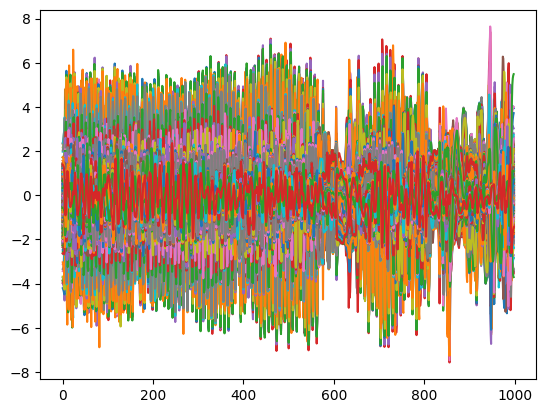

In [29]:
import matplotlib.pyplot as plt
_=plt.plot(pipes.transform(X_train).T)